**Autor:**
- Íñigo Alegre Jiménez

# Objetivos del ejercicio: MICROSOFT MALWARE PREDICTION

---
## Propuesta de valor
El objetivo de este ejercicio es estimar la probabilidad de que una máquina con Sistema Operativo Windows se vea infectada por
algún tipo de malware, en base a las distintas propiedades de la máquina.

## Motivaciones para resolverlo
La creación de un modelo predictivo podría ayudar a la empresa en:
 - **Seguridad de la información**: evaluando la probabilidad de infección ayudaría a elegir adecuadamente máquinas poco propensas a infecciones.
 - **Eficiencia y productividad**: las máquinas infectadas por malware podrían causar realentizaciones y errores.
 - **Costo financiero**: reducir las infecciones por malware pueden llevar a un ahorro de costos significativos para la reparación de sistemas, restauración de datos y mitigación de brechas de seguridad.
 - **Cumplimiento normativo**: muchas industrias están sujetas a regulaciones estrictas en cuanto a la protección de datos por lo que, mantener las máquinas libres de malware es una parte fundamental.
---
## Orígenes de datos
Los datos usados en este ejercicio se encuentran en el siguiente [enlace](https://www.dropbox.com/s/sxl5bpi2620p496/sample_mmp.csv). Estos datos se han obtenido muestreando el dataset original de la competición de Kaggle [Microsoft Malware Prediction](https://www.kaggle.com/c/microsoft-malware-prediction), y se basan en las características obtenidas en la solución de endpoint Windows Defender. Cada fila del dataset corresponde a una máquina única, identificada por el campo **MachineIdentifier**. El *target* es la variable **HasDetections**, que indica que se ha detectado Malware en la máquina.

---

## Tarea de ML
El problema de estimar la probabilidad de que una máquina con Sistema Operativo Windows se vea infectada por algún tipo de malware corresponde a una tarea de clasificación binaria supervisada.

- Supervisada: Porque tenemos un conjunto de datos etiquetados donde sabemos si una máquina ha sido infectada por malware o no, y utilizamos esta información para entrenar el modelo.
- Clasificación binaria: Porque el resultado deseado es una categoría (infectado o no infectado) en lugar de un valor continuo o numerosas categorías.

## Algoritmos posibles

Para la resolución de esta tarea de clasificación supervisada vamos a comenzar con un Decision Tree Classifier. Una vez realizado el modelo con este algoritmo, buscaremos maneras de mejorar su rendimiento con la implementación de otros modelos basados en otros algoritmos como pueden ser: XGBoost y Random Forest.

---

<a id='index'></a>
## Índice

[Importación de librerías](#importacion_librerias)<br>


## Data Understanding
[EDA](#eda)<br>
[Análisis Univariante](#analisis_univariante)<br>
[Análisis Multivariante](#analisis_multivariante)<br>


## Data Preparation
[Limpieza de atributos](#limpieza)<br>
[Transformación de atributos](#transformacion)<br>

## Modelling
[Partición y muestreo del dataset](#particionymuestreo)<br>
[Evaluación de algoritmos](#evaluacion)<br>
[Optimización de modelos](#optimizacion)<br>


## Evaluation
[Selección de modelo y evaluación](#seleccion_evaluacion)<br>

## Modelo extra
[Implementación de modelos extra](#modelos_extra)<br>

<a id='importacion_librerias'></a>
# Importación de librerías
[Volver al índice](#index)

En este apartado hacemos la importación de las principales librerías y métodos que usaremos a lo largo del dataset.

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 100

# librerías para crear gráficas
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# módulos de sklearn 
from sklearn.preprocessing import OrdinalEncoder
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

import graphviz

# otros modelos
import xgboost as xgb

# DATA UNDERSTANDING

<a id='eda'></a>
## Data Understanding - EDA
[Volver al índice](#index)

En este apartado importamos el dataset y observamos el tamaño del mismo, el tipo de atributos disponibles (numéricos, categóricos), los estadísticos descriptivos más relevantes de cada atributo(valores medios, dispersión, percentiles, etc.) y el número de valores nulos.

In [3]:
# importación del dataset
df = pd.read_csv('sample_mmp.csv',low_memory=False)
df.head().T

0  \
Unnamed: 0                                                                          8427007   
MachineIdentifier                                          f1cd864e97bae82bdf96523e1a539121   
ProductName                                                                    win8defender   
EngineVersion                                                                   1.1.15100.1   
AppVersion                                                                  4.18.1807.18075   
AvSigVersion                                                                   1.273.1234.0   
IsBeta                                                                                    0   
RtpStateBitfield                                                                        7.0   
IsSxsPassiveMode                                                                          0   
DefaultBrowsersIdentifier                                                               NaN   
AVProductStatesIdentifier                                                           53447.0   
AVProductsInstalled                                                                     1.0   
AVProductsEnabled                                                                       1.0   
HasTpm                                                                                    1   
CountryIdentifier                                                                         8   
CityIdentifier                                                                      85219.0   
OrganizationIdentifier                                                                  NaN   
GeoNameIdentifier                                                                     205.0   
LocaleEnglishNameIdentifier                                                             172   
Platform                                                                          windows10   
Processor                                                                               x64   
OsVer                                                                              10.0.0.0   
OsBuild                                                                               17134   
OsSuite                                                                                 256   
OsPlatformSubRelease                                                                    rs4   
OsBuildLab                                         17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                                              Pro   
IsProtected                                                                             1.0   
AutoSampleOptIn                                                                           0   
PuaMode                                                                                 NaN   
SMode                                                                                   0.0   
IeVerIdentifier                                                                       137.0   
SmartScreen                                                                    RequireAdmin   
Firewall                                                                                1.0   
UacLuaenable                                                                            1.0   
Census_MDC2FormFactor                                                               Desktop   
Census_DeviceFamily                                                         Windows.Desktop   
Census_OEMNameIdentifier                                                             1443.0   
Census_OEMModelIdentifier                                                          275891.0   
Census_ProcessorCoreCount                                                               4.0   
Census_ProcessorManufacturerIdentifier                                                  5.0   
Census_ProcessorModelIdentifier                                                      2273.0   
Censu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

La información correspondiente a cada columna la podemos encontrar [aqui](https://www.kaggle.com/c/microsoft-malware-prediction/data).

In [5]:
df.describe(include=np.number).T

count          mean  \
Unnamed: 0                                         500000.0  4.458888e+06   
IsBeta                                             500000.0  2.000000e-06   
RtpStateBitfield                                   498168.0  6.846207e+00   
IsSxsPassiveMode                                   500000.0  1.724200e-02   
DefaultBrowsersIdentifier                           24061.0  1.652825e+03   
AVProductStatesIdentifier                          498062.0  4.785091e+04   
AVProductsInstalled                                498062.0  1.326763e+00   
AVProductsEnabled                                  498062.0  1.020714e+00   
HasTpm                                             500000.0  9.878160e-01   
CountryIdentifier                                  500000.0  1.080375e+02   
CityIdentifier                                     481760.0  8.127165e+04   
OrganizationIdentifier                             345437.0  2.486994e+01   
GeoNameIdentifier                                  499984.0  1.697304e+02   
LocaleEnglishNameIdentifier                        500000.0  1.226110e+02   
OsBuild                                            500000.0  1.572693e+04   
OsSuite                                            500000.0  5.747186e+02   
IsProtected                                        498074.0  9.457892e-01   
AutoSampleOptIn                                    500000.0  2.800000e-05   
SMode                                              470152.0  4.381562e-04   
IeVerIdentifier                                    496791.0  1.266626e+02   
Firewall                                           494838.0  9.782414e-01   
UacLuaenable                                       499377.0  1.372503e+01   
Census_OEMNameIdentifier                           494619.0  2.218646e+03   
Census_OEMModelIdentifier                          494236.0  2.391280e+05   
Census_ProcessorCoreCount                          497653.0  3.994074e+00   
Census_ProcessorManufacturerIdentifier             497653.0  4.529069e+00   
Census_ProcessorModelIdentifier                    497651.0  2.370987e+03   
Census_PrimaryDiskTotalCapacity                    497024.0  5.140433e+05   
Census_SystemVolumeTotalCapacity                   497024.0  3.780546e+05   
Census_HasOpticalDiskDrive                         500000.0  7.703400e-02   
Census_TotalPhysicalRAM                            495444.0  6.129232e+03   
Census_InternalPrimaryDiagonalDisplaySizeInInches  497346.0  1.668984e+01   
Census_InternalPrimaryDisplayResolutionHorizontal  497350.0  1.548304e+03   
Census_InternalPrimaryDisplayResolutionVertical    497350.0  8.982393e+02   
Census_InternalBatteryNumberOfCharges              484962.0  1.125600e+09   
Census_OSBuildNumber                               500000.0  1.584137e+04   
Census_OSBuildRevision                             500000.0  9.672248e+02   
Census_OSInstallLanguageIdentifier                 496668.0  1.460551e+01   
Census_OSUILocaleIdentifier                        500000.0  6.044631e+01   
Census_IsPortableOperatingSystem                   500000.0  5.220000e-04   
Census_IsFlightingInternal                          84775.0  2.359186e-05   
Census_IsFlightsDisabled                           491067.0  1.425467e-05   
Census_ThresholdOptIn                              181896.0  2.583894e-04   
Census_FirmwareManufacturerIdentifier              489651.0  4.026759e+02   
Census_FirmwareVersionIdentifier                   490939.0  3.303099e+04   
Census_IsSecureBootEnabled                         500000.0  4.854380e-01   
Census_IsWIMBootEnabled                            182334.0  0.000000e+00   
Census_IsVirtualDevice                             499099.0  7.066734e-03   
Census_IsTouchEnabled                              500000.0  1.254340e-01   
Census_IsPenCapable                                500000.0  3.774400e-02   
Census_IsAlwaysOnAlwaysConnectedCapable            495960.0  5.724454e-02   
Wdft_IsGamer                                      

Observando la tabla superior llegamos a las siguientes conclusiones:
- La gran mayoría de variables numéricas se trata de booleanas (0,1) que indican si la máquina posee o no ciertas características.
- Aquellas variables numéricas que no son booleanas hacen referencia a identificadores de versiones, identificadores de país o región (las cuales habrá que tratar como categóricas) y distintas cualidades como pueden ser la RAM, la capacidad o resolución.
- Hay una gran cantidad de columnas numéricas que poseen nulos

In [6]:
df.describe(exclude=np.number).T

count  unique  \
MachineIdentifier                 500000  500000   
ProductName                       500000       3   
EngineVersion                     500000      53   
AppVersion                        500000      95   
AvSigVersion                      500000    6455   
Platform                          500000       4   
Processor                         500000       3   
OsVer                             500000      21   
OsPlatformSubRelease              500000       9   
OsBuildLab                        499999     453   
SkuEdition                        500000       8   
PuaMode                              126       1   
SmartScreen                       321404      12   
Census_MDC2FormFactor             500000      12   
Census_DeviceFamily               500000       3   
Census_ProcessorClass               2082       3   
Census_PrimaryDiskTypeName        499291       4   
Census_ChassisTypeName            499963      34   
Census_PowerPlatformRoleName      499998       9   
Census_InternalBatteryType        144397      28   
Census_OSVersion                  500000     305   
Census_OSArchitecture             500000       3   
Census_OSBranch                   500000      15   
Census_OSEdition                  500000      22   
Census_OSSkuName                  500000      21   
Census_OSInstallTypeName          500000       9   
Census_OSWUAutoUpdateOptionsName  500000       6   
Census_GenuineStateName           500000       4   
Census_ActivationChannel          500000       6   
Census_FlightRing                 500000       8   

                                                                       top  \
MachineIdentifier                         f1cd864e97bae82bdf96523e1a539121   
ProductName                                                   win8defender   
EngineVersion                                                  1.1.15200.1   
AppVersion                                                 4.18.1807.18075   
AvSigVersion                                                  1.273.1420.0   
Platform                                                         windows10   
Processor                                                              x64   
OsVer                                                             10.0.0.0   
OsPlatformSubRelease                                                   rs4   
OsBuildLab                        17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                            Home   
PuaMode                                                                 on   
SmartScreen                                                   RequireAdmin   
Census_MDC2FormFactor                                             Notebook   
Census_DeviceFamily                                        Windows.Desktop   
Census_ProcessorClass                                                  mid   
Census_PrimaryDiskTypeName                                             HDD   
Census_ChassisTypeName                                            Notebook   
Census_PowerPlatformRoleName                                        Mobile   
Census_InternalBatteryType                                            lion   
Census_OSVersion                                            10.0.17134.228   
Census_OSArchitecture                                                amd64   
Census_OSBranch                                                rs4_release   
Census_OSEdition                                                      Core   
Census_OSSkuName                                                      CORE   
Census_OSInstallTypeName                                        UUPUpgrade   
Census_OSWUAutoUpdateOptionsName                                  FullAuto   
Census_GenuineStateName                                         IS_GENUINE   
Census_ActivationChannel                                            Retail   
Census_FlightRing                                                   Retail   

   

Tras ver un resumen de las variables categóricas podemos decir que:
- **MachineIdentifier** es la variable que debemos usar como índice, ya que se trata de un identificador único para cada máquina
- la mayoría de variables categóricas no tienen más de 100 categorías (a excepción de **AvSigVersion**,**OsBuildLab** y **Census_OSVersion**)
- las variables categóricas que hacen referencias a versiones podemos pasarlas a numéricas y realizar un OrdinalEncoder o OneHotEncoder en función de si la actualización de las mismas tiene una implicación directa en la mejora de la protección contra el malware.

In [7]:
# procedemos a ver aquellas columnas con nulos y el número de nulos que tiene cada una de ellas

col_null = df.isna().sum()
col_withnull = col_null[col_null > 0]

print(f'Tenemos {len(col_null[col_null > 0])} columnas con nulos las cuales son: \n\n{col_withnull}')

Tenemos 44 columnas con nulos las cuales son: 

RtpStateBitfield                                       1832
DefaultBrowsersIdentifier                            475939
AVProductStatesIdentifier                              1938
AVProductsInstalled                                    1938
AVProductsEnabled                                      1938
CityIdentifier                                        18240
OrganizationIdentifier                               154563
GeoNameIdentifier                                        16
OsBuildLab                                                1
IsProtected                                            1926
PuaMode                                              499874
SMode                                                 29848
IeVerIdentifier                                        3209
SmartScreen                                          178596
Firewall                                               5162
UacLuaenable                                        

In [8]:
def eliminar_mas95nulos(dataset):
    """
    Elimina las columnas de un DataFrame que tienen más del 95% de sus valores nulos.

    Parámetros:
    dataset (pandas.DataFrame): El DataFrame del que se eliminarán las columnas con alto porcentaje de valores nulos.
    threshold (float): El umbral de porcentaje de valores nulos para eliminar columnas. Por defecto es 0.95 (95%).

    Retorna:
    None: Esta función modifica el DataFrame en su lugar y no devuelve ningún valor.
    """

    null_percentage = dataset.isna().mean()   
    columns_to_drop = null_percentage[null_percentage > 0.95].index
    dataset.drop(columns=columns_to_drop, axis=1, inplace=True)

    print(f'Columnas eliminadas: {columns_to_drop}')

In [9]:
eliminar_mas95nulos(df) 

Columnas eliminadas: Index(['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass'], dtype='object')


Establecemos como índice aquel valor que identifica de manera única a cada una de las máquinas (**MachineIdentifier**) y eliminamos la columna **Unnamed: 0** que no aporta ninguna información útil para el modelo.

In [10]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.set_index('MachineIdentifier', inplace=True)

<a id='analisis_univariante'></a>
## Análisis Univariante
[Volver al índice](#index)

En este apartado analizamos cada variable de forma concreta (identificamos outliers, nulos, datos erróneos) y realizamos gráficas que nos ayudan a entender la distribución de cada una. A su vez, analizamos el TARGET y la relación que este guarda con los distintos atributos del dataset.

### Análisis del Target

In [11]:
df['HasDetections'].value_counts(dropna=False)

HasDetections
0    250047
1    249953
Name: count, dtype: int64

In [12]:
TARGET ='HasDetections'
porcentaje_target = df[TARGET].mean()
print(f'Porcentaje de máquinas que poseen malware: {porcentaje_target}')

Porcentaje de máquinas que poseen malware: 0.499906


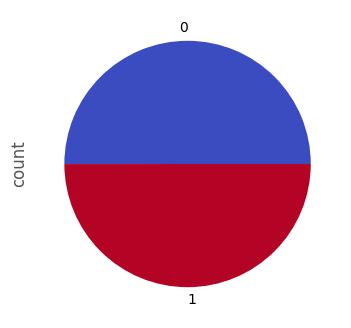

In [13]:
df['HasDetections'].value_counts().plot(kind="pie", figsize=(6,4), colormap="coolwarm");


Observamos que la columna **HasDetections** se trata del target, una variable booleana tipo int64 que nos indica si la máquina se encuentra infectada o no. Cabe destacar que se trata de un target balanceado (porcentaje de prácticamente el 50%) y sin nulos por lo que en principio no deberemos de realizar ningún tipo de rebalanceo de los datos ni eliminación o imputación de filas con nulos.

### Análisis categóricas

Al mismo tiempo que identificamos nulos, outliers y datos erróneos vamos a estimar si cada variable es explicativa o no. Para ello, nos enfocaremos en el análisis de una pivot_table que nos aporta los siguientes datos estadísticos: 

- el número total de máquinas en cada categoría dentro de una variable
- el número de máquinas que sufre malware en cada categoría 
- el porcentaje de malware que sufre cada categoría

En función del número de máquinas de cada categoría y lo mucho que su porcentaje de malware se distingue de la media del target (50%), determinaremos si la variable es explicativa o no.

In [14]:
lista_variable_categoricas = df.describe(exclude=np.number).columns.tolist() 
lista_variable_categoricas

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

A continuación vamos a definir las tres funciones que nos van a ayudar a analizar cada variable categórica y la relación que guarda cada una de ellas con el target.


- **explore_cat_values** --> nos indica el número de nulos de una columna categórica específica y genera una pivot_table la cual proporciona un resumen estadístico sobre dicha columna y su relación con el Target a través de 3 columnas: ['Num_maquinas','Con_malware','Porcentaje_malware']


- **plot_cat_values** --> nos genera dos gráficas que nos ayudan a analizar tanto la distribución de las distintas categorías dentro de la variable como la distribución del Target dentro de cada una de esas categorías.


- **analisis_cat** --> incorpora las dos funciones anteriores y realiza un análisis exploratorio de una columna categórica específica en un dataframe, incluyendo visualización y resumen estadístico.

In [15]:
def explore_cat_values(dataframe, column, target_col):
    """
    Imprime el número de nulos que posee la columna y genera un resumen estadístico sobre una columna categórica 
    específica del dataframe y su relación con el Target.

    Parámetros:
    dataframe (pd.DataFrame): El dataframe que contiene los datos.
    column (str): El nombre de la columna categórica a explorar.
    target_col (str): El nombre de la columna Target que se analizará en relación con la columna categórica.

    Retorna:
    pd.DataFrame: Un dataframe que contiene el resumen de la columna categórica, incluyendo:
                  - 'Num_maquinas': El número de ocurrencias de cada categoría.
                  - 'Con_malware': La suma de los valores en la columna objetivo para cada categoría.
                  - 'Porcentaje_malware': El promedio de los valores en la columna objetivo para cada categoría, indicando el porcentaje de malware.
    """
    print(f'{column} tiene {dataframe[column].isna().sum()} nulos \n')
    resumen_df = dataframe.pivot_table(index=column, values=target_col, aggfunc=[len,'sum','mean'],observed=False)
    resumen_df.columns = ['Num_maquinas', 'Con_malware','Porcentaje_malware']
    resumen_df = resumen_df.sort_values(by='Num_maquinas',ascending=False)
    return resumen_df

In [16]:
def plot_cat_values(dataframe, column, target_column):
    """
    Genera dos gráficos de barras para visualizar la distribución de valores categóricos y su relación con el Target.

    Parámetros:
    dataframe (pd.DataFrame): El dataframe que contiene los datos.
    column (str): El nombre de la columna categórica a explorar.
    target_column (str): El nombre de la columna Target que se analizará en relación con la columna categórica.

    Retorna:
    None: La función muestra dos gráficos de barras y no devuelve ningún valor.

    Descripción:
    La función genera una figura con dos subplots:
    - El primer subplot muestra un gráfico de barras de la distribución de valores en la columna categórica.
    - El segundo subplot muestra un gráfico de barras de la distribución del Target en relación con la columna categórica.
    """
    plt.figure(figsize=(15,8))
    #primer gráfico que muestra distribución de la variable categórica
    ax1 = plt.subplot(2,1,1)
    ax1 = sns.countplot(data = dataframe, x = column,order = list(dataframe[column].unique()));
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
    ax1.set_xlabel('') # Quitamos el título ya que se ve más claro abajo y de este modo no se repite

    #segundo gráfico que muestra distribución del target en cada categoría de la variable categórica
    ax2 = plt.subplot(2,1,2)
    ax2 = sns.countplot(data=df, x=column, hue=TARGET, order = list(dataframe[column].unique()));
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
    
    plt.tight_layout()
    plt.show()

In [17]:
def analisis_cat(dataframe, column, target_column):

    """
    Realiza un análisis exploratorio de una columna categórica específica en un dataframe, incluyendo visualización y resumen estadístico.

    Parámetros:
    dataframe (pd.DataFrame): El dataframe que contiene los datos.
    column (str): El nombre de la columna categórica a explorar.
    target_column (str): El nombre de la columna Target que se analizará en relación con la columna categórica.

    Retorna:
    pd.DataFrame: Un dataframe que contiene el resumen de la columna categórica, incluyendo:
                  - 'Num_maquinas': El número de ocurrencias de cada categoría.
                  - 'Con_malware': La suma de los valores en la columna objetivo para cada categoría.
                  - 'Porcentaje_malware': El promedio de los valores en la columna objetivo para cada categoría, indicando el porcentaje de malware.
    """
    
    plot_cat_values(dataframe, column, target_column)
    return explore_cat_values(dataframe, column, target_column)

#### ProductName

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

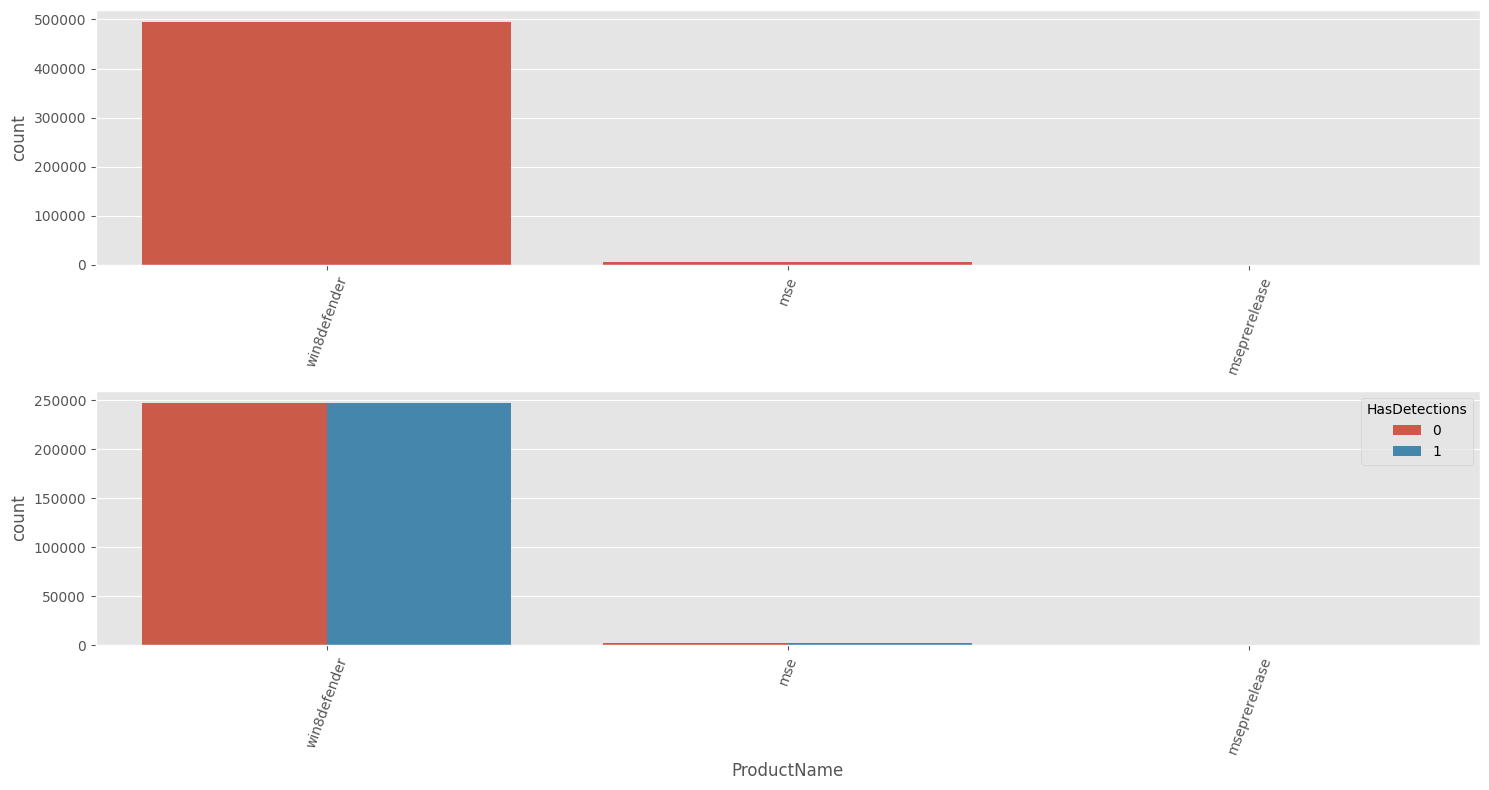

ProductName tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
ProductName                                                 
win8defender         494604       247367            0.500131
mse                    5395         2586            0.479333
mseprerelease             1            0            0.000000

In [18]:
analisis_cat(df, 'ProductName', TARGET)

- se trata de una variable con tres categorías y que no posee nulos
- vemos que casi todas las máquinas se encuentran en la categoría **win8defender** cuyo porcentaje es muy cercano al del target, no siendo una variable muy explicativa. Por otra parte, **mse** se trata de una variable un poco más explicativa ya que el porcentaje difiere en dos unidades del porcentaje del target del 50%. Tras llevar a cabo un primer modelo y ver que no sobreajusta vamos a proceder a contar con esta variable.

[Data Preparation](#limpieza):
- aplicar un OneHotEncoding y quedarnos con la columna que informa sobre si se trata de win8defender o no. De este modo ayudaremos al modelo a analizar esta variable de manera más sencilla.

Aquellas variables con las que no contemos para nuestro modelo inicial las vamos a ir añadiendo a una lista llamada *no_explicativas*. Más tarde, en el apartado de [Data Preparation](#limpieza), las eliminaremos del dataset.

In [19]:
no_explicativas = []

#### EngineVersion

In [20]:
df['EngineVersion'].nunique()

53

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

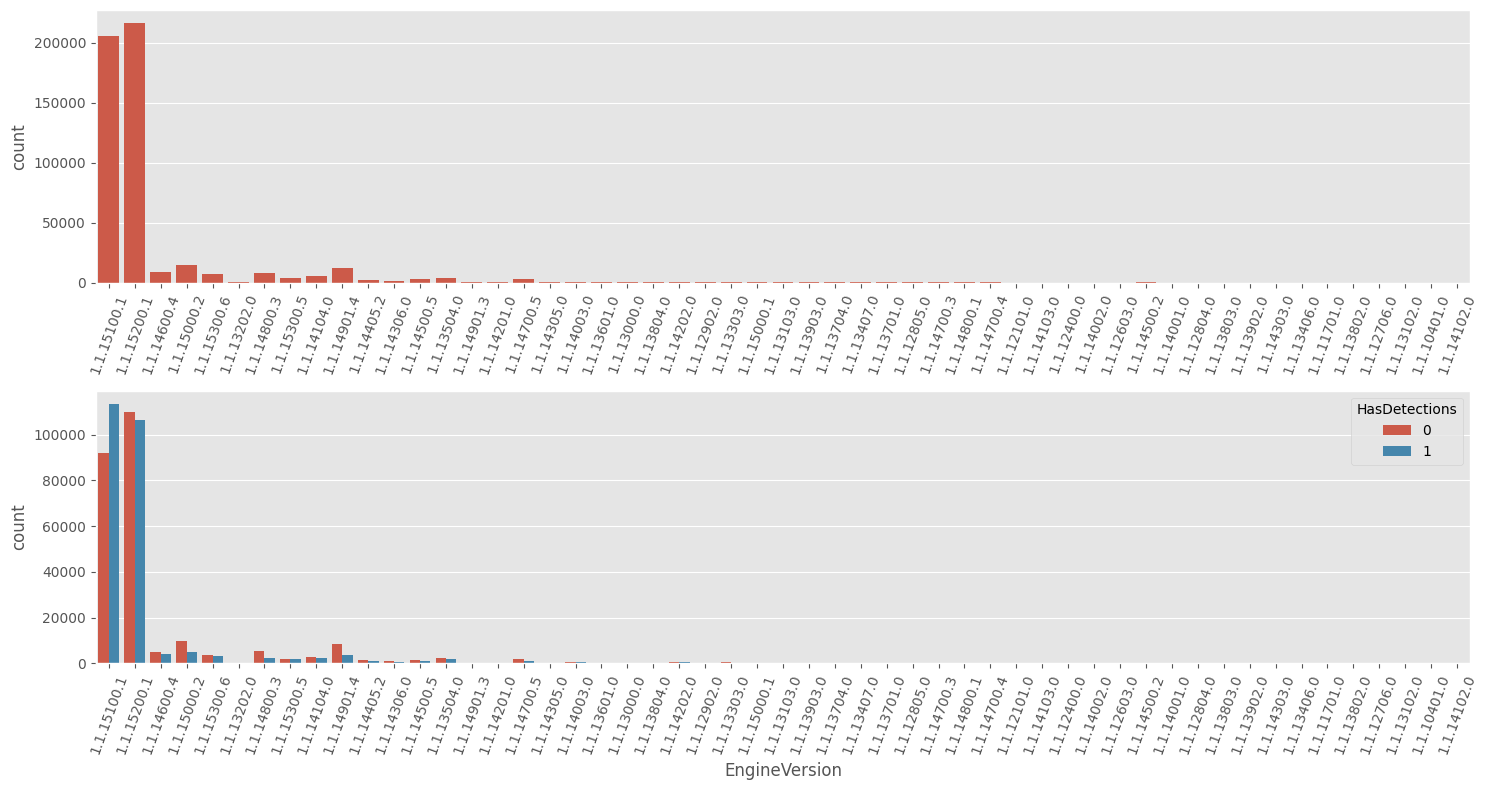

EngineVersion tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
EngineVersion                                               
1.1.15200.1          216491       106453            0.491720
1.1.15100.1          205494       113557            0.552605
1.1.15000.2           14752         5041            0.341716
1.1.14901.4           11984         3670            0.306242
1.1.14600.4            9005         3986            0.442643
1.1.14800.3            7548         2306            0.305511
1.1.15300.6            6769         3287            0.485596
1.1.14104.0            5240         2298            0.438550
1.1.15300.5            3883         2025            0.521504
1.1.13504.0            3876         1706            0.440144
1.1.14700.5            2593          855            0.329734
1.1.14500.5            2591         1032            0.398302
1.1.14405.2            1972          775            0.393002
1.1.14306.0            1329          510            0.383747
1.1.14202.0             840          357            0.425000
1.1.14003.0             804          344            0.427861
1.1.13303.0             516          169            0.327519
1.1.13903.0             515          208            0.403883
1.1.13804.0             513          194            0.378168
1.1.13407.0             479          174            0.363257
1.1.13601.0             420          140            0.333333
1.1.12902.0             321          128            0.398754
1.1.14305.0             270          114            0.422222
1.1.13704.0             255           99            0.388235
1.1.13701.0             255           86            0.337255
1.1.13202.0             245           85            0.346939
1.1.13103.0             235           84            0.357447
1.1.13000.0             220           81            0.368182
1.1.15000.1             138           33            0.239130
1.1.12805.0             115           51            0.443478
1.1.14901.3              71           18            0.253521
1.1.14700.4              65           24            0.369231
1.1.14700.3              61           21            0.344262
1.1.14800.1              51           13            0.254902
1.1.14500.2              19            5            0.263158
1.1.14201.0              11            5            0.454545
1.1.14303.0              10            4            0.400000
1.1.12101.0               7            4            0.571429
1.1.14103.0               5            0            0.000000
1.1.13902.0               4            1            0.250000
1.1.13802.0               4            3            0.750000
1.1.12804.0               4            1            0.250000
1.1.13803.0               3            0            0.000000
1.1.12603.0               3            1            0.333333
1.1.11701.0               3            2            0.666667
1.1.14002.0               2            0            0.000000
1.1.14102.0               2            0            0.000000
1.1.14001.0               2            0            0.000000
1.1.13406.0               1            1            1.000000
1.1.13102.0               1            1            1.000000
1.1.12706.0               1            0            0.000000
1.1.12400.0               1            1            1.000000
1.1.10401.0               1            0            0.000000

In [21]:
analisis_cat(df, 'EngineVersion', TARGET)

- Se trata de una variable sin nulos con un total de 53 versiones diferentes que se distribuyen de manera muy irregular ya que la mayoría de ordenadores (84.4%) poseen la **1.1.15200.1** (la cual no es muy explicativa debido a su porcentaje prácticamente igual al del target) o la **1.1.15100.1** (un poco más explicativa ya que difiere más del 50%, la media del target)

Vamos a proceder a hacer un análisis más específico que nos permita obtener la manera adecuada de tratar esta variable. Debido a esta distribución tan irregular de los datos y al tratarse de versiones de un ordenador podemos:

- aplicar un OrdinalEncoder: si las versiones tienen un impacto incremental (por ejemplo, cada versión posterior mejora algún rendimiento que influye en el target, es decir, el porcentaje con malware baja a medida que la versión es mayor), entonces convertirlas a un valor ordinal podría darle al modelo información valiosa.

- aplicar OneHotEncoder: si las versiones simplemente representan variaciones sin un impacto directo en el porcentaje de maleware, podría ser mejor tratarlas como categorías independientes. Sin embargo, al haber muchas versiones, OneHotEncoder puede crear un gran número de columnas, por lo que deberíamos reducirlas de algún modo.

Para ello, y antes de procesar la variable, vamos a pasar la variable a numérica para así poder ordenarla y ver si conforme las versiones son actualizadas (aumenta el número de versión), el porcentaje de malware disminuye. En caso de que esto ocurra, será más conveniente aplicar un OrdinalEncoder, de otro modo, deberemos reducir el número de categorías y aplicar un OneHotEncoding.

Vamos a crear la función *transformar_version*. Esta función nos va a permitir modificar todas aquellas variables cuyo formato sean números separados por puntos, eliminando la parte que deseemos del mismo y pasando la variable a numérica. Con la función *version_relacion* llamaremos a la función *transformar_version* y ordenaremos las versiones para ver si efectivamente el porcentaje de malware disminuye conforme se va actualizando. De este modo podremos aplicarle tanto OneHotEncoding como OrdinalEncoding en caso de que sea necesario y permitirá agrupar versiones como veremos más adelante.

In [22]:
def transformar_version(dataframe, columna, partes_a_eliminar=None):
    """
    Transforma una columna tipo versiones eliminando múltiples partes específicas del número 'compuesto' (si se indica)
    y convierte el resto en un número entero.

    Parámetros:
    dataframe (pd.DataFrame): El DataFrame que contiene la columna a transformar.
    columna (str): El nombre de la columna en el DataFrame.
    partes_a_eliminar (list of int, optional): Una lista de índices de las partes que se desean eliminar (1-indexado).
                                               Si es None, no se elimina ninguna parte. Default: None.
    
    Retorna:
    pd.Series: Una Serie con la columna transformada a valores numéricos.
    """
    def transformar_valor(valor):
        partes = valor.split('.')  # Crear una lista con las distintas partes del número
        
        if partes_a_eliminar is not None:
            # Convertir los índices en 0-indexado y eliminar las partes en orden inverso
            for i in sorted(partes_a_eliminar, reverse=True):
                partes.pop(i - 1)  # Eliminar la parte correspondiente
        
        # Unir las partes restantes y convertir a número entero
        return int(''.join(partes))
    
    # Aplicar la transformación a la columna especificada
    dataframe[columna + '_processed'] = dataframe[columna].apply(transformar_valor)
    return dataframe[columna + '_processed']

In [23]:
def version_relacion(dataframe,columna,partes_a_eliminar=None):
     """
    Crea una pivot table que indica la relación entre una columna tipo versiones que ha sido modificada pasando la variable a numérica y 
    eliminando una parte específica del número 'compuesto' (si es indicado) y con el target para poder definir si las actualizaciones son más efectivas
    contra el malware que las versiones más antiguas.

    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene la columna a transformar.
    columna (str): El nombre de la columna en el DataFrame que queremos transformar.
    partes_a_eliminar (list of int, optional): Una lista de índices de las partes que se desean eliminar (1-indexado).
                                               Si es None, no se elimina ninguna parte. Default: None.
    
    Retorna:
    pd.DataFrame: Un dataframe que contiene el resumen de la columna categórica, incluyendo:
                  - 'columna_processed': los valores de la columna indicada en números y ya procesada (en caso de que se haya querido eliminar algo)
                  - 'Num_maquinas': El número de ocurrencias de cada categoría.
                  - 'Con_malware': La suma de los valores en la columna objetivo para cada categoría.
                  - 'Porcentaje_malware': El promedio de los valores en la columna objetivo para cada categoría, indicando el porcentaje de malware.
    """
     
     transformar_version(dataframe,columna,partes_a_eliminar)
     prueba = explore_cat_values(dataframe,columna+'_processed',TARGET).reset_index()
     prueba = prueba.sort_values(by=columna+'_processed',ascending=False)
     return prueba

In [24]:
version_relacion(df,'EngineVersion')

EngineVersion_processed tiene 0 nulos 



EngineVersion_processed  Num_maquinas  Con_malware  Porcentaje_malware
6                  11153006          6769         3287            0.485596
8                  11153005          3883         2025            0.521504
0                  11152001        216491       106453            0.491720
1                  11151001        205494       113557            0.552605
2                  11150002         14752         5041            0.341716
28                 11150001           138           33            0.239130
3                  11149014         11984         3670            0.306242
30                 11149013            71           18            0.253521
5                  11148003          7548         2306            0.305511
33                 11148001            51           13            0.254902
10                 11147005          2593          855            0.329734
31                 11147004            65           24            0.369231
32                 11147003            61           21            0.344262
4                  11146004          9005         3986            0.442643
11                 11145005          2591         1032            0.398302
34                 11145002            19            5            0.263158
12                 11144052          1972          775            0.393002
13                 11143060          1329          510            0.383747
22                 11143050           270          114            0.422222
36                 11143030            10            4            0.400000
14                 11142020           840          357            0.425000
35                 11142010            11            5            0.454545
7                  11141040          5240         2298            0.438550
38                 11141030             5            0            0.000000
46                 11141020             2            0            0.000000
15                 11140030           804          344            0.427861
45                 11140020             2            0            0.000000
47                 11140010             2            0            0.000000
17                 11139030           515          208            0.403883
39                 11139020             4            1            0.250000
18                 11138040           513          194            0.378168
42                 11138030             3            0            0.000000
40                 11138020             4            3            0.750000
23                 11137040           255           99            0.388235
24                 11137010           255           86            0.337255
20                 11136010           420          140            0.333333
9                  11135040          3876         1706            0.440144
19                 11134070           479          174            0.363257
48                 11134060             1            1            1.000000
16                 11133030           516          169            0.327519
25                 11132020           245           85            0.346939
26                 11131030           235           84            0.357447
49                 11131020             1            1            1.000000
27                 11130000           220           81            0.368182
21                 11129020           321          128            0.398754
29                 11128050           115           51            0.443478
41                 11128040             4            1            0.250000
50                 11127060             1            0            0.000000
43                 11126030             3            1            0.333333
51                 11124000             1            1            1.000000
37                 11121010             7            4            0.571429
44                 11117010             3            2            0.666667
52                 11104010  

Fijándonos en aquellas versiones que tienen un número significativo de máquinas observamos que no existe una evidencia clara que indique que cuanto más actualizada está la máquina, menos malware recibe. Por lo tanto, en el [Data Preparation](#limpieza) optaremos por:
- reducir el número de categorías de modo que todas tengan un número significativo de máquinas
- aplicar un OneHotEncoding.

#### AppVersion

In [25]:
df['AppVersion'].nunique()

95

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

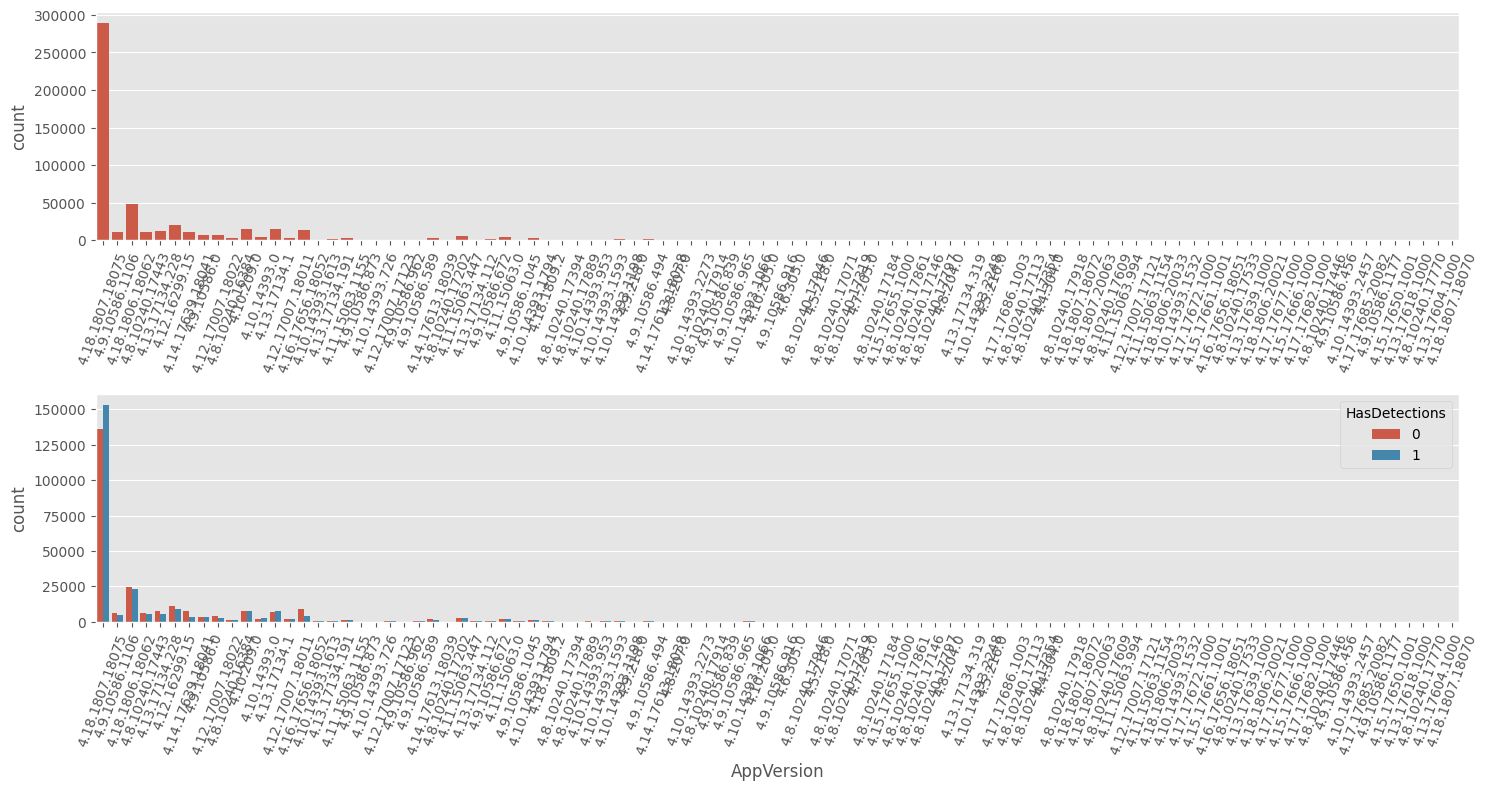

AppVersion tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
AppVersion                                                     
4.18.1807.18075         288809       152973            0.529668
4.18.1806.18062          47641        23108            0.485044
4.12.16299.15            20197         9207            0.455860
4.10.209.0               15292         7771            0.508174
4.13.17134.1             14414         7579            0.525808
4.16.17656.18052         13185         4310            0.326887
4.13.17134.228           12729         5465            0.429335
4.9.10586.1106           11432         5091            0.445329
4.8.10240.17443          11385         5520            0.484848
4.14.17639.18041         10670         3372            0.316026
4.12.17007.18022          6470         2698            0.417002
4.9.10586.0               6213         3131            0.503943
4.11.15063.447            5100         2389            0.468431
4.10.14393.0              4399         2332            0.530120
4.11.15063.0              3874         2191            0.565565
4.12.17007.18011          3392         1642            0.484080
4.14.17613.18039          2991          922            0.308258
4.8.10240.16384           2617         1248            0.476882
4.11.15063.1155           2477         1057            0.426726
4.10.14393.1794           2425         1157            0.477113
4.9.10586.494             1383          703            0.508315
4.10.14393.1198           1271          653            0.513769
4.9.10586.672             1198          536            0.447412
4.13.17134.191            1182          553            0.467851
4.12.17007.17123           775          375            0.483871
4.9.10586.589              761          330            0.433640
4.10.14393.1613            760          360            0.473684
4.18.1809.2                733          358            0.488404
4.13.17134.112             651          309            0.474654
4.9.10586.1045             617          264            0.427877
4.10.14393.1593            536          278            0.518657
4.10.14393.1066            404          192            0.475248
4.10.14393.953             403          190            0.471464
4.9.218.0                  334          149            0.446108
4.9.10586.916              311          128            0.411576
4.9.10586.965              266           99            0.372180
4.9.10586.962              262          108            0.412214
4.8.10240.17946            262          166            0.633588
4.9.10586.839              248          112            0.451613
4.9.10586.873              228           96            0.421053
4.8.207.0                  204           92            0.450980
4.5.218.0                  116           57            0.491379
4.8.10240.17889            103           64            0.621359
4.13.17134.319              97           64            0.659794
4.8.204.0                   96           40            0.416667
4.8.10240.17202             94           41            0.436170
4.8.10240.17914             84           63            0.750000
4.8.10240.17071             77           25            0.324675
4.8.10240.17394             74           37            0.500000
4.14.17613.18038            66           15            0.227273
4.10.14393.2273             54           35            0.648148
4.8.10240.17319             53           24            0.452830
4.8.10240.17146             50           14            0.280000
4.10.205.0                  49           24            0.489796
4.8.10240.17354             48           21            0.437500
4.7.205.0                   46           23            0.500000
4.6.305.0                   44           22            0.500000
4.18.1807.20063             39           19            0.487179
4.8.10240.17184             34           15            0.441176
4.8.10240.17861             33           20            0.606061
4.8.10240.17797             29           15       

In [26]:
analisis_cat(df,'AppVersion',TARGET)

- se trata de una variable sin nulos con un total de 95 versiones diferentes que se distribuyen de manera muy irregular ya que un gran porcentaje (57%) posee la verisón 4.18.1807.18075.
- para reducir el número de categorías y de distintas versiones podemos agruparlos eliminando el último número de la cadena (ej: 4.16.17656.18051 y 4.16.17656.18052 que sean 4.16.17656).


Vamos a proceder como la anterior variable de modo que aplicamos la función versión relacion para ver si la actualización de versiones guarda alguna relación ordenada sobre el porcentaje de malware.

In [27]:
version_relacion(df,'AppVersion',[4])

AppVersion_processed tiene 0 nulos 



AppVersion_processed  Num_maquinas  Con_malware  Porcentaje_malware
24              41717686             5            0            0.000000
28              41717685             4            3            0.750000
27              41717682             4            0            0.000000
23              41717677             5            1            0.200000
26              41717672             4            1            0.250000
7               41617656         13189         4311            0.326863
29              41517666             2            0            0.000000
25              41517661             4            1            0.250000
34              41517655             1            0            0.000000
33              41517650             1            1            1.000000
9               41417639         10670         3372            0.316026
12              41417613          3057          937            0.306510
30              41317639             1            0            0.000000
31              41317618             1            1            1.000000
32              41317604             1            1            1.000000
2               41317134         29073        13970            0.480515
10              41217007         10639         4715            0.443181
4               41216299         20197         9207            0.455860
8               41115063         11458         5641            0.492320
11              41014393         10292         5217            0.506899
3                4910586         22922        10600            0.462438
6                4810240         15009         7306            0.486775
13               4181809           733          358            0.488404
0                4181807        288861       153000            0.529667
1                4181806         47649        23111            0.485026
5                 410209         15292         7771            0.508174
18                410205            49           24            0.489796
14                 49218           334          149            0.446108
15                 48207           204           92            0.450980
17                 48204            96           40            0.416667
19                 47205            46           23            0.500000
20                 46305            44           22            0.500000
16                 45218           116           57            0.491379
22                 45216            10            4            0.400000
21                 44304            27           17            0.629630

- vemos que reducimos el número de versiones de 95 a 34 y pasamos de una variable tipo object a una variable tipo Int.

Fijándonos en aquellas versiones que poseen un número de máquinas significativo observamos que no existe una evidencia clara que indique que cuanto más actualizada está la máquina, menos malware recibe. Por lo tanto en el [Data Preparation](#limpieza):
- reduciremos el número de categorías de modo que todas tengan un número de máquinas significativo 
- aplicaremos un OneHotEncoding.

#### AvSigVersion

In [28]:
explore_cat_values(df,'AvSigVersion',TARGET)

AvSigVersion tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
AvSigVersion                                               
1.273.1420.0          5771         3313            0.574077
1.263.48.0            5537         2597            0.469027
1.275.1140.0          5317         2423            0.455708
1.275.727.0           5214         2619            0.502301
1.273.371.0           4799         2471            0.514899
...                    ...          ...                 ...
1.257.611.0              1            1            1.000000
1.235.1530.0             1            0            0.000000
1.235.1538.0             1            1            1.000000
1.245.1169.0             1            1            1.000000
1.233.3763.0             1            0            0.000000

[6455 rows x 3 columns]

- vemos que es una variable sin nulos con un total de 6455 versiones diferentes


Procedemos a aplicar la función *version_relacion* de modo que reducimos el número de versiones agrupándolas (ej: 1.275.1140.0 y 1.275.727.0 que pasen a ser 1.275, es decir, eliminamos los dos últimos números de la cadena) y observamos si existe relación entre el porcentaje de malware y las actualizaciones.

In [29]:
version_relacion(df,'AvSigVersion',[3,4])

AvSigVersion_processed tiene 0 nulos 



AvSigVersion_processed  Num_maquinas  Con_malware  Porcentaje_malware
7                     1277          4478         2024            0.451987
0                     1275        219654       108080            0.492047
1                     1273        208206       115120            0.552914
2                     1271         15005         5124            0.341486
3                     1269         12092         3699            0.305905
5                     1267          7674         2341            0.305056
10                    1265          2621          849            0.323922
4                     1263          9004         3985            0.442581
9                     1261          2761         1100            0.398406
11                    1259          1978          774            0.391304
12                    1257          1338          514            0.384155
21                    1255           266          112            0.421053
13                    1253           845          361            0.427219
6                     1251          5251         2303            0.438583
14                    1249           821          347            0.422655
15                    1247           520          208            0.400000
17                    1245           516          195            0.377907
22                    1243           262          102            0.389313
23                    1241           253           84            0.332016
19                    1239           421          141            0.334917
8                     1237          3873         1706            0.440485
18                    1235           482          175            0.363071
16                    1233           518          170            0.328185
24                    1231           245           85            0.346939
25                    1229           222           81            0.364865
26                    1227           209           74            0.354067
20                    1225           334          134            0.401198
27                    1223            92           38            0.413043
28                    1221            39           19            0.487179
34                    1219             1            0            0.000000
31                    1217             3            1            0.333333
35                    1213             1            1            1.000000
29                    1207             7            4            0.571429
32                    1199             3            2            0.666667
33                    1169             1            0            0.000000
30                       0             4            0            0.000000

- reducimos el número de versiones a 35 y observamos que al igual que los anteriores casos no se ve una mejoría clara (disminución del porcentaje de malware) en aquellas actualizaciones con un número significativo de máquinas conforme las actualizaciones avanzan.

En [Data Preparation](#limpieza):
- reducir el número de categorías de modo que todas tengan un número significativo de máquinas
- aplicar OneHotEncoding

#### Platform

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

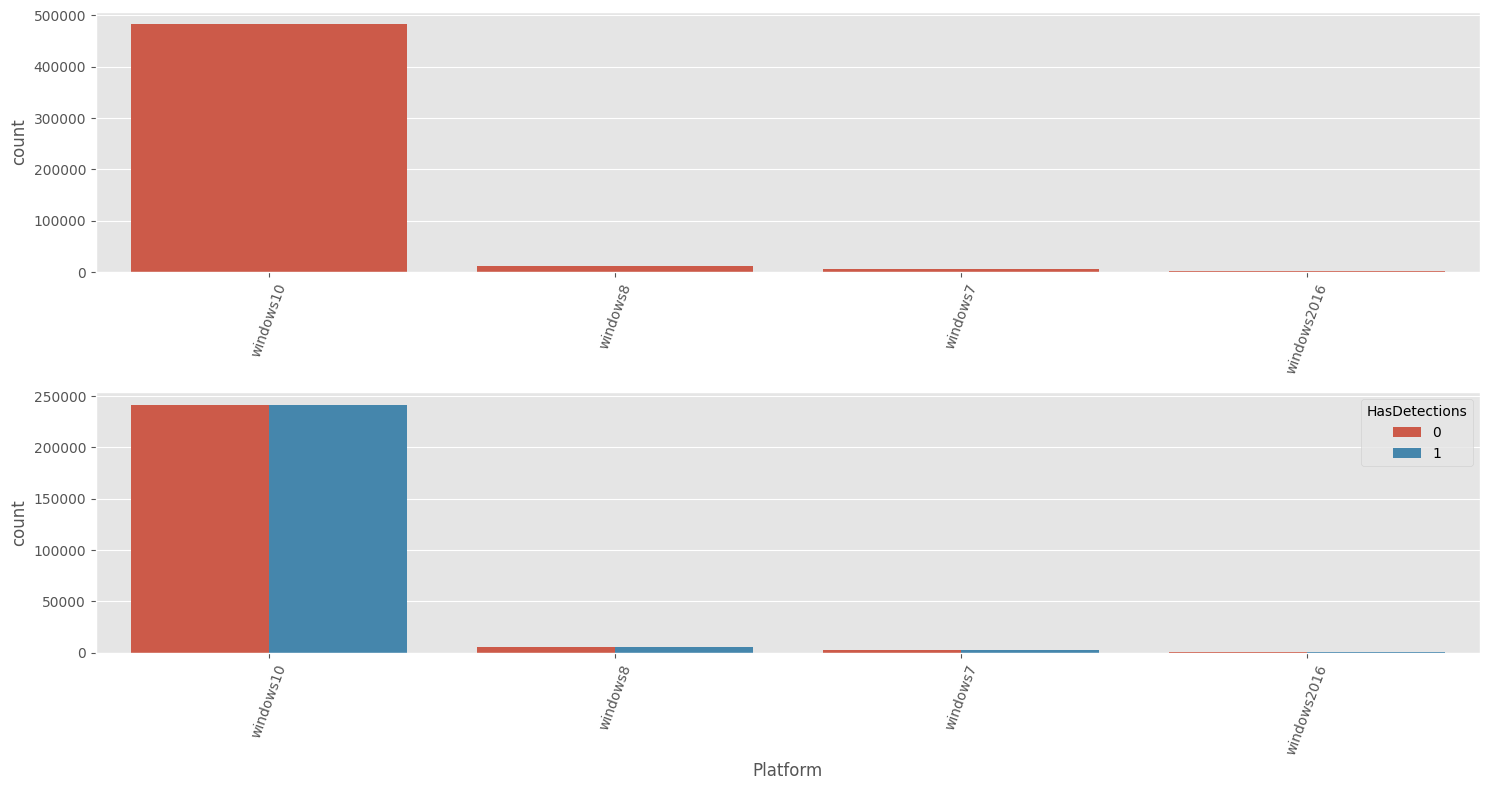

Platform tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Platform                                                  
windows10          483048       241476            0.499901
windows8            10825         5614            0.518614
windows7             5314         2562            0.482123
windows2016           813          301            0.370234

In [30]:
analisis_cat(df,'Platform',TARGET)

Se trata de una variable con 4 categorías sin nulos la cual no es excesivamente explicativa. Salvo la categoría de windows2016, la cual posee muy pocas máquinas (el porcentaje puede resultar engañoso debido al pequeño tamaño de la población), el resto poseen un porcentaje de malware muy similar al del target. Por lo que no contaremos con ella en el modelo.

Añadimos por lo tanto la columna a la lista *no_explicativas*

In [31]:
no_explicativas.append('Platform')

#### Processor

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

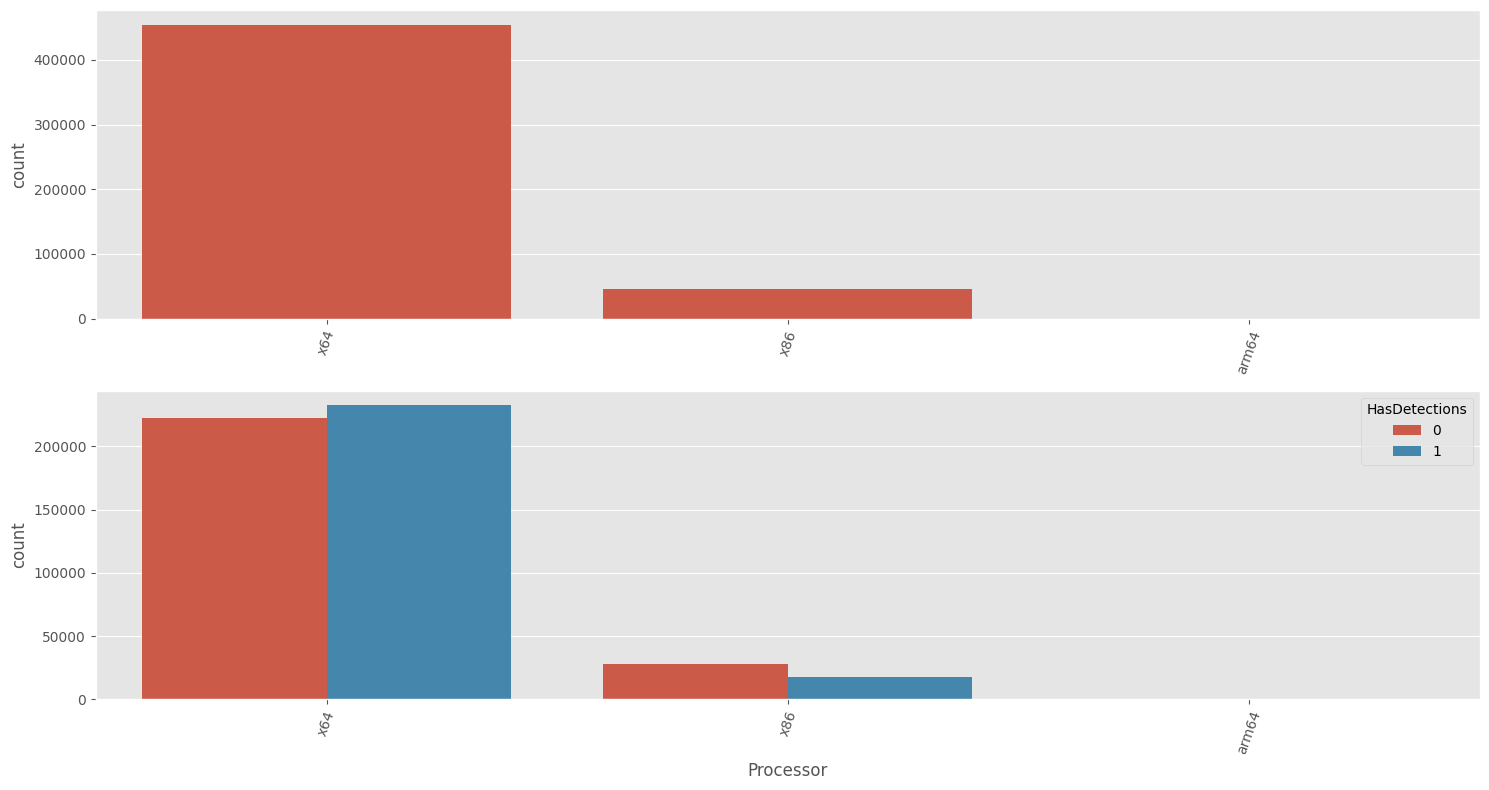

Processor tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Processor                                               
x64              454423       232321            0.511244
x86               45563        17632            0.386981
arm64                14            0            0.000000

In [32]:
analisis_cat(df,'Processor',TARGET)

- se trata de una variable con 3 categorías sin nulos en la que la gran mayoría de ordenadores poseen un processor x64 
- observamos que la categoría x86 si que difiere significativamente de la media del target por lo que se trata de una variable explicativa que aporta bastante al modelo


En [Data Preparation](#limpieza) realizaremos un OneHotEncoding y nos quedaremos únicamente con la columna que indique si el procesador es x64. De este modo el Decision Tree distinguirá aquellas máquinas que si lo son y las que no lo son, analizando adecuadamente la variable.

#### OsVer

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

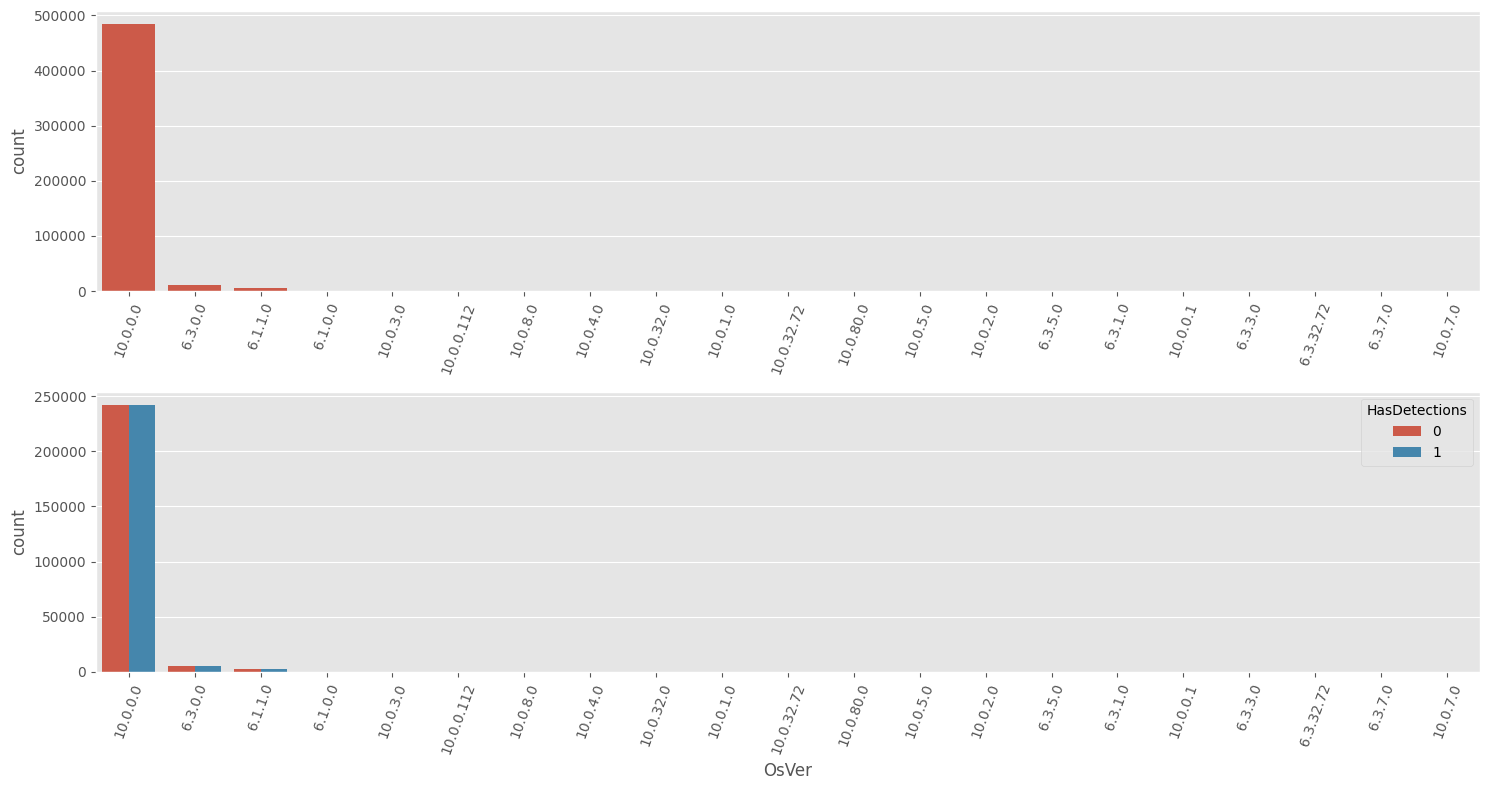

OsVer tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
OsVer                                                    
10.0.0.0          483830       241755            0.499669
6.3.0.0            10818         5612            0.518765
6.1.1.0             5281         2552            0.483242
6.1.0.0               33           10            0.303030
10.0.3.0              12            9            0.750000
10.0.1.0               7            5            0.714286
6.3.3.0                2            0            0.000000
10.0.32.72             2            0            0.000000
6.3.1.0                2            1            0.500000
10.0.0.1               2            2            1.000000
6.3.5.0                1            0            0.000000
6.3.32.72              1            0            0.000000
10.0.7.0               1            1            1.000000
10.0.80.0              1            0            0.000000
10.0.8.0               1            1            1.000000
10.0.5.0               1            1            1.000000
10.0.4.0               1            0            0.000000
10.0.32.0              1            1            1.000000
10.0.2.0               1            1            1.000000
10.0.0.112             1            1            1.000000
6.3.7.0                1            1            1.000000

In [33]:
analisis_cat(df,'OsVer',TARGET)

- Vemos que se trata de una variable sin nulos en la que la mayoría de máquinas poseen una **OsVer** de 10.0.0.0
- El resto son casos muy específicos, la mayoría incluso únicos por lo que podríamos agruparlos.

Optamos por agrupar en versión 10 y versión 6 con la función *version_relacion*

In [34]:
version_relacion(df,'OsVer',[2,3,4])

OsVer_processed tiene 0 nulos 



OsVer_processed  Num_maquinas  Con_malware  Porcentaje_malware
0               10        483861       241777            0.499683
1                6         16139         8176            0.506599

Vemos que se trata de una variable no explicativa por lo que la eliminaremos del dataset, por tanto añadimos tanto la nueva columna creada al aplicar la función *version_relacion* como la columna original.

In [35]:
no_explicativas.append('OsVer')
no_explicativas.append('OsVer_processed')

#### OsPlatformSubRelease

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

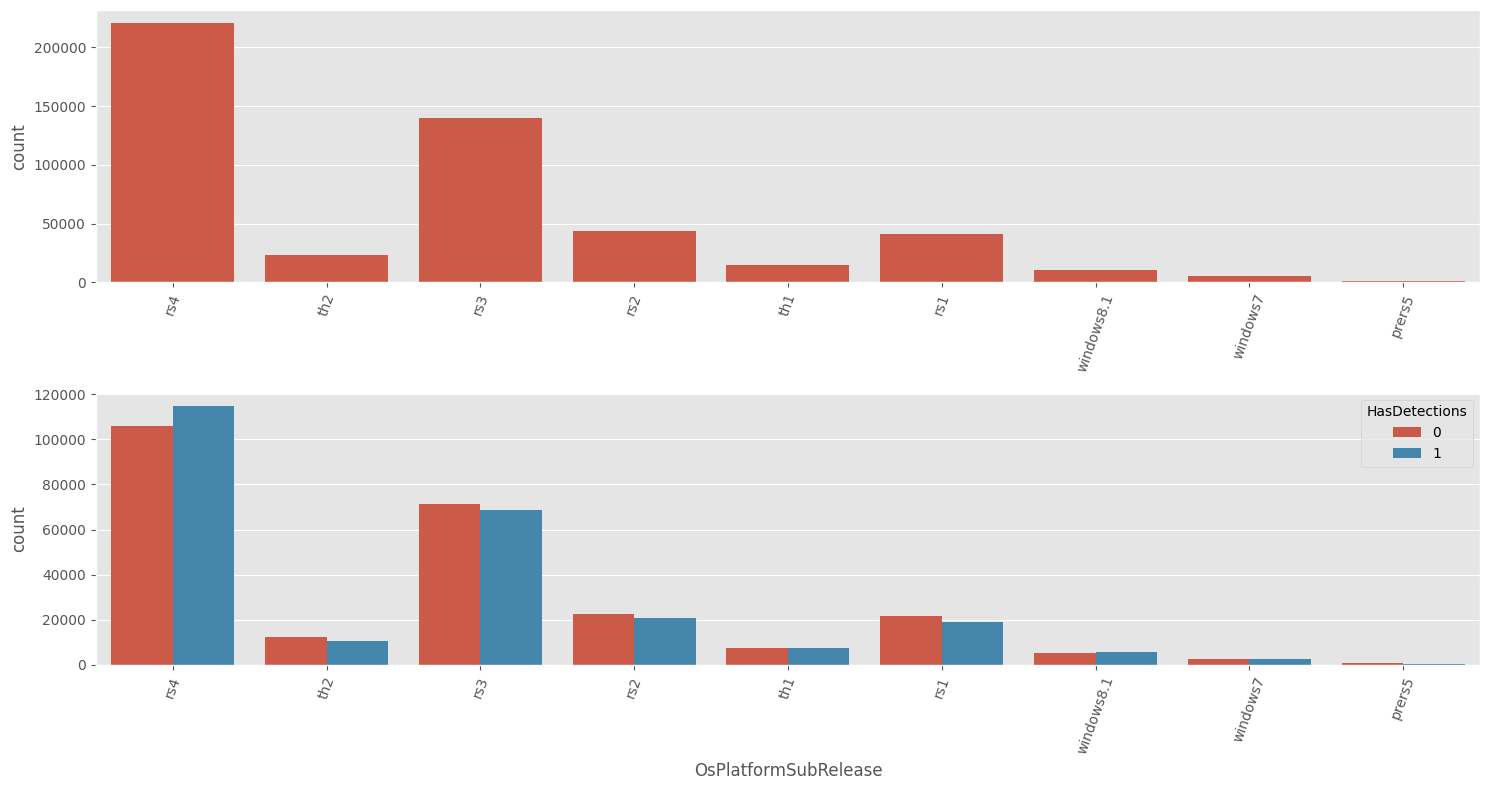

OsPlatformSubRelease tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
OsPlatformSubRelease                                               
rs4                         220779       114996            0.520865
rs3                         139901        68735            0.491312
rs2                          43352        20778            0.479286
rs1                          40717        18848            0.462902
th2                          22955        10608            0.462122
th1                          15014         7309            0.486812
windows8.1                   10825         5614            0.518614
windows7                      5314         2562            0.482123
prers5                        1143          503            0.440070

In [36]:
analisis_cat(df,'OsPlatformSubRelease',TARGET)

- se trata de una variable sin nulos en la que las máquinas están relativamente distribuidas.
- observamos que algunas de las categorías difieren un poco de la media del target como son **rs1** y **th2** pero no lo consideramos suficiente por lo que procederemos a eliminar la variable, añadiéndola a la lista *no_explicativas*

Vemos que no se trata de una variable significativamente explicativa por lo que procedemos a eliminar la columna

In [37]:
no_explicativas.append('OsPlatformSubRelease')

#### OsBuildLab

In [38]:
explore_cat_values(df,'OsBuildLab',TARGET)

OsBuildLab tiene 1 nulos 



Num_maquinas  Con_malware  \
OsBuildLab                                                                      
17134.1.amd64fre.rs4_release.180410-1804                  206436       109335   
16299.431.amd64fre.rs3_release_svc_escrow.18050...         69884        36047   
16299.15.amd64fre.rs3_release.170928-1534                  53826        26378   
15063.0.amd64fre.rs2_release.170317-1834                   39908        19454   
17134.1.x86fre.rs4_release.180410-1804                     14334         5661   
...                                                          ...          ...   
7600.17273.amd64fre.win7_gdr.130318-1532                       1            1   
7600.17118.amd64fre.win7_gdr.120830-0334                       1            0   
7600.16841.amd64fre.win7_gdr.110622-1503                       1            0   
18219.1000.amd64fre.rs_prerelease.180810-1721                  1            1   
9600.19128.amd64fre.winblue_ltsb_escrow.180813-...             1            0   

                                                    Porcentaje_malware  
OsBuildLab                                                              
17134.1.amd64fre.rs4_release.180410-1804                      0.529631  
16299.431.amd64fre.rs3_release_svc_escrow.18050...            0.515812  
16299.15.amd64fre.rs3_release.170928-1534                     0.490061  
15063.0.amd64fre.rs2_release.170317-1834                      0.487471  
17134.1.x86fre.rs4_release.180410-1804                        0.394935  
...                                                                ...  
7600.17273.amd64fre.win7_gdr.130318-1532                      1.000000  
7600.17118.amd64fre.win7_gdr.120830-0334                      0.000000  
7600.16841.amd64fre.win7_gdr.110622-1503                      0.000000  
18219.1000.amd64fre.rs_prerelease.180810-1721                 1.000000  
9600.19128.amd64fre.winblue_ltsb_escrow.180813-...            0.000000  

[453 rows x 3 columns]

Vemos que se trata de una variable que posee un nulo y de la cual podemos sacar mucha información. En ella podemos encontrar información relativa a otras columnas ya vistas como **OsBuild** (primer número) o **OsPlatformSubRelease** (tras el tercer punto y antes de la _).

Pero para el modelo inicial vamos a proceder a no contar con ella, por lo que la añadimos a la lista *no_explicativas*. En el caso de que el modelo no sea lo suficientemente preciso, esta columna nos ayudaría a obtener más columnas explicativas que ayudarían a mejorar el modelo.

In [39]:
no_explicativas.append('OsBuildLab')

#### SkuEdition

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

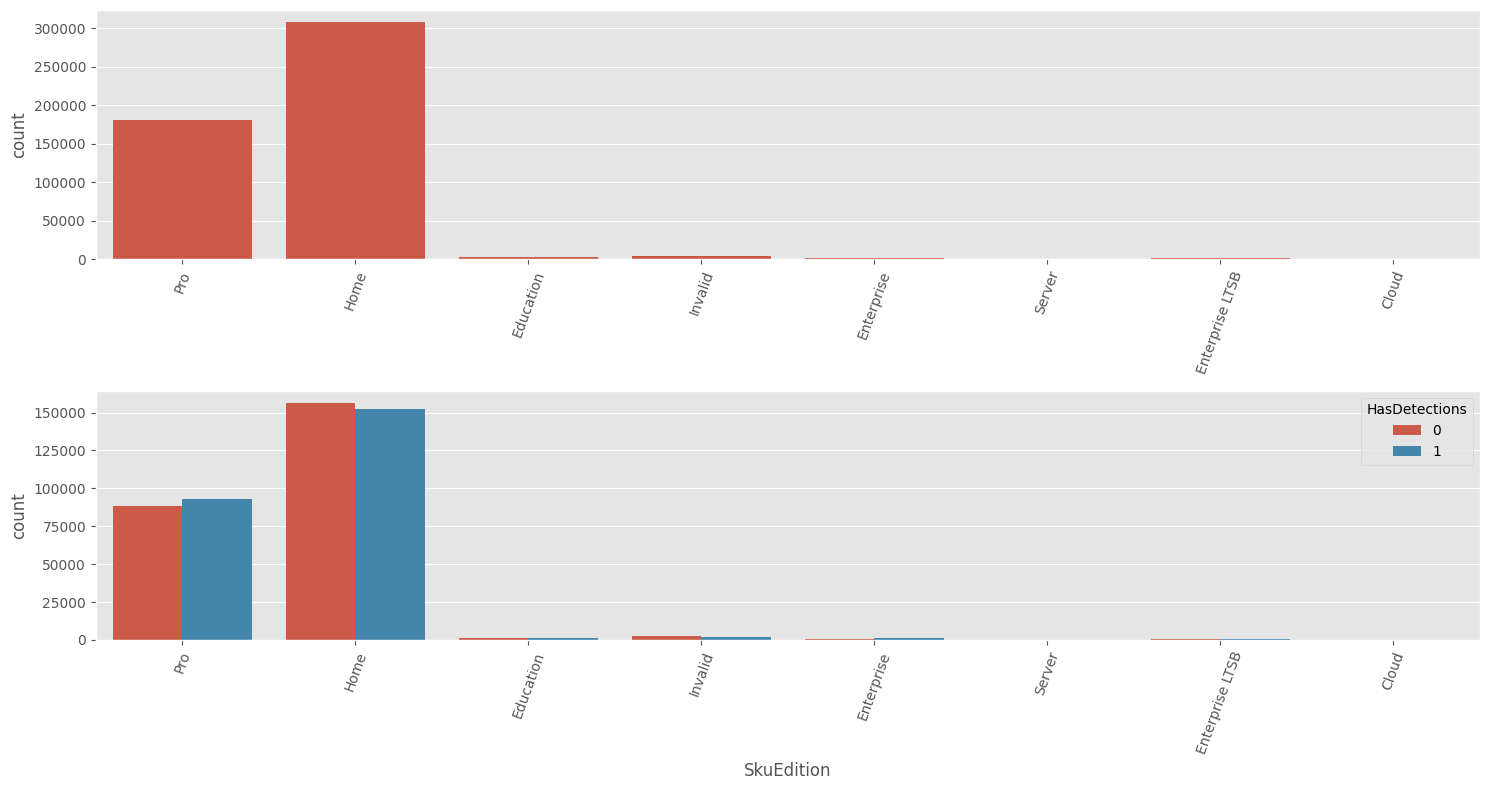

SkuEdition tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
SkuEdition                                                    
Home                   308567       152007            0.492622
Pro                    181042        92853            0.512881
Invalid                  4423         2069            0.467782
Education                2321         1202            0.517880
Enterprise               1999         1035            0.517759
Enterprise LTSB          1141          614            0.538124
Cloud                     309          121            0.391586
Server                    198           52            0.262626

In [40]:
analisis_cat(df,'SkuEdition',TARGET)

- vemos que se trata de una variable sin nulos la cual ninguna de sus categorías difiere de la media del target por lo que es poco explicativa
- la mayoría de máquinas se trata de máquina para uso doméstico seguidas de Pro
- no se trata de una variable con mucha varianza, exceptuando los casos de cloud o server los cuales tienen muy poco número de máquinas

Optamos por no tenerla en cuenta en el modelo por lo que la añadimos a la lista *no_explicativas*

In [41]:
no_explicativas.append('SkuEdition')

#### SmartScreen

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

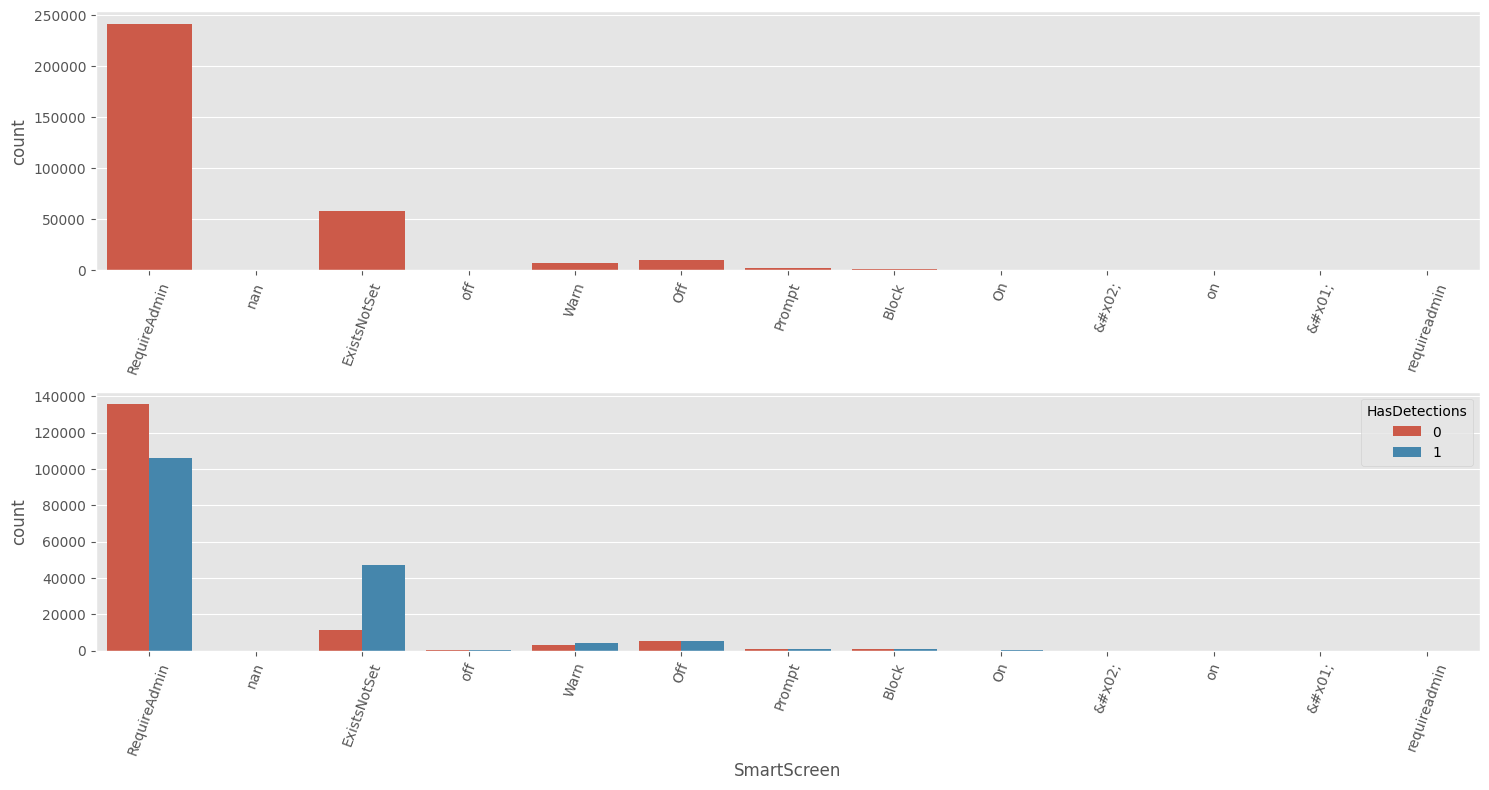

SmartScreen tiene 178596 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
SmartScreen                                                
RequireAdmin        241594       105890            0.438297
ExistsNotSet         58497        47115            0.805426
Off                  10388         5055            0.486619
Warn                  7530         4306            0.571846
Prompt                1950          928            0.475897
Block                 1274          640            0.502355
off                     75           43            0.573333
On                      53           36            0.679245
&#x02;                  20           11            0.550000
&#x01;                  14            6            0.428571
on                       8            4            0.500000
requireadmin             1            0            0.000000

In [42]:
analisis_cat(df,'SmartScreen',TARGET)

- tenemos una gran cantidad de nulos los cuales debemos de saber imputar, en este caso deben de ir a la columna **ExistNotSet**
- agrupar categorías que son iguales (on On, off Off,RequireAdmin requireadmin)
- podemos ver que se trata de una variable con bastante varianza en las dos categorías no nulas más repetidas

En [Data Preparation](#limpieza) optaremos por:
- agrupar las categorías de manera adecuada (On y on agruparlas como on y lo mismo con la categoría de Off)
- asignaremos los nulos a la categoría **ExistNotSet**
- reducir el número de categorías de modo que todas tengan un número significativo de máquinas
- aplicar un OneHotEncoding

#### Census_MDC2FormFactor

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

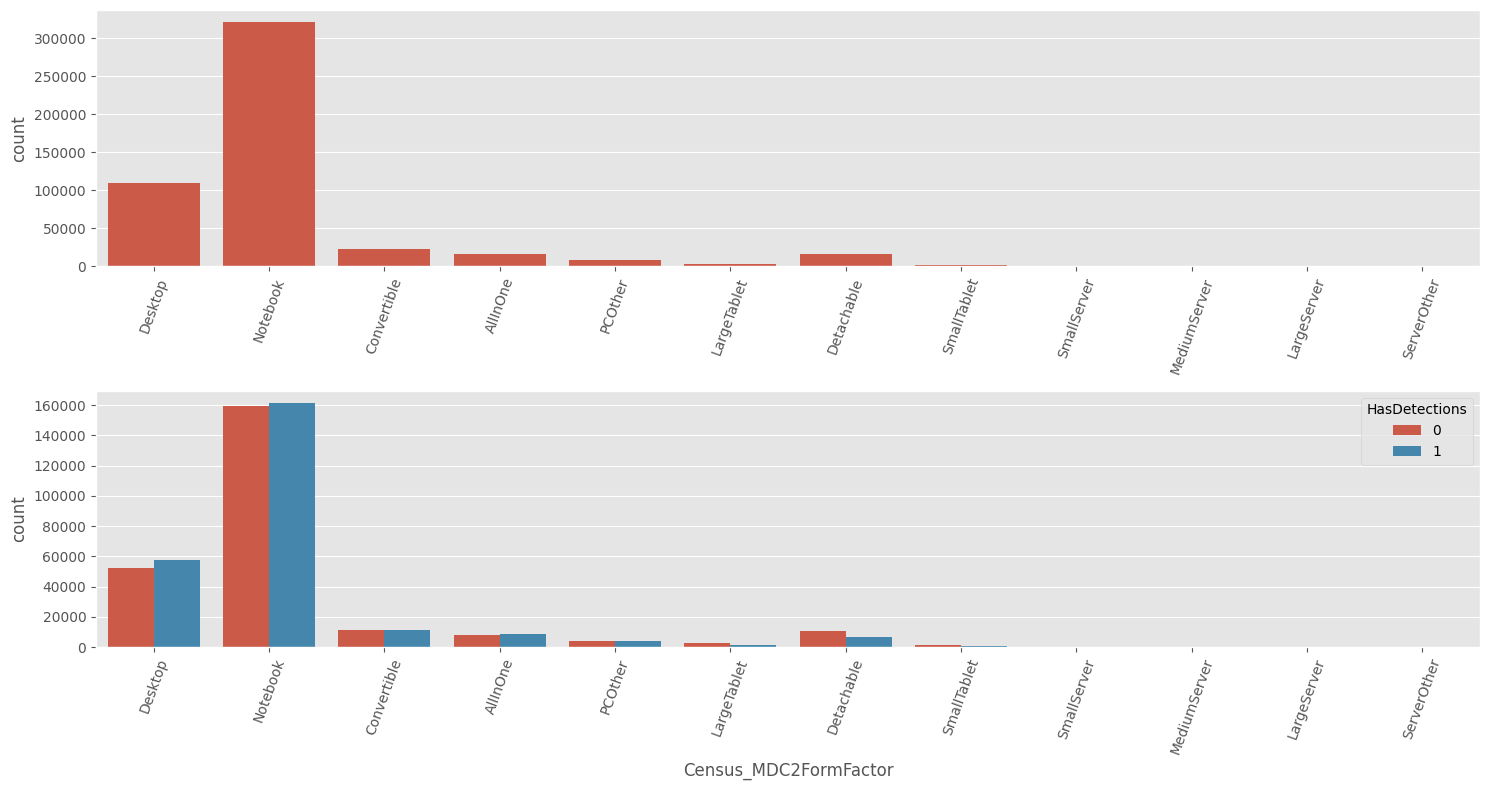

Census_MDC2FormFactor tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_MDC2FormFactor                                               
Notebook                     320948       161411            0.502919
Desktop                      109527        57306            0.523213
Convertible                   22369        11025            0.492870
Detachable                    16802         6351            0.377991
AllInOne                      16372         8384            0.512094
PCOther                        7800         3715            0.476282
LargeTablet                    3645         1138            0.312209
SmallTablet                    1797          360            0.200334
SmallServer                     496          191            0.385081
MediumServer                    192           62            0.322917
LargeServer                      50           10            0.200000
ServerOther                       2            0            0.000000

In [43]:
analisis_cat(df,'Census_MDC2FormFactor',TARGET)

- se trata de una variable sin nulos que informa del tipo de ordenador. Aparentemente es una variable explicativa aunque sus categorías más repetidas no lo sean

En el [Data Preparation](#limpieza) optaremos por:
- agrupar las últimas 6 categorías en una llamada Others de modo que todas las categorías tengan un número significativo de máquinas 
- aplicar OneHotEncoding

#### Census_DeviceFamily

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

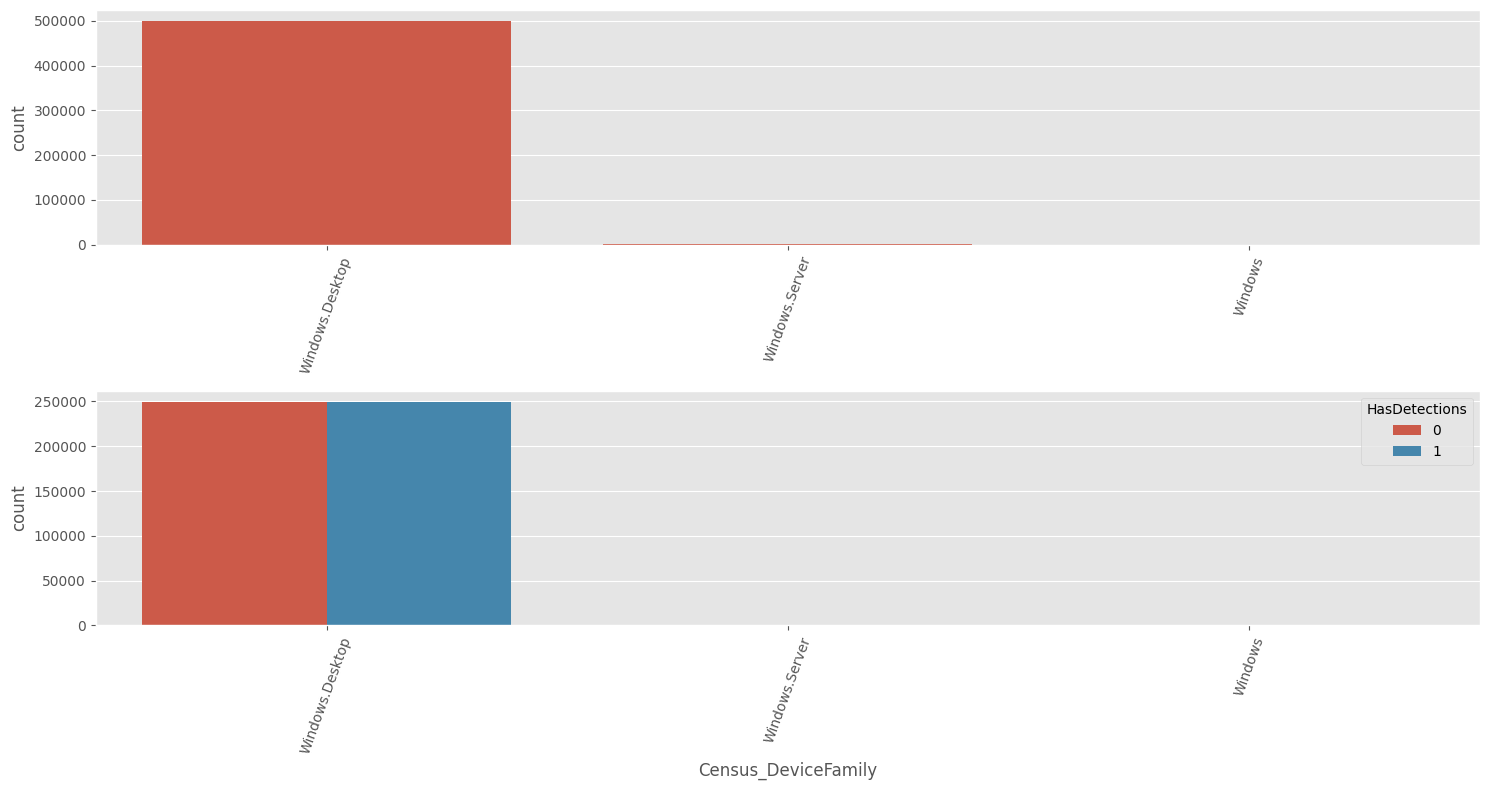

Census_DeviceFamily tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_DeviceFamily                                               
Windows.Desktop            499183       249651            0.500119
Windows.Server                816          302            0.370098
Windows                         1            0            0.000000

In [44]:
analisis_cat(df,'Census_DeviceFamily',TARGET)

- se trata de una variable sin nulos la cual es no explicativa ya que el 99% de los datos tienen el mismo porcentaje que el target.
Por lo tanto añadimos la columna a la lista *no_explicativas*

In [45]:
no_explicativas.append('Census_DeviceFamily')

#### Census_PrimaryDiskTypeName

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

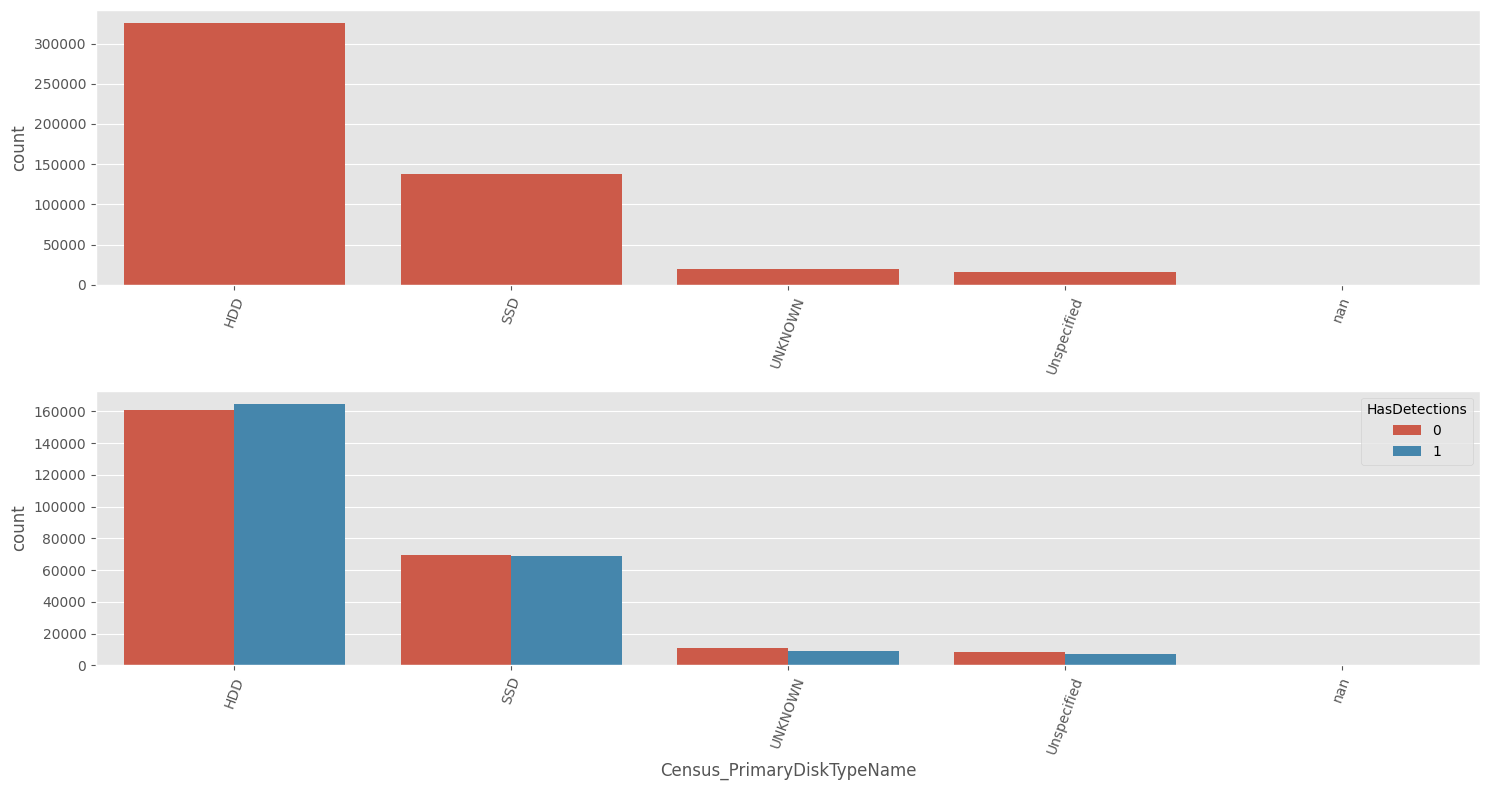

Census_PrimaryDiskTypeName tiene 709 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_PrimaryDiskTypeName                                               
HDD                               325429       164762            0.506292
SSD                               138155        68821            0.498143
UNKNOWN                            20083         9019            0.449086
Unspecified                        15624         7000            0.448029

In [46]:
analisis_cat(df,'Census_PrimaryDiskTypeName',TARGET)

- se trata de una variable con 4 categorías la cual posee nulos.
- observamos que no es una variable muy explicativa en general exceptuando las categorías **UNKNOWN** y **Unspecified**

En el [Data Preparation](#limpieza) optaremos por:
- agrupar los nulos y las categorías **UNKNOWN** y **Unspecified** bajo una categoría llamada **unknown**
- aplicar un OneHotEncoding y quedarnos únicamente con la columna de **unknown**, que es aquella que aporta información útil

#### Census_ChassisTypeName

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

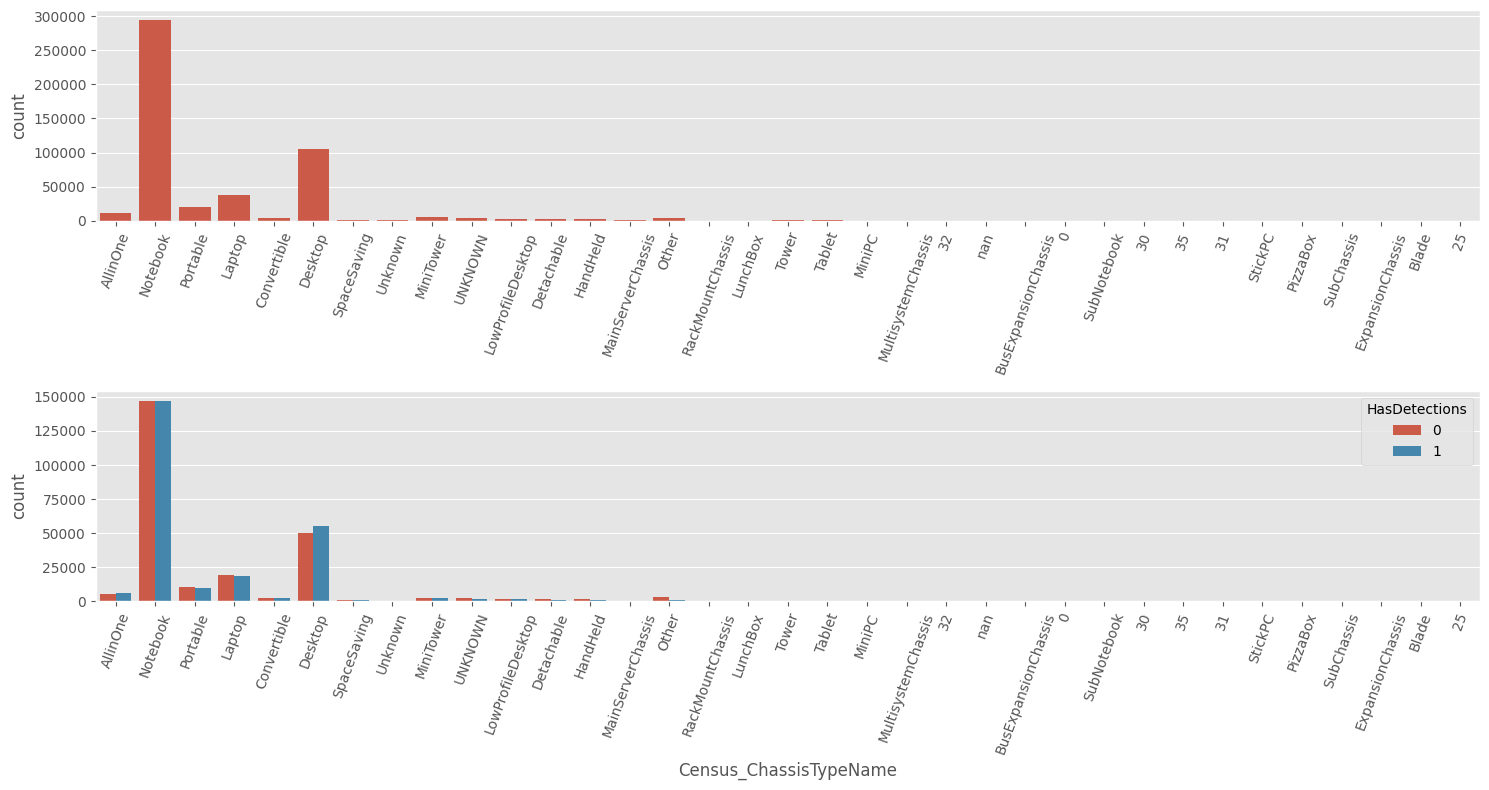

Census_ChassisTypeName tiene 37 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_ChassisTypeName                                               
Notebook                      294232       147270            0.500523
Desktop                       104979        55150            0.525343
Laptop                         38261        18864            0.493035
Portable                       20181         9696            0.480452
AllinOne                       11407         5831            0.511177
MiniTower                       4849         2597            0.535574
Convertible                     4685         2252            0.480683
Other                           4215         1151            0.273072
UNKNOWN                         3695         1636            0.442760
Detachable                      2930         1020            0.348123
LowProfileDesktop               2878         1481            0.514593
HandHeld                        2652          784            0.295626
SpaceSaving                     1689          807            0.477798
Tablet                           730          263            0.360274
Tower                            692          362            0.523121
Unknown                          575          247            0.429565
MainServerChassis                512          228            0.445312
MiniPC                           261           89            0.340996
LunchBox                         224          102            0.455357
RackMountChassis                 189           62            0.328042
SubNotebook                       47           17            0.361702
BusExpansionChassis               38           15            0.394737
30                                11            3            0.272727
StickPC                            7            0            0.000000
0                                  5            2            0.400000
Blade                              3            0            0.000000
35                                 3            1            0.333333
PizzaBox                           3            1            0.333333
MultisystemChassis                 3            1            0.333333
SubChassis                         2            1            0.500000
31                                 2            2            1.000000
ExpansionChassis                   1            0            0.000000
32                                 1            1            1.000000
25                                 1            0            0.000000

In [47]:
analisis_cat(df,'Census_ChassisTypeName',TARGET)

- observamos que se trata de una variable con nulos la cual tiene muchas categorías que pueden ser agrupadas y no lo son debido a la ortografía. 
- las categorías con mayor número de máquinas no son muy explicativas. Tras el procesamiento de la misma valoraremos si se trata o no de una variable explicativa.

En el [Data Preparation](#limpieza) optaremos por:

- los nulos y las columnas **UNKNOWN**, **Other**, **Unknown** agruparlas bajo un mismo nombre
- reorganizar columnas ya  que hay muchos nombres que significan lo mismo
- luego revisaremos si está relacionada con la columna **Census_MDC2FormFactor**, y si es así, eliminar una de las dos 
- por último realizaremos un OneHotEncoding

#### Census_PowerPlatformRoleName

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

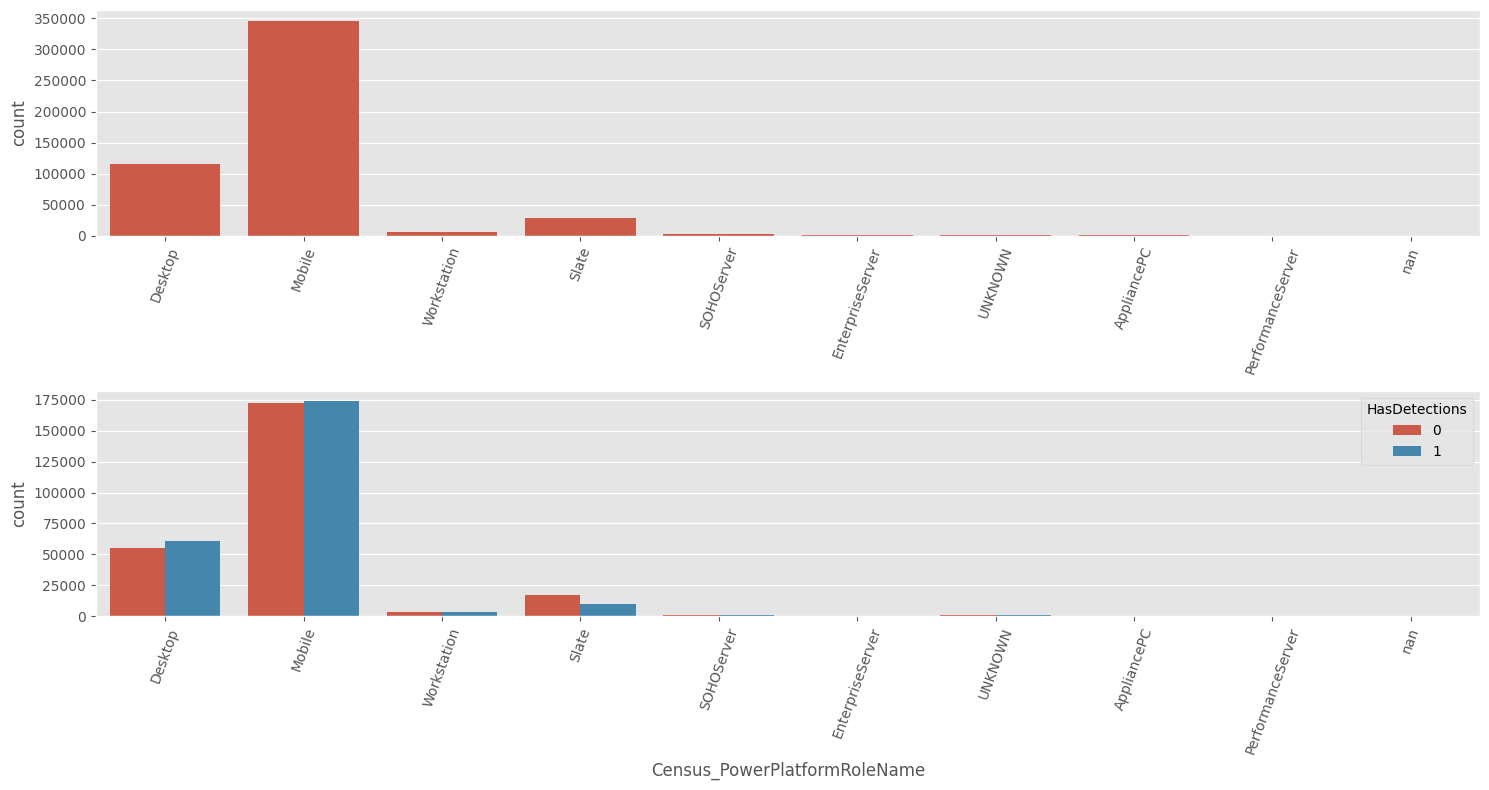

Census_PowerPlatformRoleName tiene 2 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_PowerPlatformRoleName                                               
Mobile                              346378       173910            0.502082
Desktop                             116054        60942            0.525118
Slate                                27475        10082            0.366952
Workstation                           6235         3198            0.512911
SOHOServer                            2062         1024            0.496605
UNKNOWN                               1172          571            0.487201
EnterpriseServer                       406          177            0.435961
AppliancePC                            212           46            0.216981
PerformanceServer                        4            3            0.750000

In [48]:
analisis_cat(df,'Census_PowerPlatformRoleName',TARGET)

- se trata de una variable con nulos y muy similar a la anterior columna
- es más explicativa que la anterior ya que los porcentajes en malware de sus categorías con más máquinas difieren más de la media del target
- comprobar la relación que guarda con la anterior variable y eliminar una de las dos en caso de estar directamente relacionadas

En caso de no guardar relación con la variable **Census_ChassisTypeName** en el [Data Preparation](#limpieza) deberemos:
- asignar los nulos a la columna **UNKNOWN**
- agrupar aquellas categorías con un bajo número de máquinas bajo una categoría llamada **Others**
- aplicar un OneHotEncoding

#### Census_InternalBatteryType

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

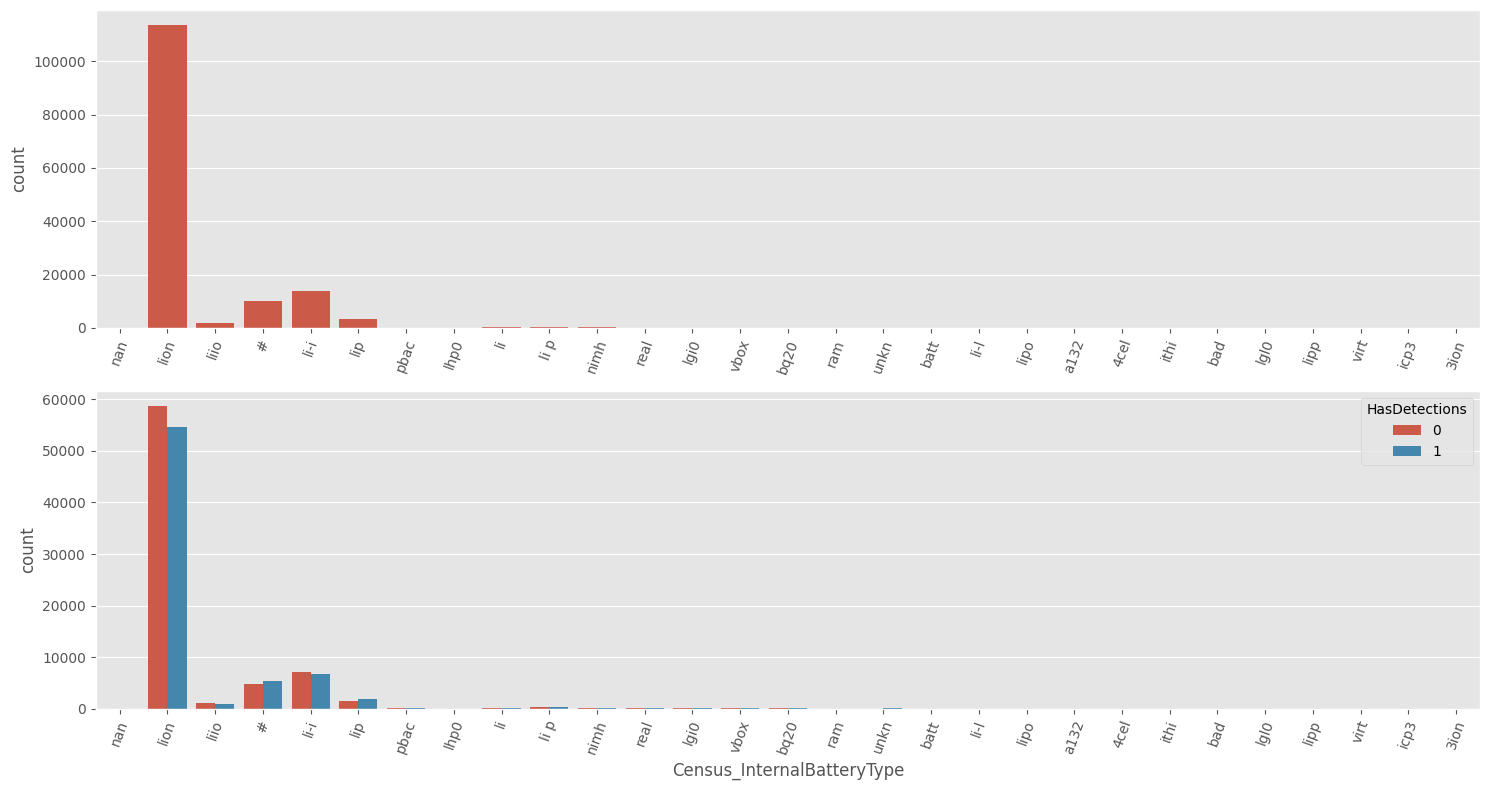

Census_InternalBatteryType tiene 355603 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_InternalBatteryType                                               
lion                              113500        54715            0.482070
li-i                               13855         6718            0.484879
#                                  10176         5321            0.522897
lip                                 3326         1791            0.538485
liio                                1814          830            0.457552
li p                                 466          218            0.467811
li                                   356          154            0.432584
nimh                                 272          118            0.433824
real                                 162           85            0.524691
bq20                                 143           38            0.265734
pbac                                 130           65            0.500000
vbox                                  89           22            0.247191
lgi0                                  29           17            0.586207
unkn                                  19           11            0.578947
lipo                                  13            6            0.461538
lhp0                                  12            4            0.333333
ithi                                   7            2            0.285714
4cel                                   6            1            0.166667
ram                                    5            1            0.200000
bad                                    3            1            0.333333
lipp                                   3            2            0.666667
batt                                   3            0            0.000000
a132                                   2            1            0.500000
virt                                   2            0            0.000000
3ion                                   1            0            0.000000
lgl0                                   1            1            1.000000
icp3                                   1            1            1.000000
li-l                                   1            1            1.000000

In [49]:
analisis_cat(df,'Census_InternalBatteryType',TARGET)

Se trata de una variable en la que tenemos más nulos que valores no nulos. Observamos también que sus categorías con mayor número de máquinas no resultan ser muy significativas.

Por lo tanto optamos por no contar con esta variable para el modelo y pasamos a añadirla a la lista *no_explicativas*.

In [50]:
no_explicativas.append('Census_InternalBatteryType')

#### Census_OSVersion

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

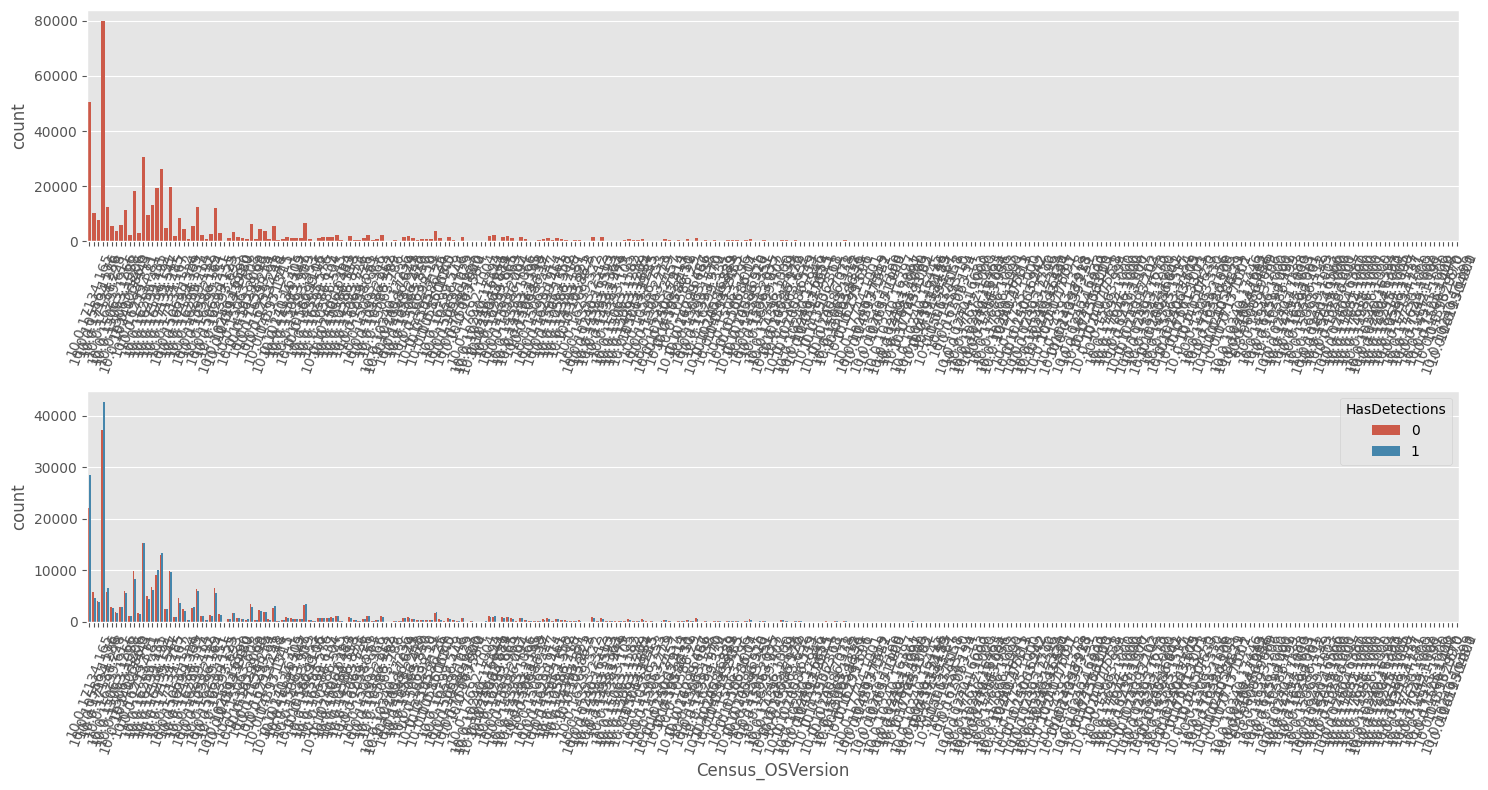

Census_OSVersion tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSVersion                                               
10.0.17134.228           79975        42726            0.534242
10.0.17134.165           50511        28404            0.562333
10.0.16299.431           30519        15207            0.498280
10.0.17134.285           26289        13265            0.504584
10.0.17134.112           19501         9661            0.495410
...                        ...          ...                 ...
10.0.14393.1670              1            0            0.000000
10.0.10240.16399             1            0            0.000000
10.0.17134.281               1            0            0.000000
10.0.17604.1000              1            1            1.000000
6.3.9600.19069               1            0            0.000000

[305 rows x 3 columns]

In [51]:
analisis_cat(df,'Census_OSVersion',TARGET)

- se trata de una variable sin nulos y con un total de 305 versiones diferenres. Vemos que la distribución es medianamente uniforme entre algunas categorías pero la gran mayoría tienen muy pocas máquinas.

Para poder analizar mejor la relación entre las actualizaciones y el porcentaje de malware haremos uso de la función *version_relacion*. Gracias a esta vamos a reducir el número de versiones agrupándolas eliminando el último número de la cadena (ej: 10.0.17134.228 y 10.0.17134.165 pasarían a 10.0.17134).

In [52]:
version_relacion(df,'Census_OSVersion',[4])

Census_OSVersion_processed tiene 0 nulos 



Census_OSVersion_processed  Num_maquinas  Con_malware  Porcentaje_malware
26                    10018242            13            8            0.615385
25                    10018237            14            6            0.428571
24                    10018234            14            5            0.357143
40                    10018219             1            1            1.000000
41                    10018214             1            0            0.000000
11                    10017763            59           23            0.389831
19                    10017760            31           20            0.645161
9                     10017758            99           42            0.424242
15                    10017755            40           23            0.575000
12                    10017754            59           30            0.508475
47                    10017753             1            0            0.000000
13                    10017751            54           17            0.314815
48                    10017749             1            0            0.000000
31                    10017747             3            1            0.333333
10                    10017746            65           24            0.369231
8                     10017744           135           64            0.474074
14                    10017741            45           21            0.466667
6                     10017738           165           59            0.357576
16                    10017735            39           19            0.487179
17                    10017733            35           18            0.514286
33                    10017730             2            2            1.000000
57                    10017723             1            0            0.000000
28                    10017713             8            2            0.250000
7                     10017692           146           77            0.527397
18                    10017686            34           12            0.352941
21                    10017682            20            6            0.300000
22                    10017677            17            7            0.411765
23                    10017672            15            4            0.266667
29                    10017666             7            1            0.142857
27                    10017661             9            3            0.333333
34                    10017655             2            1            0.500000
35                    10017650             2            1            0.500000
32                    10017639             3            0            0.000000
30                    10017634             4            4            1.000000
37                    10017623             1            1            1.000000
59                    10017618             1            0            0.000000
58                    10017604             1            1            1.000000
0                     10017134        225979       117998            0.522164
20                    10017133            21           10            0.476190
56                    10017074             1            1            1.000000
55                    10017046             1            0            0.000000
54                    10017004             1            0            0.000000
1                     10016299        136572        66880            0.489705
53                    10016251             1            0            0.000000
52                    10016193             1            0            0.000000
2                     10015063         44262        21229            0.479621
51                    10015048             1            0            0.000000
50                    10015042             1            1            1.000000
49                    10015019             1            1            1.000000
36                    10014986             2            2            1.000000
46                    1001

Fijándonos únicamente en aquellas categorías que poseen un número significativo de máquinas no observamos una relación ordenada entre las actualizaciones y la disminución o aumento del porcentaje de malware. 

Por lo tanto en el [Data Preparation](#limpieza) optaremos por:
- reducir el número de versiones de modo que tengamos en todas un número significativo de máquinas
- analizar si se trata de una variable explicativa, si no lo es añadirla a la lista *no_explicativas*
- si es explicativa aplicar un OneHotEncoding

#### Census_OSArchitecture

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

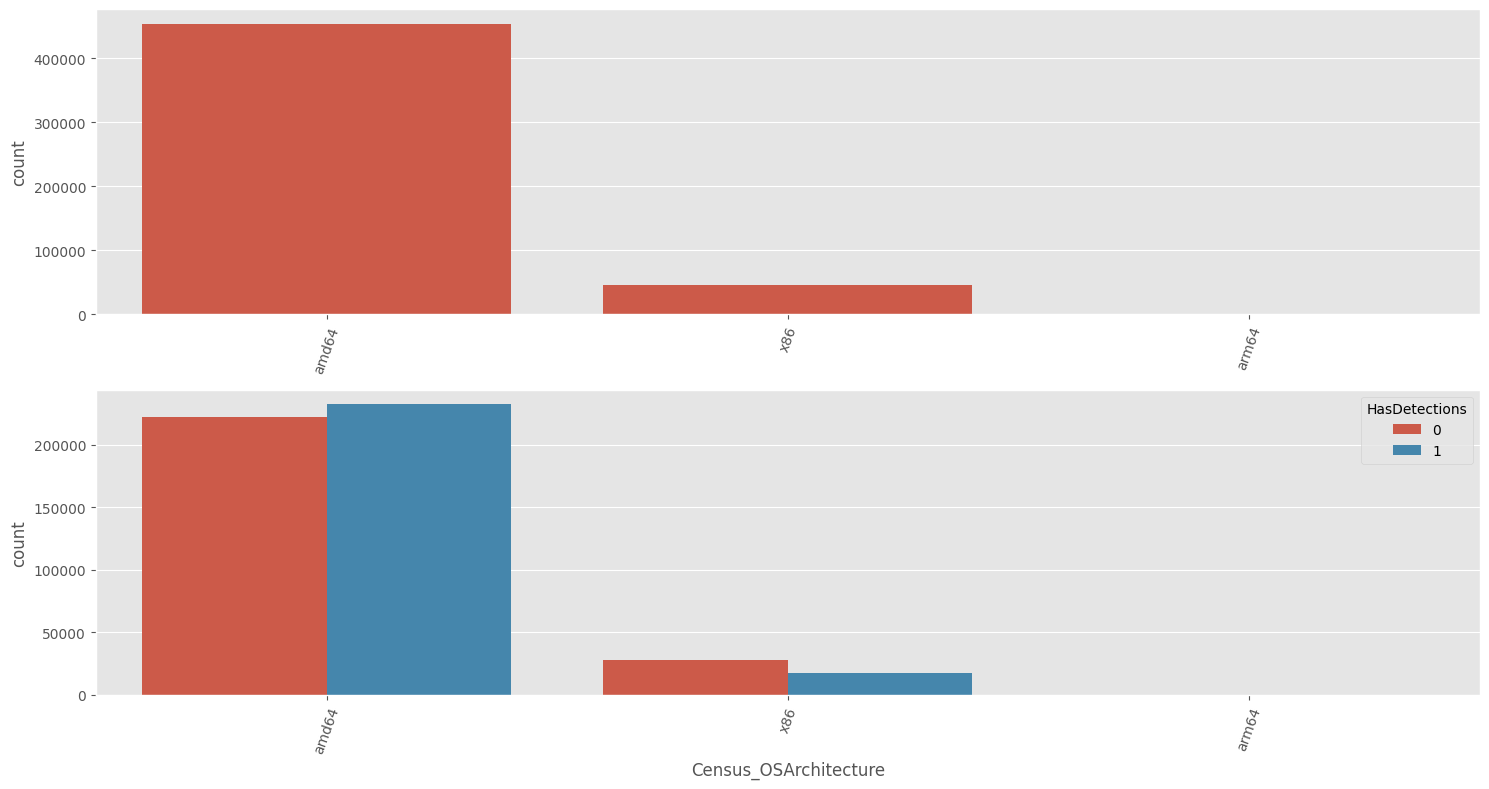

Census_OSArchitecture tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSArchitecture                                               
amd64                        454435       232267            0.511112
x86                           45551        17686            0.388268
arm64                            14            0            0.000000

In [53]:
analisis_cat(df,'Census_OSArchitecture',TARGET)

- se trata de una variable sin nulos prácticamente identica a la variable **Processor** por lo que debemos comprobar su relación con la misma 

En el apartado de [Análisis multivariante](#analisis_multivariante) observamos que efectivamente aporta la misma información que la columna **Processor** por lo que procedemos a eliminarla añadiendola a la lista *no_explicativas*.

In [54]:
no_explicativas.append('Census_OSArchitecture')

#### Census_OSBranch

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

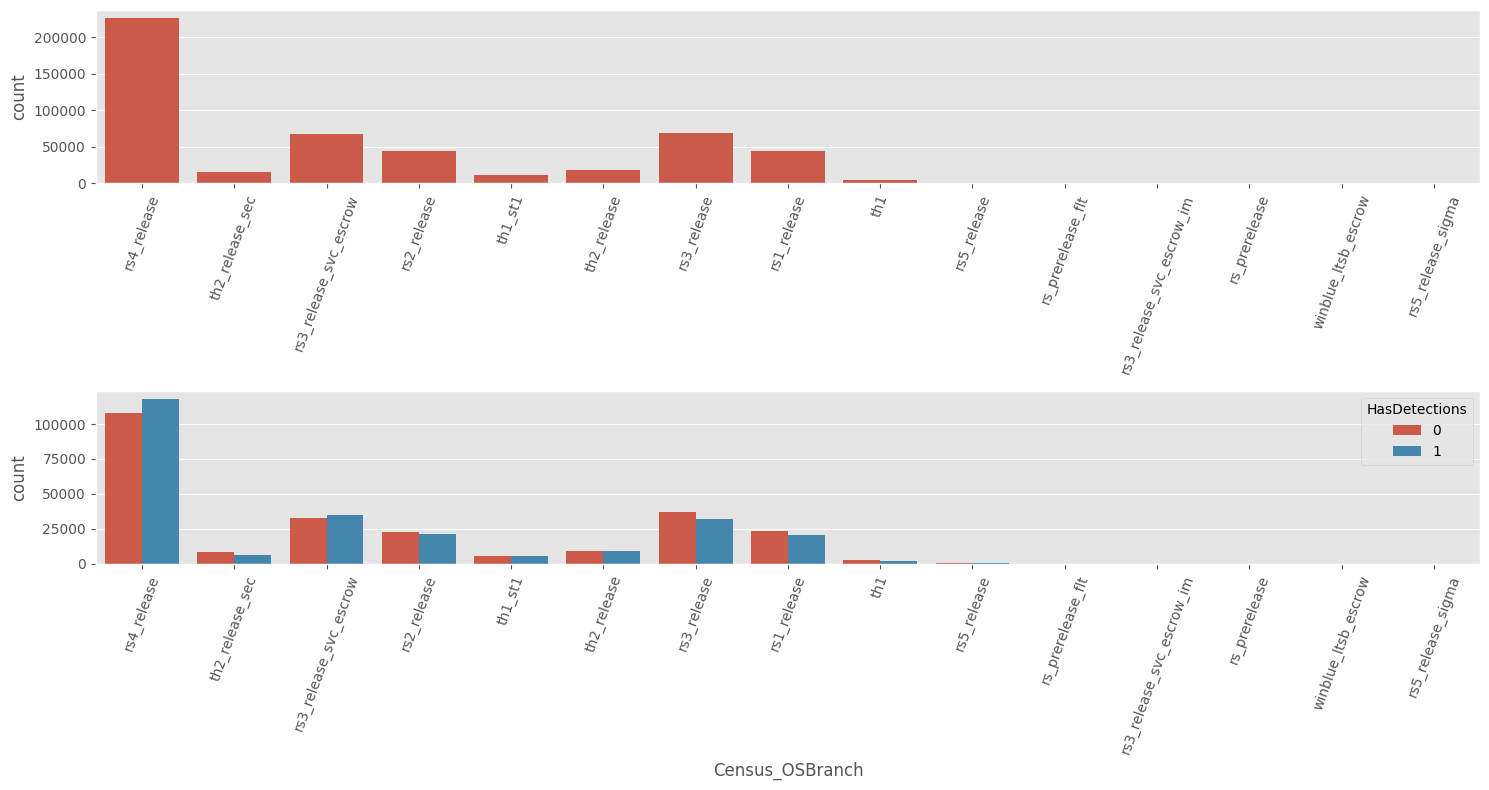

Census_OSBranch tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSBranch                                                         
rs4_release                      226001       118008            0.522157
rs3_release                       69216        32176            0.464864
rs3_release_svc_escrow            67027        34572            0.515792
rs2_release                       44264        21230            0.479622
rs1_release                       43705        20322            0.464981
th2_release                       18298         9022            0.493059
th2_release_sec                   14895         6638            0.445653
th1_st1                           10822         5451            0.503696
th1                                4284         1892            0.441643
rs5_release                         839          364            0.433850
rs3_release_svc_escrow_im           329          132            0.401216
rs_prerelease                       184           76            0.413043
rs_prerelease_flt                   132           69            0.522727
rs5_release_sigma                     3            1            0.333333
winblue_ltsb_escrow                   1            0            0.000000

In [55]:
analisis_cat(df,'Census_OSBranch',TARGET)

- se trata de una variable sin nulos la cual se parece bastante a la variable **OsPlatformSubRelease** la cual hemos añadido a la lista **no_explicativa**
- aparentemente se trata de una variable más explicativa que **OsPlatformSubRelease** ya que sus categorías con más máquinas difieren más de la media del target

En caso de no aportar la misma información que **OsPlatformSubRelease** en [Data Preparation](#limpieza):
- agruparemos las categorías con menor número de máquinas bajo una categoría llamada Others
- aplicaremos un OneHotEncoding

#### Census_OSEdition

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

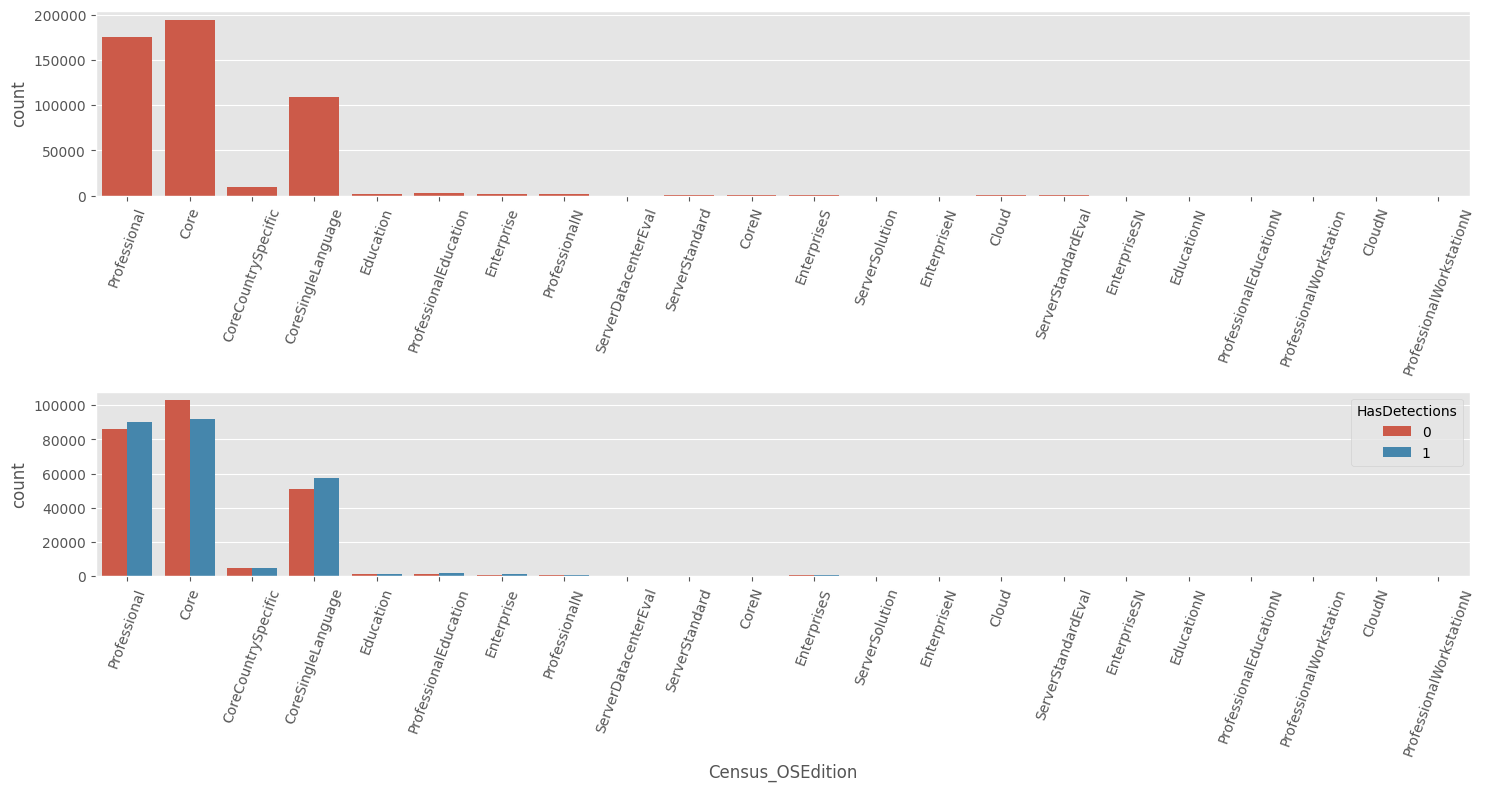

Census_OSEdition tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSEdition                                                       
Core                            194469        91666            0.471366
Professional                    175808        89889            0.511291
CoreSingleLanguage              108696        57588            0.529808
CoreCountrySpecific               9275         4755            0.512668
ProfessionalEducation             3100         1695            0.546774
Education                         2310         1210            0.523810
Enterprise                        2055         1065            0.518248
ProfessionalN                     1624          873            0.537562
EnterpriseS                       1108          583            0.526173
ServerStandard                     584          237            0.405822
Cloud                              336          134            0.398810
CoreN                              251          108            0.430279
ServerStandardEval                 151           37            0.245033
EducationN                          61           28            0.459016
ServerDatacenterEval                47           15            0.319149
EnterpriseSN                        47           35            0.744681
ServerSolution                      34           13            0.382353
EnterpriseN                         28           16            0.571429
ProfessionalEducationN              12            4            0.333333
ProfessionalWorkstation              2            1            0.500000
CloudN                               1            0            0.000000
ProfessionalWorkstationN             1            1            1.000000

In [56]:
analisis_cat(df,'Census_OSEdition',TARGET)

- se trata de una variable sin nulos la cual posee numerosas categorías, la mayoría de ella por debajo de 5000 máquinas.
- debido a que no conocemos al 100% si la letra al final es significativa y distingue realmente por ejemplo las máquinas de Core y CoreN vamos a dejarlas tal y como están en vez de realizar una posible reagrupación.

En el [Data Preparation](#limpieza):
- realizaremos una agrupación de aquellas categorías con pocas máquinas bajo la categoría Others
- observaremos si se trata de una variable explicativa 
- finalmente aplicaremos un OneHotEncoding en caso de que la variable sea explicativa

#### Census_OSSkuName

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

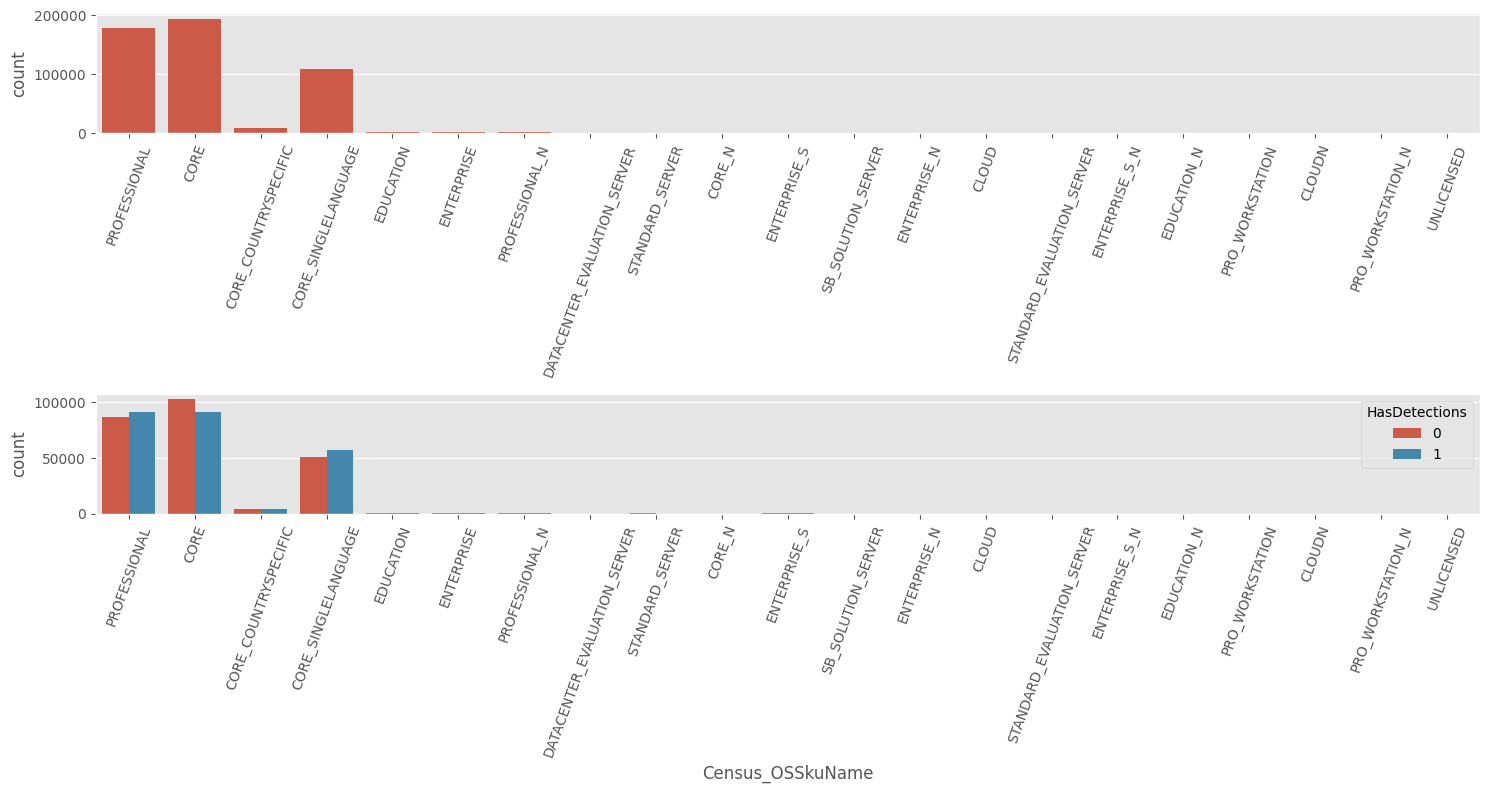

Census_OSSkuName tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSSkuName                                                           
CORE                                194464        91666            0.471378
PROFESSIONAL                        178947        91603            0.511900
CORE_SINGLELANGUAGE                 108674        57578            0.529823
CORE_COUNTRYSPECIFIC                  9257         4743            0.512369
EDUCATION                             2313         1213            0.524427
ENTERPRISE                            2063         1067            0.517208
PROFESSIONAL_N                        1634          875            0.535496
ENTERPRISE_S                          1107          583            0.526649
STANDARD_SERVER                        584          237            0.405822
CLOUD                                  332          133            0.400602
CORE_N                                 251          108            0.430279
STANDARD_EVALUATION_SERVER             151           37            0.245033
EDUCATION_N                             61           28            0.459016
ENTERPRISE_S_N                          48           35            0.729167
DATACENTER_EVALUATION_SERVER            47           15            0.319149
SB_SOLUTION_SERVER                      34           13            0.382353
ENTERPRISE_N                            28           16            0.571429
PRO_WORKSTATION                          2            1            0.500000
PRO_WORKSTATION_N                        1            1            1.000000
CLOUDN                                   1            0            0.000000
UNLICENSED                               1            1            1.000000

In [57]:
analisis_cat(df,'Census_OSSkuName',TARGET)

Claramente se trata de una variable relacionada con la variable anterior. Una vez confirmada esta relación en el [Análisis multivariante](#analisis_multivariante) optamos con quedarnos con la variable anterior, ya que según la información que poseemos sobre las columnas, la anterior variable aporta más información (tiene mayor granulidad). Por lo tanto añadimos esta variable a la lista *no_explicativas*.

In [58]:
no_explicativas.append('Census_OSSkuName')

#### Census_OSInstallTypeName

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

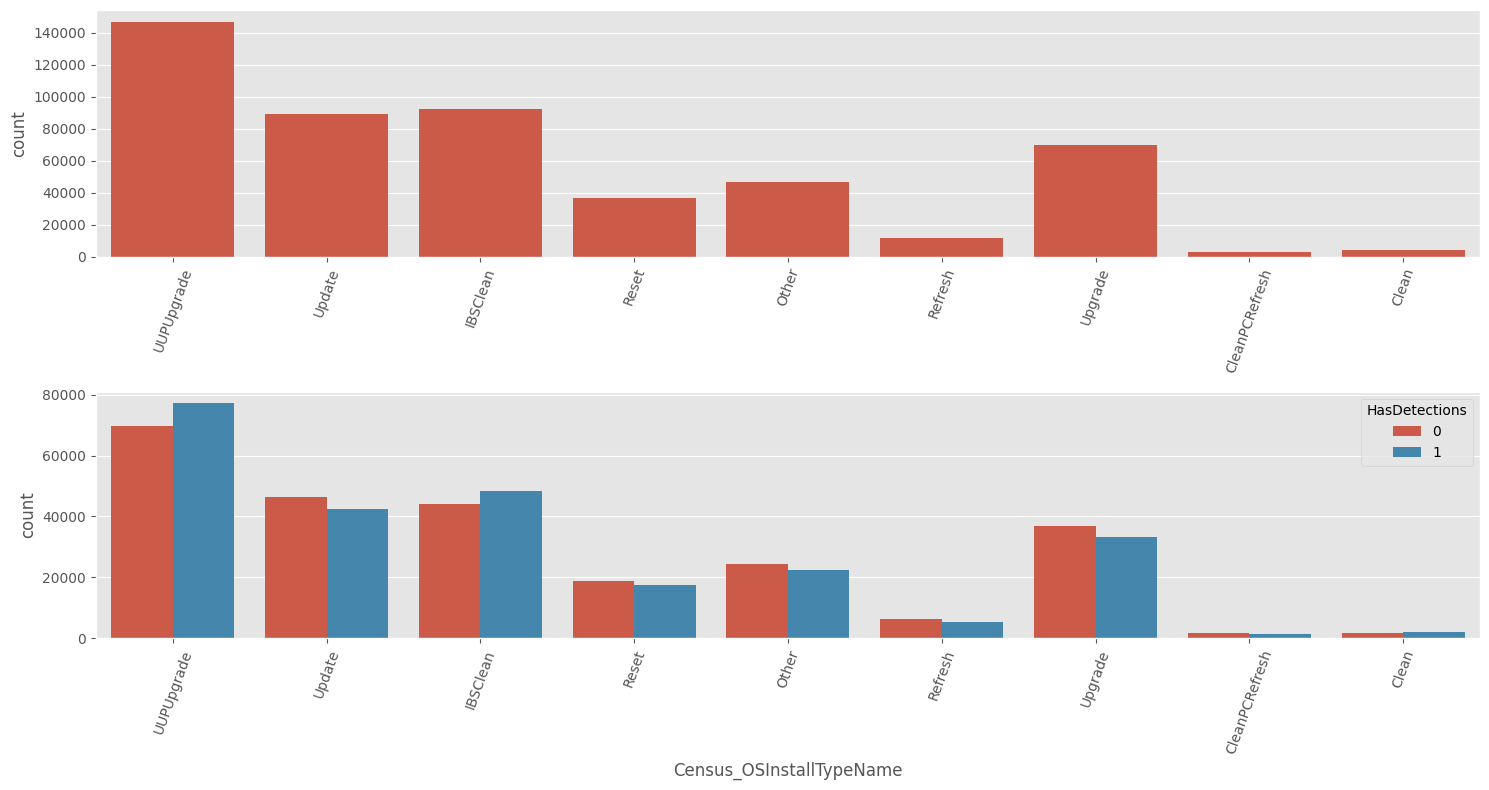

Census_OSInstallTypeName tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSInstallTypeName                                               
UUPUpgrade                      146780        77129            0.525473
IBSClean                         92403        48304            0.522754
Update                           88892        42499            0.478097
Upgrade                          70013        33254            0.474969
Other                            46960        22409            0.477193
Reset                            36510        17605            0.482197
Refresh                          11540         5326            0.461525
Clean                             3885         2032            0.523037
CleanPCRefresh                    3017         1395            0.462380

In [59]:
analisis_cat(df,'Census_OSInstallTypeName',TARGET)

Se trata de una variable sin nulos la cual posee 9 categorías. Ninguna de ellas difiere significativamente de la media del target por lo que se trata de una variable no explicativa. Por lo tanto la añadimos a la lista de *no_explicativas*.

In [60]:
no_explicativas.append('Census_OSInstallTypeName')

#### Census_OSWUAutoUpdateOptionsName

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

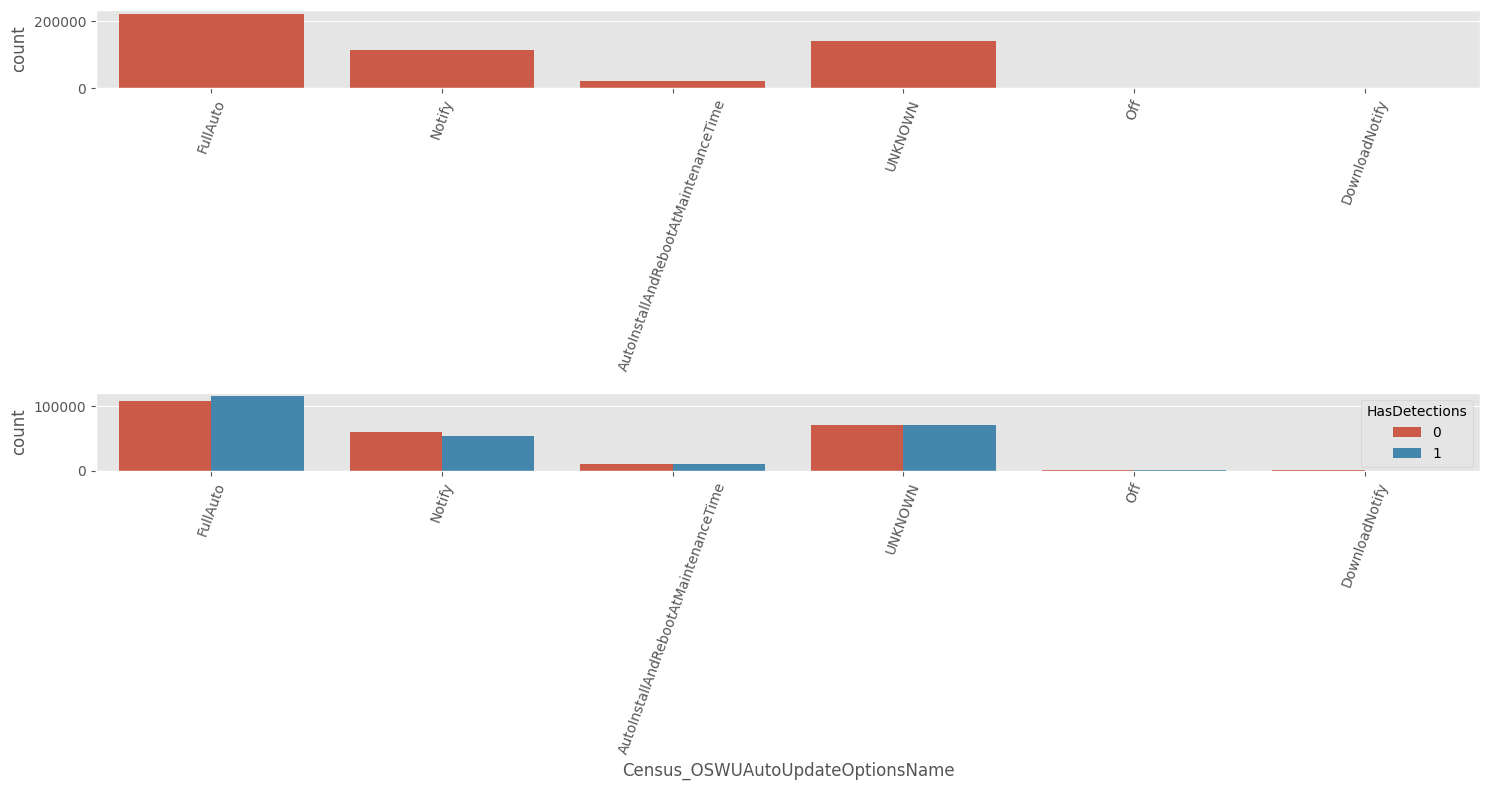

Census_OSWUAutoUpdateOptionsName tiene 0 nulos 



Num_maquinas  Con_malware  \
Census_OSWUAutoUpdateOptionsName                                   
FullAuto                                     222482       114807   
UNKNOWN                                      140961        70190   
Notify                                       113507        53867   
AutoInstallAndRebootAtMaintenanceTime         20731        10056   
Off                                            1506          732   
DownloadNotify                                  813          301   

                                       Porcentaje_malware  
Census_OSWUAutoUpdateOptionsName                           
FullAuto                                         0.516028  
UNKNOWN                                          0.497939  
Notify                                           0.474570  
AutoInstallAndRebootAtMaintenanceTime            0.485071  
Off                                              0.486056  
DownloadNotify                                   0.370234

In [61]:
analisis_cat(df,'Census_OSWUAutoUpdateOptionsName',TARGET)

Se trata de una variable sin nulos la cual consideramos no explicativa (el porcentaje en malware de las categorías significativas no difieren mucho de la media del Target) por lo que vamos a no tenerla en cuenta en el modelo y la añadios a la lista de *no_explicativas*.

In [62]:
no_explicativas.append('Census_OSWUAutoUpdateOptionsName')

#### Census_GenuineStateName

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

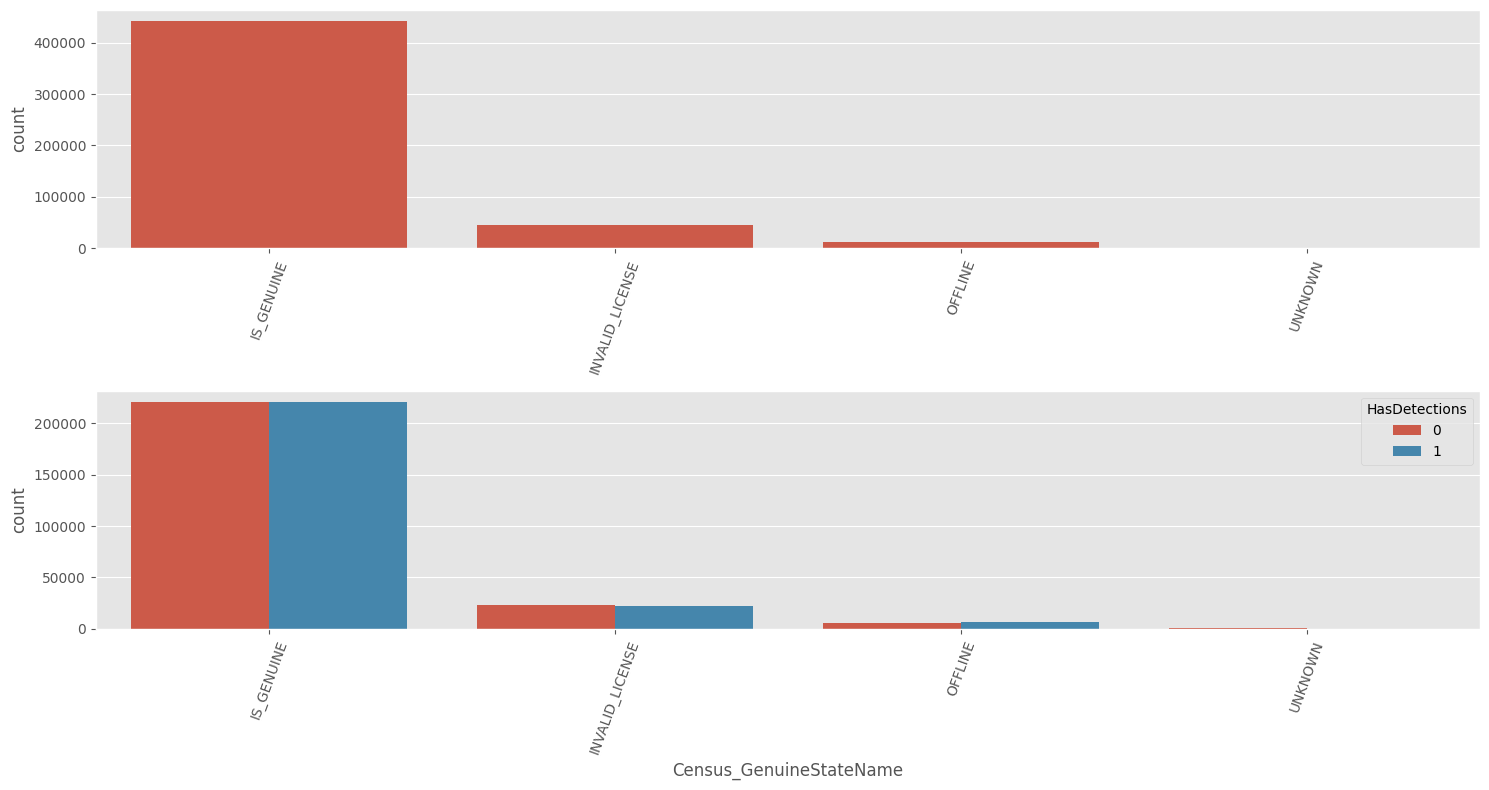

Census_GenuineStateName tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_GenuineStateName                                               
IS_GENUINE                     441402       220477            0.499493
INVALID_LICENSE                 44990        22236            0.494243
OFFLINE                         12834         6994            0.544959
UNKNOWN                           774          246            0.317829

In [63]:
analisis_cat(df,'Census_GenuineStateName',TARGET)

- se trata de una variable sin nulos la cual posee cuatro categorías
- consideramos la variable como explicativa pese a que sus dos categorías principales sean muy similares a la media del target, la categoría OFFLINE difiere de dicha media y abarca un número considerable de máquinas por lo que aplicaremos un OneHotEncoding y nos quedaremos con la columna correspondiente a OFFLINE. De este modo al Decision Tree le resultará más fácil analizar esta variable.

En [Data Preparation](#limpieza):
- aplicar un OneHotEncoding y únicamente quedarnos con la columna que aporta información al modelo, en este caso **OFFLINE**

#### Census_ActivationChannel

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

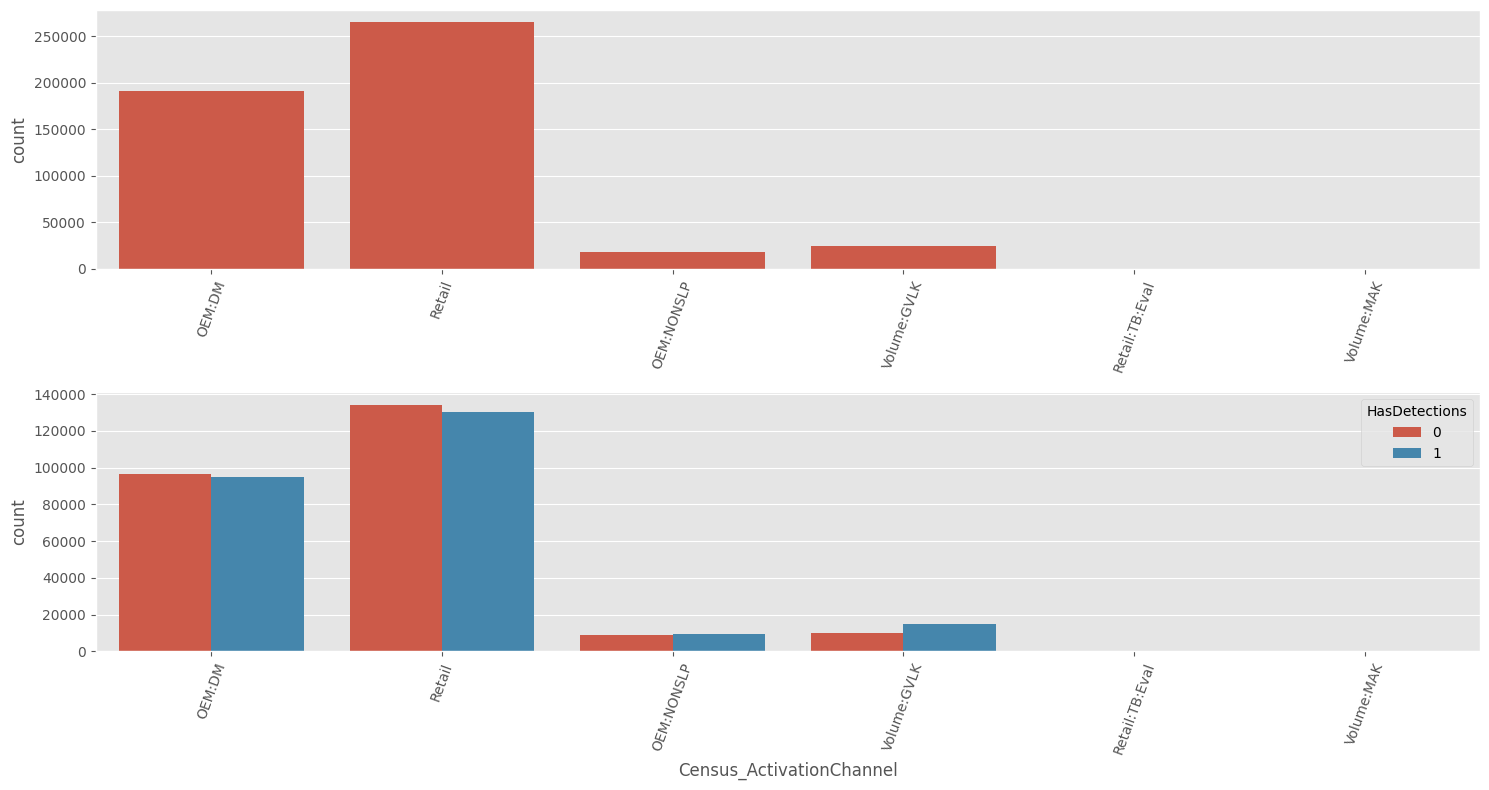

Census_ActivationChannel tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_ActivationChannel                                               
Retail                          264932       130532            0.492700
OEM:DM                          191350        94880            0.495845
Volume:GVLK                      25109        14963            0.595922
OEM:NONSLP                       17943         9314            0.519088
Volume:MAK                         468          212            0.452991
Retail:TB:Eval                     198           52            0.262626

In [64]:
analisis_cat(df,'Census_ActivationChannel',TARGET)

- se trata de una variable sin nulos la cual posee 6 categorías. Claremente posee una categorías muy explicativa como es **Volume:GVLK**.

En [Data Preparation](#limpieza) actuaremos como con la anterior variable:
- aplicamos un OneHotEncoding y únicamente nos quedamos con la columna relativa a **Volume:GVLK**.

#### Census_FlightRing

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

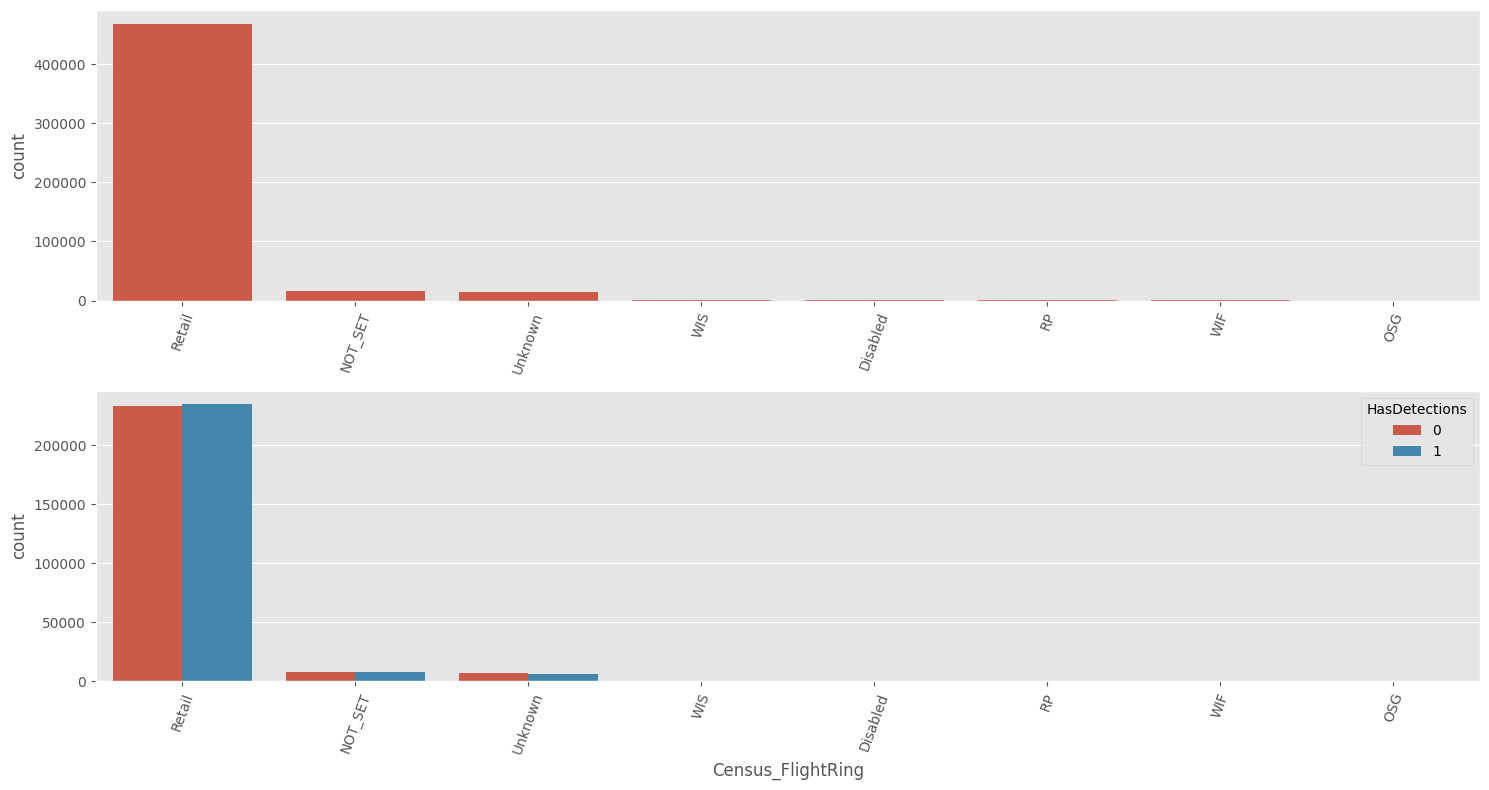

Census_FlightRing tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_FlightRing                                               
Retail                   468299       234693            0.501161
NOT_SET                   16044         7980            0.497382
Unknown                   13701         6378            0.465513
WIS                         606          250            0.412541
RP                          583          299            0.512864
WIF                         549          253            0.460838
Disabled                    217          100            0.460829
OSG                           1            0            0.000000

In [65]:
analisis_cat(df,'Census_FlightRing',TARGET)

- observamos que se trata de una variable sin nulos no muy explicativa. Esto se debe a que el 96% de las máquinas se encuentran en las categorías que poseen un porcentaje de malware muy similar al de todo el dataset por lo que vamos a prescindir de ella.

In [66]:
no_explicativas.append('Census_FlightRing')

### Análisis numéricas

In [67]:
lista_variables_numericas=df.describe(include=np.number).columns.tolist() 
lista_variables_numericas

['IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'AutoSampleOptIn',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdenti

Creamos una fución que nos permite plotear un histograma y dos boxplots que nos ayudaran a obtener información útil sobre la distribución de las variables numéricas y su relación con el target. El primer boxplot indica la distribución de la variable numérica y el segundo nos muestra la distribución de dicha variable en relación con el target.

In [68]:
def plot_num(dataframe, column, target_column):
    """
    Genera tres gráficos para visualizar la distribución de una variable numérica y su relación con una variable objetivo.

    Parámetros:
    dataframe (pd.DataFrame): El dataframe que contiene los datos.
    column (str): El nombre de la columna numérica a explorar.
    target_column (str): El nombre de la columna objetivo que se analizará en relación con la columna numérica.

    Retorna:
    None: La función muestra tres gráficos y no devuelve ningún valor.

    Descripción:
    La función genera una figura con tres subplots:
    - El primer subplot muestra un histograma de la distribución de la variable numérica.
    - El segundo subplot muestra un diagrama de cajas (boxplot) de la variable numérica.
    - El tercer subplot muestra un diagrama de violines (violinplot) de la variable objetivo en relación con la variable numérica.
    """
    plt.figure(figsize=(22,9))
    
    # Primer gráfico: Histograma de la distribución de la variable numérica
    ax1 = plt.subplot(3,1,1)
    sns.histplot(data=dataframe, x=column, bins=30, ax=ax1)
    ax1.set_xlabel('')
    
    # Segundo gráfico: Boxplot de la variable numérica
    ax2 = plt.subplot(3,1,2)
    sns.boxplot(data=dataframe, x=column, ax=ax2)
    ax2.set_xlabel('')
    
    # Tercer gráfico: Boxplot de la variable objetivo en relación con la variable numérica
    ax3 = plt.subplot(3,1,3)
    sns.violinplot(data=dataframe, x=target_column, y=column, ax=ax3)
    
    plt.tight_layout()
    plt.show()

#### Booleanas

Debido a que gran parte de las variables numéricas se tratan de variables booleanas, compuestas únicamente por 1 y 0, vamos a crear una función para identificarlas.

In [69]:
def sacar_booleanas(dataframe, lista_numericas,target_col):
    """
    Identifica y devuelve una lista de columnas numéricas en el dataframe que contienen solo valores booleanos (0 y 1).

    Parámetros:
    dataframe (pd.DataFrame): El dataframe que contiene los datos.
    lista_numericas (list): Una lista de nombres de columnas numéricas a verificar.
    target_col (str): El nombre de la columna Target que se excluirá de la verificación.

    Retorna:
    list: Una lista de nombres de columnas que contienen solo valores booleanos (0 y 1).
    """
    booleanas = []
    for var in lista_numericas:
        if var == target_col:
            continue 
        if dataframe[var].dropna().isin([0, 1]).all():
            booleanas.append(var)
    return booleanas

In [70]:
lista_booleanas = sacar_booleanas(df,lista_variables_numericas,TARGET)
lista_booleanas

['IsBeta',
 'IsSxsPassiveMode',
 'HasTpm',
 'IsProtected',
 'AutoSampleOptIn',
 'SMode',
 'Firewall',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsWIMBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

Para estudiar estas variables booleanas vamos a usar el mismo procedimiento que con las variables categóricas, ya que al tener solo True y False, es como si fuesen dos categorías, de este modo su análisis será más fácil. Debido a que en este caso las categorías son solo 2 (o 3 en el caso de que tenga nulos), vamos a crear una nueva función llamada plot_bool en la que únicamente cambiaremos el tamaño de la imagen.

In [71]:
def plot_bool(dataframe, column, target_column):
    """
    Genera dos gráficos de barras para visualizar la distribución de valores categóricos y su relación con el Target.

    Parámetros:
    dataframe (pd.DataFrame): El dataframe que contiene los datos.
    column (str): El nombre de la columna categórica a explorar.
    target_column (str): El nombre de la columna Target que se analizará en relación con la columna categórica.

    Retorna:
    None: La función muestra dos gráficos de barras y no devuelve ningún valor.

    Descripción:
    La función genera una figura con dos subplots:
    - El primer subplot muestra un gráfico de barras de la distribución de valores en la columna categórica.
    - El segundo subplot muestra un gráfico de barras de la distribución del Target en relación con la columna categórica.
    """
    plt.figure(figsize=(8,5))
    #primer gráfico que muestra distribución de la variable categórica
    ax1 = plt.subplot(2,1,1)
    ax1 = sns.countplot(data = dataframe, x = column,order = list(dataframe[column].unique()));
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
    ax1.set_xlabel('') # Quitamos el título ya que se ve más claro abajo y de este modo no se repite

    #segundo gráfico que muestra distribución del target en cada categoría de la variable categórica
    ax2 = plt.subplot(2,1,2)
    ax2 = sns.countplot(data=df, x=column, hue=TARGET,order = list(dataframe[column].unique()));
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
    
    plt.tight_layout()
    plt.show()

In [72]:
def analisis_bool(dataframe, column, target_column):
    """
    Realiza un análisis exploratorio de una columna booleana específica en un dataframe, incluyendo visualización y resumen estadístico.

    Parámetros:
    dataframe (pd.DataFrame): El dataframe que contiene los datos.
    column (str): El nombre de la columna booleana a explorar.
    target_column (str): El nombre de la columna Target que se analizará en relación con la columna booleana.

    Retorna:
    pd.DataFrame: Un dataframe que contiene el resumen de la columna booleana, incluyendo:
                  - 'Num_maquinas': El número de ocurrencias de cada categoría (0 o 1).
                  - 'Con_malware': La suma de los valores en la columna objetivo para cada categoría (0 o 1).
                  - 'Porcentaje_malware': El promedio de los valores en la columna objetivo para cada categoría (0 o 1), indicando el porcentaje de malware.
    """
    
    print(f'{column} tiene {dataframe[column].isna().sum()} nulos \n')
    plot_bool(dataframe, column, target_column)
    return explore_cat_values(dataframe, column, target_column)

Todas las variables que vamos a analizar a continuación son variables booleanas, lo que significa que no hace falta aplicar el OneHotEncoding y unicamente vamos a discutir si se trata de variables relevantes para nuestro modelo o no.

In [73]:
explore_cat_values(df,'IsBeta',TARGET)

IsBeta tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
IsBeta                                               
0             499999       249953            0.499907
1                  1            0            0.000000

- prescindir claramente de esta variable ya que no es nada explicativa (su porcentaje de malware es exactamente igual al de el target sobre todo el dataset). La añadimos por tanto a la lista *no_explicativas*

In [74]:
no_explicativas.append('IsBeta')

In [75]:
explore_cat_values(df,'IsSxsPassiveMode',TARGET)

IsSxsPassiveMode tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
IsSxsPassiveMode                                               
0                       491379       246751            0.502160
1                         8621         3202            0.371419

- se observa que posee una categoría con la mayor cantidad de máquinas y por ello su porcentaje de malware es similar a la media del target. 
- por otro lado tenemos un número considerable de máquinas que se distinguen mucho de la media del target por lo que consideramos que se trata de una variable explicativa

In [76]:
explore_cat_values(df,'HasTpm',TARGET)

HasTpm tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
HasTpm                                               
1             493908       247105            0.500306
0               6092         2848            0.467498

- en esta ocasión, la variable minoritaria posee un porcentaje que difiere un poco de la media del target y el número de máquinas es considerable por lo que vamos a considerar que se trata de una variable explicativa.

In [77]:
explore_cat_values(df,'IsProtected',TARGET)

IsProtected tiene 1926 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
IsProtected                                               
1.0                471073       238877            0.507091
0.0                 27001        10341            0.382986

- se trata de una variable que posee nulos y tiene dos categorías. Pese a que la categoría mayoritaria posee un porcentaje muy similar al del target, la segunda tiene un número de máquinas considerable y se diferencia de la media del target por lo que aporta información valiosa al modelo. Se trata por tanto de una variable explicativa.

En el [Data Preparation](#limpieza):
- asignaremos los nulos a un nuevo valor fuera de rango como puede ser -1 o 2. En este caso será -1 porque de esta manera ayudamos al modelo a distinguir entre aquellos cuyo porcentaje de malware es superior e inferior.

In [78]:
explore_cat_values(df,'AutoSampleOptIn',TARGET)

AutoSampleOptIn tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
AutoSampleOptIn                                               
0                      499986       249946            0.499906
1                          14            7            0.500000

- no se trata de una variable explicativa debido a que es igual que la media del target, por lo tanto no aporta información.

In [79]:
no_explicativas.append('AutoSampleOptIn')

In [80]:
explore_cat_values(df,'SMode',TARGET)

SMode tiene 29848 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
SMode                                               
0.0          469946       237451            0.505273
1.0             206           37            0.179612

- se trata de una variable en la que tenemos un número considerable de nulos. A priori, sin tenerlos en cuenta, se trata de una variable no explicativa debido a que posee el mismo porcentaje que el target.

En el [Data Preparation](#limpieza) podremos evaluar si se trata o no de una variable explicativa:
- asignamos los nulos a un número fuera de rango para ayudar al modelo (en este caso pondremos un 2, ya que tanto el 1 como los nan resultan tener menor porcentaje en malware que los que no tienen SMode).
- una vez tratados los nulos, evaluaremos si se trata o no de una variable explicativa.

In [81]:
explore_cat_values(df,'Firewall',TARGET)

Firewall tiene 5162 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Firewall                                               
1.0             484071       242106            0.500146
0.0              10767         5308            0.492988

- se trata de una variable con 5000 nulos. 
- observamos que ambas categorías no difieren mucho de la media del target por lo que no se trata de una variable muy explicativa y no la tendremos en cuenta en nuestro modelo.

In [82]:
no_explicativas.append('Firewall')

In [83]:
explore_cat_values(df,'Census_HasOpticalDiskDrive',TARGET)

Census_HasOpticalDiskDrive tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_HasOpticalDiskDrive                                               
0                                 461483       229360            0.497006
1                                  38517        20593            0.534647

- en este caso vamos a considerar la variable explicativa ya que la varianza en la segunda categoría puede aportar al aprendizaje del modelo al diferir un poco del porcentaje del target. Si tras mejorar el modelo al máximo vemos que sigue sobreajustando podemos prescindir de ella.

In [84]:
explore_cat_values(df,'Census_IsPortableOperatingSystem',TARGET)

Census_IsPortableOperatingSystem tiene 0 nulos 



Num_maquinas  Con_malware  \
Census_IsPortableOperatingSystem                              
0                                       499739       249818   
1                                          261          135   

                                  Porcentaje_malware  
Census_IsPortableOperatingSystem                      
0                                           0.499897  
1                                           0.517241

- se trata de una variable no explicativa que no difiere mucho de la media del Target por lo que no la tendremos en cuenta (pasamos a añadirla a la lista *no_explicativas*)

In [85]:
no_explicativas.append('Census_IsPortableOperatingSystem')

In [86]:
explore_cat_values(df,'Census_IsFlightingInternal',TARGET)

Census_IsFlightingInternal tiene 415225 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_IsFlightingInternal                                               
0.0                                84773        41101            0.484836
1.0                                    2            1            0.500000

- la mayoría de valores de esta columna son nulos. Por lo tanto vamos a ver cual es el porcentaje de malware sobre los nulos y en función de este decidiremos si se trata o no de una variable explicativa.

En [Data Preparation](#limpieza):
- asignamos a los nulos un valor fuera de rango
- analizamos si se trata o no de una variable explicativa observando el porcentaje_malware que posee

In [87]:
explore_cat_values(df,'Census_IsFlightsDisabled',TARGET)

Census_IsFlightsDisabled tiene 8933 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_IsFlightsDisabled                                               
0.0                             491060       245422             0.49978
1.0                                  7            0             0.00000

- vemos que se trata de trata de una variable no explicativa por lo que añadiremos la variable a la lista *no_explicativas*

In [88]:
no_explicativas.append('Census_IsFlightsDisabled')

In [89]:
explore_cat_values(df,'Census_ThresholdOptIn',TARGET)

Census_ThresholdOptIn tiene 318104 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_ThresholdOptIn                                               
0.0                          181849        89138            0.490176
1.0                              47           22            0.468085

- vemos que se trata de una variable en la que la mayoría de sus valores son nulos
- por otra parte, su categoría más significativa no es explicativa

[Data Preparation](#limpieza):
- asignar los nulos a un valor fuera de rango y estimar si se trata de variable explicativa

In [90]:
explore_cat_values(df,'Census_IsSecureBootEnabled',TARGET)

Census_IsSecureBootEnabled tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_IsSecureBootEnabled                                               
0                                 257281       128927            0.501114
1                                 242719       121026            0.498626

- se trata de una variable no explicativa la cual no pesee nulos por lo que procedemos a añadirla a la lista *no_explicativas*

In [91]:
no_explicativas.append('Census_IsSecureBootEnabled')

In [92]:
explore_cat_values(df,'Census_IsWIMBootEnabled',TARGET)

Census_IsWIMBootEnabled tiene 317666 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_IsWIMBootEnabled                                               
0.0                            182334        89364            0.490112

- observamos que únicamente hay una categoría, pero tenemos muchos nulos
- debemos por lo tanto tratar los nulos para determinar si se trata o no de una variable explicativa

En [Data Preparation](#limpieza):
- asignamos a los nulos el valor de 1 y vemos si su porcentaje de malware difiere o no de la media del target.

In [93]:
explore_cat_values(df,'Census_IsVirtualDevice',TARGET)

Census_IsVirtualDevice tiene 901 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_IsVirtualDevice                                               
0.0                           495572       248769            0.501984
1.0                             3527          712            0.201871

- en esta ocasión una de las categoría difiere significativamente de la media del target
- es por ello que la tendremos en cuenta considerando la variable como explicativa

En [Data Preparation](#limpieza):
- asignamos a los nulos un valor fuera de rango y vemos como se comportan
- asignar los nulos al valor adecuado para facilitar al modelo su análisis

In [94]:
explore_cat_values(df,'Census_IsTouchEnabled',TARGET)

Census_IsTouchEnabled tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_IsTouchEnabled                                               
0                            437283       221964            0.507598
1                             62717        27989            0.446275

- se trata de una variable con bastante varianza por lo que la consideramos explicativa y debemos tenerla en cuenta en nuestro modelo.

In [95]:
explore_cat_values(df,'Census_IsPenCapable',TARGET)

Census_IsPenCapable tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_IsPenCapable                                               
0                          481128       241323            0.501578
1                           18872         8630            0.457291

- se trata de una variable explicativa debido a que un número considerable de máquinas pertenecen a la categoría que se distingue de la media del target

In [96]:
explore_cat_values(df,'Census_IsAlwaysOnAlwaysConnectedCapable',TARGET)

Census_IsAlwaysOnAlwaysConnectedCapable tiene 4040 nulos 



Num_maquinas  Con_malware  \
Census_IsAlwaysOnAlwaysConnectedCapable                              
0.0                                            467569       237317   
1.0                                             28391        10553   

                                         Porcentaje_malware  
Census_IsAlwaysOnAlwaysConnectedCapable                      
0.0                                                0.507555  
1.0                                                0.371702

- se trata de una variable que posee nulos y que es explicativa independientemente del comportamiento de los nulos ya que hay una categoría que difiere de la media del target de manera significativa.

[Data Preparation](#limpieza):
- a los nulos les asignamos un valor de -1 o 2 para facilitar el análisis al Decision Tree

In [97]:
explore_cat_values(df,'Wdft_IsGamer',TARGET)

Wdft_IsGamer tiene 16950 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Wdft_IsGamer                                               
0.0                 345835       166416            0.481201
1.0                 137215        74678            0.544241

- se trata de una variable con nulo y vemos que sus categorías se diferencian sobre la media del target, especialmente la segunda categoría, por lo que consideraremos que se trata de una variable explicativa.

[Data Preparation](#limpieza):
- analizar los nulos y ver si le asignamos un valor de -1 o 2 según convenga con la intención de ayudar al modelo en el análisis de datos.

#### Numéricas categóricas

In [98]:
# debemos de tener en cuenta que todas aquellas versiones que hemos pasado a numéricas con la función version_relacion se incluirán en esta lista
lista_num = [var for var in lista_variables_numericas if var not in lista_booleanas]
lista_num = [col for col in lista_num if col != 'HasDetections']
lista_num

['RtpStateBitfield',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IeVerIdentifier',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Wdft_RegionIdentifier',
 'EngineVersion_proce

##### RtpStateBitfield

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

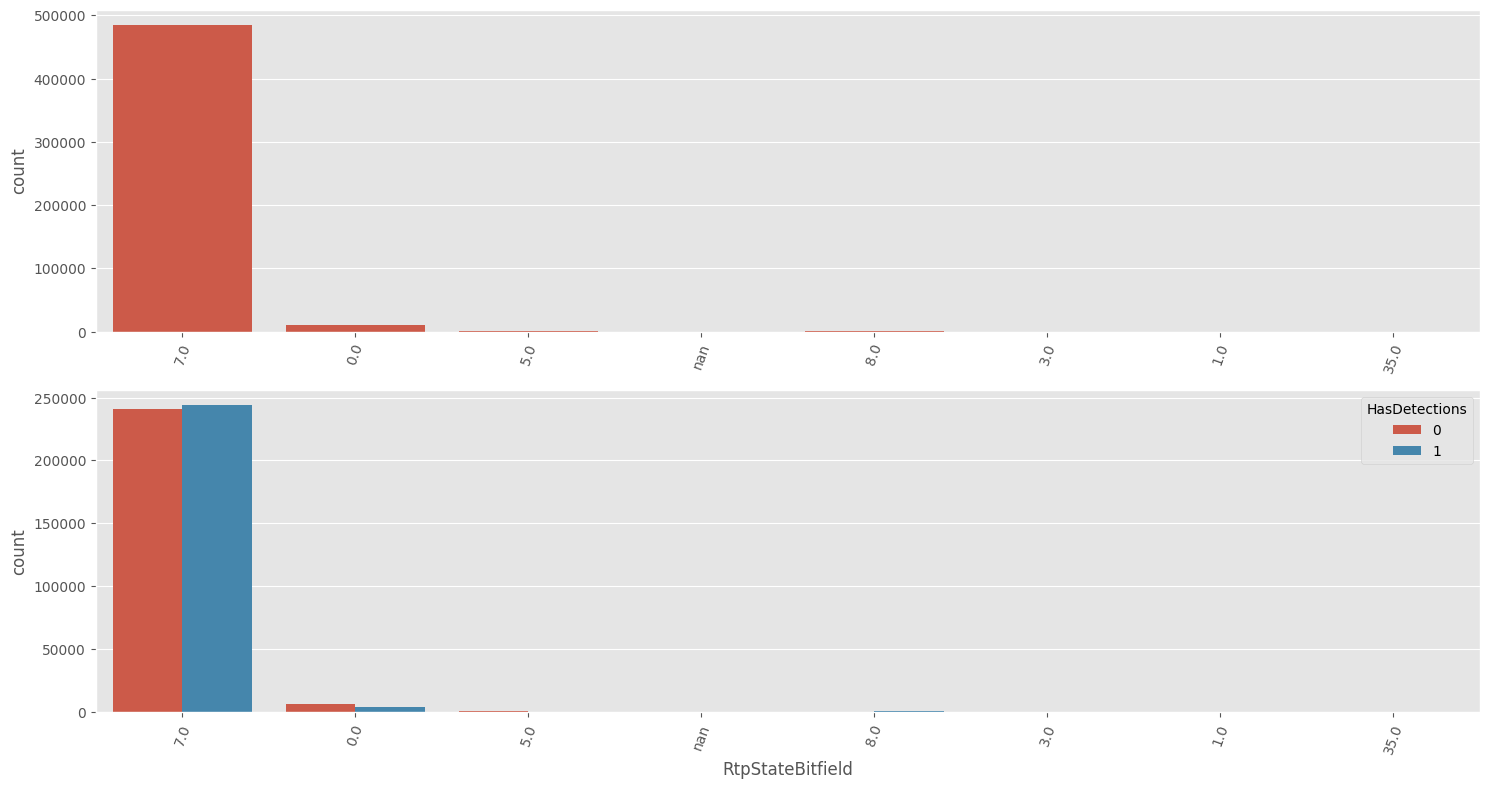

RtpStateBitfield tiene 1832 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
RtpStateBitfield                                               
7.0                     484841       243855            0.502959
0.0                      10610         4043            0.381056
8.0                       1277          978            0.765857
5.0                       1158          175            0.151123
3.0                        176           49            0.278409
1.0                        105           34            0.323810
35.0                         1            1            1.000000

In [99]:
analisis_cat(df,'RtpStateBitfield',TARGET)

- se trata de una variable con nulos explicativa ya que la categoría 0.0 difiere mucho de la media del target y posee un número significativo de máquinas

[Data Preparation](#limpieza):
- reducir el número de categorías para que todas posean un número significativo de máquinas. Agruparemos las categorías con menor número de máquinas bajo la categoría Others
- asignar los nulos a la categoría Others
- aplicar un OneHotEncoding

##### Identifiers

- Vamos a proceder a analizar todos los identificadores que aparecen como tipo float o int pero realmente se tratan de variables categóricas que en vez de ser un nombre, como estamos acostumbrados, se trata de un número.

- Para realizar el análisis de los identificadores comenzaremos con identificar nulos y posibles outliers ayudándonos tanto de la función *explore_cat_values* como del método *.describe()*. A continuación, veremos si las máquinas se distribuyen de manera más o menos homogénea entre las distintas categorías de la variable o no. En caso de que haya más de 10 categorías con +5000 máquinas, aplicaremos en el Data Preparation la función *setOthersminmax* que será explicada en dicha sección y estudiaremos si se trata de una variable explicativa o no. Por otro lado, si el número de categorías con +2000 máquinas es menor a 10, simplemente analizaremos si se trata de una variable explicativa y, en caso de que lo sea, aplicaremos la fución *setOthers*. 


Para realizar este análisis de forma rápida creamos la función *analizar_identifiers*

In [100]:
def analizar_identifiers(dataframe,columna,num_maq):
    """
    Analiza una columna de un DataFrame y filtra resultados basados en un umbral de número de máquinas.

    Parámetros:
    dataframe (pandas.DataFrame): El DataFrame que contiene los datos a analizar.
    columna (str): El nombre de la columna dentro del DataFrame sobre la cual se realizará el análisis estadístico y categórico.
    num_maq (int): El umbral mínimo del número de máquinas para filtrar los resultados.

    Retorna:
    pandas.DataFrame: Un DataFrame filtrado donde el número de máquinas (`Num_maquinas`) es mayor que `num_maq`.
    """
    print(f'La columna tiene un total de {dataframe[columna].nunique()} categorías','\n')
    print(dataframe[columna].describe(),'\n')
    pista = explore_cat_values(dataframe,columna,TARGET)
    return pista[pista['Num_maquinas']>num_maq]

In [101]:
def setOthersminmax(dataframe, column, target_column, num_rows_min, top_n):
    """
    Reasigna las categorías de una columna en un DataFrame para destacar las top_n categorías con los porcentajes 
    de malware más altos y más bajos, agrupando las demás en la categoría 'Others'.

    Parámetros:
    dataframe (pandas.DataFrame): El DataFrame que contiene los datos a procesar.
    column (str): El nombre de la columna categórica dentro del DataFrame que será analizada y modificada.
    target_column (str): El nombre de la columna objetivo que se utiliza para calcular los porcentajes de malware por categoría.
    num_rows_min (int): El umbral mínimo de filas que una categoría debe tener para ser considerada en la selección de las mejores y peores categorías.
    top_n (int): El número de categorías con los porcentajes de malware más altos y más bajos que se destacarán.

    Retorna:
    pandas.Series: Una Serie del DataFrame original con la columna categórica modificada, donde las categorías seleccionadas se 
                   mantienen y las demás se agrupan bajo 'Others'.
    """
    results_by_category = explore_cat_values(dataframe, column, target_column)
    last_categories = results_by_category[results_by_category['Num_maquinas'] > num_rows_min].sort_values(by='Porcentaje_malware').head(top_n).index.to_list()
    first_categories = results_by_category[results_by_category['Num_maquinas'] > num_rows_min].sort_values(by='Porcentaje_malware').tail(top_n).index.to_list()
    top_categories_list = first_categories + last_categories
    top_categories_list.append('Others')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    dataframe[column] = dataframe[column].fillna('Others')
    return dataframe[column]

###### AVProductStatesIdentifier

In [102]:
analizar_identifiers(df,'AVProductStatesIdentifier',2000)

La columna tiene un total de 5516 categorías 

count    498062.000000
mean      47850.908413
std       14023.085346
min           3.000000
25%       49480.000000
50%       53447.000000
75%       53447.000000
max       70492.000000
Name: AVProductStatesIdentifier, dtype: float64 

AVProductStatesIdentifier tiene 1938 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
AVProductStatesIdentifier                                               
53447.0                          326463       181517            0.556011
7945.0                            26642         9356            0.351175
47238.0                           18436         8525            0.462411
62773.0                           14931         5672            0.379881
46413.0                            6343         3109            0.490147
23657.0                            5717         2382            0.416652
49480.0                            5684         2298            0.404293
41571.0                            5472         1643            0.300256
29199.0                            4164         2007            0.481988
51954.0                            3695         1888            0.510961
22728.0                            2579         1117            0.433114
46669.0                            2572         1330            0.517107
43856.0                            2525         1509            0.597624
43927.0                            2424         1432            0.590759
3371.0                             2239          758            0.338544

- se trata de una variable con nulos los cuales asignaremos a un valor fuera de rango.
- observamos que se trata de una variable explicativa ya que sus principales categorías difieren significativamente de la media del target

[Data Preparation](#limpieza):
- asignar los nulos a un valor fuera de rango como puede ser -1.
- aplicar la función *setOthers* sobre aquellas categorías con menos de 2000 máquinas
- aplicar un OneHotEncoding

###### LocaleEnglishNameIdentifier

In [103]:
analizar_identifiers(df,'LocaleEnglishNameIdentifier',2000)

La columna tiene un total de 233 categorías 

count    500000.000000
mean        122.610998
std          69.303165
min           1.000000
25%          74.000000
50%          88.000000
75%         182.000000
max         283.000000
Name: LocaleEnglishNameIdentifier, dtype: float64 

LocaleEnglishNameIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
LocaleEnglishNameIdentifier                                               
75                                 117818        60664            0.514896
182                                 25187        12718            0.504943
42                                  23007        12036            0.523145
74                                  22894        10720            0.468245
88                                  20988         9802            0.467029
233                                 19225         9662            0.502575
171                                 19027         9719            0.510800
227                                 18427         9626            0.522386
251                                 11889         6194            0.520986
124                                 10843         5274            0.486397
103                                 10035         4608            0.459193
134                                  9700         4740            0.488660
64                                   9526         4746            0.498215
46                                   8994         4540            0.504781
218                                  8676         4708            0.542646
214                                  7782         3949            0.507453
217                                  7686         3982            0.518085
170                                  7680         3652            0.475521
56                                   6809         3326            0.488471
172                                  6270         3104            0.495056
70                                   5873         3100            0.527839
68                                   5157         2586            0.501454
231                                  5110         2776            0.543249
60                                   5044         2338            0.463521
115                                  4953         2639            0.532808
126                                  4776         2031            0.425251
58                                   4638         2065            0.445235
16                                   4494         2168            0.482421
51                                   4107         1866            0.454346
72                                   4064         1873            0.460876
107                                  3315         1572            0.474208
262                                  3072         1835            0.597331
239                                  3030         1267            0.418152
118                                  2932         1756            0.598909
113                                  2811         1402            0.498755
44                                   2526         1197            0.473872
222                                  2515         1384            0.550298
102                                  2387         1043            0.436950
71                                   2375         1061            0.446737
52                                   2177          894            0.410657
246                                  2065         1104            0.534625
210                                  2048          876            0.427734

- se trata de una variable sin nulos la cual posee muchas categorías que poseen más de 2000 máquinas
- observando sus variables principales no parece ser una variable muy explicativa. Tras el Data Preparation veremos si es así o no.

[Data Preparation](#limpieza):
- aplicar la función *setOthersminmax* y ver si resulta ser una variable explicativa o no
- aplicar un OneHotEncoding en caso de que se trate de una variable explicativa

###### IeVerIdentifier

In [104]:
analizar_identifiers(df,'IeVerIdentifier',2000)

La columna tiene un total de 179 categorías 

count    496791.000000
mean        126.662566
std          42.634892
min           8.000000
25%         111.000000
50%         135.000000
75%         137.000000
max         429.000000
Name: IeVerIdentifier, dtype: float64 

IeVerIdentifier tiene 3209 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
IeVerIdentifier                                               
137.0                  219142       114170            0.520986
117.0                   98667        48613            0.492698
108.0                   26353        12540            0.475847
111.0                   26143        13211            0.505336
98.0                    19731         9323            0.472505
135.0                   12314         5780            0.469384
74.0                    11395         5065            0.444493
53.0                    11352         5503            0.484760
94.0                     9715         4530            0.466289
105.0                    9695         4938            0.509335
333.0                    8751         4714            0.538681
107.0                    7080         3195            0.451271
103.0                    6364         2840            0.446260
96.0                     4695         2057            0.438126
76.0                     3242         1614            0.497841
71.0                     2275         1198            0.526593

- se trata de una variable con nulos los cuales asignaremos a un valor fuera de rango.
- observamos que tenemos 13 categorías por encima de las 5000 máquinas y que solo algunas de ellas se distinguen de manera significativa de la media del target

[Data Preparation](#limpieza):
- asignar los nulos a un valor fuera de rango como puede ser -1.
- aplicar la función *setOthersminmax* para quedarnos con aquellas categorías más explicativas
- aplicar un OneHotEncoding

###### Census_OEMNameIdentifier

In [105]:
analizar_identifiers(df,'Census_OEMNameIdentifier',2000)

La columna tiene un total de 1589 categorías 

count    494619.000000
mean       2218.646481
std        1315.709604
min          54.000000
25%        1443.000000
50%        2102.000000
75%        2668.000000
max        6143.000000
Name: Census_OEMNameIdentifier, dtype: float64 

Census_OEMNameIdentifier tiene 5381 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OEMNameIdentifier                                               
2668.0                           72011        35964            0.499424
2102.0                           57924        29863            0.515555
1443.0                           53210        27159            0.510412
2206.0                           51888        25328            0.488128
585.0                            50304        24973            0.496442
525.0                            47299        24655            0.521258
4589.0                           17404         9670            0.555619
4730.0                           16993         7954            0.468075
1980.0                           16157         9066            0.561119
4142.0                           11212         5371            0.479040
4490.0                            7727         3754            0.485829
4909.0                            7638         4052            0.530505
3035.0                            7596         4361            0.574118
3150.0                            7249         3236            0.446406
3133.0                            4504         2616            0.580817
530.0                             4219         1947            0.461484
516.0                             4069         2379            0.584665
1780.0                            2779         1226            0.441166
666.0                             2681         1062            0.396121
3799.0                            2523         1124            0.445501
3890.0                            2487         1273            0.511862
4915.0                            2270         1097            0.483260

- se trata de una variable con nulos los cuales asignaremos a un valor fuera de rango.
- observamos que se trata de una variable explicativa ya que sus principales categorías difieren significativamente de la media del target

[Data Preparation](#limpieza):
- asignar los nulos a un valor fuera de rango como puede ser -1.
- aplicar la función *setOthersminmax* para quedarnos con aquellas categorías más explicativas
- aplicar un OneHotEncoding

###### Census_OEMModelIdentifier

In [106]:
analizar_identifiers(df,'Census_OEMModelIdentifier',2000)

La columna tiene un total de 40697 categorías 

count    494236.000000
mean     239128.046882
std       72048.883577
min           1.000000
25%      189641.750000
50%      247520.000000
75%      304438.000000
max      345493.000000
Name: Census_OEMModelIdentifier, dtype: float64 

Census_OEMModelIdentifier tiene 5764 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OEMModelIdentifier                                               
313586.0                          17092         9515            0.556693
242491.0                          14726         7661            0.520236
317701.0                           7676         4078            0.531266
317708.0                           6541         3529            0.539520
228975.0                           4389         2196            0.500342
188345.0                           4063         2372            0.583805
241876.0                           3929         2081            0.529651
245824.0                           3815         2194            0.575098
244755.0                           2826         1495            0.529016
248045.0                           2496         1170            0.468750
313507.0                           2115         1087            0.513948

- se trata de una variable con nulos los cuales asignaremos a un valor fuera de rango.
- observamos que se trata de una variable poco explicativa ya que las máquinas están distribuidas de forma uniforme en las distintas categorías, y aquellas con mayor número de máquinas difieren de forma significativa de la media del target.

[Data Preparation](#limpieza):
- asignar los nulos a un valor fuera de rango como puede ser -1.
- aplicar la función *setOthers* para quedarnos con aquellas categorías más explicativas
- aplicar un OneHotEncoding

###### Census_ProcessorManufacturerIdentifier

In [107]:
explore_cat_values(df,'Census_ProcessorManufacturerIdentifier',TARGET)

Census_ProcessorManufacturerIdentifier tiene 2347 nulos 



Num_maquinas  Con_malware  \
Census_ProcessorManufacturerIdentifier                              
5.0                                           439028       219948   
1.0                                            58604        28698   
10.0                                              14            0   
3.0                                                7            1   

                                        Porcentaje_malware  
Census_ProcessorManufacturerIdentifier                      
5.0                                               0.500989  
1.0                                               0.489694  
10.0                                              0.000000  
3.0                                               0.142857

- se trata de una variable con nulos los cuales asignaremos a un valor fuera de rango.
- observamos que se trata de una variable no explicativa ya que sus dos categorías con mayor número de máquinas poseen un porcentaje de malware muy similar a la media del target por lo que no contaremos con esta variable en nuestro modelo.

In [108]:
no_explicativas.append('Census_ProcessorManufacturerIdentifier')

###### Census_ProcessorModelIdentifier

In [109]:
analizar_identifiers(df,'Census_ProcessorModelIdentifier',5000)

La columna tiene un total de 2243 categorías 

count    497651.000000
mean       2370.986509
std         842.136675
min           3.000000
25%        1998.000000
50%        2500.000000
75%        2877.000000
max        4472.000000
Name: Census_ProcessorModelIdentifier, dtype: float64 

Census_ProcessorModelIdentifier tiene 2349 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_ProcessorModelIdentifier                                               
2697.0                                  16180         8676            0.536218
1998.0                                  14874         7042            0.473444
2660.0                                  10736         5998            0.558681
2373.0                                   9885         5259            0.532018
1992.0                                   9502         4453            0.468638
2382.0                                   9496         5068            0.533698
2640.0                                   8506         4588            0.539384
2097.0                                   7440         3586            0.481989
1985.0                                   7414         3519            0.474643
1848.0                                   6944         2355            0.339142
2737.0                                   6864         3560            0.518648
1916.0                                   6630         2469            0.372398
3063.0                                   6236         3501            0.561418
2321.0                                   6137         3279            0.534300
2574.0                                   5789         3147            0.543617
3082.0                                   5046         3028            0.600079

- se trata de una variable con nulos los cuales asignaremos a un valor fuera de rango.
- observamos que se trata de una variable con muchas categorías. Para ver si se trata de una variable explicativa aplicaremos el *setOthersminmax* y veremos si las categorías son explicativas o no.

[Data Preparation](#limpieza):
- asignar los nulos a un valor fuera de rango como puede ser -1.
- aplicar la función *setOthersminmax* para ver si las categorías que más difieren de la media del target son realmente explicativas
- aplicar un OneHotEncoding en caso de que sea una variable explicativa

###### Census_OSBuildNumber

In [110]:
analizar_identifiers(df,'Census_OSBuildNumber',5000)

La columna tiene un total de 61 categorías 

count    500000.000000
mean      15841.372572
std        1959.440301
min        9600.000000
25%       15063.000000
50%       16299.000000
75%       17134.000000
max       18242.000000
Name: Census_OSBuildNumber, dtype: float64 

Census_OSBuildNumber tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSBuildNumber                                               
17134                       225979       117998            0.522164
16299                       136572        66880            0.489705
15063                        44262        21229            0.479621
14393                        43702        20320            0.464967
10586                        33193        15660            0.471786
10240                        15106         7343            0.486098

- se trata de una variable sin nulos cuyas categorías principales no son muy explicativas (porcentaje de malware muy cercano a la media del target) por lo que no contaremos con ella para nuestro modelo.

In [111]:
no_explicativas.append('Census_OSBuildNumber')

###### Census_OSInstallLanguageIdentifier

In [112]:
analizar_identifiers(df,'Census_OSInstallLanguageIdentifier',2000)

La columna tiene un total de 39 categorías 

count    496668.000000
mean         14.605509
std          10.200946
min           1.000000
25%           8.000000
50%           9.000000
75%          20.000000
max          39.000000
Name: Census_OSInstallLanguageIdentifier, dtype: float64 

Census_OSInstallLanguageIdentifier tiene 3332 nulos 



Num_maquinas  Con_malware  \
Census_OSInstallLanguageIdentifier                              
8.0                                       178405        90135   
9.0                                        58013        29788   
7.0                                        28766        14097   
29.0                                       27669        14142   
14.0                                       24191        11379   
37.0                                       22635        11842   
10.0                                       20268        10888   
26.0                                       18520         9470   
5.0                                        14085         6289   
35.0                                       11497         6011   
39.0                                       11221         5597   
18.0                                       10600         5139   
20.0                                        9512         4653   
24.0                                        8127         3837   
25.0                                        7502         3541   
27.0                                        5956         2942   
19.0                                        4775         2026   
17.0                                        4695         2517   
1.0                                         4516         2156   
3.0                                         4067         1849   
6.0                                         2881         1369   
33.0                                        2807         1148   
15.0                                        2311         1170   

                                    Porcentaje_malware  
Census_OSInstallLanguageIdentifier                      
8.0                                           0.505227  
9.0                                           0.513471  
7.0                                           0.490058  
29.0                                          0.511114  
14.0                                          0.470382  
37.0                                          0.523172  
10.0                                          0.537201  
26.0                                          0.511339  
5.0                                           0.446503  
35.0                                          0.522832  
39.0                                          0.498797  
18.0                                          0.484811  
20.0                                          0.489172  
24.0                                          0.472130  
25.0                                          0.472007  
27.0                                          0.493956  
19.0                                          0.424293  
17.0                                          0.536102  
1.0                                           0.477414  
3.0                                           0.454635  
6.0                                           0.475182  
33.0                                          0.408978  
15.0                                          0.506274

- se trata de una variable con nulos los cuales asignaremos a un valor fuera de rango.
- observamos que se trata de una variable no explicativa ya que todas las categorías con más de 5000 máquinas poseen un porcentaje de maleware muy similar a la media del target por lo que no aportan información al modelo

In [113]:
no_explicativas.append('Census_OSInstallLanguageIdentifier')

###### Census_OSUILocaleIdentifier

In [114]:
analizar_identifiers(df,'Census_OSUILocaleIdentifier',4000)

La columna tiene un total de 92 categorías 

count    500000.000000
mean         60.446306
std          45.000423
min           1.000000
25%          31.000000
50%          34.000000
75%          90.000000
max         162.000000
Name: Census_OSUILocaleIdentifier, dtype: float64 

Census_OSUILocaleIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSUILocaleIdentifier                                               
31                                 177983        89849            0.504818
34                                  58307        29943            0.513540
30                                  28798        14096            0.489478
125                                 28001        14334            0.511910
49                                  24423        11482            0.470131
158                                 22930        12002            0.523419
35                                  20890        11256            0.538822
119                                 18696         9556            0.511125
26                                  14096         6284            0.445800
148                                 11617         6060            0.521649
160                                 11244         5613            0.499200
72                                  10662         5168            0.484712
83                                   9596         4699            0.489683
109                                  8143         3848            0.472553
115                                  7496         3544            0.472785
120                                  5993         2961            0.494076
74                                   4791         2040            0.425798
64                                   4747         2544            0.535917
5                                    4599         2204            0.479235
20                                   4087         1858            0.454612

- se trata de una variable con nulos los cuales asignaremos a un valor fuera de rango.
- observamos que se trata de una variable con categorías no explicativas en su mayoría, por lo que para obtener aquellas que si lo son, aplicaremos un *setOthersminmax*

[Data Preparation](#limpieza):
- asignar los nulos a un valor fuera de rango como puede ser -1.
- aplicar la función *setOthersminmax* para ver aquellas categorías que le pueden aportar información significativa al modelo
- aplicar un OneHotEncoding en caso de que las categorías resultantes sean explicativas

###### Census_FirmwareManufacturerIdentifier

In [115]:
analizar_identifiers(df,'Census_FirmwareManufacturerIdentifier',5000)

La columna tiene un total de 303 categorías 

count    489651.000000
mean        402.675943
std         221.527124
min          11.000000
25%         142.000000
50%         500.000000
75%         556.000000
max        1084.000000
Name: Census_FirmwareManufacturerIdentifier, dtype: float64 

Census_FirmwareManufacturerIdentifier tiene 10349 nulos 



Num_maquinas  Con_malware  \
Census_FirmwareManufacturerIdentifier                              
142.0                                        151374        78575   
628.0                                         68781        34370   
554.0                                         65673        33489   
355.0                                         52758        26942   
556.0                                         44919        22664   
500.0                                         21686        10177   
93.0                                          10666         5582   
807.0                                          8803         4257   
513.0                                          7899         3216   
127.0                                          6933         3205   
486.0                                          6060         3015   
897.0                                          6001         2790   
512.0                                          5303         2320   

                                       Porcentaje_malware  
Census_FirmwareManufacturerIdentifier                      
142.0                                            0.519079  
628.0                                            0.499702  
554.0                                            0.509936  
355.0                                            0.510671  
556.0                                            0.504553  
500.0                                            0.469289  
93.0                                             0.523345  
807.0                                            0.483585  
513.0                                            0.407140  
127.0                                            0.462282  
486.0                                            0.497525  
897.0                                            0.464923  
512.0                                            0.437488

- se trata de una variable con bastantes nulos los cuales asignaremos a un valor fuera de rango.
- observamos que se trata de una variable con muchas categorías por lo que aplicaremos la función *setOthersminmax* para esclarecer si posee variables explicativas.

[Data Preparation](#limpieza):
- asignar los nulos a un valor fuera de rango como puede ser -1.
- aplicar la función *setOthersminmax* para ver aquellas categorías que le pueden aportar información significativa al modelo
- aplicar un OneHotEncoding en caso de que las categorías resultantes sean explicativas

###### Census_FirmwareVersionIdentifier

In [116]:
analizar_identifiers(df,'Census_FirmwareVersionIdentifier',1500)

La columna tiene un total de 23569 categorías 

count    490939.000000
mean      33030.988944
std       21220.161428
min          10.000000
25%       13156.000000
50%       33070.000000
75%       52436.000000
max       72091.000000
Name: Census_FirmwareVersionIdentifier, dtype: float64 

Census_FirmwareVersionIdentifier tiene 9061 nulos 



Num_maquinas  Con_malware  \
Census_FirmwareVersionIdentifier                              
33105.0                                   5036         2581   
33111.0                                   3356         1701   
33054.0                                   3124         1611   
33108.0                                   3071         1618   
63175.0                                   2968         1476   
11778.0                                   2962         1566   
33115.0                                   2882         1466   
63155.0                                   2792         1363   
33060.0                                   2715         1322   
19970.0                                   2600         1340   
33070.0                                   2590         1327   
63122.0                                   2508         1211   
19951.0                                   2481         1265   
19973.0                                   2429         1276   
19948.0                                   2310         1155   
33075.0                                   2299         1123   
33778.0                                   2250         1243   
33142.0                                   2243         1213   
63140.0                                   2225         1062   
20106.0                                   2186         1151   
63317.0                                   2172         1058   
63269.0                                   2164         1053   
33043.0                                   2157         1164   
19956.0                                   2112         1022   
33000.0                                   2110         1056   
19982.0                                   2038         1022   
33135.0                                   2001         1011   
19946.0                                   2000         1063   
63417.0                                   1967         1011   
63396.0                                   1897         1005   
12536.0                                   1868          701   
63041.0                                   1825          872   
20050.0                                   1789          914   
63086.0                                   1784          876   
63069.0                                   1781          864   
63103.0                                   1770          876   
33133.0                                   1762          848   
33137.0                                   1742          884   
33130.0                                   1690          847   
33116.0                                   1685          816   
33066.0                                   1659          774   
7145.0                                    1656          831   
33015.0                                   1655          796   
20107.0                                   1650          831   
33041.0                                   1649          837   
7221.0                                    1647          844   
7271.0                                    1635          806   
33103.0                                   1614          779   
12459.0                                   1599          582   
33084.0                                   1593          835   
20317.0                                   1587          817   
6899.0                                    1575          759   
19931.0                                   1570          767   
4357.0                                    1565          815   
33264.0                                   1511          829   

                                  Porcentaje_malware  
Census_FirmwareVersionIdentifier                      
33105.0                                     0.512510  
33111.0                                     0.506853  
33054.0                                     0.515685  
33108.0                                     0.526864  
63175.0                                     0.497305  
11778.0                                     0.528697  
33

- se trata de la variable con más categorías y más homogénea de todas las que hemos analizado. Observamos que la mayoría de sus categorías, poseen cada una menos de 4000 máquinas.
- observamos también que tiene 9000 nulos los cuales podemos asignar a un número fuera de rango como puede ser -1
- vamos a proceder a aplicar *setOtherminmax* para ver aquellas categorías más explicativas y discutiremos si es explicativa o no.

[Data Preparation](#limpieza):
- asignar los nulos a un valor fuera de rango como puede ser -1.
- aplicar la función *setOthersminmax* para quedarnos con aquellas categorías más explicativas
- aplicar un OneHotEncoding

###### Wdft_RegionIdentifier

In [117]:
explore_cat_values(df,'Wdft_RegionIdentifier',TARGET)

Wdft_RegionIdentifier tiene 16950 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Wdft_RegionIdentifier                                               
10.0                         100392        51294            0.510937
11.0                          75612        37981            0.502314
3.0                           73069        35898            0.491289
1.0                           68692        36762            0.535171
15.0                          57346        26848            0.468176
7.0                           33362        16750            0.502068
8.0                           15761         7732            0.490578
13.0                          12681         6001            0.473228
5.0                           11466         5521            0.481511
12.0                           9115         4294            0.471092
6.0                            8750         4234            0.483886
4.0                            7586         3600            0.474558
9.0                            4521         2025            0.447910
2.0                            4470         2026            0.453244
14.0                            227          128            0.563877

- se trata de una variable con nulos los cuales asignaremos a un valor fuera de rango.
- observamos que únicamente hay dos categorías que difieren de la media del target (1.0 y 15). Por lo tanto aplicaremos la función *setOthersminmax* para quedarnos únicamente con esas dos categorías.

[Data Preparation](#limpieza):
- asignar los nulos a un valor fuera de rango como puede ser -1.
- aplicar la función *setOthersminmax* de forma adecuada para únicamente quedarnos con esas dos categorías 
- aplicar un OneHotEncoding

##### Ubicación

Para analizar las variables relativas a la ubicación de las máquinas, vamos a seguir el mismo procedimiento que con los Identifiers. Pero en esta ocasión, también vamos a aportar gráficos que nos ayuden a visualizar la distribución de las diferentes categorías y su relación con el target. 

Para ello creamos una nueva función llamada *analisis_ubicacion*, que es igual que la funcion *analisis_cat* pero que en vez de retornar la función *explorar_cat_values* retorna la función *analizar_identifiers*.

In [118]:
def analisis_ubicacion(dataframe, column, target_column, num_maq):

    """
    Realiza un análisis exploratorio de una columna categórica específica en un dataframe, incluyendo visualización y resumen estadístico
    de aquellas categorías que superen un cierto número de máquinas.

    Parámetros:
    dataframe (pd.DataFrame): El dataframe que contiene los datos.
    column (str): El nombre de la columna categórica a explorar.
    target_column (str): El nombre de la columna Target que se analizará en relación con la columna categórica.
    num_maq (int): número mínimo de máquinas que debe de tener la categoría para ser mostrada en la pivot_table estadística

    Retorna:
    pd.DataFrame: Un dataframe que contiene el resumen de aquellas categorías dentro de la variable que superen un cierto número de máuqinas, incluyendo:
                  - 'Num_maquinas': El número de ocurrencias de cada categoría.
                  - 'Con_malware': La suma de los valores en la columna objetivo para cada categoría.
                  - 'Porcentaje_malware': El promedio de los valores en la columna objetivo para cada categoría, indicando el porcentaje de malware.
    """
    
    plot_cat_values(dataframe, column, target_column)
    return analizar_identifiers(dataframe,column,num_maq)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

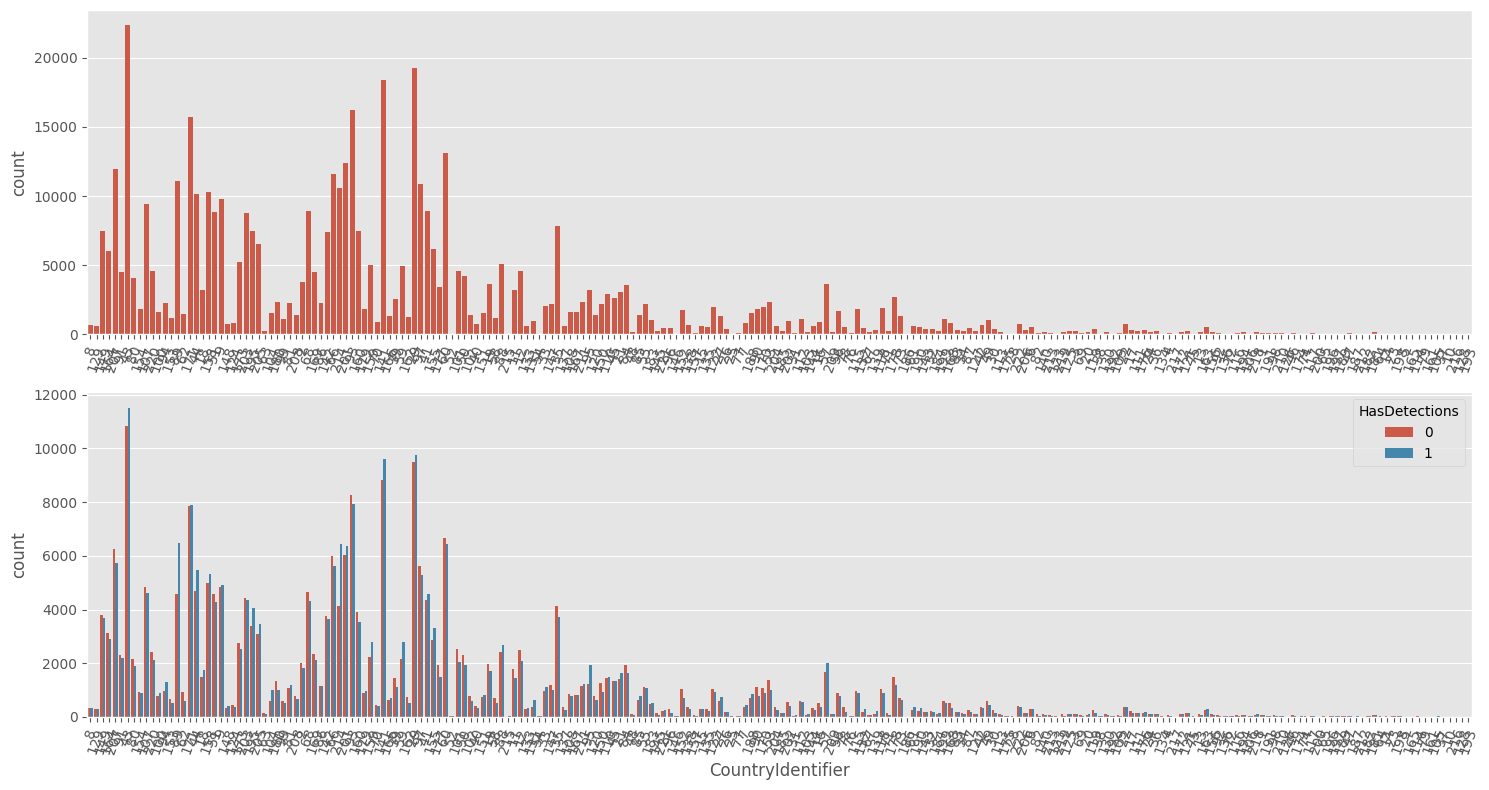

La columna tiene un total de 222 categorías 

count    500000.000000
mean        108.037454
std          63.068540
min           1.000000
25%          51.000000
50%          97.000000
75%         162.000000
max         222.000000
Name: CountryIdentifier, dtype: float64 

CountryIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
CountryIdentifier                                               
43                        22339        11511            0.515287
29                        19273         9775            0.507186
141                       18420         9598            0.521064
93                        16205         7947            0.490404
171                       15743         7881            0.500603
60                        13118         6440            0.490928
201                       12405         6363            0.512938
207                       11981         5734            0.478591
66                        11607         5608            0.483157
89                        11064         6491            0.586678
97                        10883         5278            0.484977
214                       10576         6446            0.609493
158                       10302         5330            0.517375
44                        10159         5469            0.538340
9                          9763         4924            0.504353
107                        9446         4621            0.489202
68                         8950         4303            0.480782
41                         8948         4590            0.512964
51                         8868         4298            0.484664
203                        8785         4345            0.494593
35                         7845         3707            0.472530
149                        7475         3694            0.494181
160                        7456         3538            0.474517
195                        7444         4040            0.542719
142                        7378         3631            0.492139
205                        6547         3467            0.529556
155                        6179         3296            0.533420
164                        6033         2892            0.479364
173                        5269         2525            0.479218
88                         5085         2663            0.523697
159                        5019         2781            0.554094
59                         4950         2792            0.564040
101                        4590         2057            0.448148
12                         4557         2067            0.453588
220                        4551         2116            0.464953
91                         4521         2213            0.489493
169                        4479         2126            0.474660
50                         4215         1927            0.457177
80                         4050         1903            0.469877

In [119]:
analisis_ubicacion(df,'CountryIdentifier',TARGET,4000)

- se trata de una variable sin nulos con un total de 222 categorías.
- observamos que las máquinas se distribuyen de manera más o menos homogénea a lo largo de todas las categorías
- aplicaremos la función *setOthersminmax* para obtener aquellas ubicaciones que más información aportan al modelo

[Data Preparation](#limpieza):
- aplicar la función *setOthersminmax* de forma adecuada para únicamente quedarnos con esas dos categorías 
- aplicar un OneHotEncoding

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

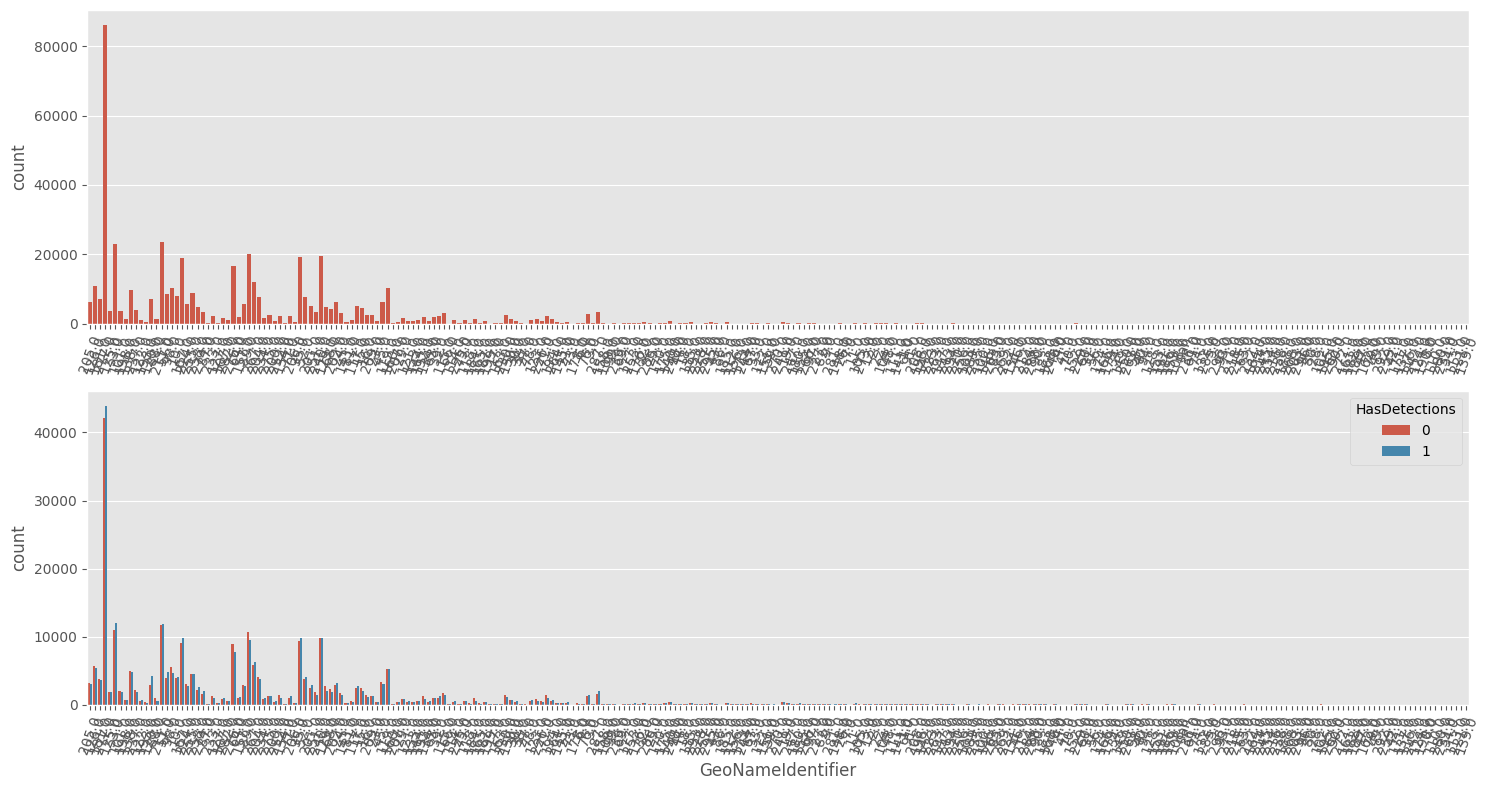

La columna tiene un total de 268 categorías 

count    499984.000000
mean        169.730423
std          89.325172
min           1.000000
25%          89.000000
50%         181.000000
75%         267.000000
max         296.000000
Name: GeoNameIdentifier, dtype: float64 

GeoNameIdentifier tiene 16 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
GeoNameIdentifier                                               
277.0                     86080        43944            0.510502
211.0                     23593        11840            0.501844
53.0                      22977        11994            0.522000
89.0                      20174         9486            0.470209
240.0                     19489         9772            0.501411
35.0                      19144         9762            0.509925
167.0                     18845         9827            0.521465
276.0                     16600         7758            0.467349
267.0                     12106         6284            0.519081
126.0                     11028         5357            0.485764
119.0                     10419         5198            0.498896
98.0                      10234         4700            0.459253
138.0                      9717         4755            0.489349
255.0                      9008         4546            0.504663
57.0                       8722         4745            0.544027
10.0                       8008         4063            0.507368
204.0                      7776         3696            0.475309
52.0                       7764         4020            0.517774
181.0                      7297         3550            0.486501
120.0                      7104         4220            0.594032
45.0                       6388         3000            0.469631
205.0                      6315         3088            0.488994
202.0                      6162         3246            0.526777
224.0                      5818         2762            0.474734
157.0                      5607         2797            0.498841
201.0                      5191         2809            0.541129
117.0                      5052         2682            0.530879

In [120]:
analisis_ubicacion(df,'GeoNameIdentifier',TARGET,5000)

- se trata de una variable con unos pocos nulos en la que hay una clara ubicación predominante
- hay muchas categorías pero solo un tercio de ellas presenta un número significativo de máquinas
- echando un vistazo rápido y no vemos que haya categorías muy explicativas

[Data Preparation](#limpieza):
- asignamos los nulos a una categoría fuera de rango como puede ser -1
- aplicamos la función *setOthersminmax* para ver si las categorías más explicativas realmente lo son y quedarnos con aquellas que aporten información de valor al modelo
- aplicar un OneHotEncoding en caso de que dichas categorías sean explicativas

In [121]:
analizar_identifiers(df,'CityIdentifier',2000)

La columna tiene un total de 37157 categorías 

count    481760.000000
mean      81271.646027
std       48985.129677
min           7.000000
25%       36825.000000
50%       82373.000000
75%      123939.500000
max      167958.000000
Name: CityIdentifier, dtype: float64 

CityIdentifier tiene 18240 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
CityIdentifier                                               
130775.0                5271         2633            0.499526
16668.0                 4747         2490            0.524542
82373.0                 4649         2444            0.525704
10222.0                 4011         2114            0.527051
61668.0                 3724         2288            0.614393
143782.0                3572         1695            0.474524
66202.0                 3572         1708            0.478163
58607.0                 3368         2065            0.613124
92213.0                 3209         1498            0.466812
66953.0                 3143         1776            0.565065
22656.0                 3085         1734            0.562075
96401.0                 2813         1291            0.458941
136271.0                2692         1199            0.445394
74924.0                 2480         1178            0.475000
39800.0                 2138          991            0.463517
143155.0                2099          931            0.443545
37376.0                 2077         1136            0.546943
20805.0                 2021         1004            0.496784

- se trata de una variable con nulos en la que las máquinas se distribuyen de manera homogénea a lo largo de todas las categorías
- la variable de algún modo debe de estár relacionada con la variable **GeoNameIdentifier** o con la variable **CountryIdentifier**. En el caso de confirmar dicha relación debemos eliminar una de las dos variables ya que aportan la misma información al modelo.

[Data Preparation](#limpieza):
- asignamos los nulos a una categoría fuera de rango como puede ser -1
- aplicamos la función *setOthersminmax* para ver si las categorías más explicativas realmente lo son y quedarnos con aquellas que aporten información de valor al modelo
- aplicar un OneHotEncoding en caso de que dichas categorías sean explicativas

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

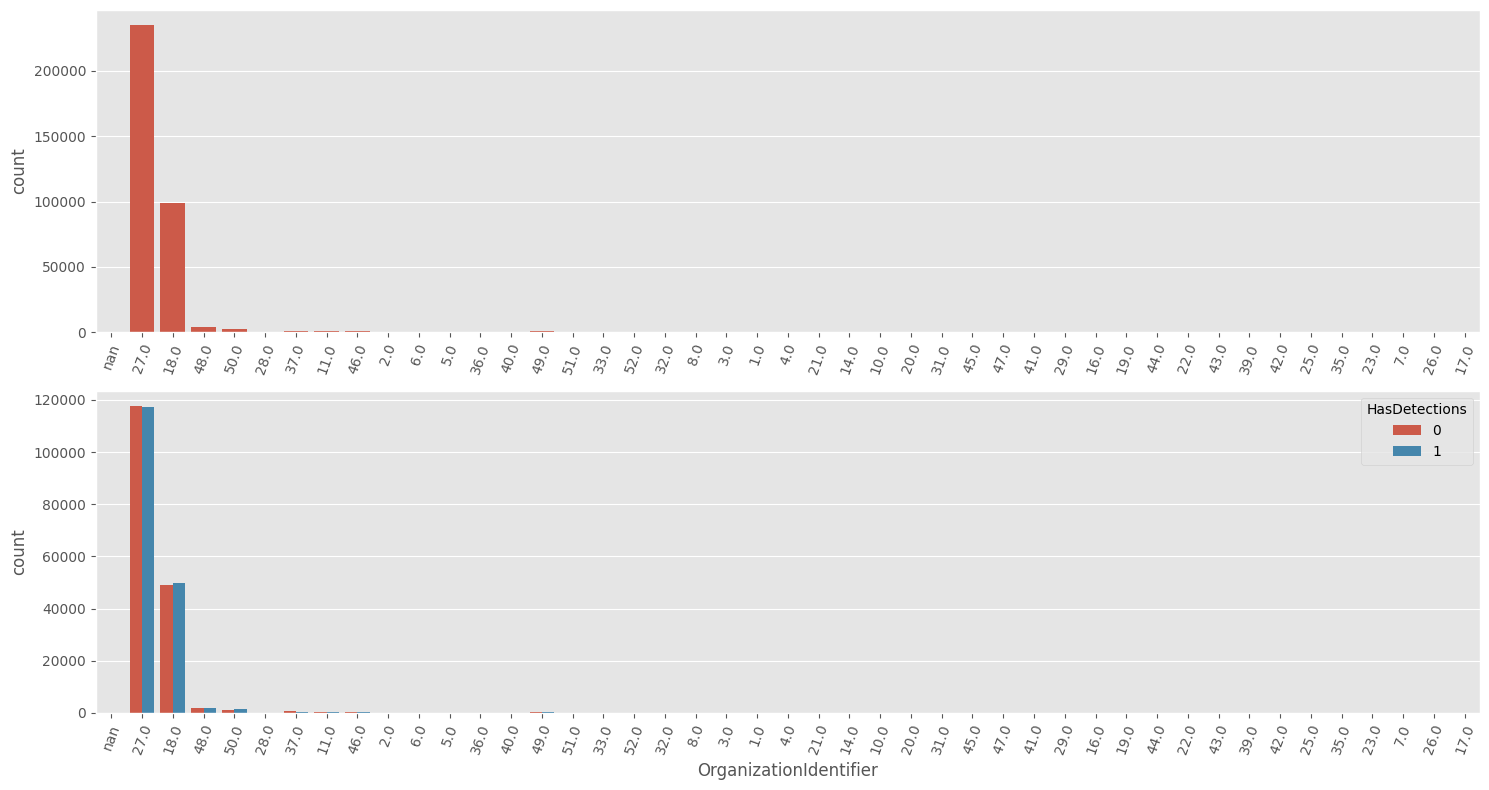

OrganizationIdentifier tiene 154563 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
OrganizationIdentifier                                               
27.0                          234885       117224            0.499070
18.0                           98842        49863            0.504472
48.0                            3658         1885            0.515309
50.0                            2538         1565            0.616627
37.0                            1048          485            0.462786
11.0                            1037          533            0.513983
49.0                             747          365            0.488621
46.0                             641          323            0.503900
14.0                             255          119            0.466667
32.0                             230          102            0.443478
36.0                             207          116            0.560386
52.0                             174           91            0.522989
33.0                             171           75            0.438596
2.0                              153           60            0.392157
5.0                              110           49            0.445455
40.0                             100           46            0.460000
28.0                              98           42            0.428571
4.0                               79           38            0.481013
10.0                              69           29            0.420290
51.0                              53           27            0.509434
1.0                               39           15            0.384615
20.0                              38           19            0.500000
8.0                               37           25            0.675676
6.0                               25            9            0.360000
31.0                              23           10            0.434783
47.0                              22           10            0.454545
22.0                              21            8            0.380952
39.0                              21            9            0.428571
3.0                               20            8            0.400000
21.0                              19            4            0.210526
16.0                              16            6            0.375000
19.0                              10            3            0.300000
42.0                               8            6            0.750000
29.0                               8            5            0.625000
7.0                                7            4            0.571429
26.0                               6            3            0.500000
44.0                               6            3            0.500000
45.0                               4            1            0.250000
43.0                               4            2            0.500000
41.0                               2            1            0.500000
23.0                               2            0            0.000000
35.0                               2            2            1.000000
17.0                               1            1            1.000000
25.0                               1            0            0.000000

In [122]:
analisis_cat(df,'OrganizationIdentifier',TARGET)

- vemos que se trata de una variable con muchos nulos y en la que las máquinas se distribuyen principalmente en dos 
- aparentemente y a falta de analizar los nulos se trata de una variable no explicativa, ya que las categorías principales poseen un porcentaje de malware muy similar a la media del target

[Data Preparation](#limipieza):
- asignar los nulos a un valor fuera de rango como puede ser -1
- aplicar la función *setOthers* para establecer categorías con un número significativo de máquinas y ver si son explicativas o no 
- en caso de que lo sean aplicar un OneHotEncoding

##### AVProductsInstalled

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

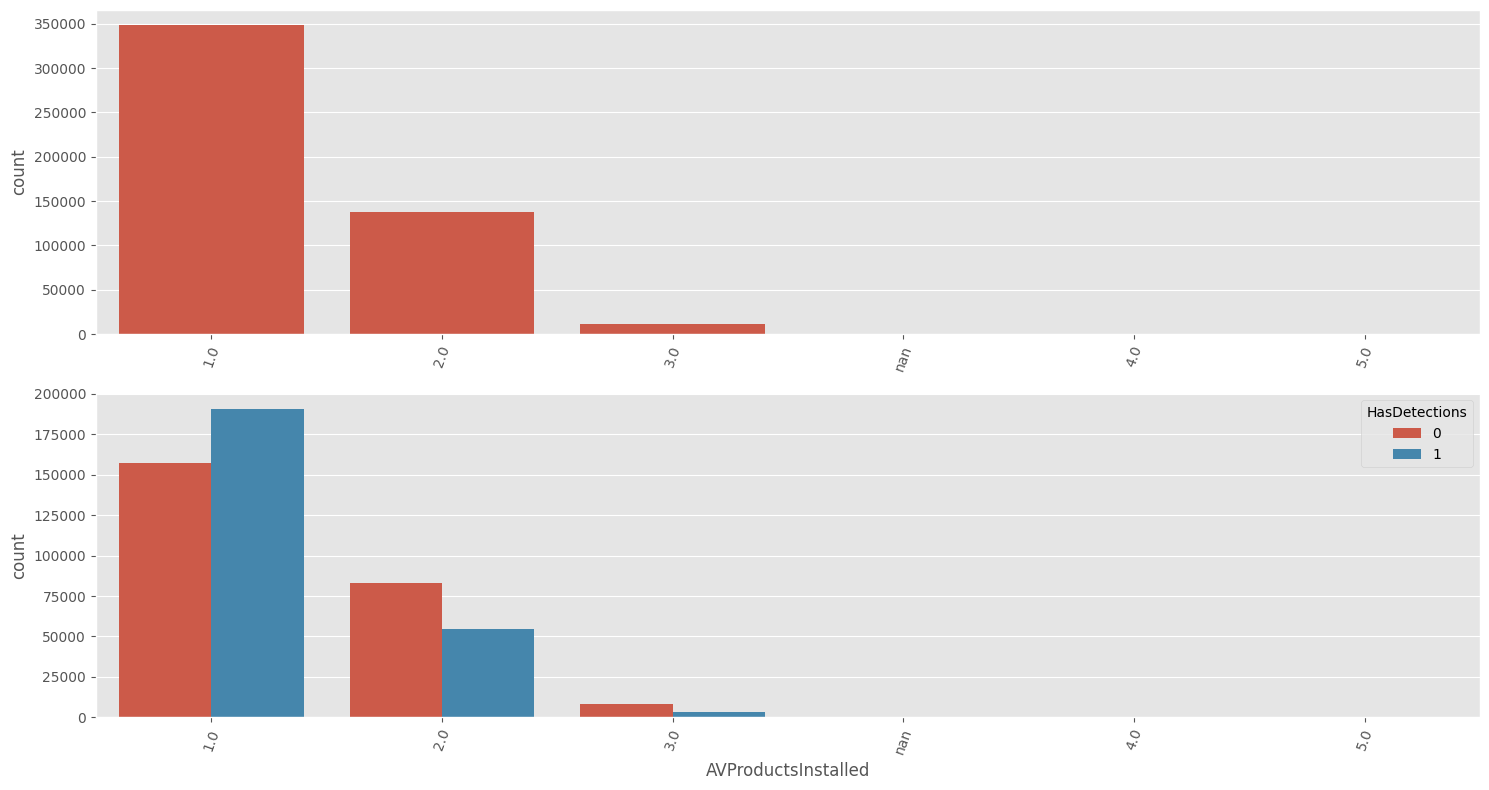

AVProductsInstalled tiene 1938 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
AVProductsInstalled                                               
1.0                        348046       190800            0.548203
2.0                        137856        54902            0.398256
3.0                         11617         3378            0.290781
4.0                           514          128            0.249027
5.0                            29            4            0.137931

In [123]:
analisis_cat(df,'AVProductsInstalled',TARGET)

- se trata de una variable con nulos en la que el porcentaje de malware en sus categorías más significativas difiere de manera significativa de la media del target
- por primera vez observamos una relación entre la variable y la reducción del porcentaje de malware (cuantos más porductos installados menor riesgo de infección)

[Data Preparation](#limpieza):
- lo primero será asignar los nulos a un valor fuera de rango que puede ser -1 o 10 por ejemplo (de manera que ayudemos al modelo)
- agrupar las categorías 3, 4 y 5 (las cuales se comportan de manera similar) bajo una categoría llamada 3 (esto lo hacemos para poder aplicar un OrdinalEncoder)
- finalmente no será necesario aplicar OrdinalEncoder porque ya se trata de una variable numérica cuyo orden le sirve a el Decision Tree a analizar los datos.

##### AVProductsEnabled

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

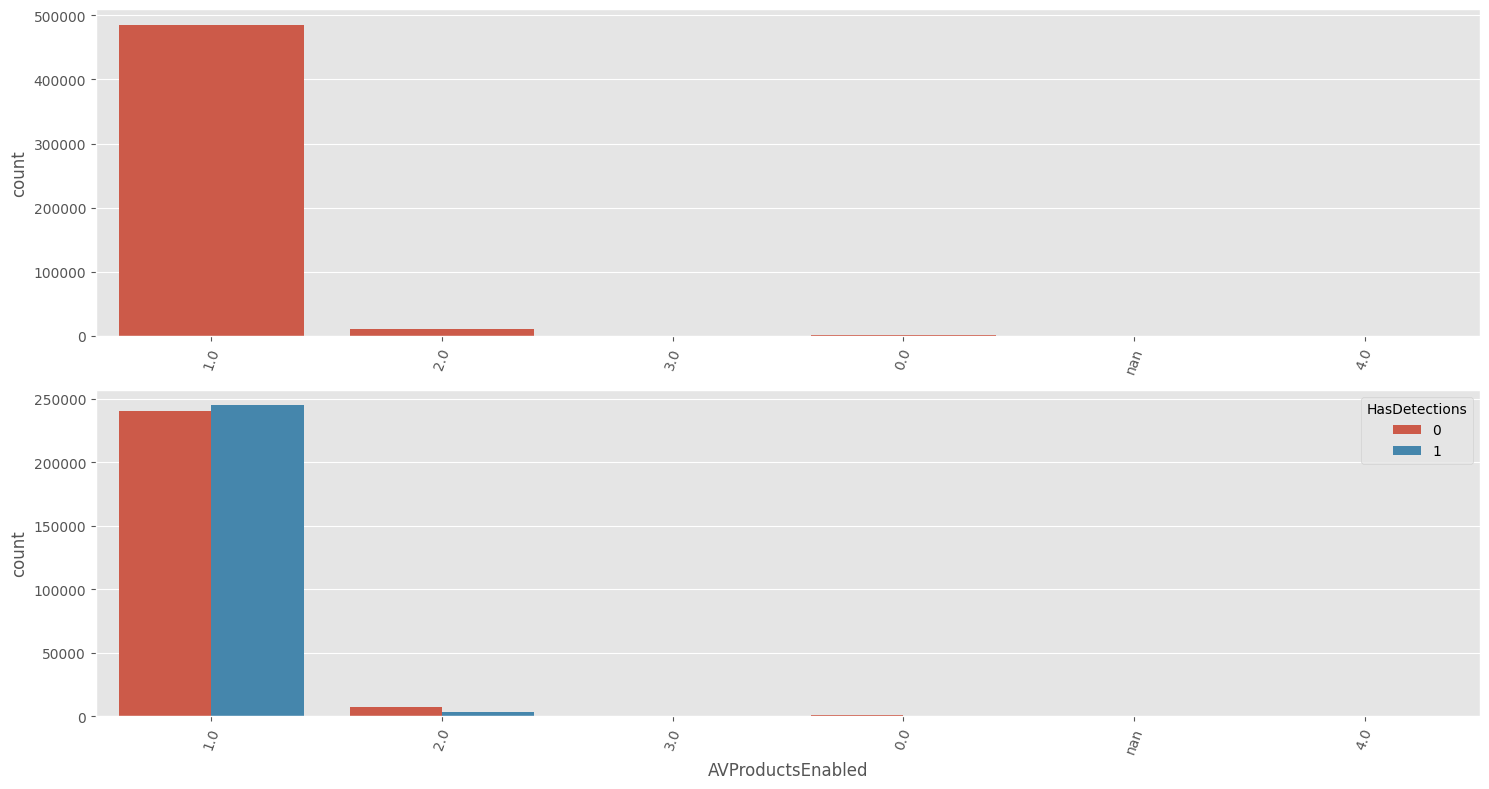

AVProductsEnabled tiene 1938 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
AVProductsEnabled                                               
1.0                      485179       244821            0.504599
2.0                       11074         3732            0.337006
0.0                        1467          544            0.370825
3.0                         316          111            0.351266
4.0                          26            4            0.153846

In [124]:
analisis_cat(df,'AVProductsEnabled',TARGET)

- variable que seguramente guarde relación con la anterior variable (en caso de que la relación sea muy significativa, eliminar una de las dos)
- se trata de una variable con nulos los cuales debemos analizar asignándolos a un valor fuera de rango como puede ser -1
- viendo que la mayoría de máquinas se encuentran en la primera categoría y el resto difieren de manera significativa de la media del target, podemos decir que se trata de una variable explicativa

[Data Preparation](#limpieza):
- asignar los nulos a un valor fuera de rango como puede ser -1 y ver su porcentaje de malware
- agrupar el resto de categorías con un número bajo de máquinas bajo la variable Others
- aplicar OneHotEncoding

##### OsBuild

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

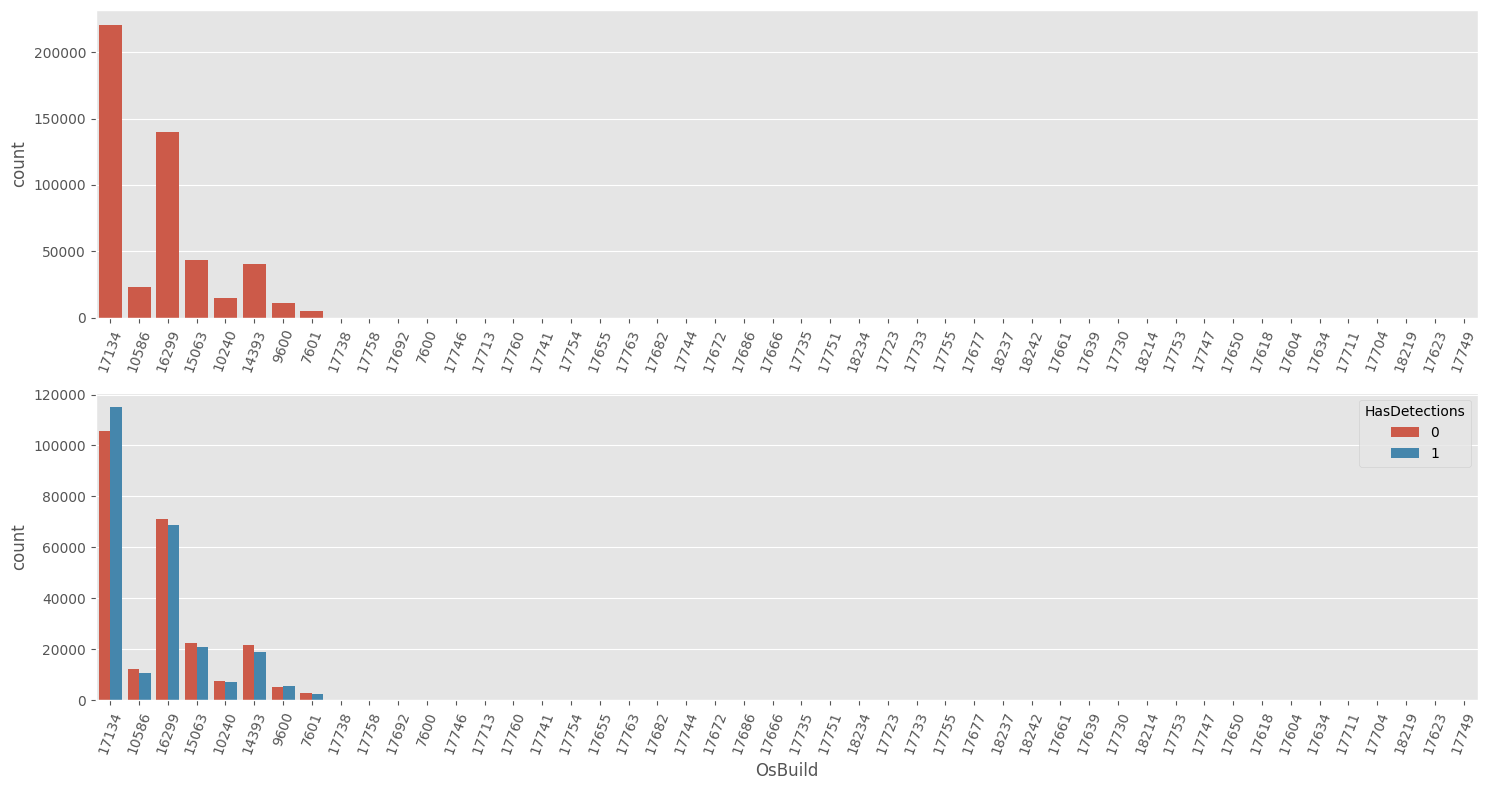

La columna tiene un total de 48 categorías 

count    500000.000000
mean      15726.933842
std        2188.646069
min        7600.000000
25%       15063.000000
50%       16299.000000
75%       17134.000000
max       18242.000000
Name: OsBuild, dtype: float64 

OsBuild tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
OsBuild                                               
17134          220779       114996            0.520865
16299          139901        68735            0.491312
15063           43352        20778            0.479286
14393           40717        18848            0.462902
10586           22955        10608            0.462122
10240           15014         7309            0.486812
9600            10825         5614            0.518614
7601             5281         2552            0.483242

In [125]:
analisis_ubicacion(df,'OsBuild',TARGET,3000)

- se trata de una variable sin nulos cuyas categorías principales no difieren significativamente de la media del target por lo que no la vamos a tener en cuenta para nuestro modelo

In [126]:
no_explicativas.append('OsBuild')

##### OsSuite

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

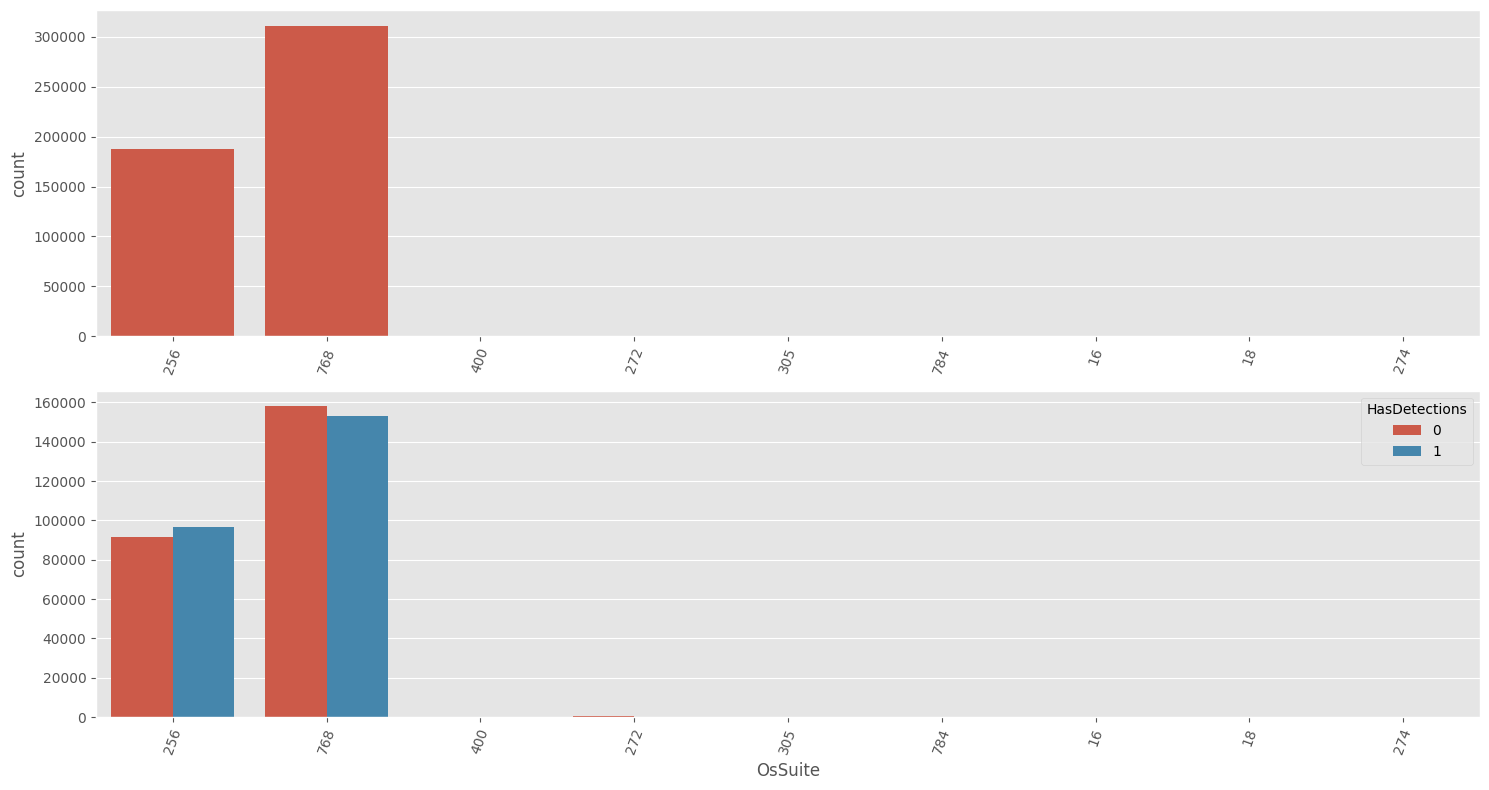

OsSuite tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
OsSuite                                               
768            311226       153185            0.492199
256            187951        96463            0.513235
272               677          238            0.351551
16                 53           33            0.622642
400                47           15            0.319149
305                33           13            0.393939
784                10            4            0.400000
274                 2            1            0.500000
18                  1            1            1.000000

In [127]:
analisis_cat(df,'OsSuite',TARGET)

- se trata de una variable sin nulos cuyas categorías principales cuyo porcentaje de malware no difiere de manera significativa de la media del target
- podemos ver que hay excepciones que difieren de manera significativa del target, pero poseen un número de máquinas muy bajo por lo que consideramos que la población no es suficientemente grande para tenerla en cuenta.

In [128]:
no_explicativas.append('OsSuite')

##### UacLuaenable

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

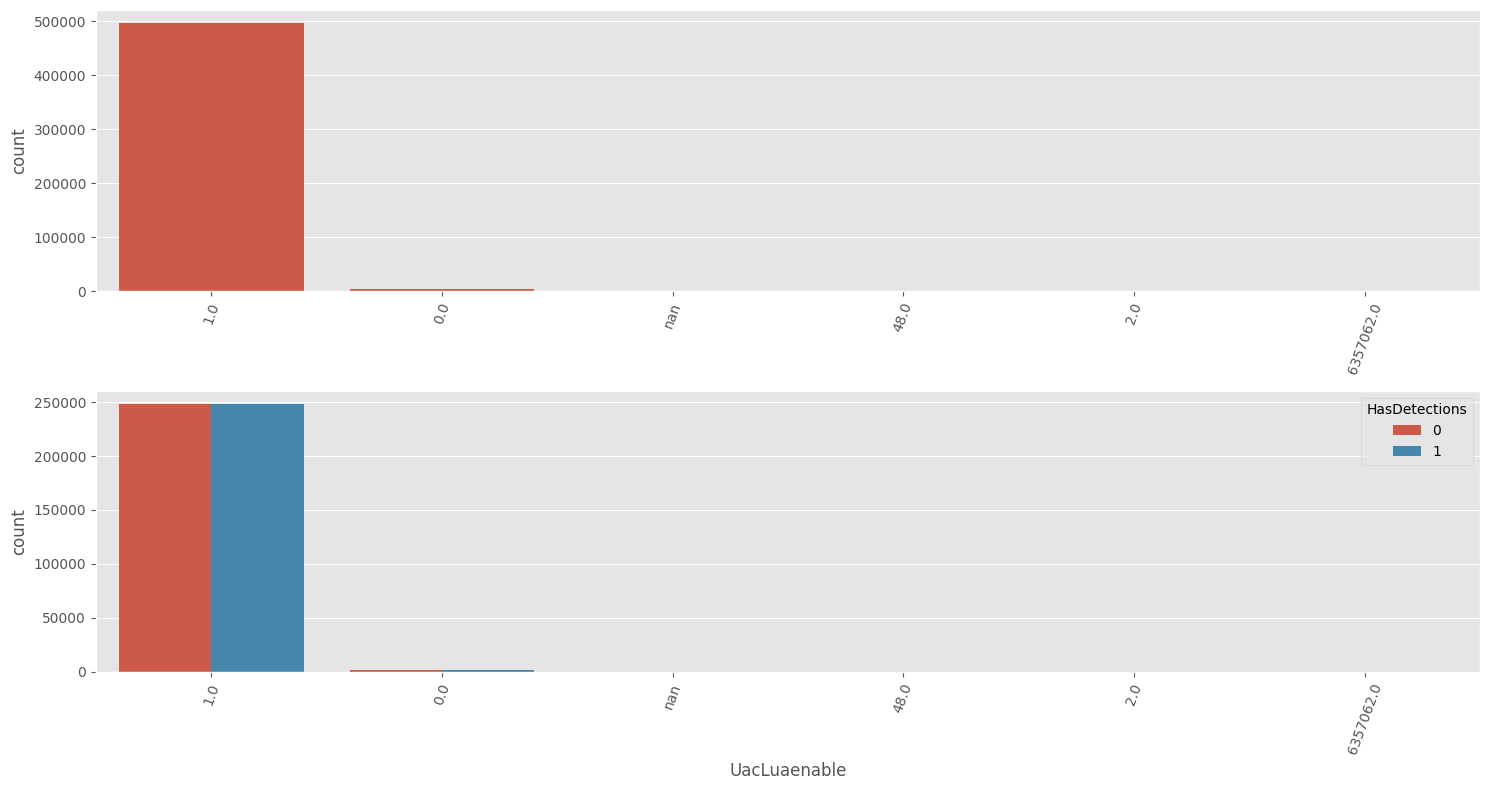

UacLuaenable tiene 623 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
UacLuaenable                                               
1.0                 496276       248115            0.499954
0.0                   3086         1496            0.484770
48.0                    13           10            0.769231
2.0                      1            1            1.000000
6357062.0                1            1            1.000000

In [129]:
analisis_cat(df,'UacLuaenable',TARGET)

- se trata de una variable con pocos nulos en la que la mayoría de máquinas se concentran en la categoría **1.0**
- las dos categorías con mayor número de máquinas se tratan de categorías no explicativas por lo que no contaremos con esta variable para nuestro modelo
- vemos que claramente hay un outlier que no tendremos que tratar porque eliminaremos la columna

In [130]:
no_explicativas.append('UacLuaenable')

##### Census_ProcessorCoreCount

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

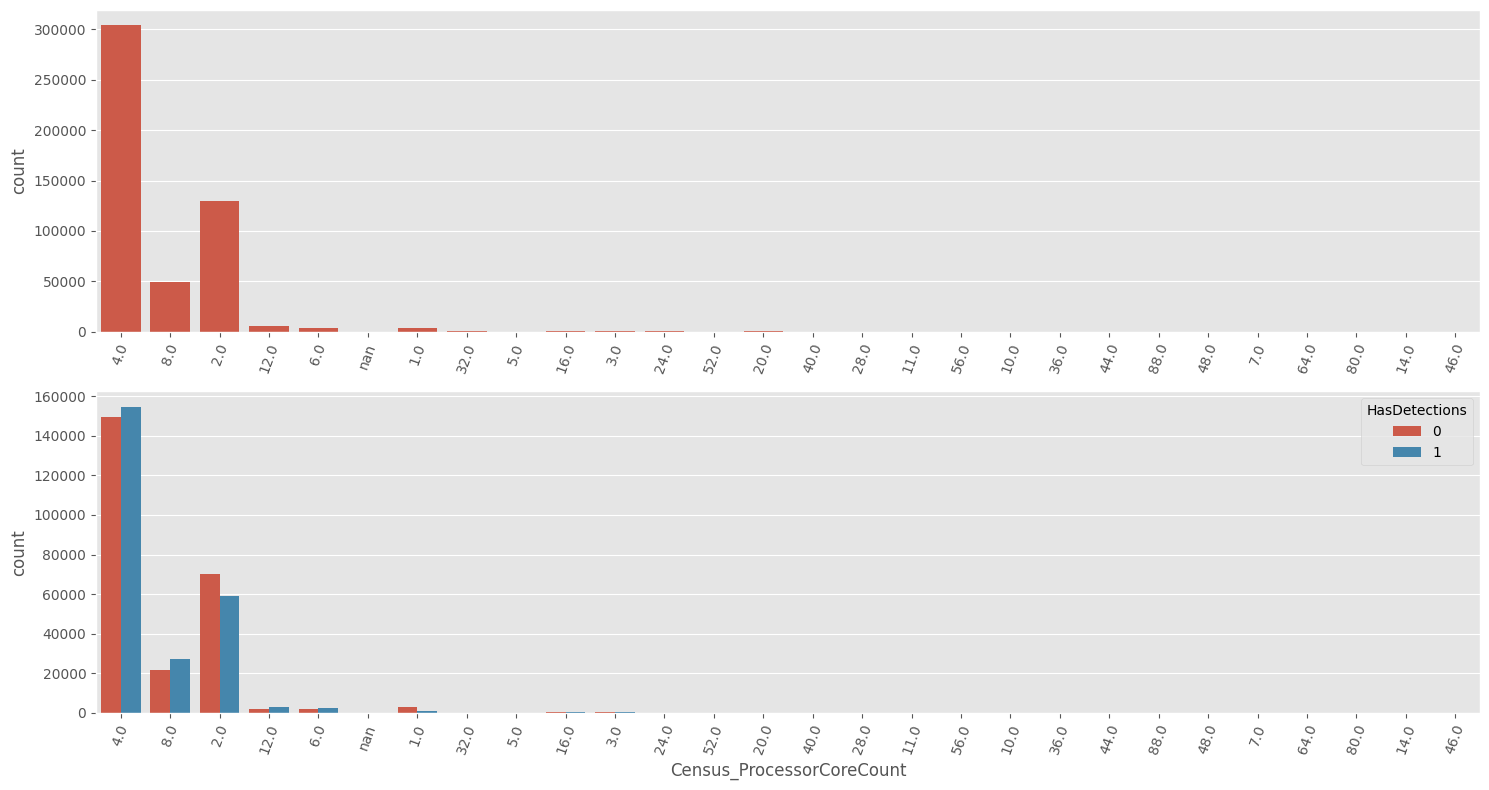

Census_ProcessorCoreCount tiene 2347 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_ProcessorCoreCount                                               
4.0                              304102       154734            0.508823
2.0                              129178        59122            0.457679
8.0                               48995        27121            0.553546
12.0                               5184         3011            0.580826
6.0                                4023         2290            0.569227
1.0                                3980         1207            0.303266
16.0                               1006          601            0.597416
3.0                                 752          342            0.454787
32.0                                113           60            0.530973
20.0                                 97           50            0.515464
24.0                                 95           44            0.463158
40.0                                 39           23            0.589744
28.0                                 17            9            0.529412
36.0                                 16            8            0.500000
48.0                                 15            6            0.400000
10.0                                 10            3            0.300000
5.0                                  10            7            0.700000
56.0                                  8            3            0.375000
7.0                                   3            1            0.333333
64.0                                  2            1            0.500000
11.0                                  2            1            0.500000
46.0                                  1            1            1.000000
52.0                                  1            0            0.000000
44.0                                  1            1            1.000000
14.0                                  1            1            1.000000
80.0                                  1            0            0.000000
88.0                                  1            0            0.000000

In [131]:
analisis_cat(df,'Census_ProcessorCoreCount',TARGET)

- se trata de una variable con nulos cuyas categorías más relevantes son explicativas

[Data Preparation](#limpieza):
- asignar los nulos a un valor fuera de rango como puede ser -1
- agrupar aquellas categorías con un número bajo de máquinas en la categoría **Others**
- aplicar OneHotEncoding

##### Census_PrimaryDiskTotalCapacity

Esta es la primera variable numérica 'real' (continua) que encontramos y nos informa de la capacidad del disco duro principal del ordenador. Vamos a proceder a identificar si la variable tiene nulos, outliers y si se trata de una variable explicativa.

In [132]:
print(df['Census_PrimaryDiskTotalCapacity'].describe(),'\n')
print(f'La variable tiene un total de {df['Census_PrimaryDiskTotalCapacity'].isna().sum()} nulos')

count    4.970240e+05
mean     5.140433e+05
std      3.704468e+05
min      1.024000e+04
25%      2.393720e+05
50%      4.769400e+05
75%      9.538690e+05
max      4.768767e+07
Name: Census_PrimaryDiskTotalCapacity, dtype: float64 

La variable tiene un total de 2976 nulos


- viendo las estadísticas podemos ya identificar que hay outliers. El máximo difiere mucho de el percentil 75%.

Para asegurarnos y visualizar estos outliers nos ayudamos de la función *plot_num*.

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


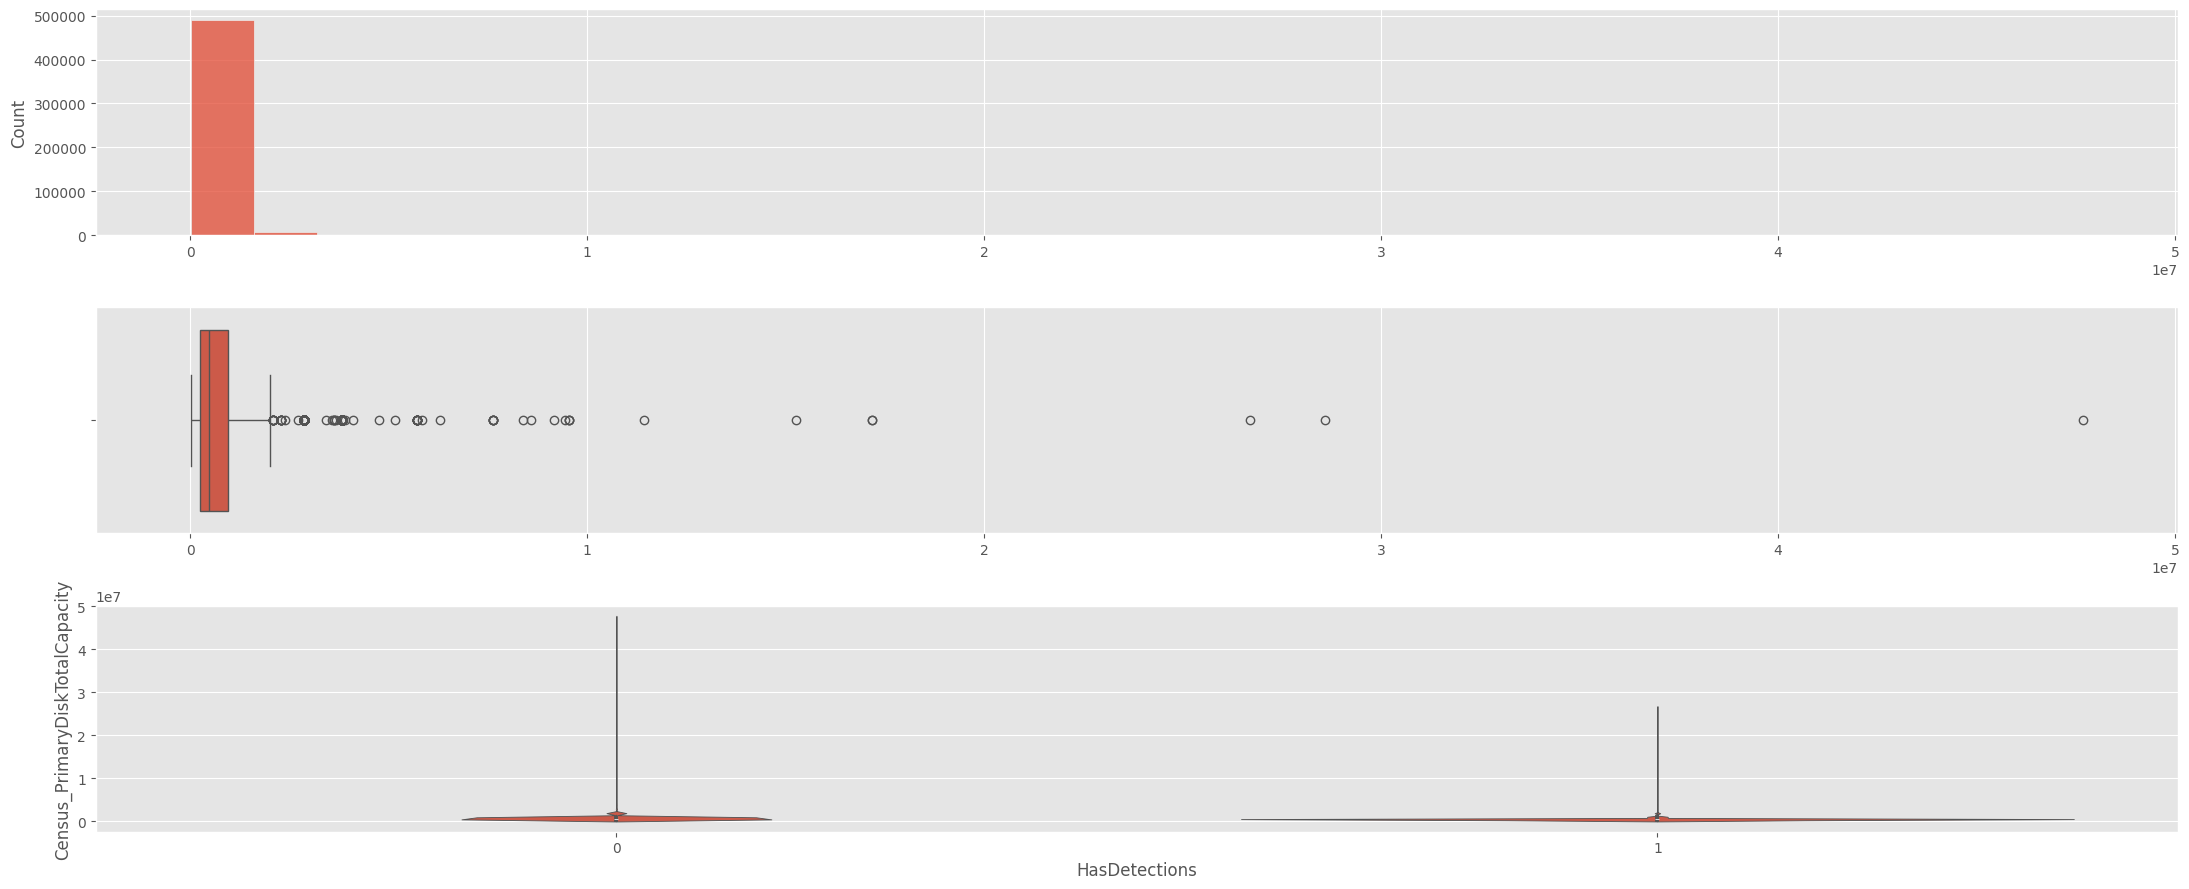

In [133]:
plot_num(df,'Census_PrimaryDiskTotalCapacity',TARGET)

- vemos que efectivamente hay varios outliers que impiden el adecuado análisis de la variable.

Al contrario que con el resto de variables, vamos a realizar el procesamiento de la variable a continuación para ver si se trata de una variable explicativa o no.

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


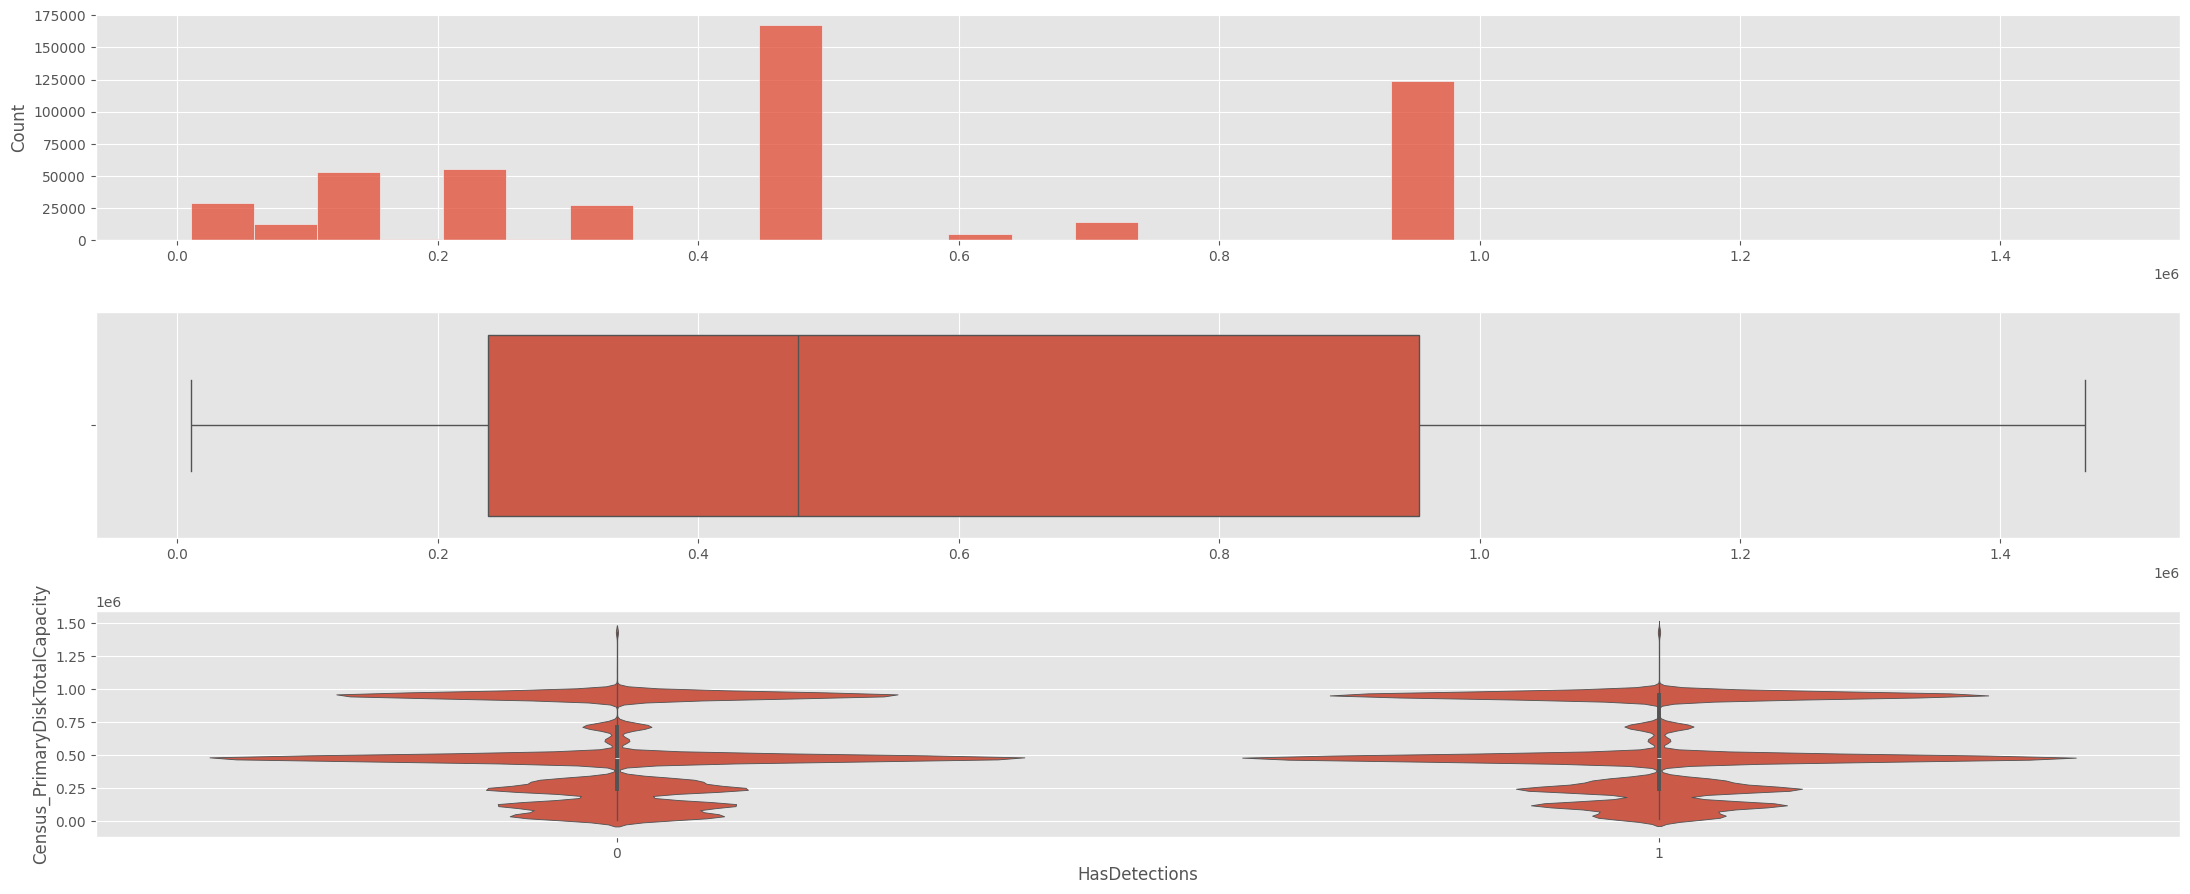

In [134]:
# tras probar con distintos valores, consideramos que los outliers son todos aquellos valores que se encuentran por encima de 1.5e+06 por lo que 
# visualizamos la gráfica sin tener en cuenta estos valores que claramente se tratan de excepciones
 
plot_num(df[df['Census_PrimaryDiskTotalCapacity']<1.5e+06],'Census_PrimaryDiskTotalCapacity',TARGET)

- vemos que la mayoría de máquinas se encuentran distribuidas en dos categorías, las cuales tienen más de 100000 máquinas
- la mediana vemos que se coincide con la capacidad más repetida a lo largo del dataset
- en la última gráfica podemos ver que la distribución entre las máquinas que poseen infecciones y las que no poseen son idénticas, teniendo la mediana a la misma altura (putno blanco). Esto indica que no se trata de una variable explicativa, ya que las máquinas que poseen infecciones tienen las mismas capacidades que aquellas que no las poseen.
- por lo tanto se trata de una variable no explicativa que no tendremos en cuenta, añadiéndola así a la lista *no_explicativas*

In [135]:
no_explicativas.append('Census_PrimaryDiskTotalCapacity')

##### Census_SystemVolumeTotalCapacity

Al igual que la anterior variable, se trata de una variable numérica continua la cual analizaremos de la misma manera. Es de esperar que al igual que la anterior se trate de una variable no explicativa ya que esta relacionada con la anterior ,ambas nos informan de la capacidad de los ordenadores (esta vez se trata de la capacidad total).

In [136]:
print(df['Census_SystemVolumeTotalCapacity'].describe(),'\n')
print(f'La variable tiene un total de {df['Census_SystemVolumeTotalCapacity'].isna().sum()} nulos')

count    4.970240e+05
mean     3.780546e+05
std      3.384722e+05
min      9.689000e+03
25%      1.207750e+05
50%      2.494500e+05
75%      4.759810e+05
max      4.768710e+07
Name: Census_SystemVolumeTotalCapacity, dtype: float64 

La variable tiene un total de 2976 nulos


- vemos que al igual que antes el percentil 75 difiere mucho del valor máximo al igual que el percentil 25 difiere mucho del valor mínimo.

Para confirmar que se trata de outliers aplicamos la función *plot_num*, que crea gráficas que nos ayudaran a identificarlos.

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


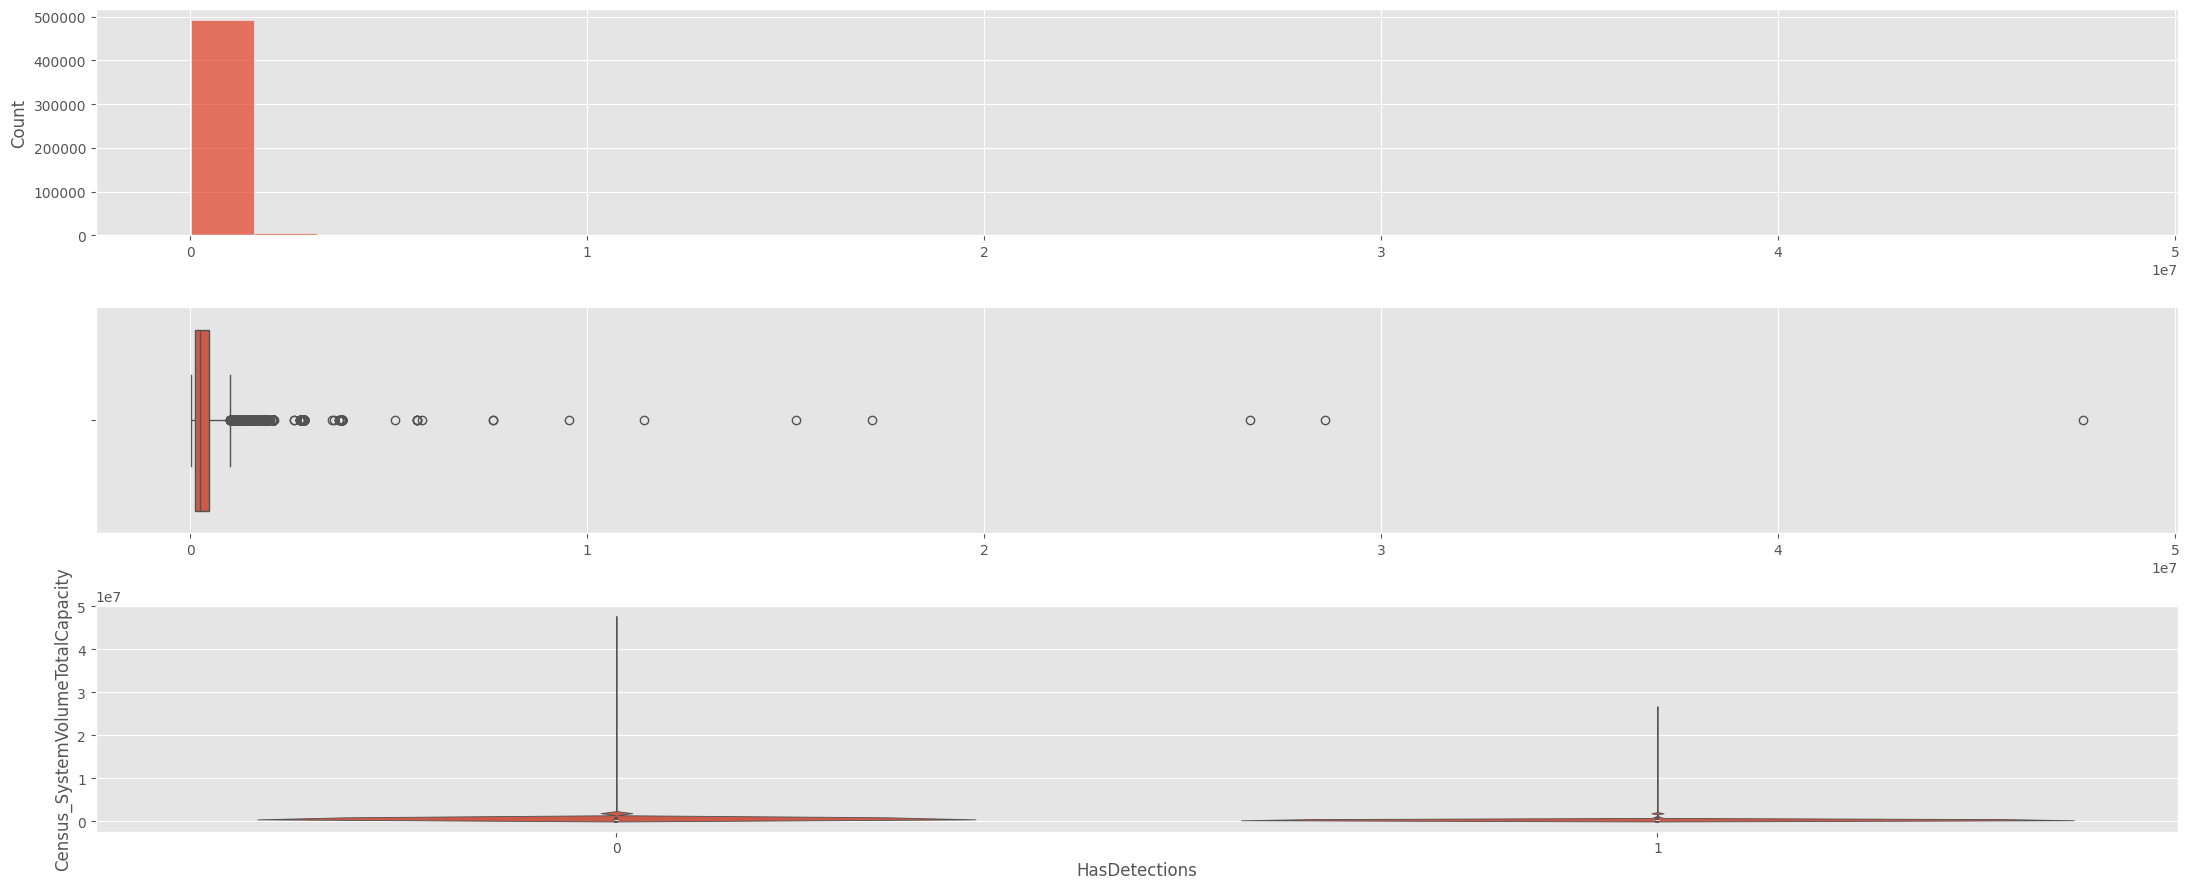

In [137]:
plot_num(df,'Census_SystemVolumeTotalCapacity',TARGET)

Confirmamos que hay varios outliers que podemos ver por encima del percentil 75, pero no hay outliers que estén por debajo del percentil 25.

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


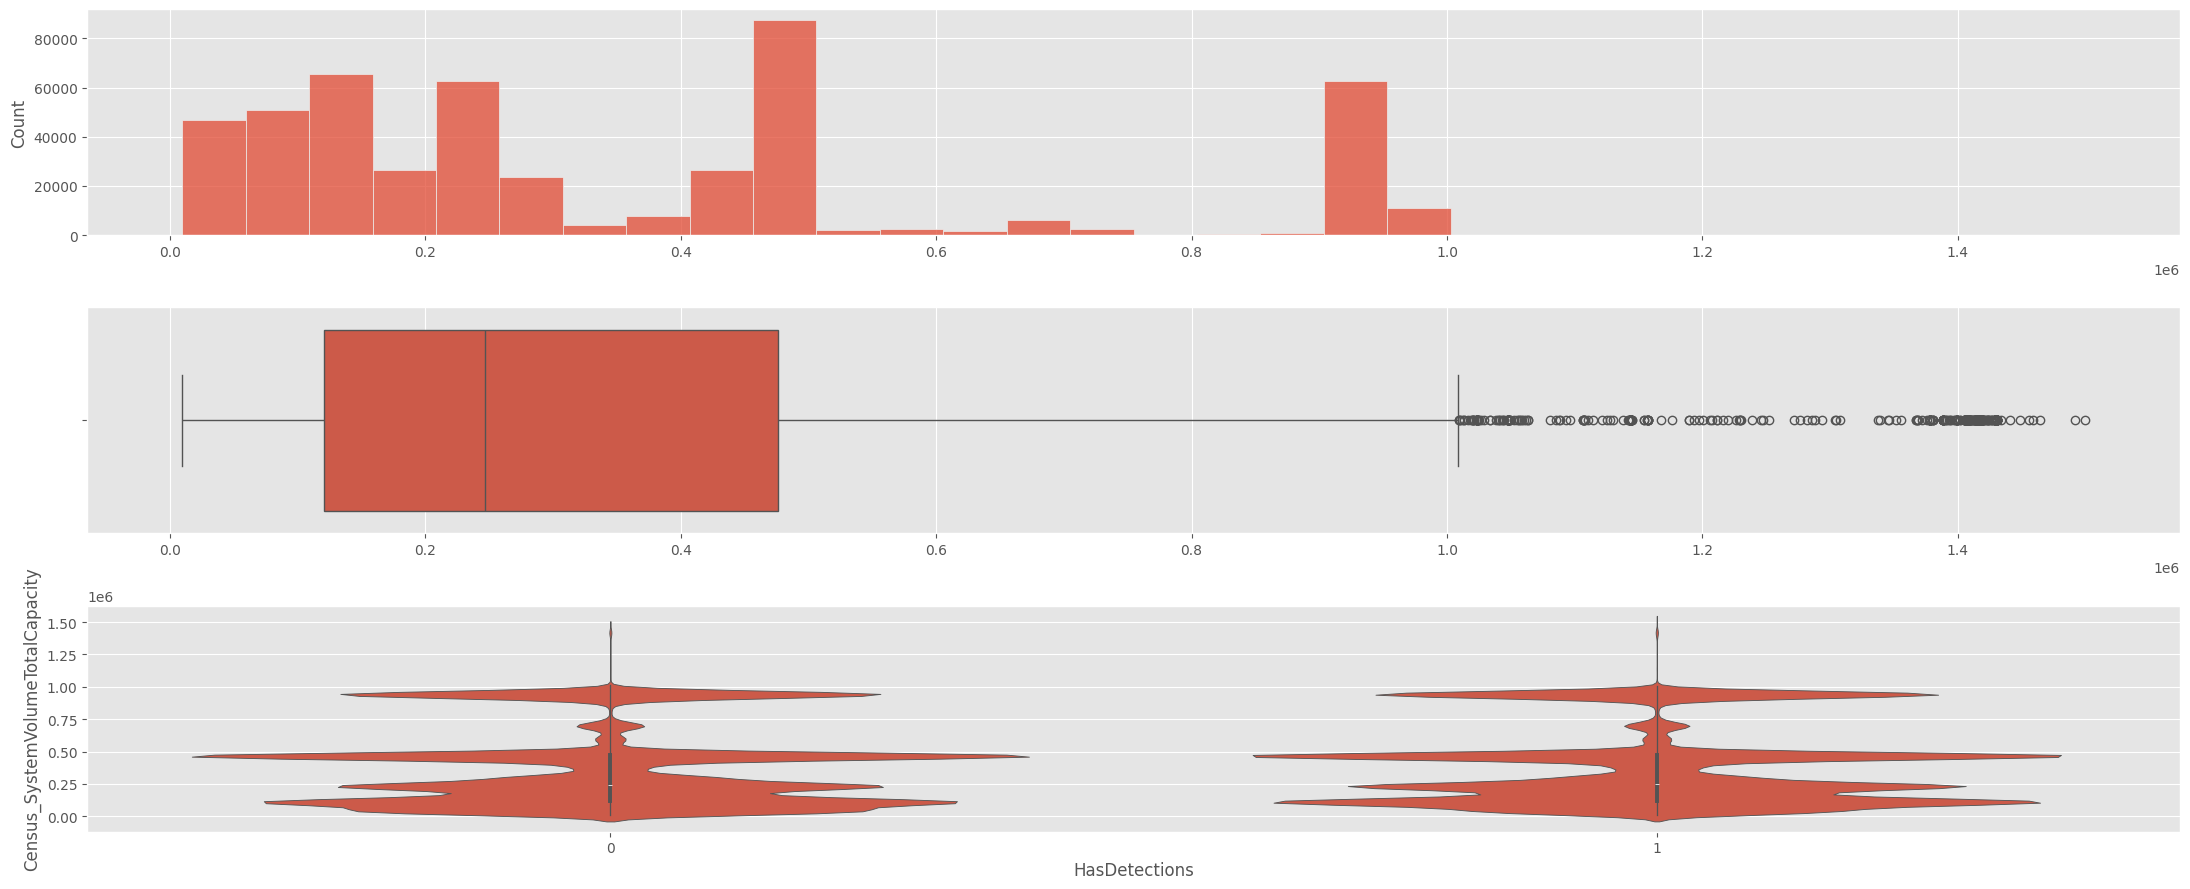

In [138]:
# tras probar con distintos valores, consideramos que los outliers son todos aquellos valores que se encuentran por encima de 1.5e+06 por lo que 
# visualizamos la gráfica sin tener en cuenta estos valores que claramente se tratan de excepciones

plot_num(df[df['Census_SystemVolumeTotalCapacity']<1.5e+06],'Census_SystemVolumeTotalCapacity',TARGET)

- vemos que las máquinas al contrario que antes se distribuyen de manera un poco más homogénea entre 6 categorías, cada una con más de 40000 máquinas
- la mediana esta vez difiere de la capacidad más repetida por lo explicado anteriormente
- al igual que en la anterior variable, la última gráfica nos indica que se trata de una variable no explicativa ya que tanto los ordenadores con virus como aquellos sin virus poseen la misma distribución de capacidades y sus medianas son prácticamente iguales.

In [139]:
no_explicativas.append('Census_SystemVolumeTotalCapacity')

##### Census_TotalPhysicalRAM

Se trata de una variable continua que nos informa de la RAM de cada máquina. Vamos a proceder a analizarla como las anteriores variables.

In [140]:
print(df['Census_TotalPhysicalRAM'].describe(),'\n')
print(f'La variable tiene un total de {df['Census_TotalPhysicalRAM'].isna().sum()} nulos')

count    495444.000000
mean       6129.232176
std        4964.521253
min         512.000000
25%        4096.000000
50%        4096.000000
75%        8192.000000
max      393216.000000
Name: Census_TotalPhysicalRAM, dtype: float64 

La variable tiene un total de 4556 nulos


- vemos que se trata de una variable con nulos los cuales podríamos asignarlos a la media
- aparentemente va a presentar outliers debido a que el máximo difiere de forma significativa de le percentil 75.

Nos ayudamos de la función *plot_num* para identificar los outliers.

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


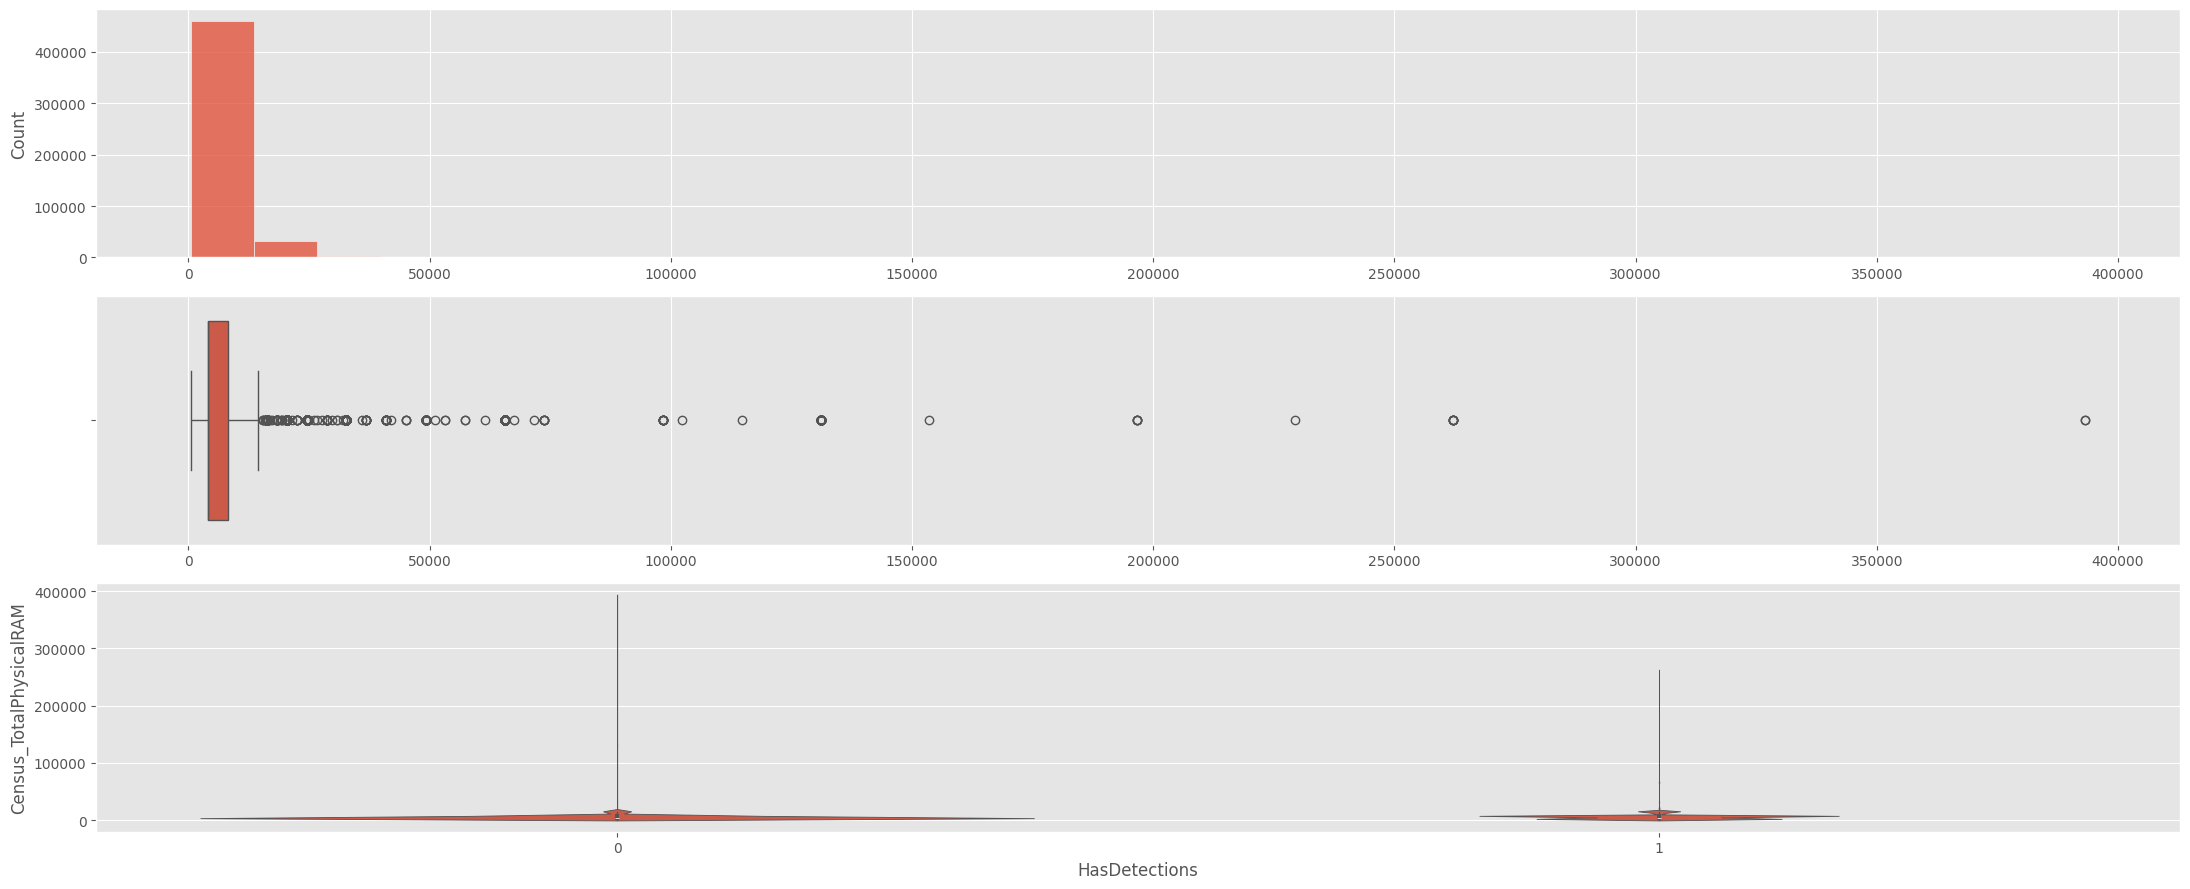

In [141]:
plot_num(df,'Census_TotalPhysicalRAM',TARGET)

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


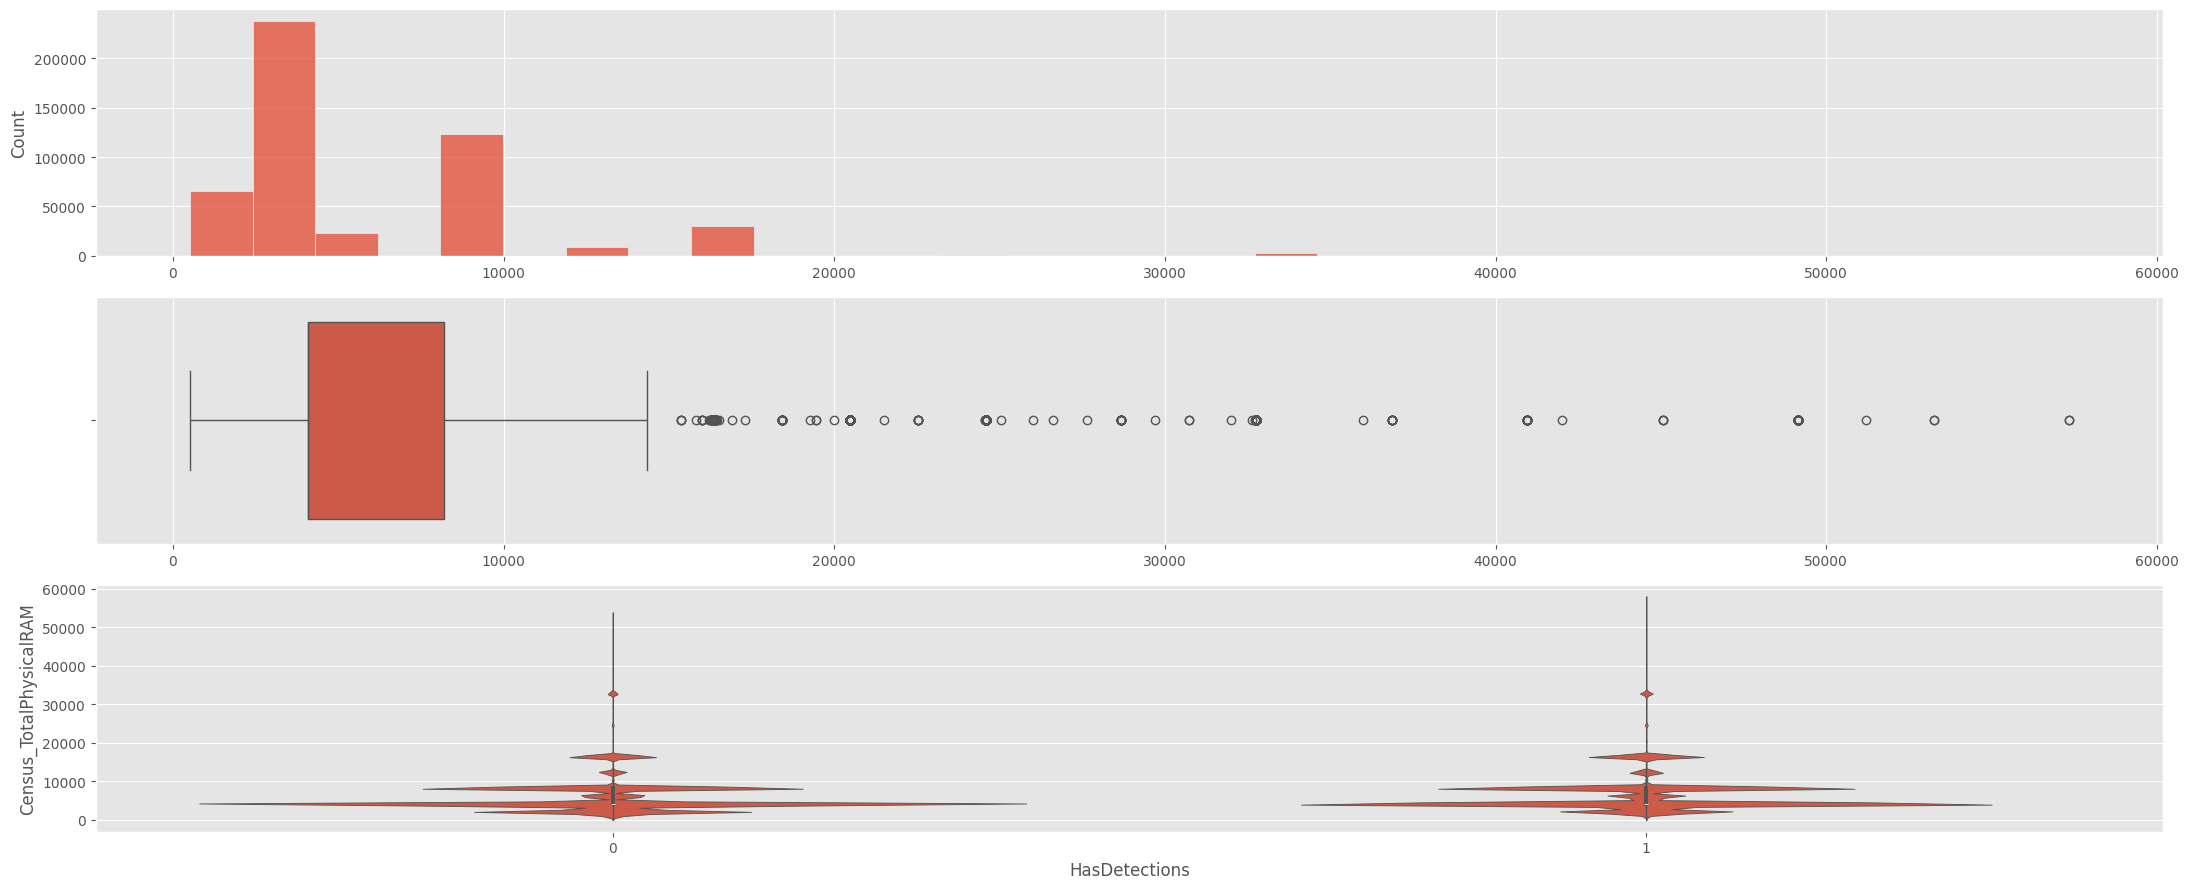

In [142]:
# tras probar con varios valores estimamos que el valor a partir del que consideraremos que se trata de outliers será 6e+04
plot_num(df[df['Census_TotalPhysicalRAM']<6e+04],'Census_TotalPhysicalRAM',TARGET)

- vemos que las máquinas al contrario que antes se distribuyen principalente en una categoría 
- debido a que la variable se encuentra muy repartida vemos muchos valores por encima del percentil 75 que provocan que la mediana no se sitúe justo en la RAM más repetida, si no que se desplaza más a la derecha
- la última gráfica nos indica que se trata de una variable no explicativa ya que tanto los ordenadores con virus como aquellos sin virus poseen distribuciones de RAM prácticamente iguales, incluso para aquellas máquinas que poseen valores de RAM fuera del boxplot. Por lo tanto no contaremos con esta variable para el modelo.

In [143]:
no_explicativas.append('Census_TotalPhysicalRAM')

##### Pantalla

Procedemos a analizar las columnas que aportan información sobre la pantalla de las máquinas. Estas son:
- Census_InternalPrimaryDiagonalDisplaySizeInInches
- Census_InternalPrimaryDisplayResolutionHorizontal
- Census_InternalPrimaryDisplayResolutionVertical

En el [Ánalisis multivariante](#analisis_multivariante) veremos la relación que existe entre ellas y en caso de ser explicativa nos quedaremos con aquella que aporte más información. A continuación vamos a ver si se trata de variables explicativas, si tienen nulos y si poseen outliers.

In [144]:
# Ánalisis de Census_InternalPrimaryDiagonalDisplaySizeInInches

print(df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].describe(),'\n')
print(f'La variable tiene un total de {df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].isna().sum()} nulos')

count    497346.000000
mean         16.689837
std           5.932014
min           4.900000
25%          13.900000
50%          15.500000
75%          17.200000
max         142.000000
Name: Census_InternalPrimaryDiagonalDisplaySizeInInches, dtype: float64 

La variable tiene un total de 2654 nulos


- se trata de una variable con nulos que informa del tamaño de la pantalla.
- viendo los estadísticos descriptivos podemos identificar outliers ya que difieren mucho de el percentil 75 y el máximo resulta ser un tamaño excesivamente grande (142 inches equivalen a 3,5m de pantalla)

Nos ayudamos de la función *plot_num* para identificar mejor estos outliers.

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


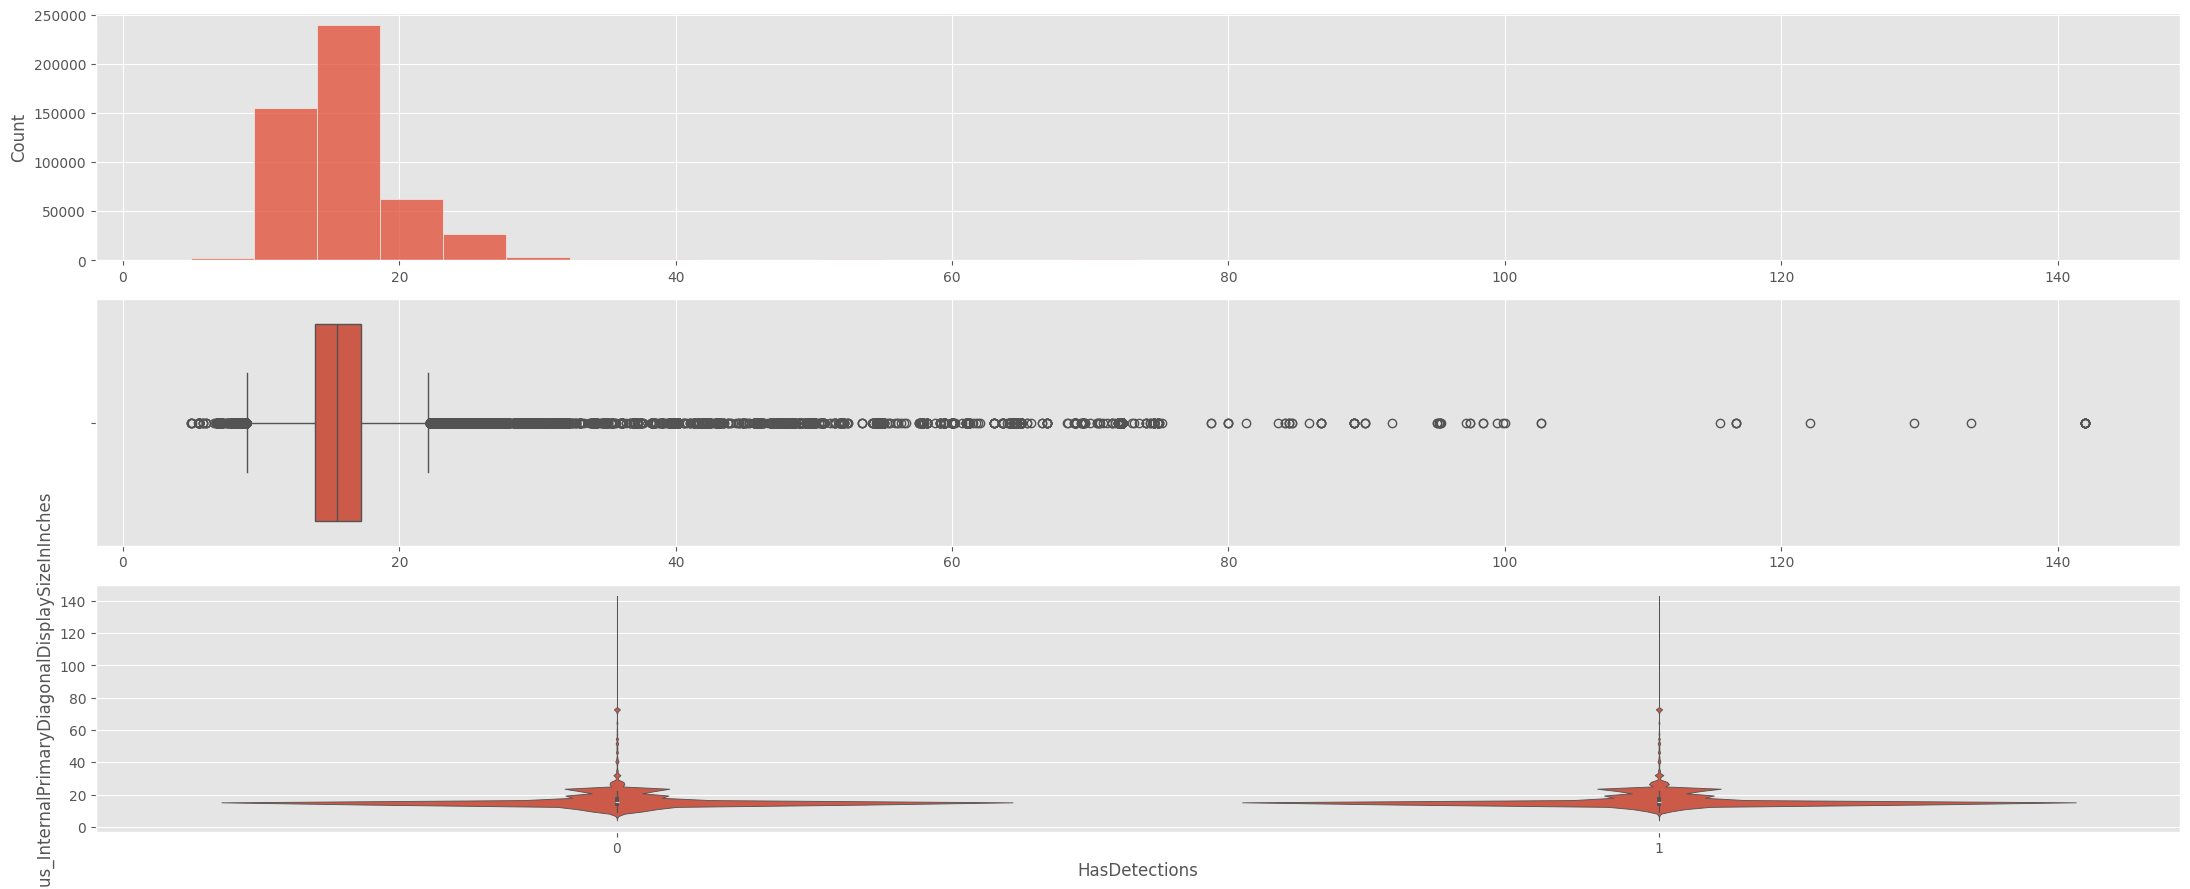

In [145]:
plot_num(df,'Census_InternalPrimaryDiagonalDisplaySizeInInches',TARGET)

- observamos que el rango de tamaños de pantalla es muy variado pero la mayoría se ecuentra entre 10-30 inches. 
- principalmente podemos considerar outliers a partir de las 80 inches (ya que por encima de ese tamaño son casos únicos)

Para ver mejor la distribución de la variable y su relación con el target no tendremos en cuenta las pantallas con más de 60 inches

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


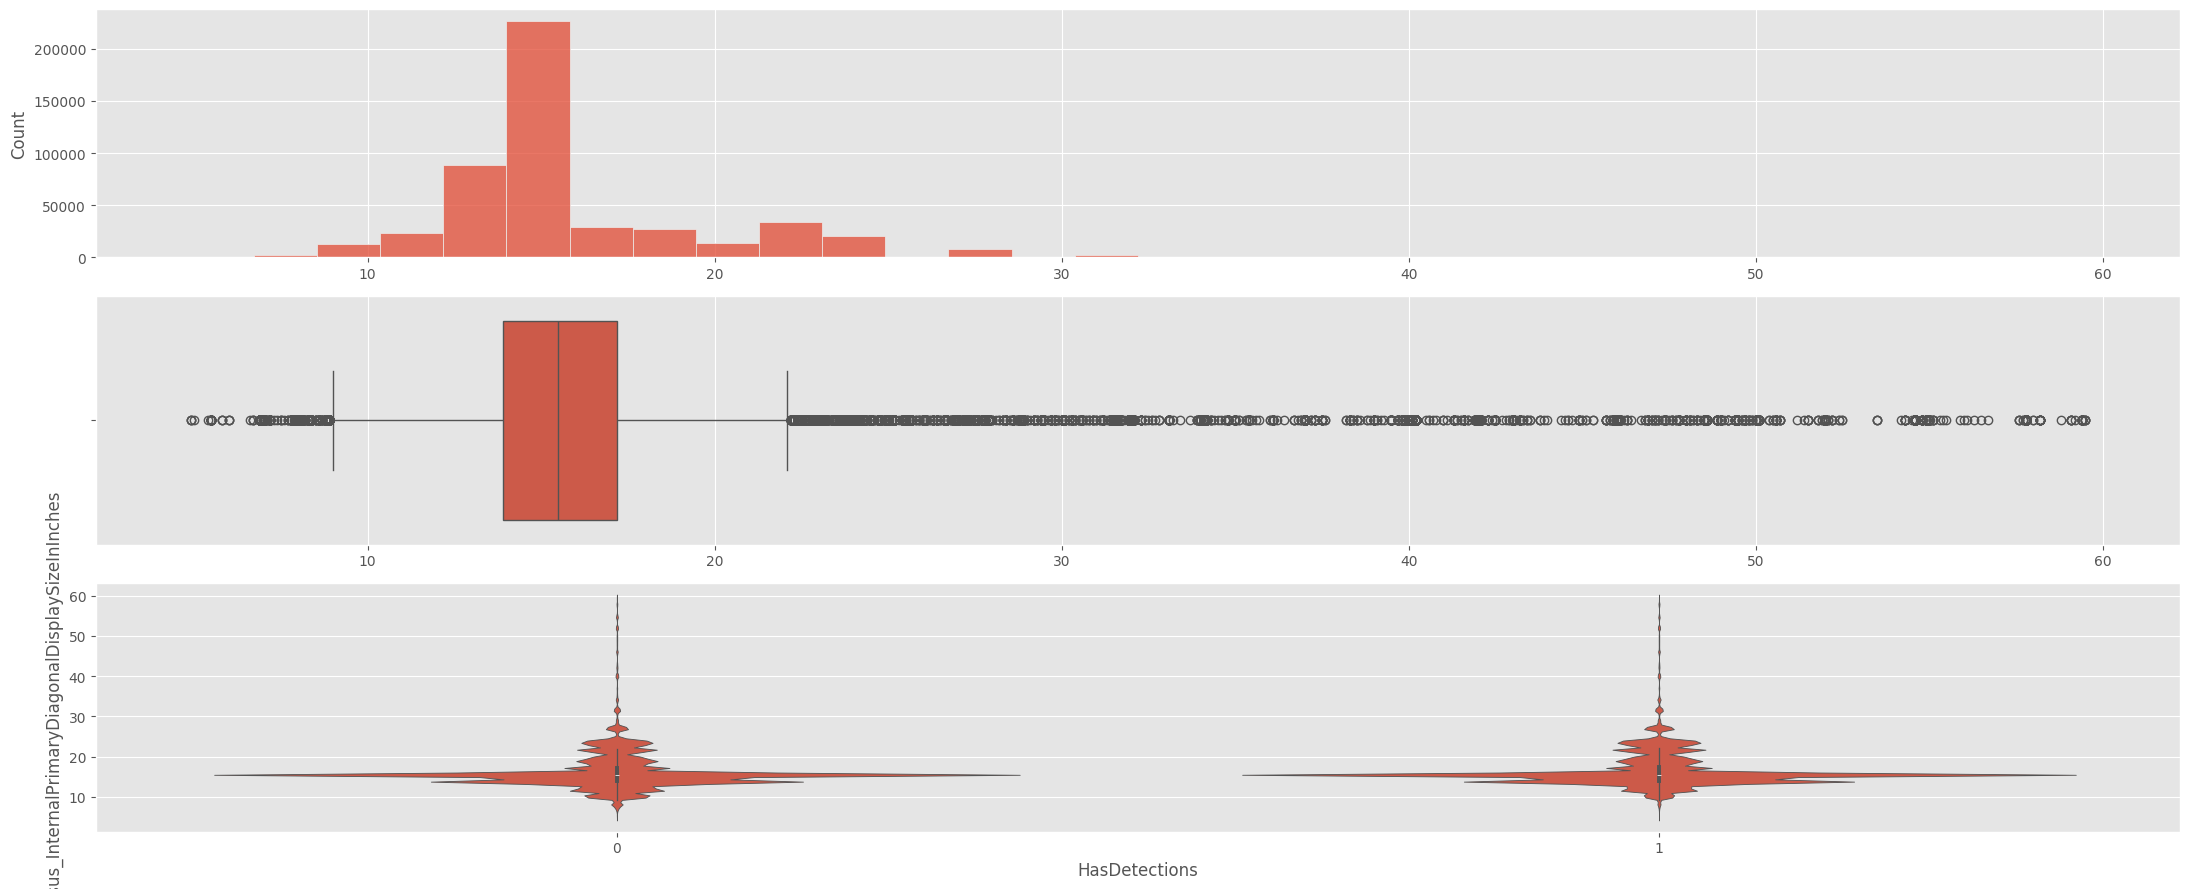

In [146]:
plot_num(df[df['Census_InternalPrimaryDiagonalDisplaySizeInInches']<60],'Census_InternalPrimaryDiagonalDisplaySizeInInches',TARGET)

- la última gráfica nos indica que se trata de una variable no explicativa ya que tanto los ordenadores con virus como aquellos sin virus poseen distribuciones de tamaños de pantalla prácticamente iguales, incluso para aquellas máquinas que poseen valores más inusuales que se encuentran fuera del boxplot. Por lo tanto no contaremos con esta variable para el modelo.

In [147]:
no_explicativas.append('Census_InternalPrimaryDiagonalDisplaySizeInInches')

In [148]:
# Ánalisis de Census_InternalPrimaryDisplayResolutionHorizontal

print(df['Census_InternalPrimaryDisplayResolutionHorizontal'].describe(),'\n')
print(f'La variable tiene un total de {df['Census_InternalPrimaryDisplayResolutionHorizontal'].isna().sum()} nulos')

count    497350.000000
mean       1548.304317
std         368.565945
min          -1.000000
25%        1366.000000
50%        1366.000000
75%        1920.000000
max       11520.000000
Name: Census_InternalPrimaryDisplayResolutionHorizontal, dtype: float64 

La variable tiene un total de 2650 nulos


- observamos que tenemos outliers ya que el valor mínimo es negativo y el máximo difiere mucho de el percentil 75
- en caso de tratarse de una variable explicativa asignaremos los outliers a la media

Para observar mejor los outliers llamamos a la función *plot_num*

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


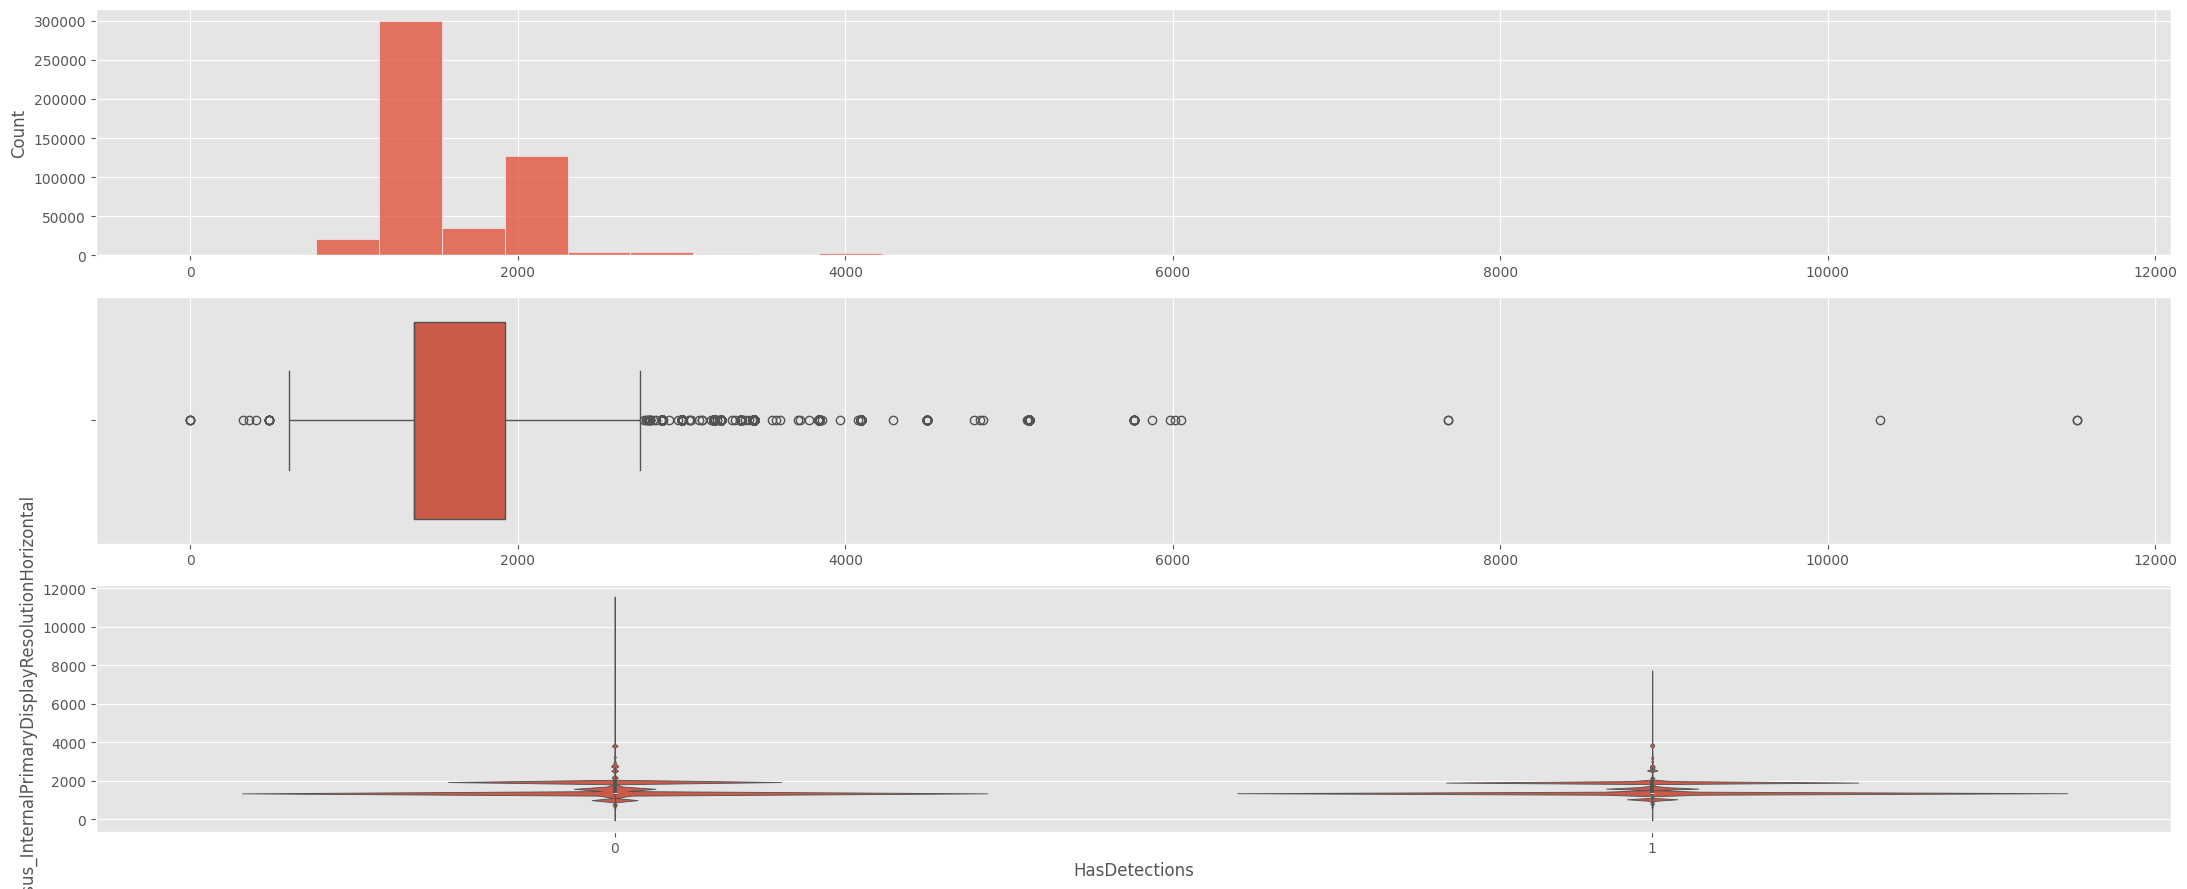

In [149]:
plot_num(df,'Census_InternalPrimaryDisplayResolutionHorizontal',TARGET)

Para ver mejor la distribución de la variable y su relación con el target no tendremos en cuenta los outliers

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


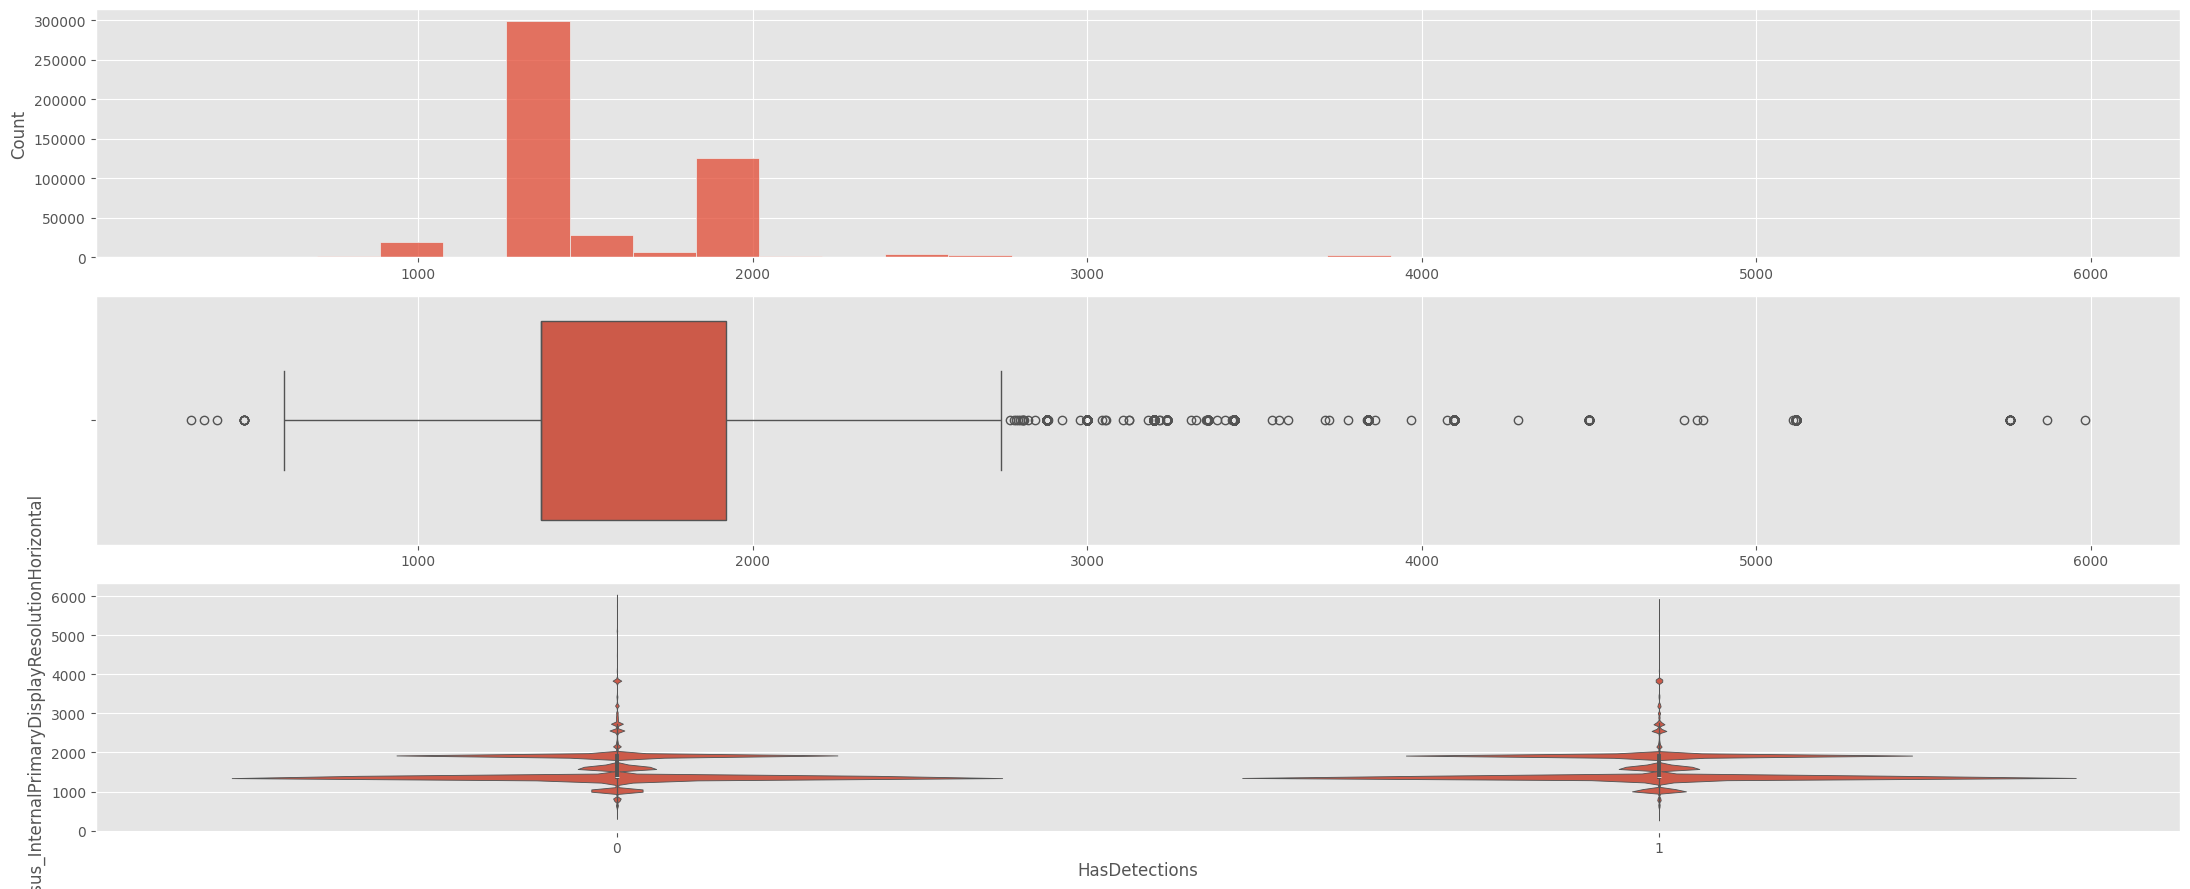

In [150]:
plot_num(df[(df['Census_InternalPrimaryDisplayResolutionHorizontal']<6000)&(df['Census_InternalPrimaryDisplayResolutionHorizontal']>0)],'Census_InternalPrimaryDisplayResolutionHorizontal',TARGET)

- la última gráfica nos indica que se trata de una variable no explicativa ya que tanto los ordenadores con virus como aquellos sin virus poseen distribuciones de resoluciones horizontales prácticamente iguales, incluso para aquellas máquinas que poseen valores más inusuales que se encuentran fuera del boxplot. Por lo tanto no contaremos con esta variable para el modelo.

In [151]:
no_explicativas.append('Census_InternalPrimaryDisplayResolutionHorizontal')

In [152]:
# Ánalisis de Census_InternalPrimaryDisplayResolutionHorizontal exactamente igual que la variable anterior

print(df['Census_InternalPrimaryDisplayResolutionVertical'].describe(),'\n')
print(f'La variable tiene un total de {df['Census_InternalPrimaryDisplayResolutionVertical'].isna().sum()} nulos')

count    497350.000000
mean        898.239345
std         214.862450
min          -1.000000
25%         768.000000
50%         768.000000
75%        1080.000000
max        4320.000000
Name: Census_InternalPrimaryDisplayResolutionVertical, dtype: float64 

La variable tiene un total de 2650 nulos


- observamos que tenemos outliers ya que el valor mínimo es negativo y el máximo difiere mucho de el percentil 75
- en caso de tratarse de una variable explicativa asignaremos los outliers a la media
- claramente muy relacionada con la anterior variable ya que la distribución es muy similar (con valores más bajos debido a que las pantallas suelen ser más largas horizontalmente que verticalmente)

Para observar mejor los outliers llamamos a la función *plot_num*

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


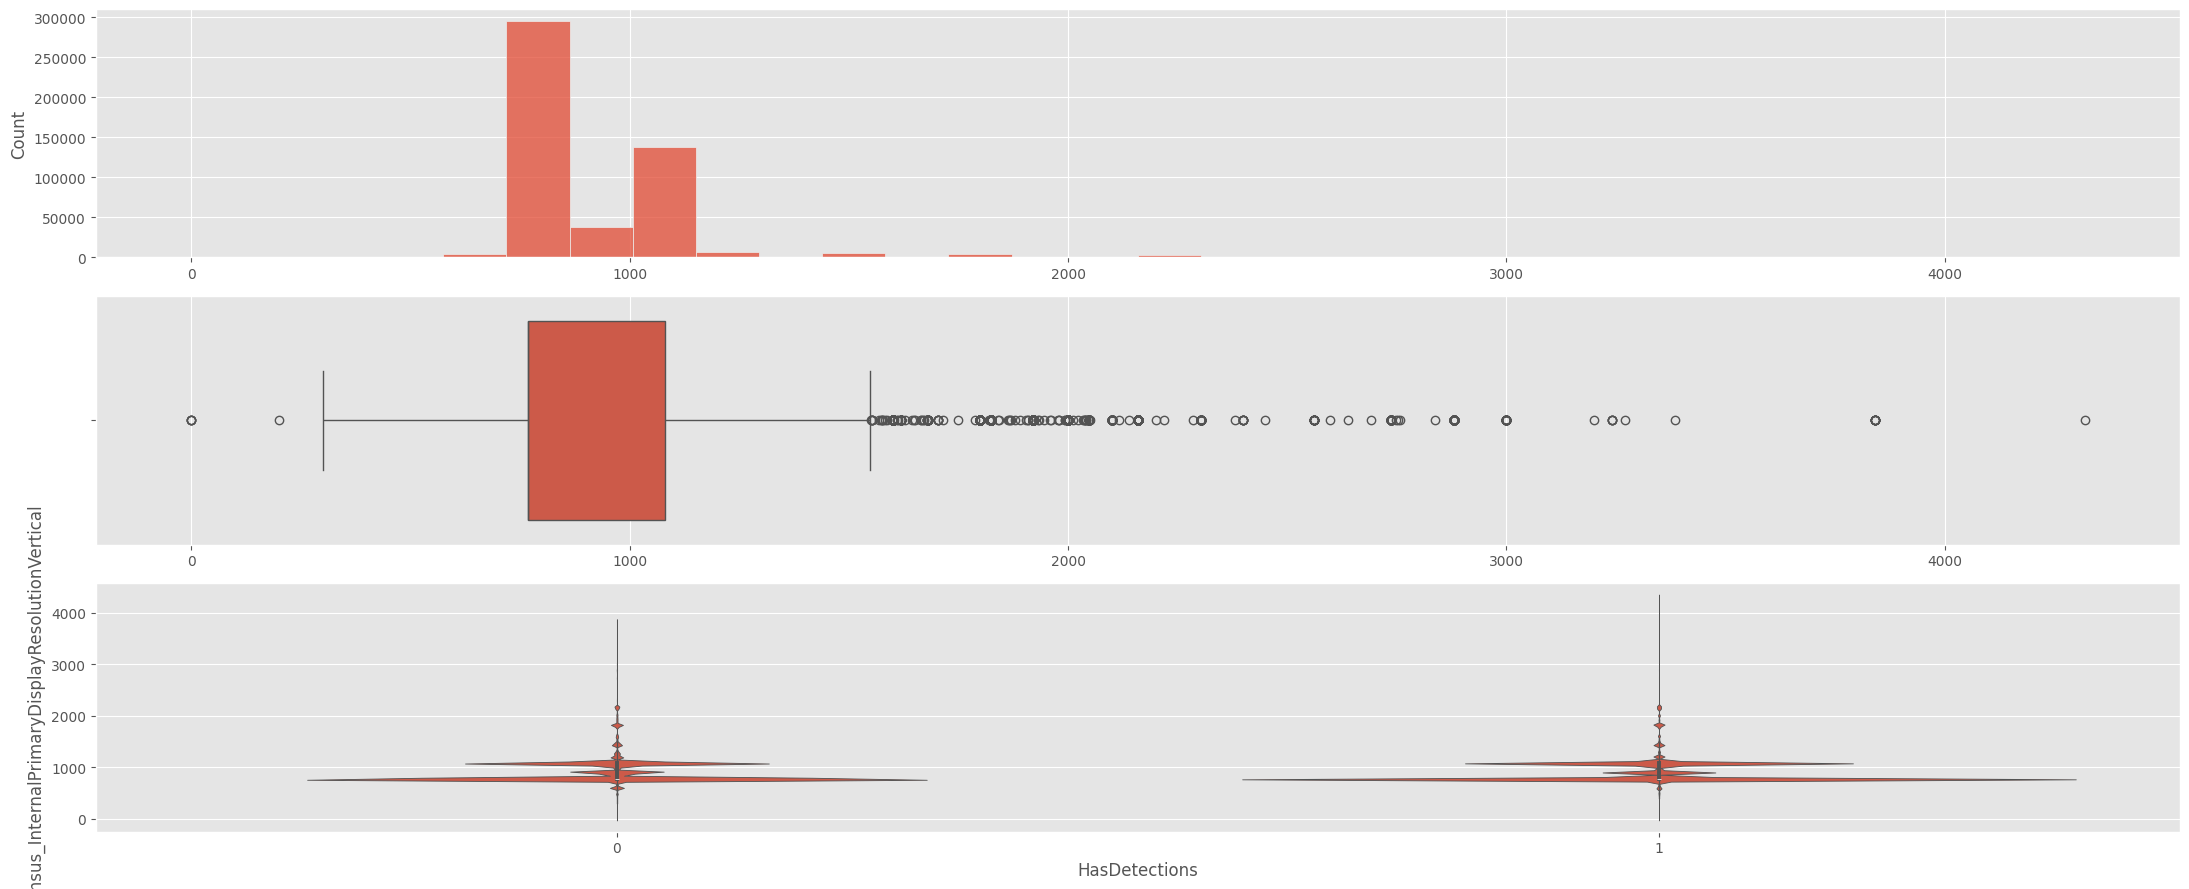

In [153]:
plot_num(df,'Census_InternalPrimaryDisplayResolutionVertical',TARGET)

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


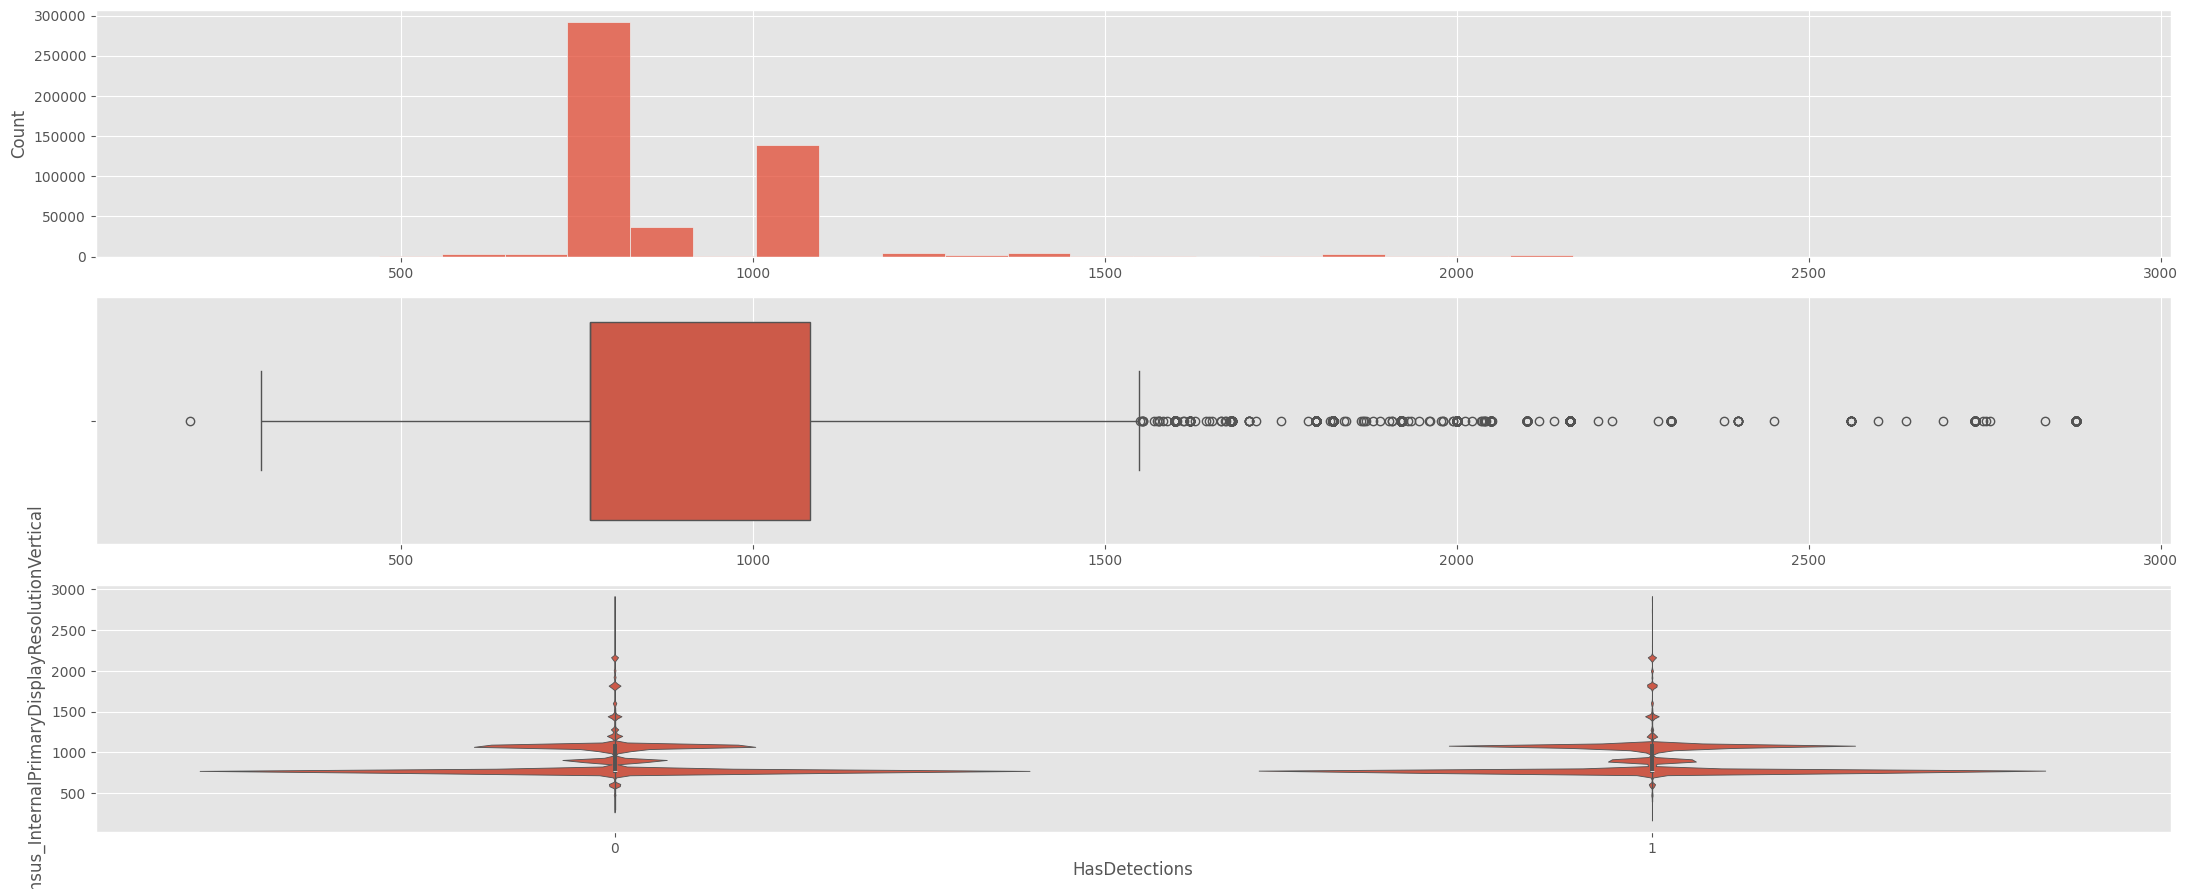

In [154]:
plot_num(df[(df['Census_InternalPrimaryDisplayResolutionVertical']<2900)&(df['Census_InternalPrimaryDisplayResolutionVertical']>0)],'Census_InternalPrimaryDisplayResolutionVertical',TARGET)

- de nuevo la última gráfica nos indica que se trata de una variable no explicativa ya que tanto los ordenadores con virus como aquellos sin virus poseen distribuciones de resoluciones verticales prácticamente iguales, incluso para aquellas máquinas que poseen valores más inusuales que se encuentran fuera del boxplot. Por lo tanto no contaremos con esta variable para el modelo.

In [155]:
no_explicativas.append('Census_InternalPrimaryDisplayResolutionVertical')

##### Census_InternalBatteryNumberOfCharges

In [156]:
print(df['Census_InternalBatteryNumberOfCharges'].describe(),'\n')
print(f'La variable tiene un total de {df['Census_InternalBatteryNumberOfCharges'].isna().sum()} nulos')

count    4.849620e+05
mean     1.125600e+09
std      1.888768e+09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.294967e+09
max      4.294967e+09
Name: Census_InternalBatteryNumberOfCharges, dtype: float64 

La variable tiene un total de 15038 nulos


- vemos que la variable tiene nulos pero no presenta outliers
- viendo las estadísticas descriptivas de la variable, podemos asimilarlas a las de una variable booleana debido a que se reparte en dos valores 0 y 4.294967e+09

Nos ayudamos de gráficas para confirmar nuestra suposición.

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


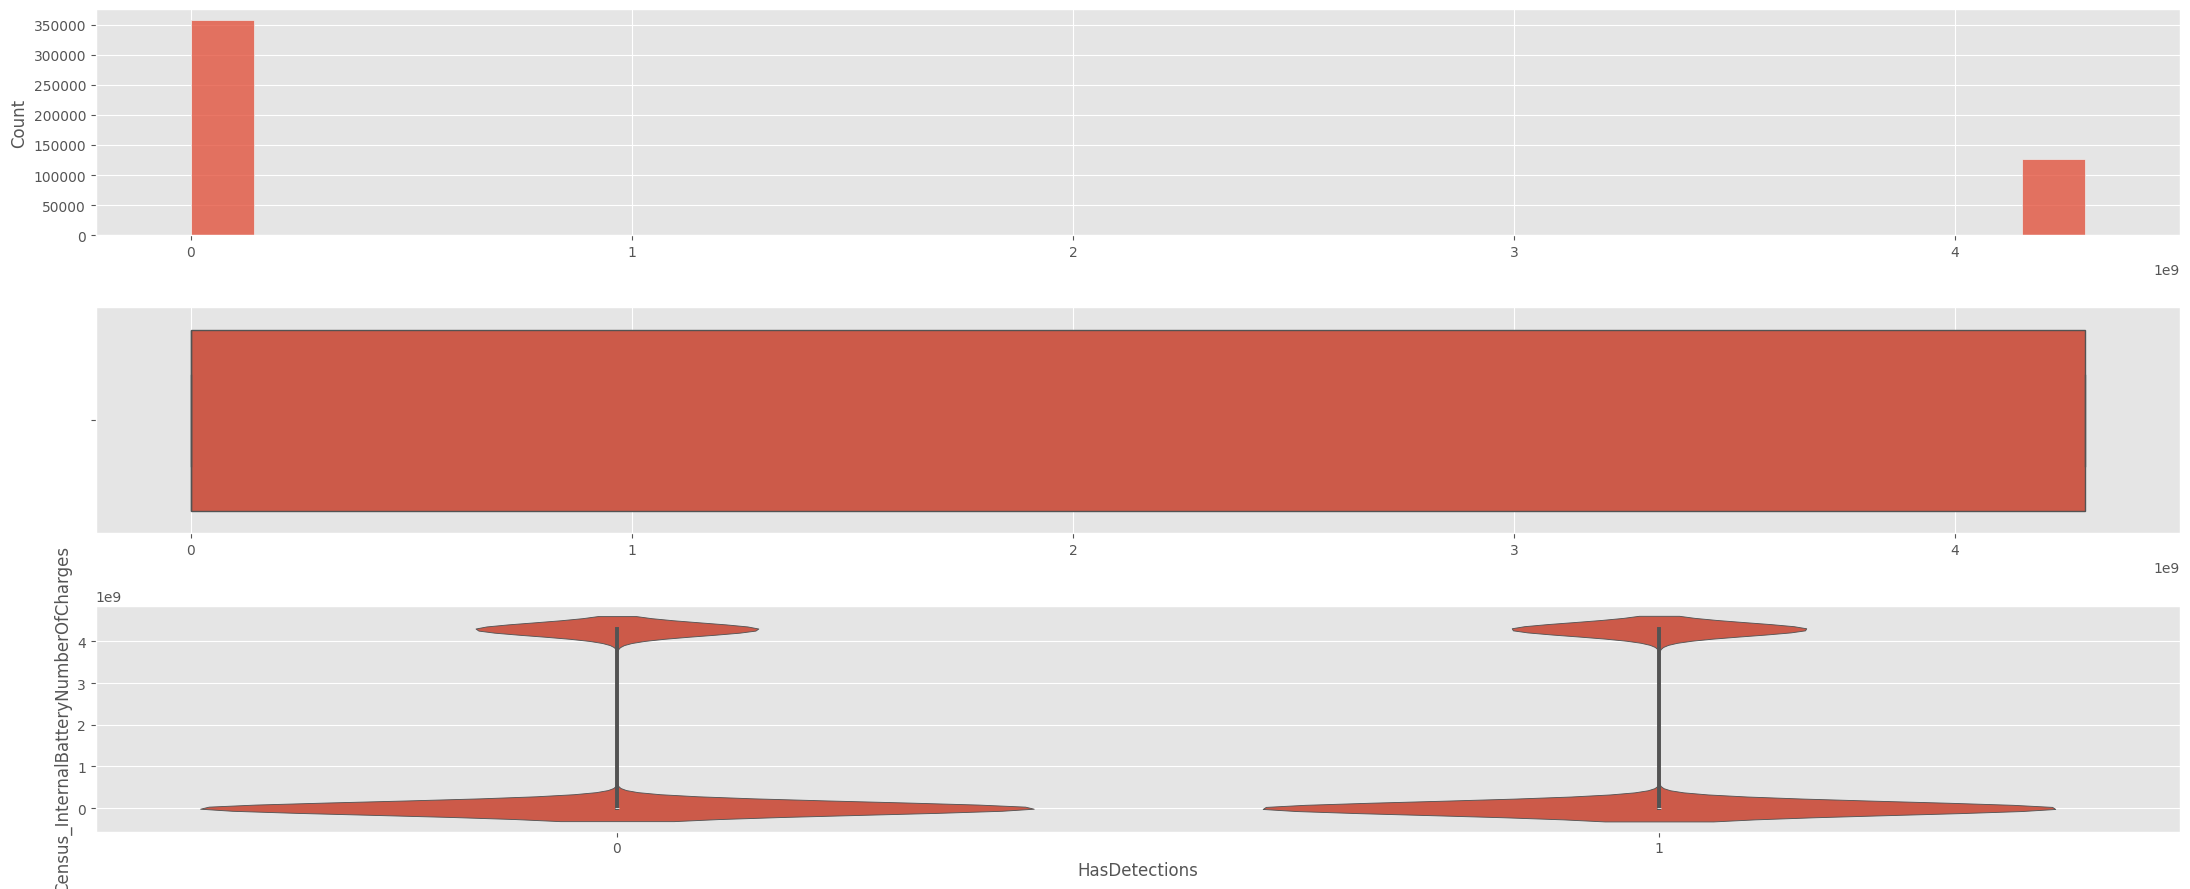

In [157]:
plot_num(df,'Census_InternalBatteryNumberOfCharges',TARGET)

Efectivamente vemos que esta variable la podemos tratar como una variable categórica ya que las máquinas se encuentran distribuidas en dos categorías que agrupan la gran mayoría de máquinas. Es por ello que procedemos a analizarla como una variable categórica.

In [158]:
analizar_identifiers(df,'Census_InternalBatteryNumberOfCharges',3000)

La columna tiene un total de 5248 categorías 

count    4.849620e+05
mean     1.125600e+09
std      1.888768e+09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.294967e+09
max      4.294967e+09
Name: Census_InternalBatteryNumberOfCharges, dtype: float64 

Census_InternalBatteryNumberOfCharges tiene 15038 nulos 



Num_maquinas  Con_malware  \
Census_InternalBatteryNumberOfCharges                              
0.000000e+00                                 283189       140772   
4.294967e+09                                 126436        65208   

                                       Porcentaje_malware  
Census_InternalBatteryNumberOfCharges                      
0.000000e+00                                     0.497096  
4.294967e+09                                     0.515739

- observamos que solo dos valores se encuentran por encima de las 3000 máquinas
- a falta de estudiar los nulos y agrupar el resto de valores bajo la categoría de otros, parece ser una variable no explicativa

[Data Preparation](#limpieza):
- asignar los nulos a un valor fuera de rango como puede ser -1
- agrupar las categorías con menos de 3000 máquinas bajo una categoría llamada Others
- estimar si se trata de una variable explicativa
- en caso de que lo sea aplicar un OneHotEncoding

##### Census_OSBuildRevision

Esta variable parte de una variable llamada OsVersionFull, la cual es categórica, por lo tanto la trataremos como tal.

Para ello hacemos uso de la función *analisis_ubicacion*.

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5020\3932924024.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70) # giramos las etiquetas de los ejes para que se vean de forma más clara en caso de haber muchos
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

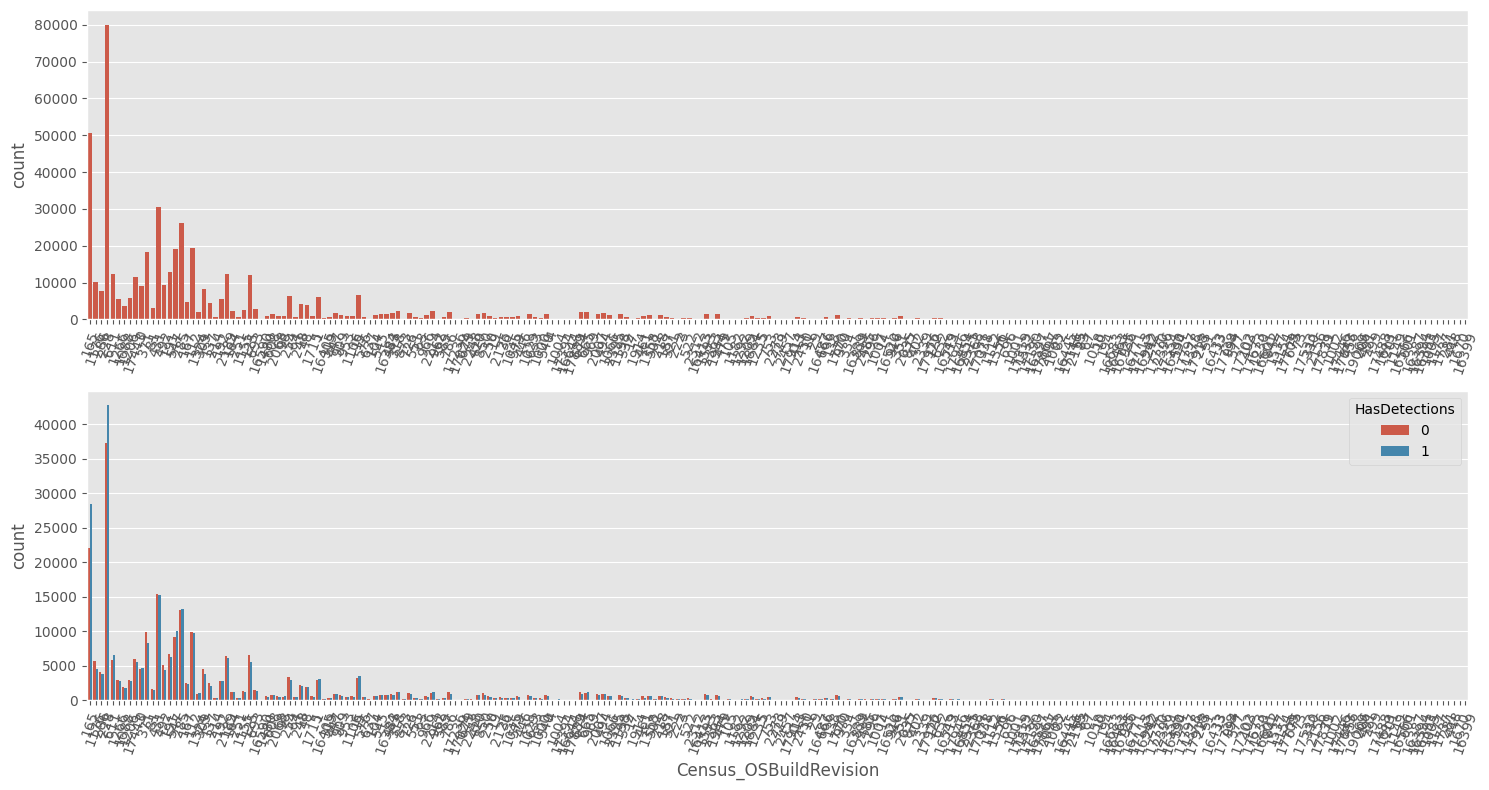

La columna tiene un total de 242 categorías 

count    500000.000000
mean        967.224762
std        2920.627724
min           0.000000
25%         165.000000
50%         285.000000
75%         547.000000
max       19069.000000
Name: Census_OSBuildRevision, dtype: float64 

Census_OSBuildRevision tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSBuildRevision                                               
228                            79975        42726            0.534242
165                            50511        28404            0.562333
431                            30519        15207            0.498280
285                            26289        13265            0.504584
112                            19503         9662            0.495411
547                            19179        10065            0.524793
371                            18195         8274            0.454740
191                            12991         6257            0.481641
2189                           12409         6031            0.486018
611                            12267         6525            0.531915
125                            12038         5516            0.458216
17443                          11476         5570            0.485361
1176                           10235         4540            0.443576
492                             9467         4404            0.465195
0                               9175         4695            0.511717
309                             8293         3715            0.447968
286                             7840         3763            0.479974
15                              6717         3490            0.519577
254                             6292         2888            0.458996
1                               5999         3126            0.521087
1206                            5700         2809            0.492807
1266                            5642         2734            0.484580
192                             5562         2801            0.503596

In [159]:
analisis_ubicacion(df,'Census_OSBuildRevision',TARGET,5000)

- vemos que se trata de una variable sin outliers y sin nulos en la que las máquinas se encuentran uniformemente distribuidas entre 23 categorías
- vemos que algunas de estas categorías más significativas son explicativas por lo que se trata de una variable explicativa

[Data Preparation](#limpieza)
- aplicamos la función setOthersminmax para quedarnos con las categorías más explicativas de esta variable
- aplicamos el OneHotEncoding

<a id='analisis_multivariante'></a>
## Análisis Multivariante
[Volver al índice](#index)

En este apartado analizamos la distribución de variables 2 a 2 y analizamos la correlación que puede existir entre ellas.

In [160]:
from scipy.stats import chi2_contingency

def relacion_categoricas(col_1,col_2):
    """
    Calcula y muestra el coeficiente de Cramér V para medir la asociación entre dos variables categóricas.

    Parámetros:
    col_1 (str): El nombre de la primera columna categórica.
    col_2 (str): El nombre de la segunda columna categórica.

    Retorna:
    None: La función imprime el coeficiente de Cramér V, una medida de asociación entre las dos variables categóricas.
    """
    tabla_contingencia = pd.crosstab(df[col_1], df[col_2])
    chi2, p, dof, ex = chi2_contingency(tabla_contingencia)
    n = tabla_contingencia.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(tabla_contingencia.shape) - 1)))
    print(f'El coeficiente de Cramér V entre {col_1} y {col_2} es de: {cramers_v}')

Vamos a comenzar viendo si ciertas variables estudiadas anteriormente son independientes o no. Para ello hacemos uso de la función **relacion_categoricas** que nos permite calcular el coeficiente de Cramér, el cuál nos da una idea de la independencia entre dos variables categóricas.

Si el coeficiente es igual a 1, las variables son dependientes entre sí, lo cual indica que están fuertemente relacionadas. Por otro lado, cuanto más cercano a 0 sea el coeficiente, más independencia hay entre las dos variables, por lo que no están relacionadas entre sí.

In [161]:
print('\n','Relación entre variables relativas a categorías:','\n')
relacion_categoricas('Census_MDC2FormFactor','Census_ChassisTypeName')
relacion_categoricas('Census_MDC2FormFactor','Census_PowerPlatformRoleName')
relacion_categoricas('Census_ChassisTypeName','Census_PowerPlatformRoleName')
print('\n')
relacion_categoricas('Census_OEMNameIdentifier','Census_OEMModelIdentifier')
relacion_categoricas('Census_OEMNameIdentifier','Census_ProcessorModelIdentifier')
relacion_categoricas('Census_OEMModelIdentifier','Census_ProcessorModelIdentifier')
print('\n')
relacion_categoricas('Census_OSArchitecture','Processor')
print('\n')
relacion_categoricas('Census_OSBranch','OsBuildLab')
relacion_categoricas('Census_OSBranch','OsPlatformSubRelease')
relacion_categoricas('OsBuildLab','OsPlatformSubRelease')
print('\n')
relacion_categoricas('SkuEdition','Census_OSSkuName')
relacion_categoricas('SkuEdition','Census_OSEdition')
relacion_categoricas('Census_OSSkuName','Census_OSEdition')
print('\n')
relacion_categoricas('IeVerIdentifier','Census_OSVersion')
relacion_categoricas('IeVerIdentifier','Census_OSBranch')
relacion_categoricas('Census_OSVersion','Census_OSBranch')

# versiones
print('\n','Relación entre variables relativas a versiones:','\n')
relacion_categoricas('EngineVersion','AppVersion')
relacion_categoricas('EngineVersion','AvSigVersion')
relacion_categoricas('AvSigVersion','AppVersion')
print('\n')
relacion_categoricas('OsBuild','OsVer')
relacion_categoricas('Census_OSVersion','OsVer')
relacion_categoricas('OsBuild','OsVer')

# ubicacion
print('\n','Relación entre variables relativas a la ubicación:','\n')
relacion_categoricas('CountryIdentifier','CityIdentifier')
relacion_categoricas('CityIdentifier','OrganizationIdentifier')
relacion_categoricas('CountryIdentifier','OrganizationIdentifier')
relacion_categoricas('GeoNameIdentifier','CountryIdentifier')
relacion_categoricas('GeoNameIdentifier','CityIdentifier')
relacion_categoricas('GeoNameIdentifier','LocaleEnglishNameIdentifier')



 Relación entre variables relativas a categorías: 

El coeficiente de Cramér V entre Census_MDC2FormFactor y Census_ChassisTypeName es de: 0.47473193439749994
El coeficiente de Cramér V entre Census_MDC2FormFactor y Census_PowerPlatformRoleName es de: 0.505950507280844
El coeficiente de Cramér V entre Census_ChassisTypeName y Census_PowerPlatformRoleName es de: 0.49786752192257944


El coeficiente de Cramér V entre Census_OEMNameIdentifier y Census_OEMModelIdentifier es de: 0.9136571173948475
El coeficiente de Cramér V entre Census_OEMNameIdentifier y Census_ProcessorModelIdentifier es de: 0.1706603677643854
El coeficiente de Cramér V entre Census_OEMModelIdentifier y Census_ProcessorModelIdentifier es de: 0.5780357516500199


El coeficiente de Cramér V entre Census_OSArchitecture y Processor es de: 0.9944367532563232


El coeficiente de Cramér V entre Census_OSBranch y OsBuildLab es de: 0.916605189817485
El coeficiente de Cramér V entre Census_OSBranch y OsPlatformSubRelease es de: 0

Vemos que hay una gran relación (suponemos como gran relación aquellas variables cuyo coeficiente de Cramér es mayor a 0.9) entre:


- **Census_OSArchitecture** y **Processor** (no contamos con la variable Census_OSArchitecture así que no debemos tomar medidas)
- **Census_OEMNameIdentifier** y **Census_OEMModelIdentifier** (nos deberemos de quedar con aquel que tenga más granularidad o cuyas categorías sean más explicativas)
- **OsBuildLab** y otras variables que especificamos anteriormente debido a que estas variables componen la variable OsBuildLab (no hay problema porque no contamos ni con OsBuildLab ni con OsPlatformSubRelease)
- **SkuEdition**, **Census_OSSkuName** y **Census_OSEdition** (no contamos ni con SkuEdition ni con Census_OSSkuName)
- **CountryIdentifier** y **CityIdentifier** (vamos a optar por quedarnos con la variable CityIdentifier debido a su alta granularidad)
- **Census_OSVersion** y **Census_OSBranch** (Census_OSBranch la cual observaremos posee más granularidad y sus categorías son más explicativas por lo que acabaremos eliminando Census_OSVersion)

Por otro lado, para las variables numéricas, vamos a crear un dataset con aquellas variables que nos interesan y mediante un heatmap de la matriz de correlación vamos a ser capaces de visualizar la correlación entre las distintas variables.

In [162]:
numericas = df[['Census_InternalPrimaryDiagonalDisplaySizeInInches','Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical','AVProductsInstalled','AVProductsEnabled']]
corr_numericas = numericas.corr() 
corr_numericas.style.background_gradient(cmap='coolwarm')

Observamos que existe una gran relación entre la Resolución_Horizontal(**Census_InternalPrimaryDisplayResolutionHorizontal**) y la Resolución_Vertical(**Census_InternalPrimaryDisplayResolutionVertical**). En este caso, no contamos con ninguna de estas variables por lo que no hará falta tomar ninguna medida respecto a las variables que vamos a usar en el modelo

# DATA PREPARATION

<a id='limpieza'></a>
## Limpieza de atributos
[Volver al índice](#index)

En este apartado realizamos el procesamiento de aquellas variables que lo necesitan ya sea un ajuste de tipos a las variables que lo necesiten, la imputación de nulos, corregimos los outliers, agrupamos categorías de bajo número de máquinas y eliminamos los atributos de baja varianza o elevada correlación con otros.

Para ello vamos a hacer uso de las siguientes funciones:

In [163]:
def setOthers(dataframe, column, min_count):
    """
    Esta función toma una columna categórica en un DataFrame y reemplaza aquellas categorías cuya frecuencia es 
    menor que un umbral especificado (`min_count`) con la categoría 'Others'. Luego, la columna se convierte en 
    un tipo categórico con las categorías filtradas y 'Others'. Finalmente, las categorías no especificadas 
    explícitamente son reemplazadas por 'Others'.

    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene la columna a transformar.
    columna (str): El nombre de la columna en el DataFrame que queremos transformar.
    min_count (int): El umbral de frecuencia mínima, es decir, el número mínimo de máquinas que una categoría debe tener para no ser agrupada en 'Others'.
    
    Retorna:
    pd.Series: Una Serie con la columna transformada, donde las categorías con frecuencia menor que `min_count` se han agrupado bajo 'Others'.
    """
    # Obtener el recuento de valores de la columna
    value_counts = dataframe[column].value_counts()
    # Filtrar las categorías que superan el umbral (min_count)
    top_categories = value_counts[value_counts >= min_count].index.to_list()
    # Añadir la categoría 'Others' al listado
    top_categories.append('Others')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories)
    # asignar a los nulos (categorías que no se encuentran en el top_categories) la categoría Others
    dataframe[column] = dataframe[column].fillna('Others')
    return dataframe[column]

In [164]:
def setOthersminmax(dataframe, column, target_column, num_rows_min, top_n):
    """
    Reasigna las categorías de una columna en un DataFrame para destacar las top_n categorías con los porcentajes 
    de malware más altos y más bajos, agrupando las demás en la categoría 'Others'.

    Parámetros:
    dataframe (pandas.DataFrame): El DataFrame que contiene los datos a procesar.
    column (str): El nombre de la columna categórica dentro del DataFrame que será analizada y modificada.
    target_column (str): El nombre de la columna objetivo que se utiliza para calcular los porcentajes de malware por categoría.
    num_rows_min (int): El umbral mínimo de filas que una categoría debe tener para ser considerada en la selección de las mejores y peores categorías.
    top_n (int): El número de categorías con los porcentajes de malware más altos y más bajos que se destacarán.

    Retorna:
    pandas.Series: Una Serie del DataFrame original con la columna categórica modificada, donde las categorías seleccionadas se 
                   mantienen y las demás se agrupan bajo 'Others'.
    """
    results_by_category = explore_cat_values(dataframe, column, target_column)
    last_categories = results_by_category[results_by_category['Num_maquinas'] > num_rows_min].sort_values(by='Porcentaje_malware').head(top_n).index.to_list()
    first_categories = results_by_category[results_by_category['Num_maquinas'] > num_rows_min].sort_values(by='Porcentaje_malware').tail(top_n).index.to_list()
    top_categories_list = first_categories + last_categories
    top_categories_list.append('Others')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    dataframe[column] = dataframe[column].fillna('Others')
    return dataframe[column]

In [165]:
def procesar_cat(dataframe, columna, asignar_nulos):
    """
    Procesa una columna categórica en un DataFrame de la siguiente manera:
    - Convierte todas las categorías a minúsculas.
    - Elimina los espacios al principio y al final de cada categoría.
    - Asigna los valores nulos a una categoría especificada.

    Parámetros:
    dataframe (pd.DataFrame): El DataFrame que contiene la columna a procesar.
    columna (str): El nombre de la columna categórica en el DataFrame.
    asignar_nulos (str): La categoría a la cual se asignarán los valores nulos. Esta categoría puede 
                         ya existir en la columna o ser una nueva categoría.

    Retorna:
    pd.Series: Una Serie con la columna procesada, con categorías en minúsculas, sin espacios y con nulos asignados.
    """
    # Asignar los valores nulos a la categoría especificada
    dataframe[columna] = dataframe[columna].fillna(asignar_nulos)
    # Convertir todas las categorías a minúsculas y eliminar espacios al principio y al final
    dataframe[columna] = dataframe[columna].str.lower().str.strip()

    return dataframe[columna]

Para cada variable vamos a seguir el proceso explicado durante el apartado de [Análisis Univariante](#analisis_univariante). Una vez procesada la variable decidiremos si se trata de una variable exlicativa o no y, en caso de que lo sea, en el [siguiente apartado](#transformacion) le aplicaremos un OneHotEncoding en caso de que sea necesario.

In [166]:
# procesamiento EngineVersion_processed

setOthers(df,'EngineVersion_processed',2000)
explore_cat_values(df,'EngineVersion_processed',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

EngineVersion_processed tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
EngineVersion_processed                                               
11152001                       216491       106453            0.491720
11151001                       205494       113557            0.552605
11150002                        14752         5041            0.341716
11149014                        11984         3670            0.306242
Others                           9774         3737            0.382341
11146004                         9005         3986            0.442643
11148003                         7548         2306            0.305511
11153006                         6769         3287            0.485596
11141040                         5240         2298            0.438550
11153005                         3883         2025            0.521504
11135040                         3876         1706            0.440144
11147005                         2593          855            0.329734
11145005                         2591         1032            0.398302

In [167]:
# procesamiento AppVersion_processed

setOthers(df,'AppVersion_processed',5000)
explore_cat_values(df,'AppVersion_processed',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

AppVersion_processed tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
AppVersion_processed                                               
4181807                     288861       153000            0.529667
4181806                      47649        23111            0.485026
41317134                     29073        13970            0.480515
4910586                      22922        10600            0.462438
41216299                     20197         9207            0.455860
410209                       15292         7771            0.508174
4810240                      15009         7306            0.486775
41617656                     13189         4311            0.326863
41115063                     11458         5641            0.492320
41417639                     10670         3372            0.316026
41217007                     10639         4715            0.443181
41014393                     10292         5217            0.506899
Others                        4749         1732            0.364708

In [168]:
# procesamiento AvSigVersion_processed

setOthers(df,'AvSigVersion_processed',3000)
explore_cat_values(df,'AvSigVersion_processed',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

AvSigVersion_processed tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
AvSigVersion_processed                                               
1275                          219654       108080            0.492047
1273                          208206       115120            0.552914
1271                           15005         5124            0.341486
Others                         14763         5571            0.377362
1269                           12092         3699            0.305905
1263                            9004         3985            0.442581
1267                            7674         2341            0.305056
1251                            5251         2303            0.438583
1277                            4478         2024            0.451987
1237                            3873         1706            0.440485

In [169]:
# procesamiento Processor

# en este caso a la variable solo habrá que aplicarle un OneHotEncoding en el siguiente apartado

In [170]:
# procesamiento SmartScreen

procesar_cat(df, 'SmartScreen','ExistsNotSet')
setOthers(df,'SmartScreen',5000)
explore_cat_values(df,'SmartScreen',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

SmartScreen tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
SmartScreen                                                
requireadmin        241595       105890            0.438295
existsnotset        237093       133034            0.561105
off                  10463         5098            0.487241
warn                  7530         4306            0.571846
Others                3319         1625            0.489605

In [171]:
# procesamiento Census_MDC2FormFactor 

setOthers(df,'Census_MDC2FormFactor',3000)
explore_cat_values(df,'Census_MDC2FormFactor',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

Census_MDC2FormFactor tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_MDC2FormFactor                                               
Notebook                     320948       161411            0.502919
Desktop                      109527        57306            0.523213
Convertible                   22369        11025            0.492870
Detachable                    16802         6351            0.377991
AllInOne                      16372         8384            0.512094
PCOther                        7800         3715            0.476282
LargeTablet                    3645         1138            0.312209
Others                         2537          623            0.245566

In [172]:
# procesamiento Census_PrimaryDiskTypeName 

procesar_cat(df,'Census_PrimaryDiskTypeName','UNKNOWN')
df['Census_PrimaryDiskTypeName'] = np.where(df['Census_PrimaryDiskTypeName']=='unspecified','unknown',df['Census_PrimaryDiskTypeName'])
explore_cat_values(df,'Census_PrimaryDiskTypeName',TARGET)

# observamos que se trata de una variable explicativa ya que posee una categoría con un número significativo de máquinas en la que
# el porcentaje de malware difiere de la media del target, por lo tanto aplicaremos un OneHotEncoding y únicamente nos quedaremos con la 
# columna relativa a unknown

Census_PrimaryDiskTypeName tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_PrimaryDiskTypeName                                               
hdd                               325429       164762            0.506292
ssd                               138155        68821            0.498143
unknown                            36416        16370            0.449528

In [173]:
# procesamiento Census_ChassisTypeName

procesar_cat(df,'Census_ChassisTypeName','Unknown')
df['Census_ChassisTypeName'] = np.where(df['Census_ChassisTypeName'] == 'unknown', 'other', df['Census_ChassisTypeName'])
df['Census_ChassisTypeName'] = np.where(df['Census_ChassisTypeName'] == 'minipc', 'minitower', df['Census_ChassisTypeName'])
df['Census_ChassisTypeName'] = np.where(df['Census_ChassisTypeName'] == 'lowprofiledesktop', 'desktop', df['Census_ChassisTypeName'])
setOthers(df,'Census_ChassisTypeName',4000)
df['Census_ChassisTypeName'] = np.where(df['Census_ChassisTypeName'] == 'other', 'Others', df['Census_ChassisTypeName'])
explore_cat_values(df,'Census_ChassisTypeName',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target. Es cierto que no difieren de manera significativa exceptuando la categoría Others
# pero pensamos que se trata de una variable a tener en cuenta

Census_ChassisTypeName tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_ChassisTypeName                                               
notebook                      294232       147270            0.500523
desktop                       107857        56631            0.525056
laptop                         38261        18864            0.493035
portable                       20181         9696            0.480452
Others                         18267         6723            0.368041
allinone                       11407         5831            0.511177
minitower                       5110         2686            0.525636
convertible                     4685         2252            0.480683

In [174]:
# procesamiento Census_PowerPlatformRoleName

procesar_cat(df,'Census_PowerPlatformRoleName','UNKNOWN')
setOthers(df,'Census_PowerPlatformRoleName',5000)
explore_cat_values(df,'Census_PowerPlatformRoleName',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target. Pese a parecerse mucho a la variable anterior, en el análisis multivariante no se observó una relación significativa
# por lo que la tendremos en cuenta.

Census_PowerPlatformRoleName tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_PowerPlatformRoleName                                               
mobile                              346378       173910            0.502082
desktop                             116054        60942            0.525118
slate                                27475        10082            0.366952
workstation                           6235         3198            0.512911
Others                                3858         1821            0.472006

In [175]:
# procesamiento Census_OSVersion

setOthers(df,'Census_OSVersion_processed',5000)
explore_cat_values(df,'Census_OSVersion_processed',TARGET)

# observamos que se trata de una variable no relativamente explicativa por lo que deberemos aplicarle el OneHotEncoding

Census_OSVersion_processed tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSVersion_processed                                               
10017134                          225979       117998            0.522164
10016299                          136572        66880            0.489705
10015063                           44262        21229            0.479621
10014393                           43702        20320            0.464967
10010586                           33193        15660            0.471786
10010240                           15106         7343            0.486098
Others                              1186          523            0.440978

In [176]:
# procesamiento Census_OSBranch

setOthers(df,'Census_OSBranch',4000)
explore_cat_values(df,'Census_OSBranch',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

Census_OSBranch tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSBranch                                                      
rs4_release                   226001       118008            0.522157
rs3_release                    69216        32176            0.464864
rs3_release_svc_escrow         67027        34572            0.515792
rs2_release                    44264        21230            0.479622
rs1_release                    43705        20322            0.464981
th2_release                    18298         9022            0.493059
th2_release_sec                14895         6638            0.445653
th1_st1                        10822         5451            0.503696
th1                             4284         1892            0.441643
Others                          1488          642            0.431452

In [177]:
# procesamiento Census_OSEdition

setOthers(df,'Census_OSEdition',2000)
explore_cat_values(df,'Census_OSEdition',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

Census_OSEdition tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSEdition                                                    
Core                         194469        91666            0.471366
Professional                 175808        89889            0.511291
CoreSingleLanguage           108696        57588            0.529808
CoreCountrySpecific            9275         4755            0.512668
Others                         4287         2085            0.486354
ProfessionalEducation          3100         1695            0.546774
Education                      2310         1210            0.523810
Enterprise                     2055         1065            0.518248

In [178]:
# procesamiento Census_GenuineStateName

# vimos que en esta variable la única categoría que difería sifnificativamente de la media del target era OFFLINE
# por lo tanto aplicaremos un OneHotEncoding y nos quedaremos únicamente con la columna relativa a dicha categoría


In [179]:
# procesamiento Census_ActivationChannel

# vimos que en esta variable la única categoría que difería sifnificativamente de la media del target era Volume:GVLK
# por lo tanto aplicaremos un OneHotEncoding y nos quedaremos únicamente con la columna relativa a dicha categoría


In [180]:
# procesamiento de IsProtected

df['IsProtected'] = df['IsProtected'].fillna(-1)
explore_cat_values(df,'IsProtected',TARGET)

# vemos que el comportamiento de los nulos es similar al de la categoría 0, por tanto para ayudar al modelo,
# a los nulos le asignaremos el valor de -1, de esta manera podrá distinguir más fácil entre los dos comportamientos de esta variable
# obviamente se trata de una variable explicativa

IsProtected tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
IsProtected                                               
 1.0               471073       238877            0.507091
 0.0                27001        10341            0.382986
-1.0                 1926          735            0.381620

In [181]:
# procesamiento de SMode

df['SMode'] = df['SMode'].fillna(2)
explore_cat_values(df,'SMode',TARGET)

# Observando la pivot_table vemos que los nulos se distinguen de manera significativa de la media del target y suponen un número considerable de máquinas.
# para ayudar al Decision Tree les asignamos el valor 2 ya que de este modo podrá discernir entre dos grupos mejor
# la consideraremos como una variable explicativa

SMode tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
SMode                                               
0.0          469946       237451            0.505273
2.0           29848        12465            0.417616
1.0             206           37            0.179612

In [182]:
# procesamiento Census_IsFlightingInternal

df['Census_IsFlightingInternal'] = df['Census_IsFlightingInternal'].fillna(-1)
explore_cat_values(df,'Census_IsFlightingInternal',TARGET)

Census_IsFlightingInternal tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_IsFlightingInternal                                               
-1.0                              415225       208851            0.502983
 0.0                               84773        41101            0.484836
 1.0                                   2            1            0.500000

In [183]:
# observamos que se trata de una variable no explicativa por lo que la añadimos a la lista *no_explicativas*
no_explicativas.append('Census_IsFlightingInternal')

In [184]:
# procesamiento Census_ThresholdOptIn

df['Census_ThresholdOptIn'] = df['Census_ThresholdOptIn'].fillna(-1)
explore_cat_values(df,'Census_ThresholdOptIn',TARGET)

Census_ThresholdOptIn tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_ThresholdOptIn                                               
-1.0                         318104       160793            0.505473
 0.0                         181849        89138            0.490176
 1.0                             47           22            0.468085

In [185]:
# observamos que se trata de una variable no explicativa por lo que la añadimos a la lista *no_explicativas*
no_explicativas.append('Census_ThresholdOptIn')

In [186]:
# procesamiento Census_IsWIMBootEnabled

df['Census_IsWIMBootEnabled'] = df['Census_IsWIMBootEnabled'].fillna(1)
explore_cat_values(df,'Census_IsWIMBootEnabled',TARGET)

Census_IsWIMBootEnabled tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_IsWIMBootEnabled                                               
1.0                            317666       160589            0.505528
0.0                            182334        89364            0.490112

In [187]:
# observamos que se trata de variable no explicativa
no_explicativas.append('Census_IsWIMBootEnabled')

In [188]:
# procesamiento Census_IsVirtualDevice

df['Census_IsVirtualDevice'] = df['Census_IsVirtualDevice'].fillna(-1)
explore_cat_values(df,'Census_IsVirtualDevice',TARGET)

Census_IsVirtualDevice tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_IsVirtualDevice                                               
 0.0                          495572       248769            0.501984
 1.0                            3527          712            0.201871
-1.0                             901          472            0.523862

In [189]:
# procesamiento de Census_IsAlwaysOnAlwaysConnectedCapable

df['Census_IsAlwaysOnAlwaysConnectedCapable'] = df['Census_IsAlwaysOnAlwaysConnectedCapable'].fillna(-1)
explore_cat_values(df,'Census_IsAlwaysOnAlwaysConnectedCapable',TARGET)

# en este caso le asignamos un valor de -1 para que las dos categorías con mayor porcentaje de malware queden <=0
# y al modelo le resulte más fácil realizar el análisis de la variable

Census_IsAlwaysOnAlwaysConnectedCapable tiene 0 nulos 



Num_maquinas  Con_malware  \
Census_IsAlwaysOnAlwaysConnectedCapable                              
 0.0                                           467569       237317   
 1.0                                            28391        10553   
-1.0                                             4040         2083   

                                         Porcentaje_malware  
Census_IsAlwaysOnAlwaysConnectedCapable                      
 0.0                                               0.507555  
 1.0                                               0.371702  
-1.0                                               0.515594

In [190]:
# procesamiento Wdft_IsGamer

df['Wdft_IsGamer'] = df['Wdft_IsGamer'].fillna(2)
explore_cat_values(df,'Wdft_IsGamer',TARGET)

# en este caso asignamos un valor de 2 para que los dos con mayor porcentaje de malware queden >0 y le resulte más fácil al modelo hacer el análisis

Wdft_IsGamer tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Wdft_IsGamer                                               
0.0                 345835       166416            0.481201
1.0                 137215        74678            0.544241
2.0                  16950         8859            0.522655

In [191]:
# procesamiento RtpStateBitfield

setOthers(df,'RtpStateBitfield',5000)
df['RtpStateBitfield'] = df['RtpStateBitfield'].fillna('Others')
explore_cat_values(df,'RtpStateBitfield',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

RtpStateBitfield tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
RtpStateBitfield                                               
7.0                     484841       243855            0.502959
0.0                      10610         4043            0.381056
Others                    4549         2055            0.451748

In [192]:
# procesamiento AVProductStatesIdentifier

df['AVProductStatesIdentifier'] = df['AVProductStatesIdentifier'].fillna(-1)
setOthers(df,'AVProductStatesIdentifier',2000)
explore_cat_values(df,'AVProductStatesIdentifier',TARGET)

# observamos que se trata de una variable muy explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de manera significativa de la media del target

AVProductStatesIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
AVProductStatesIdentifier                                               
53447.0                          326463       181517            0.556011
Others                            70114        25410            0.362410
7945.0                            26642         9356            0.351175
47238.0                           18436         8525            0.462411
62773.0                           14931         5672            0.379881
46413.0                            6343         3109            0.490147
23657.0                            5717         2382            0.416652
49480.0                            5684         2298            0.404293
41571.0                            5472         1643            0.300256
29199.0                            4164         2007            0.481988
51954.0                            3695         1888            0.510961
22728.0                            2579         1117            0.433114
46669.0                            2572         1330            0.517107
43856.0                            2525         1509            0.597624
43927.0                            2424         1432            0.590759
3371.0                             2239          758            0.338544

In [193]:
# procesamiento LocaleEnglishNameIdentifier

setOthersminmax(df,'LocaleEnglishNameIdentifier',TARGET,2000,3)
explore_cat_values(df,'LocaleEnglishNameIdentifier',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

LocaleEnglishNameIdentifier tiene 0 nulos 

LocaleEnglishNameIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
LocaleEnglishNameIdentifier                                               
Others                             481498       240786            0.500077
126                                  4776         2031            0.425251
262                                  3072         1835            0.597331
239                                  3030         1267            0.418152
118                                  2932         1756            0.598909
222                                  2515         1384            0.550298
52                                   2177          894            0.410657

In [194]:
# procesamiento IeVerIdentifier

df['IeVerIdentifier'] = df['IeVerIdentifier'].fillna(-1)
setOthersminmax(df,'IeVerIdentifier',TARGET,2000,3)
explore_cat_values(df,'IeVerIdentifier',TARGET)

# vemos que las principales categorías en la que se concentra la mayoría de datos no se distinguen mucho de la media del target. Por otro lado, hay dos categorías
# con un número considerable de máquinas que si que son explicativas. Por lo tanto optamos por contar la variable como explicativa.

IeVerIdentifier tiene 0 nulos 

IeVerIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
IeVerIdentifier                                               
Others                 247378       119909            0.484720
137.0                  219142       114170            0.520986
74.0                    11395         5065            0.444493
333.0                    8751         4714            0.538681
103.0                    6364         2840            0.446260
96.0                     4695         2057            0.438126
71.0                     2275         1198            0.526593

In [195]:
# procesamiento Census_OEMNameIdentifier

df['Census_OEMNameIdentifier'] = df['Census_OEMNameIdentifier'].fillna(-1)
setOthersminmax(df,'Census_OEMNameIdentifier',TARGET,2000,4)
explore_cat_values(df,'Census_OEMNameIdentifier',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

Census_OEMNameIdentifier tiene 0 nulos 

Census_OEMNameIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OEMNameIdentifier                                               
Others                          452442       224883            0.497043
1980.0                           16157         9066            0.561119
3035.0                            7596         4361            0.574118
3150.0                            7249         3236            0.446406
3133.0                            4504         2616            0.580817
516.0                             4069         2379            0.584665
1780.0                            2779         1226            0.441166
666.0                             2681         1062            0.396121
3799.0                            2523         1124            0.445501

In [196]:
# procesamiento de Census_OEMModelIdentifier

df['Census_OEMModelIdentifier'] = df['Census_OEMModelIdentifier'].fillna(-1)
setOthers(df,'Census_OEMModelIdentifier',2000)
explore_cat_values(df,'Census_OEMModelIdentifier',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

Census_OEMModelIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OEMModelIdentifier                                               
 Others                          424568       209809            0.494171
 313586.0                         17092         9515            0.556693
 242491.0                         14726         7661            0.520236
 317701.0                          7676         4078            0.531266
 317708.0                          6541         3529            0.539520
-1.0                               5764         2766            0.479875
 228975.0                          4389         2196            0.500342
 188345.0                          4063         2372            0.583805
 241876.0                          3929         2081            0.529651
 245824.0                          3815         2194            0.575098
 244755.0                          2826         1495            0.529016
 248045.0                          2496         1170            0.468750
 313507.0                          2115         1087            0.513948

In [197]:
# debido a su relación con la anterior variable y ver que sus categorías difieren menos de la media del target 
# (son menos explicativas), optamos por eliminar esta variable
no_explicativas.append('Census_OEMModelIdentifier')

In [198]:
# procesamiento Census_ProcessorModelIdentifier

df['Census_ProcessorModelIdentifier'] = df['Census_ProcessorModelIdentifier'].fillna(-1)
setOthersminmax(df,'Census_ProcessorModelIdentifier',TARGET,5000,3)
explore_cat_values(df,'Census_ProcessorModelIdentifier',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

Census_ProcessorModelIdentifier tiene 0 nulos 

Census_ProcessorModelIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_ProcessorModelIdentifier                                               
Others                                 454906       228149            0.501530
2660.0                                  10736         5998            0.558681
1992.0                                   9502         4453            0.468638
1848.0                                   6944         2355            0.339142
1916.0                                   6630         2469            0.372398
3063.0                                   6236         3501            0.561418
3082.0                                   5046         3028            0.600079

In [199]:
# procesar Census_OSUILocaleIdentifier

df['Census_OSUILocaleIdentifier'] = df['Census_OSUILocaleIdentifier'].fillna(-1)
setOthersminmax(df,'Census_OSUILocaleIdentifier',TARGET,2000,3)
explore_cat_values(df,'Census_OSUILocaleIdentifier',TARGET)

# observamos que se trata de una variable muy explicativa a la que deberemos aplicar el OneHotEncoding

Census_OSUILocaleIdentifier tiene 0 nulos 

Census_OSUILocaleIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSUILocaleIdentifier                                               
Others                             441823       220130            0.498231
158                                 22930        12002            0.523419
35                                  20890        11256            0.538822
74                                   4791         2040            0.425798
64                                   4747         2544            0.535917
140                                  2815         1149            0.408171
24                                   2004          832            0.415170

In [200]:
# procesamiento Census_FirmwareManufacturerIdentifier

df['Census_FirmwareManufacturerIdentifier'] = df['Census_FirmwareManufacturerIdentifier'].fillna(-1)
setOthersminmax(df,'Census_FirmwareManufacturerIdentifier',TARGET,2000,3)
explore_cat_values(df,'Census_FirmwareManufacturerIdentifier',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

Census_FirmwareManufacturerIdentifier tiene 0 nulos 

Census_FirmwareManufacturerIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  \
Census_FirmwareManufacturerIdentifier                              
 Others                                      311788       154554   
 142.0                                       151374        78575   
 93.0                                         10666         5582   
-1.0                                          10349         4432   
 513.0                                         7899         3216   
 168.0                                         4603         2414   
 803.0                                         3321         1180   

                                       Porcentaje_malware  
Census_FirmwareManufacturerIdentifier                      
 Others                                          0.495702  
 142.0                                           0.519079  
 93.0                                            0.523345  
-1.0                                             0.428254  
 513.0                                           0.407140  
 168.0                                           0.524441  
 803.0                                           0.355315

In [201]:
# procesamiento Census_FirmwareVersionIdentifier

df['Census_FirmwareVersionIdentifier'] = df['Census_FirmwareVersionIdentifier'].fillna(-1)
setOthersminmax(df,'Census_FirmwareVersionIdentifier',TARGET,1000,4)
explore_cat_values(df,'Census_FirmwareVersionIdentifier',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

Census_FirmwareVersionIdentifier tiene 0 nulos 

Census_FirmwareVersionIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  \
Census_FirmwareVersionIdentifier                              
 Others                                 480512       241194   
-1.0                                      9061         3902   
 33778.0                                  2250         1243   
 12536.0                                  1868          701   
 12459.0                                  1599          582   
 34558.0                                  1284          715   
 13299.0                                  1266          350   
 35043.0                                  1095          627   
 34833.0                                  1065          639   

                                  Porcentaje_malware  
Census_FirmwareVersionIdentifier                      
 Others                                     0.501952  
-1.0                                        0.430637  
 33778.0                                    0.552444  
 12536.0                                    0.375268  
 12459.0                                    0.363977  
 34558.0                                    0.556854  
 13299.0                                    0.276461  
 35043.0                                    0.572603  
 34833.0                                    0.600000

In [202]:
# procesamiento Wdft_RegionIdentifier

df['Wdft_RegionIdentifier'] = df['Wdft_RegionIdentifier'].fillna(-1)
setOthersminmax(df,'Wdft_RegionIdentifier',TARGET,10000,1)
explore_cat_values(df,'Wdft_RegionIdentifier',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere un poco de la media del target

Wdft_RegionIdentifier tiene 0 nulos 

Wdft_RegionIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Wdft_RegionIdentifier                                               
Others                       373962       186343            0.498294
1.0                           68692        36762            0.535171
15.0                          57346        26848            0.468176

In [203]:
# procesamiento CountryIdentifier

setOthersminmax(df,'CountryIdentifier',TARGET,4000,5)
explore_cat_values(df,'CountryIdentifier',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

CountryIdentifier tiene 0 nulos 

CountryIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
CountryIdentifier                                               
Others                   438984       217333            0.495082
89                        11064         6491            0.586678
214                       10576         6446            0.609493
195                        7444         4040            0.542719
159                        5019         2781            0.554094
59                         4950         2792            0.564040
101                        4590         2057            0.448148
12                         4557         2067            0.453588
220                        4551         2116            0.464953
50                         4215         1927            0.457177
80                         4050         1903            0.469877

In [204]:
# debido a su gran relación con CityIdentifier y a que posee menos granularidad que la misma, optamos por quedarnos con la variable de CityIdentifier
# que aporta más información al modelo
no_explicativas.append('CountryIdentifier')

In [205]:
# procesamiento CityIdentifier

df['CityIdentifier'] = df['CityIdentifier'].fillna(-1)
setOthersminmax(df,'CityIdentifier',TARGET,2000,5)
explore_cat_values(df,'CityIdentifier',TARGET)

CityIdentifier tiene 0 nulos 

CityIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
CityIdentifier                                               
Others                471652       235044            0.498342
61668.0                 3724         2288            0.614393
58607.0                 3368         2065            0.613124
92213.0                 3209         1498            0.466812
66953.0                 3143         1776            0.565065
22656.0                 3085         1734            0.562075
96401.0                 2813         1291            0.458941
136271.0                2692         1199            0.445394
39800.0                 2138          991            0.463517
143155.0                2099          931            0.443545
37376.0                 2077         1136            0.546943

In [206]:
# procesamiento GeoNameIdentifier

df['GeoNameIdentifier'] = df['GeoNameIdentifier'].fillna(-1)
setOthersminmax(df,'GeoNameIdentifier',TARGET,5000,3)
explore_cat_values(df,'GeoNameIdentifier',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

GeoNameIdentifier tiene 0 nulos 

GeoNameIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
GeoNameIdentifier                                               
Others                   445761       222721            0.499642
276.0                     16600         7758            0.467349
98.0                      10234         4700            0.459253
57.0                       8722         4745            0.544027
120.0                      7104         4220            0.594032
45.0                       6388         3000            0.469631
201.0                      5191         2809            0.541129

In [207]:
# procesamiento OrganizationIdentifier

df['OrganizationIdentifier'] = df['OrganizationIdentifier'].fillna(-1)
setOthers(df,'OrganizationIdentifier',2000)
explore_cat_values(df,'OrganizationIdentifier',TARGET)

# observamos que únicamente la última categoría difiere de manera significativa de la media del target, por lo que aplicaremos un OneHotEncoding y únicmente 
# contaremos con dicha columna

OrganizationIdentifier tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
OrganizationIdentifier                                               
 27.0                         234885       117224            0.499070
-1.0                          154563        76762            0.496639
 18.0                          98842        49863            0.504472
 Others                         5514         2654            0.481320
 48.0                           3658         1885            0.515309
 50.0                           2538         1565            0.616627

In [208]:
# procesamiento AVProductsInstalled

df['AVProductsInstalled'] = df['AVProductsInstalled'].fillna(-1) 
#vemos que los nulos se comportan de manera que también baja el porcentaje por lo que los incluiremos en la nueva categoría 3
setOthers(df,'AVProductsInstalled',12000)
df['AVProductsInstalled'] = np.where(df['AVProductsInstalled']=='Others',3,df['AVProductsInstalled'])
explore_cat_values(df,'AVProductsInstalled',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target. En este caso no será necesario aplicar un OneHotEncoder

AVProductsInstalled tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
AVProductsInstalled                                               
1.0                        348046       190800            0.548203
2.0                        137856        54902            0.398256
3.0                         14098         4251            0.301532

In [209]:
# procesamiento AVProductsEnabled

df['AVProductsEnabled'] = df['AVProductsEnabled'].fillna(-1)
setOthers(df,'AVProductsEnabled',5000)
explore_cat_values(df,'AVProductsEnabled',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

AVProductsEnabled tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
AVProductsEnabled                                               
1.0                      485179       244821            0.504599
2.0                       11074         3732            0.337006
Others                     3747         1400            0.373632

In [210]:
# procesamiento Census_ProcessorCoreCount

df['Census_ProcessorCoreCount'] = df['Census_ProcessorCoreCount'].fillna(-1)
setOthers(df,'Census_ProcessorCoreCount',4000)
explore_cat_values(df,'Census_ProcessorCoreCount',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

Census_ProcessorCoreCount tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_ProcessorCoreCount                                               
4.0                              304102       154734            0.508823
2.0                              129178        59122            0.457679
8.0                               48995        27121            0.553546
Others                             8518         3675            0.431439
12.0                               5184         3011            0.580826
6.0                                4023         2290            0.569227

In [211]:
# procesamiento Census_InternalBatteryNumberOfCharges

df['Census_InternalBatteryNumberOfCharges'] = df['Census_InternalBatteryNumberOfCharges'].fillna(-1)
setOthers(df,'Census_InternalBatteryNumberOfCharges',3000)
explore_cat_values(df,'Census_InternalBatteryNumberOfCharges',TARGET)

Census_InternalBatteryNumberOfCharges tiene 0 nulos 



Num_maquinas  Con_malware  \
Census_InternalBatteryNumberOfCharges                              
 0.0                                         283189       140772   
 4294967295.0                                126436        65208   
 Others                                       75337        35961   
-1.0                                          15038         8012   

                                       Porcentaje_malware  
Census_InternalBatteryNumberOfCharges                      
 0.0                                             0.497096  
 4294967295.0                                    0.515739  
 Others                                          0.477335  
-1.0                                             0.532784

In [212]:
#observamos que la variable no es muy explicativa ya que el porcentaje de malware de sus categorías no difiere mucho del valor medio del target
no_explicativas.append('Census_InternalBatteryNumberOfCharges')

In [213]:
# procesamiento Census_OSBuildRevision

setOthersminmax(df,'Census_OSBuildRevision',TARGET,5000,3)
explore_cat_values(df,'Census_OSBuildRevision',TARGET)

# observamos que se trata de una variable explicativa ya que posee categorías con un número significativo de máquinas en las que
# el porcentaje de malware difiere de la media del target

Census_OSBuildRevision tiene 0 nulos 

Census_OSBuildRevision tiene 0 nulos 



Num_maquinas  Con_malware  Porcentaje_malware
Census_OSBuildRevision                                               
Others                        320524       155769            0.485982
228                            79975        42726            0.534242
165                            50511        28404            0.562333
371                            18195         8274            0.454740
611                            12267         6525            0.531915
1176                           10235         4540            0.443576
309                             8293         3715            0.447968

Todo el procesado de variables se podría haber realizado con una pipeline o un column transformer que nos permitiría en unas pocas líneas de código resumir todo el proceso. Sin embargo hemos optado por ir una a una de modo que podamos comprobar que todo se ejecuta de manera correcta y podamos realizar un análisis más minucioso.

Una vez procesadas todas las variables nos disponemos a eliminar aquellas que hemos considerado no explicaticas.

In [214]:
df = df.drop(columns= no_explicativas)

<a id='transformacion'></a>
## Transformación de atributos
[Volver al índice](#index)

En este apartado aplicamos el OneHotEncoding sobre aquellas variables que lo requieran con la ayuda de la función *dummie*. También procedemos a eliminar aquellas columnas que no hemos eliminado anteriormente.

In [215]:
def dummie(dataframe, columnas, col_dummie=None):
    """
    Genera columnas dummies a partir de una o varias columnas categóricas en un DataFrame, añade las dummies generadas al DataFrame original y elimina las columnas originales.

    Parámetros:
    dataframe (pd.DataFrame): El DataFrame sobre el cual se va a aplicar la transformación. 
    columnas (str o list): El nombre de una columna o una lista de columnas categóricas que se van a transformar en dummies. 
    col_dummie (str, optional): El nombre de la columna dummy específica que se desea añadir al DataFrame. 
                                Si se especifica, solo esa columna dummy se añadirá al DataFrame.
                                Si no se especifica (None), se añadirán todas las columnas dummies generadas.
        
    Retorna:
    pd.DataFrame: Un nuevo DataFrame con las columnas dummies añadidas y las columnas originales eliminadas.
    """
    # Convertir 'columnas' a lista si no lo es
    if isinstance(columnas, str):
        columnas = [columnas]
    
    for columna in columnas:
        # Aplicamos el OneHotEncoding
        _dummy_dataset = pd.get_dummies(dataframe[columna], prefix=columna)

        # Si se especifica una columna en particular, seleccionamos solo esa
        if col_dummie is not None:
            _dummy_dataset = _dummy_dataset[[col_dummie]]

        # Añadimos las columnas dummies al dataframe original
        dataframe = pd.concat([dataframe, _dummy_dataset.astype(int)], axis=1)

        # Eliminamos la columna original
        dataframe = dataframe.drop(columns=[columna])
    
    return dataframe

Comenzamos aplicando el OneHotEncoding a través de la función *dummie* que nos transforma los valores de la columna a distintas columnas booleanas y elimina la variable original del dataset.

In [216]:
lista_dummies = ['EngineVersion_processed','AppVersion_processed','AvSigVersion_processed','SmartScreen','Census_MDC2FormFactor',
                 'Census_ChassisTypeName','Census_PowerPlatformRoleName','Census_OSBranch','Census_OSEdition','RtpStateBitfield',
                 'AVProductStatesIdentifier','LocaleEnglishNameIdentifier','IeVerIdentifier','Census_OEMNameIdentifier','Census_ProcessorModelIdentifier',
                 'Census_FirmwareManufacturerIdentifier','Census_FirmwareVersionIdentifier','Wdft_RegionIdentifier','CityIdentifier',
                 'GeoNameIdentifier','AVProductsEnabled','Census_ProcessorCoreCount','Census_OSBuildRevision','Census_OSUILocaleIdentifier',
                 'Census_IsVirtualDevice','Census_OSVersion_processed']

In [217]:
df = dummie(df,lista_dummies)
df = dummie(df, 'ProductName', 'ProductName_win8defender')
df = dummie(df, 'Processor','Processor_x64')
df = dummie(df, 'Census_PrimaryDiskTypeName', 'Census_PrimaryDiskTypeName_unknown')
df = dummie(df, 'Census_GenuineStateName','Census_GenuineStateName_OFFLINE')
df = dummie(df, 'Census_ActivationChannel','Census_ActivationChannel_Volume:GVLK')
df = dummie(df,'OrganizationIdentifier','OrganizationIdentifier_50.0')

In [218]:
pd.set_option('display.max_columns', None)

In [219]:
# comprobamos que todas las columnas se encuentren con el formato correcto
df.head()

EngineVersion       AppVersion  AvSigVersion  \
MachineIdentifier                                                               
f1cd864e97bae82bdf96523e1a539121   1.1.15100.1  4.18.1807.18075  1.273.1234.0   
fd5ba6f5b75325ec0423a6c67cc75942   1.1.15100.1  4.18.1807.18075  1.273.1282.0   
4e628391e7cc7c482fb3286f486dbd25   1.1.15100.1   4.9.10586.1106   1.273.781.0   
270a2e9d028144a4df12a9e3da79fba5   1.1.15200.1  4.18.1807.18075  1.275.1639.0   
06ca8fa8d32c2abdc5b3577d676b3269   1.1.15200.1  4.18.1807.18075   1.275.511.0   

                                  IsSxsPassiveMode AVProductsInstalled  \
MachineIdentifier                                                        
f1cd864e97bae82bdf96523e1a539121                 0                 1.0   
fd5ba6f5b75325ec0423a6c67cc75942                 0                 1.0   
4e628391e7cc7c482fb3286f486dbd25                 0                 2.0   
270a2e9d028144a4df12a9e3da79fba5                 0                 1.0   
06ca8fa8d32c2abdc5b3577d676b3269                 0                 2.0   

                                  HasTpm  IsProtected  SMode  \
MachineIdentifier                                              
f1cd864e97bae82bdf96523e1a539121       1          1.0    0.0   
fd5ba6f5b75325ec0423a6c67cc75942       1          1.0    0.0   
4e628391e7cc7c482fb3286f486dbd25       1          1.0    0.0   
270a2e9d028144a4df12a9e3da79fba5       1          1.0    0.0   
06ca8fa8d32c2abdc5b3577d676b3269       1          1.0    0.0   

                                  Census_HasOpticalDiskDrive Census_OSVersion  \
MachineIdentifier                                                               
f1cd864e97bae82bdf96523e1a539121                           0   10.0.17134.165   
fd5ba6f5b75325ec0423a6c67cc75942                           0   10.0.17134.165   
4e628391e7cc7c482fb3286f486dbd25                           0  10.0.10586.1176   
270a2e9d028144a4df12a9e3da79fba5                           0   10.0.17134.286   
06ca8fa8d32c2abdc5b3577d676b3269                           0   10.0.17134.228   

                                  Census_IsTouchEnabled  Census_IsPenCapable  \
MachineIdentifier                                                              
f1cd864e97bae82bdf96523e1a539121                      0                    0   
fd5ba6f5b75325ec0423a6c67cc75942                      0                    0   
4e628391e7cc7c482fb3286f486dbd25                      1                    1   
270a2e9d028144a4df12a9e3da79fba5                      0                    0   
06ca8fa8d32c2abdc5b3577d676b3269                      1                    0   

                                  Census_IsAlwaysOnAlwaysConnectedCapable  \
MachineIdentifier                                                           
f1cd864e97bae82bdf96523e1a539121                                      0.0   
fd5ba6f5b75325ec0423a6c67cc75942                                      0.0   
4e628391e7cc7c482fb3286f486dbd25                                      0.0   
270a2e9d028144a4df12a9e3da79fba5                                      0.0   
06ca8fa8d32c2abdc5b3577d676b3269                                      0.0   

                                  Wdft_IsGamer  HasDetections  \
MachineIdentifier                                               
f1cd864e97bae82bdf96523e1a539121           0.0              1   
fd5ba6f5b75325ec0423a6c67cc75942           1.0              0   
4e628391e7cc7c482fb3286f486dbd25           0.0              0   
270a2e9d028144a4df12a9e3da79fba5           0.0              1   
06ca8fa8d32c2abdc5b3577d676b3269           1.0              1   

                                  EngineVersion_processed_11152001  \
MachineIdentifier                                                    
f1cd864e97bae82bdf96523e1a539121                                 0   
fd5ba6f5b75325ec0423a6c67cc75942                                 0   
4e628391e7cc7c482fb3286f486dbd25                                 0   
270a2e9d028144a4df12a9

In [220]:
# eliminamos aquellas columnas que no poseen el formato deseado
df = df.drop(columns = ['EngineVersion','AppVersion','AvSigVersion','Census_OSVersion'])

In [221]:
# y pasamos aquellas columnas que deseemos a tipo int
columnas_a_int = ['AVProductsInstalled', 'IsProtected', 'SMode','Census_IsAlwaysOnAlwaysConnectedCapable','Wdft_IsGamer']
df[columnas_a_int] = df[columnas_a_int].astype(int)

In [222]:
correlacion_final = df.corr() 
#correlacion_final.style.background_gradient(cmap='coolwarm')

In [223]:
corr_long = correlacion_final.stack().reset_index()
corr_long.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Filtrar los valores duplicados y las autocorrelaciones
corr_long = corr_long[corr_long['Variable 1'] != corr_long['Variable 2']]
corr_long['abs_Correlación'] = corr_long['Correlación'].abs()
corr_long = corr_long.drop_duplicates(subset=['Correlación'])

# Ordenar los valores por la correlación absoluta
corr_long = corr_long.sort_values(by='abs_Correlación', ascending=False)

# Mostrar las correlaciones más altas, tanto positivas como negativas
corr_long.head(30)

Variable 1  \
16621                 Census_OSBranch_rs2_release   
16838                 Census_OSBranch_rs1_release   
15971                 Census_OSBranch_rs4_release   
4365             EngineVersion_processed_11135040   
3931             EngineVersion_processed_11141040   
6688                 AppVersion_processed_4810240   
25038             LocaleEnglishNameIdentifier_126   
3498             EngineVersion_processed_11148003   
3064             EngineVersion_processed_11149014   
2630             EngineVersion_processed_11151001   
2847             EngineVersion_processed_11150002   
3281             EngineVersion_processed_11146004   
2413             EngineVersion_processed_11152001   
15885                 Census_OSBranch_rs4_release   
25475                       IeVerIdentifier_137.0   
24605              LocaleEnglishNameIdentifier_52   
642                                        HasTpm   
31474  Census_FirmwareManufacturerIdentifier_-1.0   
24820             LocaleEnglishNameIdentifier_239   
10200                    SmartScreen_requireadmin   
26325                        IeVerIdentifier_74.0   
92                               IsSxsPassiveMode   
43618                  Census_IsVirtualDevice_0.0   
11300              Census_MDC2FormFactor_Notebook   
22242           AVProductStatesIdentifier_29199.0   
25395                       IeVerIdentifier_137.0   
11511               Census_MDC2FormFactor_Desktop   
17921                      Census_OSBranch_Others   
310                           AVProductsInstalled   
38410                       AVProductsEnabled_1.0   

                                  Variable 2  Correlación  abs_Correlación  
16621    Census_OSVersion_processed_10015063     0.999975         0.999975  
16838    Census_OSVersion_processed_10014393     0.999962         0.999962  
15971    Census_OSVersion_processed_10017134     0.999911         0.999911  
4365             AvSigVersion_processed_1237     0.999350         0.999350  
3931             AvSigVersion_processed_1251     0.997014         0.997014  
6688     Census_OSVersion_processed_10010240     0.992234         0.992234  
25038         Census_OSUILocaleIdentifier_74     0.987442         0.987442  
3498             AvSigVersion_processed_1267     0.987360         0.987360  
3064             AvSigVersion_processed_1269     0.986647         0.986647  
2630             AvSigVersion_processed_1273     0.985508         0.985508  
2847             AvSigVersion_processed_1271     0.984209         0.984209  
3281             AvSigVersion_processed_1263     0.980605         0.980605  
2413             AvSigVersion_processed_1275     0.962114         0.962114  
15885                  IeVerIdentifier_137.0     0.958566         0.958566  
25475    Census_OSVersion_processed_10017134     0.958491         0.958491  
24605         Census_OSUILocaleIdentifier_24     0.938604         0.938604  
642                 ProductName_win8defender     0.937658         0.937658  
31474  Census_FirmwareVersionIdentifier_-1.0     0.933845         0.933845  
24820        Census_OSUILocaleIdentifier_140     0.933007         0.933007  
10200               SmartScreen_existsnotset    -0.918231         0.918231  
26325            Census_OSBuildRevision_1176     0.895598         0.895598  
92                      RtpStateBitfield_0.0     0.892332         0.892332  
43618             Census_IsVirtualDevice_1.0    -0.891671         0.891671  
11300    Census_PowerPlatformRoleName_mobile     0.884205         0.884205  
22242               ProductName_win8defender    -0.877363         0.877363  
25395                 IeVerIdentifier_Others    -0.874107         0.874107  
11511         Census_ChassisTypeName_desktop     0.873681         0.873681  
17921      Census_OSVersion_processed_Others     0.872123         0.872123  
310        AVProductStatesIdentifier_53447.0    -0.863603         0.863603  
38410                  AVProductsEnabled_2.0    -0.861079         0.861079

Debido a el tratamiento realizado sobre las variables, las categorías que surgen tras realizar el OneHotEncoding de aquellas que poseían relaciones entre sí de un 0.80, se vuelven mayores. Es por ello que hemos realizado esta comprobación final, para asegurarnos de prescindir de estas variables con correlaciones tan altas. 

Pasamos por lo tanto a eliminar una de las dos variables en aquellas que poseen más de un 90% de correlación:

In [224]:
correlacion_alta = corr_long[corr_long['abs_Correlación']>0.90]['Variable 2'].to_list()
correlacion_alta

['Census_OSVersion_processed_10015063',
 'Census_OSVersion_processed_10014393',
 'Census_OSVersion_processed_10017134',
 'AvSigVersion_processed_1237',
 'AvSigVersion_processed_1251',
 'Census_OSVersion_processed_10010240',
 'Census_OSUILocaleIdentifier_74',
 'AvSigVersion_processed_1267',
 'AvSigVersion_processed_1269',
 'AvSigVersion_processed_1273',
 'AvSigVersion_processed_1271',
 'AvSigVersion_processed_1263',
 'AvSigVersion_processed_1275',
 'IeVerIdentifier_137.0',
 'Census_OSVersion_processed_10017134',
 'Census_OSUILocaleIdentifier_24',
 'ProductName_win8defender',
 'Census_FirmwareVersionIdentifier_-1.0',
 'Census_OSUILocaleIdentifier_140',
 'SmartScreen_existsnotset']

In [225]:
df = df.drop(columns= correlacion_alta)

In [226]:
correlacion_final_2 = df.corr()
corr_long = correlacion_final_2.stack().reset_index()
corr_long.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Filtrar los valores duplicados y las autocorrelaciones
corr_long = corr_long[corr_long['Variable 1'] != corr_long['Variable 2']]
corr_long['abs_Correlación'] = corr_long['Correlación'].abs()
corr_long = corr_long.drop_duplicates(subset=['Correlación'])

# Ordenar los valores por la correlación absoluta
corr_long = corr_long.sort_values(by='abs_Correlación', ascending=False)

# Mostrar las correlaciones más altas, tanto positivas como negativas
corr_long.head(20)

Variable 1  \
22045                         IeVerIdentifier_74.0   
83                                IsSxsPassiveMode   
37027                   Census_IsVirtualDevice_0.0   
8530                Census_MDC2FormFactor_Notebook   
8722                 Census_MDC2FormFactor_Desktop   
14572                       Census_OSBranch_Others   
282                            AVProductsInstalled   
32869                        AVProductsEnabled_1.0   
1637       Census_IsAlwaysOnAlwaysConnectedCapable   
8728                 Census_MDC2FormFactor_Desktop   
25746  Census_FirmwareManufacturerIdentifier_142.0   
5981                  AppVersion_processed_4810240   
12721                  Census_OSBranch_rs4_release   
16237                         RtpStateBitfield_7.0   
13901              Census_OSBranch_th2_release_sec   
11683          Census_PowerPlatformRoleName_mobile   
10698               Census_ChassisTypeName_desktop   
13968              Census_OSBranch_th2_release_sec   
487                                         HasTpm   
9311                Census_MDC2FormFactor_AllInOne   

                                         Variable 2  Correlación  \
22045                   Census_OSBuildRevision_1176     0.895598   
83                             RtpStateBitfield_0.0     0.892332   
37027                    Census_IsVirtualDevice_1.0    -0.891671   
8530            Census_PowerPlatformRoleName_mobile     0.884205   
8722                 Census_ChassisTypeName_desktop     0.873681   
14572             Census_OSVersion_processed_Others     0.872123   
282               AVProductStatesIdentifier_53447.0    -0.863603   
32869                         AVProductsEnabled_2.0    -0.861079   
1637             Census_PowerPlatformRoleName_slate     0.852082   
8728           Census_PowerPlatformRoleName_desktop     0.849778   
25746  Census_FirmwareManufacturerIdentifier_Others    -0.848109   
5981                        Census_OSBranch_th1_st1     0.837521   
12721                        IeVerIdentifier_Others    -0.836681   
16237                          RtpStateBitfield_0.0    -0.832711   
13901                          IeVerIdentifier_74.0     0.825716   
11683          Census_PowerPlatformRoleName_desktop    -0.825550   
10698          Census_PowerPlatformRoleName_desktop     0.825212   
13968                   Census_OSBuildRevision_1176     0.824988   
487               AVProductStatesIdentifier_29199.0    -0.824943   
9311                Census_ChassisTypeName_allinone     0.819468   

       abs_Correlación  
22045         0.895598  
83            0.892332  
37027         0.891671  
8530          0.884205  
8722          0.873681  
14572         0.872123  
282           0.863603  
32869         0.861079  
1637          0.852082  
8728          0.849778  
25746         0.848109  
5981          0.837521  
12721         0.836681  
16237         0.832711  
13901         0.825716  
11683         0.825550  
10698         0.825212  
13968         0.824988  
487           0.824943  
9311          0.819468

Por último, para no tener que correr todo el código en caso de modificaciones o errores en un futuro, procedemos a guardar el dataframe final como un pickle

In [227]:
df.to_pickle('dataframe_procesado2.pkl')

# MODELING

<a id='particionymuestreo'></a>
## Partición y muestreo del dataset
[Volver al índice](#index)

En este apartado definimos la estrategia de validación y dividimos el dataset en validación y evaluación.

La selección de la estrategia de validación es uno de los puntos más importantes en el desarrollo de modelos de Machine Learning , y es importante ajustarla a las características del problema concreto que estamos intentando resolver . En ese sentido, el tamaño de las particiones debe ajustarse al tamaño del dataset , de manera que la partición de entrenamiento sea suficiente para ajustar el modelo y las particiones de validación sean suficientemente grandes para obtener métricas de evaluación estadísticamente significativas.

Vamos a comenzar optando por usar un Random Holdout. Esta técnica consiste en dividir aleatoriamente el conjunto de datos en dos subconjuntos: uno para entrenar y testear el modelo (conjunto de evaluación) y otro para validar su rendimiento (conjunto de validación). A su vez, dividiremos el conjunto de evaluación en train(dataset con el que el modelo se entrena) y test(dataset que el modelo usa para evaluar su rendimiento)

In [242]:
df_procesado = pd.read_pickle('dataframe_procesado2.pkl')

In [243]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 197 entries, IsSxsPassiveMode to OrganizationIdentifier_50.0
dtypes: int32(191), int64(6)
memory usage: 391.0+ MB


In [244]:
df_procesado.head(5)

IsSxsPassiveMode  AVProductsInstalled  \
MachineIdentifier                                                         
f1cd864e97bae82bdf96523e1a539121                 0                    1   
fd5ba6f5b75325ec0423a6c67cc75942                 0                    1   
4e628391e7cc7c482fb3286f486dbd25                 0                    2   
270a2e9d028144a4df12a9e3da79fba5                 0                    1   
06ca8fa8d32c2abdc5b3577d676b3269                 0                    2   

                                  HasTpm  IsProtected  SMode  \
MachineIdentifier                                              
f1cd864e97bae82bdf96523e1a539121       1            1      0   
fd5ba6f5b75325ec0423a6c67cc75942       1            1      0   
4e628391e7cc7c482fb3286f486dbd25       1            1      0   
270a2e9d028144a4df12a9e3da79fba5       1            1      0   
06ca8fa8d32c2abdc5b3577d676b3269       1            1      0   

                                  Census_HasOpticalDiskDrive  \
MachineIdentifier                                              
f1cd864e97bae82bdf96523e1a539121                           0   
fd5ba6f5b75325ec0423a6c67cc75942                           0   
4e628391e7cc7c482fb3286f486dbd25                           0   
270a2e9d028144a4df12a9e3da79fba5                           0   
06ca8fa8d32c2abdc5b3577d676b3269                           0   

                                  Census_IsTouchEnabled  Census_IsPenCapable  \
MachineIdentifier                                                              
f1cd864e97bae82bdf96523e1a539121                      0                    0   
fd5ba6f5b75325ec0423a6c67cc75942                      0                    0   
4e628391e7cc7c482fb3286f486dbd25                      1                    1   
270a2e9d028144a4df12a9e3da79fba5                      0                    0   
06ca8fa8d32c2abdc5b3577d676b3269                      1                    0   

                                  Census_IsAlwaysOnAlwaysConnectedCapable  \
MachineIdentifier                                                           
f1cd864e97bae82bdf96523e1a539121                                        0   
fd5ba6f5b75325ec0423a6c67cc75942                                        0   
4e628391e7cc7c482fb3286f486dbd25                                        0   
270a2e9d028144a4df12a9e3da79fba5                                        0   
06ca8fa8d32c2abdc5b3577d676b3269                                        0   

                                  Wdft_IsGamer  HasDetections  \
MachineIdentifier                                               
f1cd864e97bae82bdf96523e1a539121             0              1   
fd5ba6f5b75325ec0423a6c67cc75942             1              0   
4e628391e7cc7c482fb3286f486dbd25             0              0   
270a2e9d028144a4df12a9e3da79fba5             0              1   
06ca8fa8d32c2abdc5b3577d676b3269             1              1   

                                  EngineVersion_processed_11152001  \
MachineIdentifier                                                    
f1cd864e97bae82bdf96523e1a539121                                 0   
fd5ba6f5b75325ec0423a6c67cc75942                                 0   
4e628391e7cc7c482fb3286f486dbd25                                 0   
270a2e9d028144a4df12a9e3da79fba5                                 1   
06ca8fa8d32c2abdc5b3577d676b3269                                 1   

                                  EngineVersion_processed_11151001  \
MachineIdentifier                                                    
f1cd864e97bae82bdf96523e1a539121                                 1   
fd5ba6f5b75325ec0423a6c67cc75942                                 1   
4e628391e7cc7c482fb3286f486dbd25                                 1   
270a2e9d028144a4df12a9e3da79fba5                                 0   
06ca8fa8d32c2abdc5b3577d676b3269                                 0   

                                  EngineVersion_processed_11150002  \
M

Comenzamos dividiendo el dataframe en dos dataframes:
- df_val: se trata de el dataset de validación que usaremos en última instancia para ver si se trata de un buen modelo o no.
- df_dev: se trata de el dataset de evaluación, aquel que usaremos para que el modelo aprenda, testee y saquemos las distintas métricas para ver si se trata de un buen modelo.

In [245]:
# comenzamos dividiendo el modelo en los dataset de validación(df_val) y de evaluación(df_dev)
# estimamos que 50000 filas son suficientes para un dataframe de validación

df_dev, df_val = model_selection.train_test_split(df_procesado, test_size=0.10, random_state=44)

In [246]:
# dividimos el dataset en variables explicativas (X) y el target(y)

y = df_dev[['HasDetections']]
X = df_dev.drop(columns = ['HasDetections'])

In [247]:
# dividimos a su vez el dataframe de evaluación en test y train

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=44)

Nos aseguramos de que las distribuciones son similares después de la división. Observamos que tanto la media como la desviación estándar son similares en ambos datasets, por lo que podemos inferir que el rendimiento del modelo no debe depender significativamente de la forma en que los datos se dividen, ya que la división ha sido aleatoria y uniforme.

In [248]:
y_train.describe().T

count      mean       std  min  25%  50%  75%  max
HasDetections  360000.0  0.498675  0.499999  0.0  0.0  0.0  1.0  1.0

In [249]:
y_test.describe().T

count      mean       std  min  25%  50%  75%  max
HasDetections  90000.0  0.503056  0.499993  0.0  0.0  1.0  1.0  1.0

<a id='evaluacion'></a>
## Evaluación de algoritmos
[Volver al índice](#index)

En este apartado definimos el modelo base y evaluamos el rendimiento del mismo, teniendo en cuenta de que se trata de un modelo básico. En este caso, el ejercicio requiere que se realice el modelado a través de un Decision Tree.

In [250]:
# vamos a comenzar con un DecisionTreeClassifier con poca profundidad para la gran cantidad de datos que poseemos. A su vez, para evitar de algún modo
# el overfitting vamos a establecer un min_samples_leaf(El número mínimo de muestras que debe tener una hoja) en 500 y una profundidad de 7

modelo_basico = DecisionTreeClassifier(
        #criterion="gini",
        #splitter="best",
        max_depth=7, #nivel de preguntas
        #min_samples_split=2,
        min_samples_leaf=500,
        #min_weight_fraction_leaf=0.0,
        #max_features=None,
        random_state=44,
        #max_leaf_nodes=None,
        #min_impurity_decrease=0.0,
        #class_weight=None,
        #ccp_alpha=0.0
)

In [251]:
# procedemos a entrenar el modelo
modelo_basico.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=500, random_state=44)

A continuación, vamos a mostrar el DecisionTree realizado por el modelo. En el gráfico observaremos las variables que el modelo considera más explicativas, las preguntas que realiza para obtener el máximo de información posible, el número de nodos que posee el modelo, el número de hojas y la información que tiene cada una de estas, como puede ser el porcentaje del dataset que se encuentra en cada una de ellas, el porcentaje de infección que le atribuye el modelo a dichas filas y otros datos relevantes.

In [378]:
dot_data = export_graphviz(
    decision_tree = modelo_basico,
    #out_file=None,
    #max_depth=None,
    feature_names=X_train.columns,
    class_names=['No Infected', 'Infected'],
    #label="all",
    filled=True,
    #leaves_parallel=False,
    impurity=True,
    #node_ids=False,
    proportion=True,
    rotate=True,
    rounded=True,
    #special_characters=False,
    #precision=3,
    #fontname="helvetica"
)

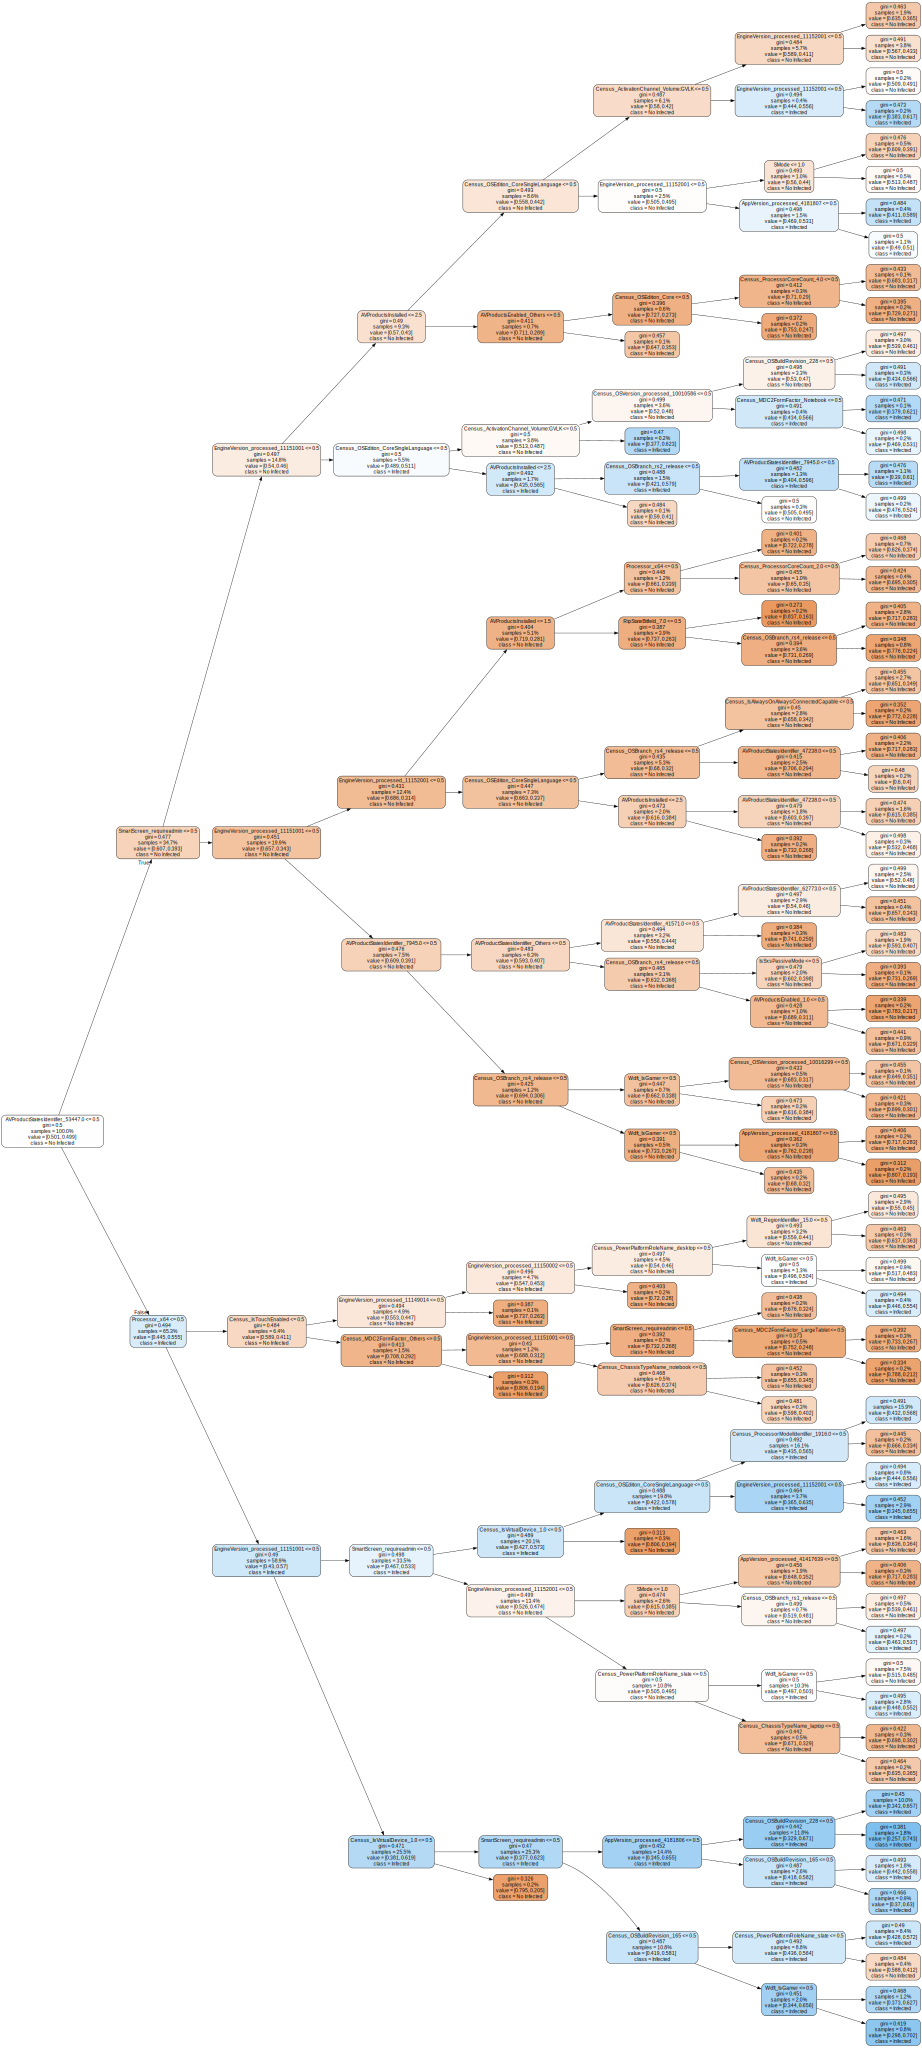

In [379]:
graphviz.Source(dot_data)

Realizando un análisis rápido del árbol podemos observar lo siguiente:

- las variables en los niveles superiores del árbol (cerca de la raíz) son las más importantes en la toma de decisiones. Por lo tanto, observamos que AVProductStatesIdentifier y EngineVersion_processed son variables muy importantes.
- a su vez observamos la repetición de categorías correspondientes a la misma variable en distintas profundidades indicando también que se trata de una variable muy explicativa como pueden ser "Census_OtherLanguage" y "Census_OSBranch_rs4_release".
- hay hojas que podrían seguir desarrollándose ya que poseen valores muy por encima del min_samples_leaf (porcentajes superiores al 0.1%, llegando incluso al 14%)
- la complejidad del árbol puede dar lugar a sobreajuste por lo que deberemos de modificar sus hiperparámetros para obtener la mejor combinación posible
- claramente vamos a tener que optar por aumentar la profundidad y el min_sample_split para que el árbol evite el overfitting y pueda ser más preciso

In [252]:
# pasamos a elaborar un dataframe en el que se muestre el valor predicho por el modelo para cada máquina
y_test_pred = pd.DataFrame(modelo_basico.predict(X_test), index = y_test.index, columns = ['Infected_Prediction'])

In [253]:
# le agregamos al dataframe de test el dataframe anterior de modo que podemos observar tanto el valor original del target como el valor predicho por el modelo
results_df = y_test.join(y_test_pred, how = 'inner')

# creamos una columna llamada success que es 1 en caso de ser la predicción igual al valor original y 0 en caso de que no sean iguales
results_df['Success'] = (results_df['HasDetections'] == results_df['Infected_Prediction']).astype(int)
results_df

HasDetections  Infected_Prediction  Success
MachineIdentifier                                                            
80a7d5f595c81f73e0cf658b2cc516b8              0                    1        0
7ec99fbf281297c8ea0c2b2ad0e1442d              0                    0        1
405a7351ba7e5e767144a7ad84b9cfd1              0                    0        1
f42f4a5c1f0f55ee4ec4a545f5fadfe4              0                    0        1
59daacb7f028e53ff9dda024573fdf9e              1                    1        1
...                                         ...                  ...      ...
08ed49d5ae5e5f0968d215e2721a7756              0                    1        0
6667a8edea9afae4fa36b7fa908eb4eb              0                    0        1
728f7224cea773fa27a3f8213579fc32              0                    1        0
3f26a6184d2f7242d3fa2ceaebb40656              0                    0        1
455766f7e5891abef85e5edd4873fada              1                    0        0

[90000 rows x 3 columns]

In [254]:
# le agregamos al dataframe una columna que indique la probabilidad de que una máquina se infecte calculada por el modelo
y_score = pd.DataFrame(modelo_basico.predict_proba(X_test)[:,1], index = y_test.index, columns = ['Proba_Infected'])
results_df = results_df.join(y_score)
results_df

HasDetections  Infected_Prediction  Success  \
MachineIdentifier                                                               
80a7d5f595c81f73e0cf658b2cc516b8              0                    1        0   
7ec99fbf281297c8ea0c2b2ad0e1442d              0                    0        1   
405a7351ba7e5e767144a7ad84b9cfd1              0                    0        1   
f42f4a5c1f0f55ee4ec4a545f5fadfe4              0                    0        1   
59daacb7f028e53ff9dda024573fdf9e              1                    1        1   
...                                         ...                  ...      ...   
08ed49d5ae5e5f0968d215e2721a7756              0                    1        0   
6667a8edea9afae4fa36b7fa908eb4eb              0                    0        1   
728f7224cea773fa27a3f8213579fc32              0                    1        0   
3f26a6184d2f7242d3fa2ceaebb40656              0                    0        1   
455766f7e5891abef85e5edd4873fada              1                    0        0   

                                  Proba_Infected  
MachineIdentifier                                 
80a7d5f595c81f73e0cf658b2cc516b8        0.571886  
7ec99fbf281297c8ea0c2b2ad0e1442d        0.283261  
405a7351ba7e5e767144a7ad84b9cfd1        0.364851  
f42f4a5c1f0f55ee4ec4a545f5fadfe4        0.349220  
59daacb7f028e53ff9dda024573fdf9e        0.657441  
...                                          ...  
08ed49d5ae5e5f0968d215e2721a7756        0.571886  
6667a8edea9afae4fa36b7fa908eb4eb        0.328833  
728f7224cea773fa27a3f8213579fc32        0.567998  
3f26a6184d2f7242d3fa2ceaebb40656        0.363636  
455766f7e5891abef85e5edd4873fada        0.484755  

[90000 rows x 4 columns]

Nos aseguramos que todo va bien comparando los tamaños de los datasets, aunque no es necesario

In [255]:
print(f'Tamaño de la predicción obtenida del test: {y_test_pred.shape}')
print(f'Tamaño del test: {y_test.shape}')

Tamaño de la predicción obtenida del test: (90000, 1)
Tamaño del test: (90000, 1)


A continuación evaluamos el rendimiento del modelo ayudándonos de distintas métricas que nos aportarán información de cómo poder mejorar el modelo. Para ello calcularemos:
- Score
- F1 Score
- ROC AUC Curve

### SCORE

El score de un modelo indica la precisión (accuracy) del modelo, es decir, el número de predicciones correctas entre el total de predicciones realizadas. En el dataframe superior para calcularla basta con dividir la suma de la columna succes entre el total de filas. También el propio sklearn nos permite obtener esta métrica a través del método .score.

In [256]:
results_df['Success'].sum()/len(results_df)

0.6035444444444444

In [257]:
score_basico = modelo_basico.score(X_test,y_test)
score_basico

0.6035444444444444

Observamos que obtenemos un 60% de precisión, lo que en un dataset balanceado se considera una precisión baja por lo que debemos de buscar los hiperparámetros adecuados para mejorar el modelo.

### F1 SCORE

El F1 Score es una métrica que combina la precisión (precision) y el recall (sensibilidad) en un único valor, proporcionando una medida equilibrada que es especialmente útil cuando se tienen clases desbalanceadas en un problema de clasificación (no es nuestro caso). La F1 Score oscila entre 0 y 1, donde 1 es el mejor valor posible (perfecta precisión y recall) y 0 es el peor.

In [258]:
f1_basico = metrics.f1_score(y_test, y_test_pred)
f1_basico

0.6107711271830786

Un F1 score de 0.61 indica un rendimiento moderado del modelo, con un equilibrio entre precisión y recall, pero con margen de mejora. Algunas de las medidas para mejorar este parámetro son ajustar los hiperparámetros del modelo, explorar técnicas de balanceo de clases y probar modelos alternativos.

### ROC AUC CURVE

La ROC Curve es una gráfica que muestra la relación entre la Tasa de Verdaderos Positivos (TPR) o Recall en el eje y, y la Tasa de Falsos Positivos (FPR) en el eje x para diferentes umbrales de decisión.

Por otro lado, el AUC (Area Under the Curve) mide el área bajo la curva ROC. Es un valor que va de 0 a 1 y representa la capacidad del modelo para distinguir entre clases positivas y negativas.

- Un AUC de 1.0 indica un modelo perfecto, que clasifica correctamente todas las instancias positivas y negativas.
- Un AUC de 0.5 indica un modelo que no tiene capacidad discriminativa, equivalente a una clasificación aleatoria.

0.6383060268608797

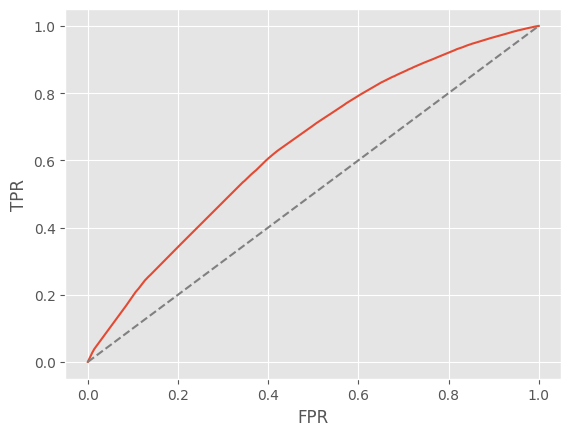

In [259]:
fpr, tpr, th = metrics.roc_curve(results_df['HasDetections'], results_df['Proba_Infected'])

plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
auc_score_basico = metrics.roc_auc_score(results_df['HasDetections'], results_df['Proba_Infected'])
auc_score_basico

Un AUC de 0.63 generalmente se considera bajo o moderado, indicando que el modelo no está haciendo un gran trabajo al distinguir entre clases. En la mayoría de los casos, se busca un AUC que oscile entre 0.7 y 0.8. Es por ello que deberemos de buscar la combinación de hiperparámetros adecuada o usar otro modelo para la mejora de estas métricas utilizadas.

<a id='optimizacion'></a>
## Optimización de modelos
[Volver al índice](#index)

En este apartado trabajamos sobre el modelo base e intentamos optimizarlo lo máximo posible mediante el ajuste de hiperparámetros para así mejorar su rendimiento.

Hemos comprobado que el modelo no es del todo preciso por lo que debemos mejorarlo. Para ello, debemos ajustar los hiperparámetros de forma adecuada.

Un modo de hacerlo sería ir cambiando los hiperparámetros de manera progresiva y ver su score tanto en train como en test de modo que visualicemos cuando comienza a haber overfitting. A continuación un ejemplo:

In [388]:
for i in range(1,20):
  dt_overfit = DecisionTreeClassifier(max_depth = i, min_samples_split = 5)
  dt_overfit.fit(X_train, y_train)
  train_acc = dt_overfit.score(X_train, y_train)
  test_acc = dt_overfit.score(X_test, y_test)
  print('Profundidad del arbol es {}, el acc en train es {}, el acc en test es {}'.format(i, np.round(train_acc,4), np.round(test_acc,4) ))

Profundidad del arbol es 1, el acc en train es 0.5729, el acc en test es 0.5747
Profundidad del arbol es 2, el acc en train es 0.5843, el acc en test es 0.5853
Profundidad del arbol es 3, el acc en train es 0.5854, el acc en test es 0.5867
Profundidad del arbol es 4, el acc en train es 0.5948, el acc en test es 0.5937
Profundidad del arbol es 5, el acc en train es 0.5971, el acc en test es 0.5957
Profundidad del arbol es 6, el acc en train es 0.5996, el acc en test es 0.6002
Profundidad del arbol es 7, el acc en train es 0.6047, el acc en test es 0.6037
Profundidad del arbol es 8, el acc en train es 0.6073, el acc en test es 0.6055
Profundidad del arbol es 9, el acc en train es 0.612, el acc en test es 0.6085
Profundidad del arbol es 10, el acc en train es 0.6148, el acc en test es 0.609
Profundidad del arbol es 11, el acc en train es 0.6198, el acc en test es 0.6116
Profundidad del arbol es 12, el acc en train es 0.6249, el acc en test es 0.612
Profundidad del arbol es 13, el acc en t

Observamos que el score en train y test evolucionan de manera similar hasta una profundidad de 11/12 (hay una diferencia de 0.01). A partir de este momento, el score en train aumenta significativamente respecto al de test indicando la aparición de overfitting.

Debido a que el anterior método es muy lento y no permite ver la mejor combinación entre varios parámetros al mismo tiempo vamos a optar por hacer uso de Grid Search Cross Validation el cual, se trata de una técnica utilizada en Machine Learning para optimizar los hiperparámetros de un modelo asegurando que se seleccionen los valores que proporcionen el mejor rendimiento. Al mismo tiempo que elige los mejores hiperparámetros, los evalúa de manera robusta a través de la validación cruzada, lo que minimiza el riesgo de sobreajuste y garantiza que el modelo se desempeñará bien en datos no vistos.

In [389]:
dtc = DecisionTreeClassifier(random_state = 44)

Procedemos a realizar varios Grid Search Cross Validation debido a que el ordenador no soporta computacionalmente un grid search muy complejo.
Dejamos comentadas estas partes de código para que no le resulte tedioso ejecutar el notebook.

In [248]:
#param_dt = {
    'max_depth': [11,15,20], # sabemos que debemos aumentar la profundidad del árbol
    # buscamos evitar el overfiting y desarrollar aquellas ramas con altos porcentajes por lo que
    # optamos por aumentar el min_sample_split y disminuir el min_sample_leaf
    'min_samples_split': [50,100,200], 
    'min_samples_leaf': [100, 200, 300],
    'criterion': ['entropy']
}

    # Configurar Grid Search con Validación Cruzada
#grid_search = model_selection.GridSearchCV(estimator=dtc, param_grid=param_dt, 
                           cv=5, n_jobs=1, verbose=1)

    # Entrenar usando Grid Search
#grid_search.fit(X_train, y_train)

    # Mejor combinación de parámetros
#print("Best parameters found: ", grid_search.best_params_)
#print("Mejor score: ",grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [250]:
#param_dt = {
    'max_depth': [15,16,17],
    'min_samples_split': [30,40,50],
    'min_samples_leaf': [50,70,100],
    'criterion': ['entropy']
}

    # Configurar Grid Search con Validación Cruzada
#grid_search = model_selection.GridSearchCV(estimator=dtc, param_grid=param_dt, 
                           cv=5, n_jobs=1, verbose=1)

    # Entrenar usando Grid Search
#grid_search.fit(X_train, y_train)

    # Mejor combinación de parámetros
#print("Best parameters found: ", grid_search.best_params_)
#print("Mejor score: ",grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 100, 'min_samples_split': 30}


In [390]:
param_dt = {
    'max_depth': [15,17,18],
    'min_samples_leaf': [100,120,150],
    'criterion': ['entropy'],
}

# Configurar Grid Search con Validación Cruzada
grid_search = model_selection.GridSearchCV(estimator=dtc, param_grid=param_dt, 
                           cv=5, n_jobs=1, verbose=1)

# Entrenar usando Grid Search
grid_search.fit(X_train, y_train)

# Mejor combinación de parámetros
print("Best parameters found: ", grid_search.best_params_)
print("Mejor score: ",grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 120}


In [391]:
# tras realizar 3 Grid Search Cross Validations pasamos a ver el score del mejor modelo

print("Mejor score: ",grid_search.best_score_)

Mejor score:  0.6129888888888889


Observamos que el mejor árbol de decisión que hemos podido obtener se trata de uno con los siguientes parámetros:

- criterion: entropy
- max_depth: 18
- min_samples_leaf: 120
- min_samples_split: 2 que es el valor predeterminado

Vemos que aparentemente el modelo no ha mejorado mucho con respecto al anterior modelo que hicimos pero lo comprobaremos en el siguiente apartado con las diferentes métricas de este nuevo modelo.

Para poder mejorar aún más el rendimiento de nuestro modelo sería necesario procesar de manera más meticulosa las principales variables que usa el modelo para realizar su predicción. Por ejemplo, a la variable EngineVersion que se repite varias veces en el DecisionTree en vez de aplicarle la función *setOthers* aplicar la función *setOthersminmax* de manera que nos quedaríamos con aquellas versiones más explicativas. Probar este tipo de variaciones en el procesamiento con diferentes variables e incluso crear nuevas variables a partir de aquellas que ya tenemos junto con la mejora de los modelos haría que el rendimiento del modelo aumentase. En este caso, nos quedaremos con este modelo y veremos los resultados que obtenemos con su mejora.

# EVALUATION

<a id='seleccion_evaluacion'></a>
## Selección de modelo y evaluación
[Volver al índice](#index)

En este apartado elegimos el modelo con mejor métrica en test y comprobamos su rendimiento en validación.

In [260]:
modelo_mejorado = DecisionTreeClassifier(
        criterion="entropy",
        max_depth=18,
        min_samples_leaf=120,
        random_state=44,
)

In [261]:
modelo_mejorado.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=120,
                       random_state=44)

In [262]:
# prediccion
y_test_pred = pd.DataFrame(modelo_mejorado.predict(X_test), index = y_test.index, columns = ['Infected_Prediction'])

In [263]:
results_df = y_test.join(y_test_pred, how = 'inner')
results_df['Success'] = (results_df['HasDetections'] == results_df['Infected_Prediction']).astype(int)
# Pasamos a unir las probabilidades de cada una de las filas al dataset de resultados
y_probs = modelo_mejorado.predict_proba(X_test)[:,1]
y_score = pd.DataFrame(y_probs, index = y_test.index, columns = ['Proba_Infected'])
results_df = results_df.join(y_score)
results_df

HasDetections  Infected_Prediction  Success  \
MachineIdentifier                                                               
80a7d5f595c81f73e0cf658b2cc516b8              0                    1        0   
7ec99fbf281297c8ea0c2b2ad0e1442d              0                    0        1   
405a7351ba7e5e767144a7ad84b9cfd1              0                    0        1   
f42f4a5c1f0f55ee4ec4a545f5fadfe4              0                    0        1   
59daacb7f028e53ff9dda024573fdf9e              1                    1        1   
...                                         ...                  ...      ...   
08ed49d5ae5e5f0968d215e2721a7756              0                    1        0   
6667a8edea9afae4fa36b7fa908eb4eb              0                    0        1   
728f7224cea773fa27a3f8213579fc32              0                    1        0   
3f26a6184d2f7242d3fa2ceaebb40656              0                    0        1   
455766f7e5891abef85e5edd4873fada              1                    0        0   

                                  Proba_Infected  
MachineIdentifier                                 
80a7d5f595c81f73e0cf658b2cc516b8        0.643357  
7ec99fbf281297c8ea0c2b2ad0e1442d        0.265306  
405a7351ba7e5e767144a7ad84b9cfd1        0.253589  
f42f4a5c1f0f55ee4ec4a545f5fadfe4        0.265823  
59daacb7f028e53ff9dda024573fdf9e        0.554217  
...                                          ...  
08ed49d5ae5e5f0968d215e2721a7756        0.537954  
6667a8edea9afae4fa36b7fa908eb4eb        0.400000  
728f7224cea773fa27a3f8213579fc32        0.524251  
3f26a6184d2f7242d3fa2ceaebb40656        0.497238  
455766f7e5891abef85e5edd4873fada        0.470044  

[90000 rows x 4 columns]

In [273]:
print(f'El score del mejor modelo es de:           {round(modelo_mejorado.score(X_test,y_test),4)}   Valor del modelo básico: {round(score_basico,4)}')
print(f'El F1 score del mejor modelo es de:        {round(metrics.f1_score(y_test, y_test_pred),4)}   Valor del modelo básico: {round(f1_basico,4)}')
print(f'El ROC AUC score del mejor modelo es de:   {round(metrics.roc_auc_score(results_df['HasDetections'], results_df['Proba_Infected']),4)}   Valor del modelo básico: {round(auc_score_basico,4)}')

El score del mejor modelo es de:           0.6121   Valor del modelo básico: 0.6035
El F1 score del mejor modelo es de:        0.6236   Valor del modelo básico: 0.6108
El ROC AUC score del mejor modelo es de:   0.6548   Valor del modelo básico: 0.6383


0.6547575217469541

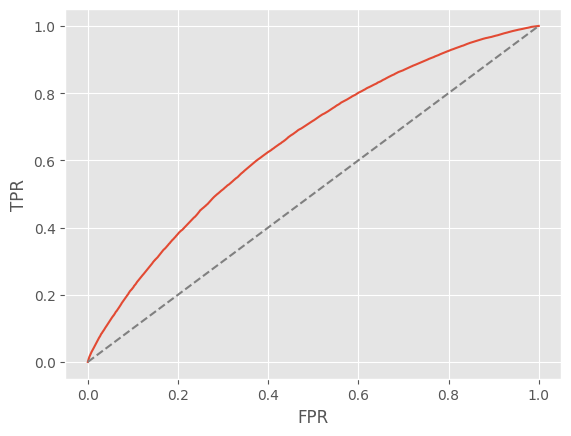

In [265]:
fpr, tpr, th = metrics.roc_curve(results_df['HasDetections'], results_df['Proba_Infected'])

plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
metrics.roc_auc_score(results_df['HasDetections'], results_df['Proba_Infected'])

Observamos una leve mejora en todas las métricas estudiadas anteriormente. Es cierto que la mejora no es muy notable y esto se puede deber a la gran cantidad de columnas que posee el dataframe y que muchas de ellas no terminan de ser lo suficientemente explicativas y marcar una diferencia significativa que permita al modelo ser muy preciso.

In [274]:
X_val = df_val.drop(columns = ['HasDetections'])
y_val = df_val[['HasDetections']]

In [275]:
# prediccion en el dataframe de validación
y_val_pred = pd.DataFrame(modelo_mejorado.predict(X_val), index = y_val.index, columns = ['Infected_Validation_Prediction'])

In [276]:
results_val_df = y_val.join(y_val_pred, how = 'inner')
results_val_df['Success'] = (results_val_df['HasDetections'] == results_val_df['Infected_Validation_Prediction']).astype(int)
# Pasamos a unir las probabilidades de cada una de las filas al dataset de resultados
y_val_score = pd.DataFrame(modelo_mejorado.predict_proba(X_val)[:,1], index = y_val.index, columns = ['Proba_Infected_Validation'])
results_val_df = results_val_df.join(y_val_score)
results_val_df

HasDetections  \
MachineIdentifier                                 
07411b57a63f194fc6a1b907d0dc268d              0   
4e868f726daca03d42f21ac50107e7db              0   
1bbb75277f73ca3cbafe8f0be37d02a9              0   
d6d97895ab3d04df623d89c92ddb7e56              0   
cf7841c6f2b8c5ad514cf11034941e23              0   
...                                         ...   
d63c247a360f849be27f822465df3c6a              0   
beb96eaf63c724b8f99d341233ef1ffc              1   
cf09677afb83e0a52824d3608841b070              0   
bbf427f8b9b46be09ef82a7e804b6406              0   
8b44ca5de78a153e6c7bfffc0b27386e              1   

                                  Infected_Validation_Prediction  Success  \
MachineIdentifier                                                           
07411b57a63f194fc6a1b907d0dc268d                               0        1   
4e868f726daca03d42f21ac50107e7db                               1        0   
1bbb75277f73ca3cbafe8f0be37d02a9                               0        1   
d6d97895ab3d04df623d89c92ddb7e56                               0        1   
cf7841c6f2b8c5ad514cf11034941e23                               1        0   
...                                                          ...      ...   
d63c247a360f849be27f822465df3c6a                               0        1   
beb96eaf63c724b8f99d341233ef1ffc                               0        0   
cf09677afb83e0a52824d3608841b070                               1        0   
bbf427f8b9b46be09ef82a7e804b6406                               0        1   
8b44ca5de78a153e6c7bfffc0b27386e                               1        1   

                                  Proba_Infected_Validation  
MachineIdentifier                                            
07411b57a63f194fc6a1b907d0dc268d                   0.380822  
4e868f726daca03d42f21ac50107e7db                   0.615702  
1bbb75277f73ca3cbafe8f0be37d02a9                   0.260606  
d6d97895ab3d04df623d89c92ddb7e56                   0.373705  
cf7841c6f2b8c5ad514cf11034941e23                   0.606762  
...                                                     ...  
d63c247a360f849be27f822465df3c6a                   0.136000  
beb96eaf63c724b8f99d341233ef1ffc                   0.370248  
cf09677afb83e0a52824d3608841b070                   0.517422  
bbf427f8b9b46be09ef82a7e804b6406                   0.416667  
8b44ca5de78a153e6c7bfffc0b27386e                   0.630517  

[50000 rows x 4 columns]

In [431]:
train_acc = modelo_mejorado.score(X_train, y_train)
test_acc = modelo_mejorado.score(X_test, y_test)
validation_acc = modelo_mejorado.score(X_val,y_val)

print(f'El score en train es de: {train_acc}')
print(f'El score en test es de: {test_acc}')
print(f'El score en validation es de: {validation_acc}')

El score en train es de: 0.6252583333333334
El score en test es de: 0.6121111111111112
El score en validation es de: 0.60808


Como podemos observar nuestro modelo es un poco básico en cuanto a precisión. Como era de esperar, el score de train es el mayor valor, ya que el modelo a aprendido a partir de esos valores, y el más bajo es el score de validación ya que se trata de datos que no ha observado nunca.

Cabe destacar que al tratarse de un problema de detección de infecciones nos interesa maximizar el recall más que la precisión.

El recall, también conocido como sensibilidad es una métrica que mide la capacidad del modelo para identificar correctamente las instancias positivas. Es decir, responde a la pregunta: ¿De todas las instancias que eran positivas, cuántas el modelo identificó correctamente?. 

En nuestro caso, tener un recall alto, significaría que el modelo es bueno detectando la infección cuando está presente (es decir, tiene pocos falsos negativos). Sin embargo, podría haber falsos positivos (casos donde el modelo indica que hay infección cuando no la hay), pero eso no afecta al recall afecta a la precisión.

Es por ello que vamos a estudiar el recall y precisión que tiene nuestro modelo para distintos umbrales (el umbral es el porcentaje a partir del cual el modelo considera que una máquina está infectada o no. De manera predeterminada este valor es 50%, es decir, que por encima de 0.5 nuestro modelo interpreta que la máquina está infectada y por debajo de dicho valor, que no lo está)

In [433]:
thresholds = [0.3, 0.4, 0.45, 0.5]  # Diferentes umbrales para probar
for threshold in thresholds:
    y_pred_custom = (y_probs >= threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(metrics.classification_report(y_test, y_pred_custom))


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.73      0.18      0.29     44725
           1       0.54      0.94      0.68     45275

    accuracy                           0.56     90000
   macro avg       0.64      0.56      0.48     90000
weighted avg       0.63      0.56      0.49     90000

Threshold: 0.4
              precision    recall  f1-score   support

           0       0.67      0.37      0.48     44725
           1       0.57      0.82      0.67     45275

    accuracy                           0.60     90000
   macro avg       0.62      0.60      0.58     90000
weighted avg       0.62      0.60      0.58     90000

Threshold: 0.45
              precision    recall  f1-score   support

           0       0.64      0.47      0.54     44725
           1       0.59      0.74      0.66     45275

    accuracy                           0.61     90000
   macro avg       0.62      0.61      0.60     90000
weighted avg       0.62     

Observando las estadísticas, vemos que el modelo que tenemos es bastante balanceado ya que todas sus métricas son prácticamente iguales. Sin embargo, detectar la mayor cantidad posible de infecciones, podríamos elegir un umbral de 0.45, sacrificando algo de precisión (bajando en un 2%) pero mejorando significativamente el recall que aumenta hasta el 74%

# EXTRA 

<a id='modelos_extra'></a>
## Implementación de modelos extra 
[Volver al índice](#index)

En este apartado vamos a probar a aplicar otros dos algoritmos muy usados en problemas de clasificación binaria y que se han mencionado en clase como son:
- RandomForestClassifier
- XGBoost

### XGBoost

In [277]:
modelo2 = xgb.XGBClassifier(eval_metric='mlogloss',objective ="binary:logistic")

In [279]:
param_modelo2 = {
    "max_depth": [8,10],                # Profundidad máxima de los árboles
    "eta": [0.2,0.3],                  # Tasa de aprendizaje
    "subsample": [0.8,1],                  # Proporción de muestras utilizadas por cada árbol
    "colsample_bytree": [0.9,1]          # Proporción de características utilizadas por cada árbol
}

# Configurar Grid Search con Validación Cruzada
grid_search = model_selection.GridSearchCV(estimator=modelo2, param_grid=param_modelo2, 
                           cv=5, scoring='accuracy',n_jobs=1, verbose=1)

# Entrenar usando Grid Search
grid_search.fit(X_train, y_train)

# Mejor combinación de parámetros
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'colsample_bytree': 1, 'eta': 0.2, 'max_depth': 8, 'subsample': 1}


In [280]:
print("Mejor score: ",grid_search.best_score_)

Mejor score:  0.627688888888889


In [281]:
model_XGBoost = grid_search.best_estimator_

In [282]:
model_XGBoost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.2, eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [283]:
y_test_pred = pd.DataFrame(model_XGBoost.predict(X_test), index = y_test.index, columns = ['Infected_Prediction'])
y_probs = model_XGBoost.predict_proba(X_test)[:,1]

In [284]:
# Calcular la precisión del modelo
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")
print(metrics.classification_report(y_test, y_test_pred))

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6282
              precision    recall  f1-score   support

           0       0.64      0.59      0.61     44725
           1       0.62      0.66      0.64     45275

    accuracy                           0.63     90000
   macro avg       0.63      0.63      0.63     90000
weighted avg       0.63      0.63      0.63     90000

Accuracy: 0.6282


In [285]:
train_acc = model_XGBoost.score(X_train, y_train)
test_acc = model_XGBoost.score(X_test, y_test)
validation_acc = model_XGBoost.score(X_val,y_val)

print(f'El score en train es de: {train_acc}')
print(f'El score en test es de: {test_acc}')
print(f'El score en validation es de: {validation_acc}')

El score en train es de: 0.6513611111111111
El score en test es de: 0.6282222222222222
El score en validation es de: 0.624


Podemos observar que con un simple XGBClassifier y con un Grid Search Cross Validation sencillo obtenemos una precisión y recall mejor que para nuestro DecisionTree. Con un poco de trabajo y realizando Grid Search Cross Validation más complejos en los que personalicemos más el modelo, seríamos capaces de aumentar la precisión del mismo en un par de unidades más.

### RandomForestClassifier

In [286]:
random_forest = RandomForestClassifier(random_state=44)

In [10]:
param_rd = {
    "n_estimators": [100],
    "max_depth" : [22,24,25],              
    "criterion": ['entropy'],
    "min_samples_leaf": [50] ,              
    "max_features": ['sqrt']     # Proporción de características utilizadas por cada árbol
}

# Configurar Grid Search con Validación Cruzada
grid_search = model_selection.GridSearchCV(estimator=random_forest, param_grid=param_rd, 
                           cv=5,n_jobs=1, verbose=1)

# Entrenar usando Grid Search
grid_search.fit(X_train, y_train)

# Mejor combinación de parámetros
print("Best parameters found: ", grid_search.best_params_)
print("Mejor score: ",grid_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: Dat

Best parameters found:  {'criterion': 'entropy', 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 100}
Mejor score:  0.6193055555555557


Una vez realizados varios Grid Search Cross Validation, nos quedamos con aquel que mejor valor ha obtenido en score, en este caso con el de 0.619.
Observamos que su valor no llega a ser mejor que el obtenido con el mejor modelo de DecisionTreeClassifier. Eso indica que deberíamos de seguir realizando Grid Search Cross Validation para encontrar el conjunto de hiperparámetros adecuados.

In [11]:
mejor_forest = grid_search.best_estimator_

In [12]:
mejor_forest.fit(X_train, y_train)

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=24, min_samples_leaf=50,
                       random_state=44)

In [13]:
y_test_pred = pd.DataFrame(mejor_forest.predict(X_test), index = y_test.index, columns = ['Infected_Prediction'])
y_probs = mejor_forest.predict_proba(X_test)[:,1]

In [14]:
# Calcular la precisión del modelo
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")
print(metrics.classification_report(y_test, y_test_pred))

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6214
              precision    recall  f1-score   support

           0       0.63      0.59      0.61     44725
           1       0.62      0.65      0.63     45275

    accuracy                           0.62     90000
   macro avg       0.62      0.62      0.62     90000
weighted avg       0.62      0.62      0.62     90000

Accuracy: 0.6214


Finalmente podemos ver que el modelo obtenido es mejor por una unidad tanto en precisión, recall y F1-score respecto al DecisionTreeClassifier por lo que podemos comprobar que con el uso de modelos más complejos podríamos mejorar aún más la precisión y tener así mejores resultados a la hora de predecir si las máquinas están o no infectadas.

In [ ]:
train_acc = mejor_forest.score(X_train, y_train)
test_acc = mejor_forest.score(X_test, y_test)
validation_acc = mejor_forest.score(X_val,y_val)

print(f'El score en train es de: {train_acc}')
print(f'El score en test es de: {test_acc}')
print(f'El score en validation es de: {validation_acc}')